In [19]:
import gym 
gym.logger.set_level(40)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
# Imports specifically so we can render outputs in Jupyter.
from __future__ import print_function
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display

In [4]:
def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    #plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='loop'))

WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.



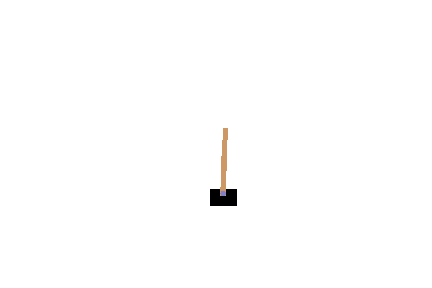
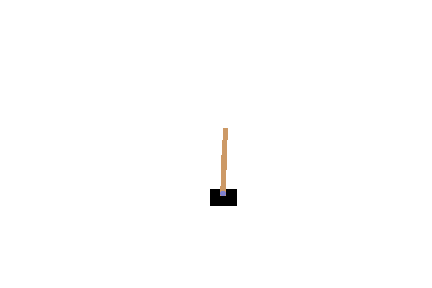
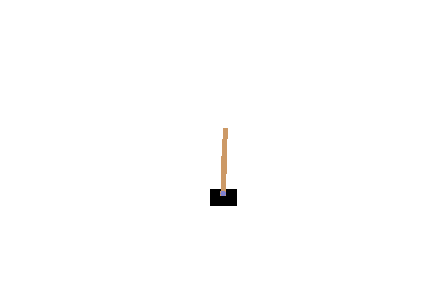
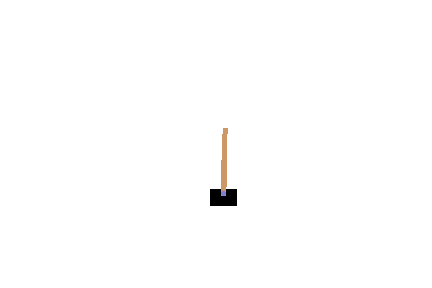
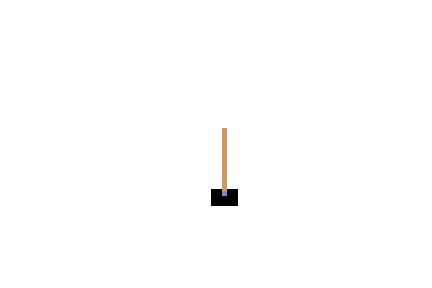
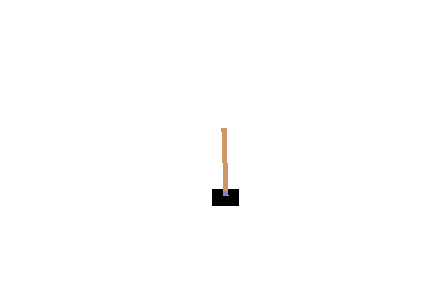
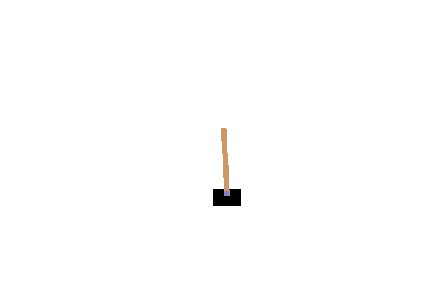
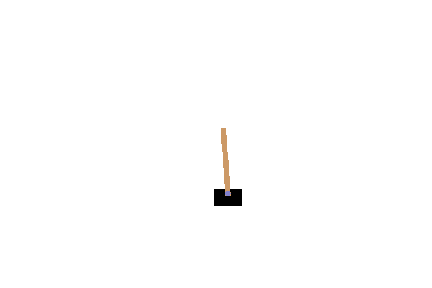
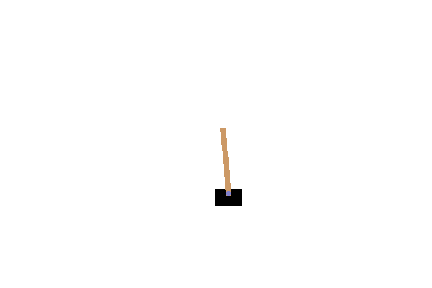
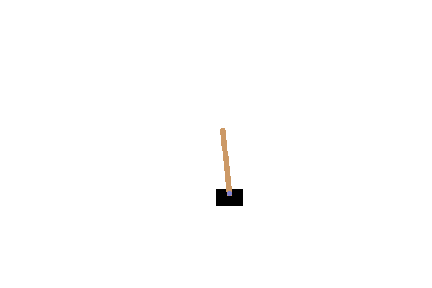
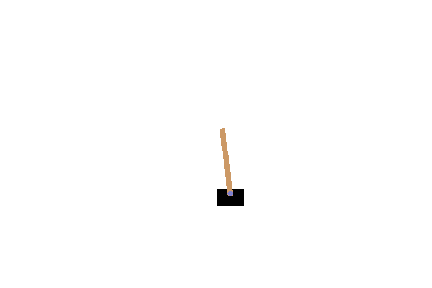
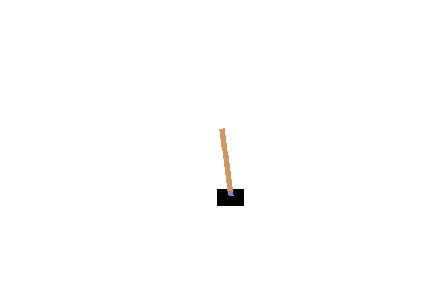
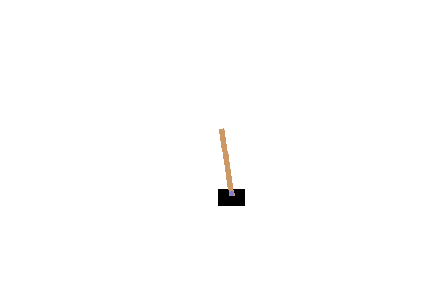
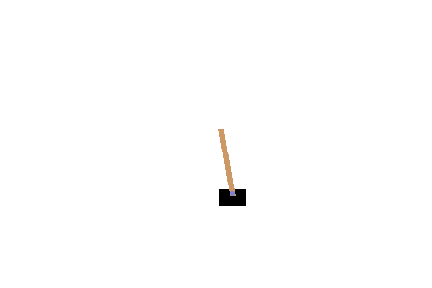

In [10]:
env = gym.make('CartPole-v0')

# Run a demo of the environment
observation = env.reset()
cum_reward = 0
frames = []
for t in range(5000):
    # Render into buffer. 
    frames.append(env.render(mode = 'rgb_array'))
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        break
env.close
display_frames_as_gif(frames)

WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
Episode 39/40 finished after 10 timesteps


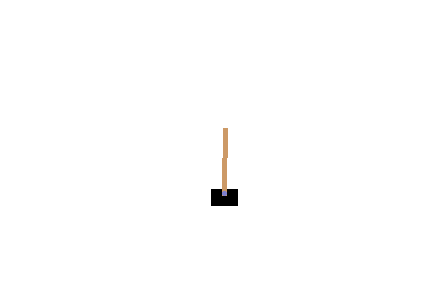
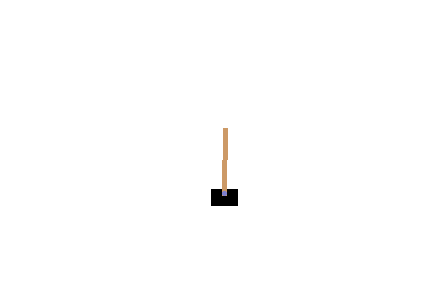
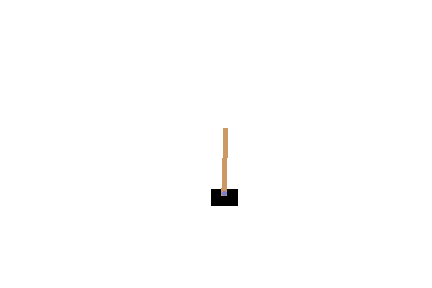
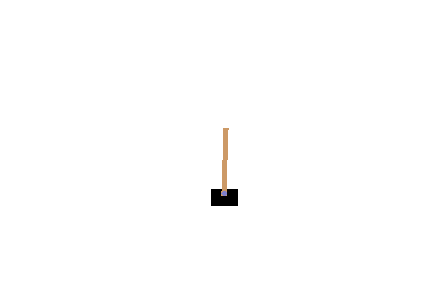
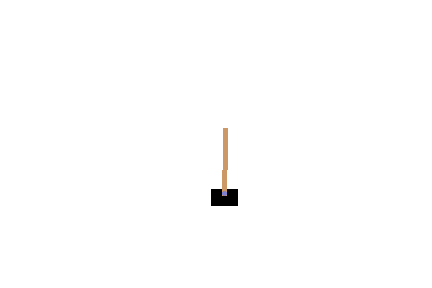
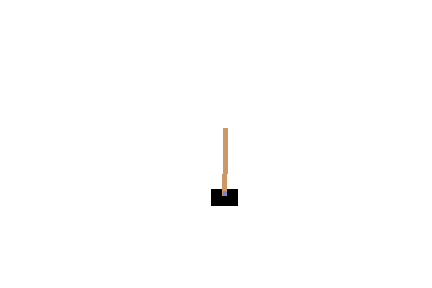
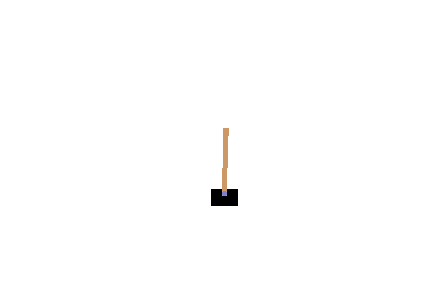
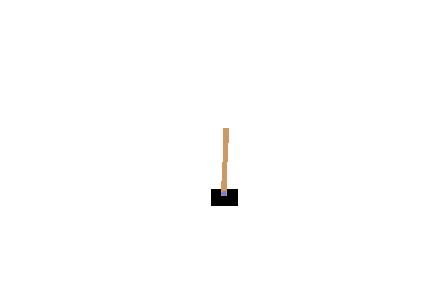
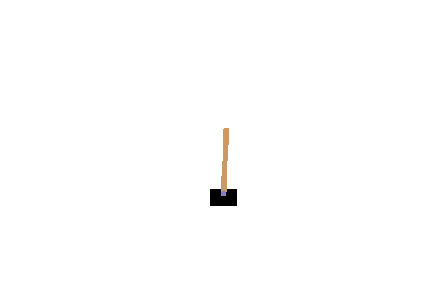
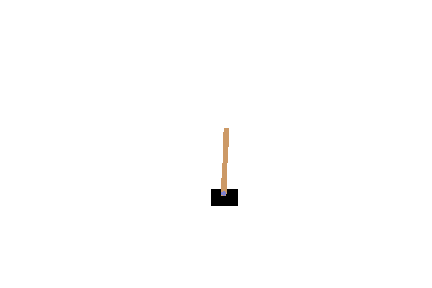
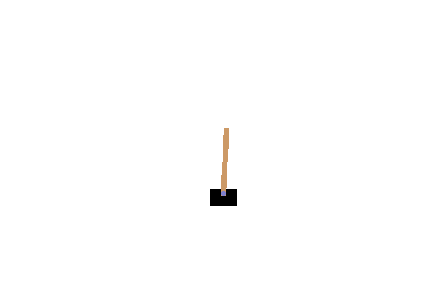
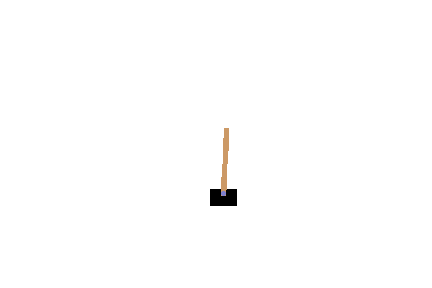
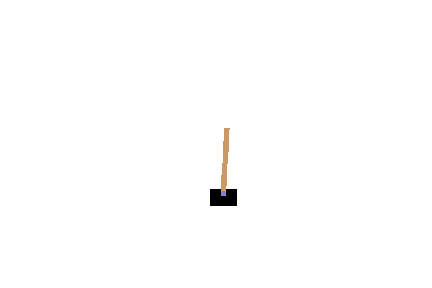
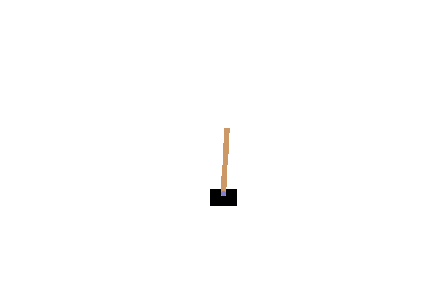
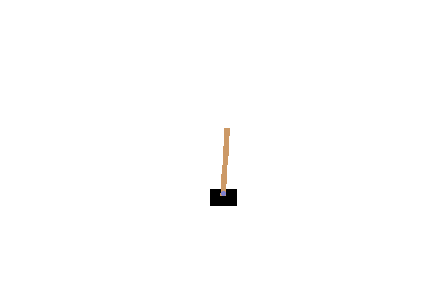
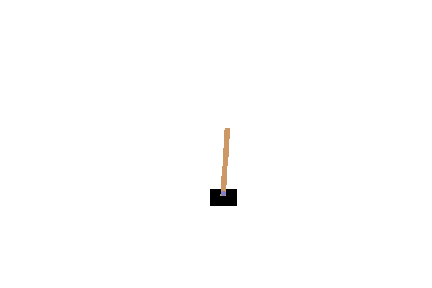
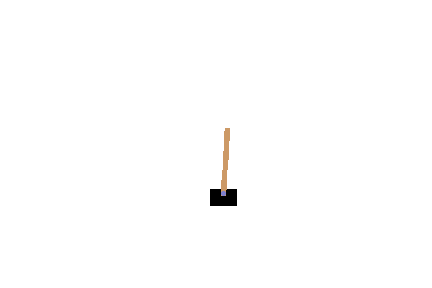
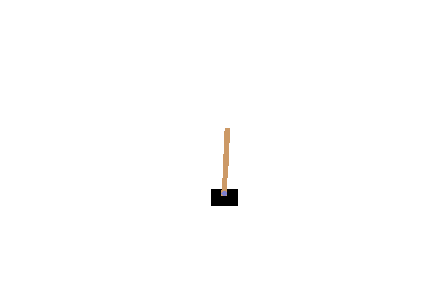
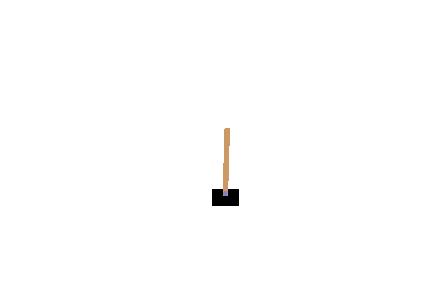
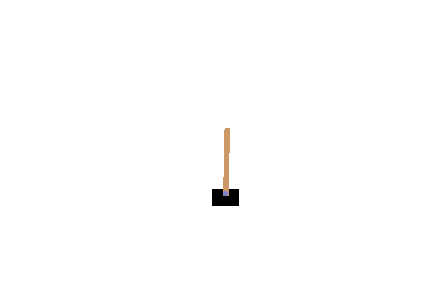
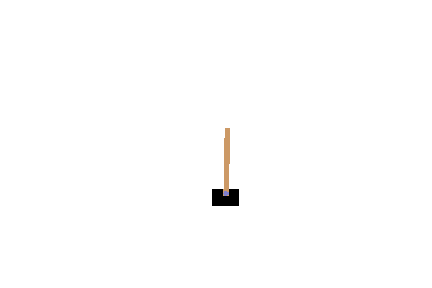
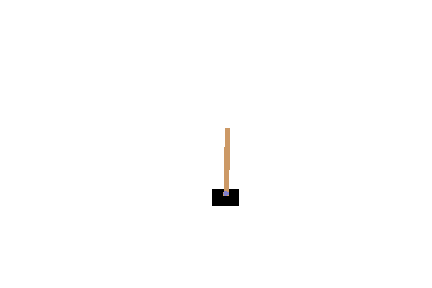
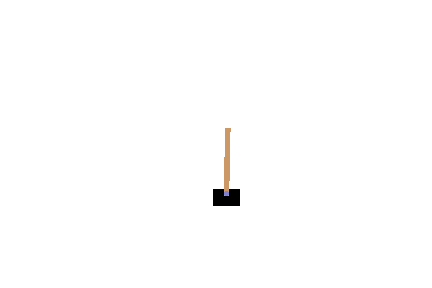
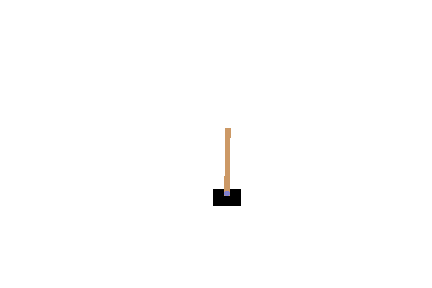
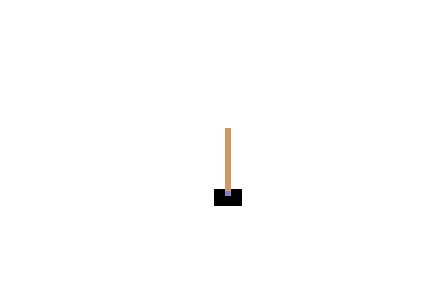
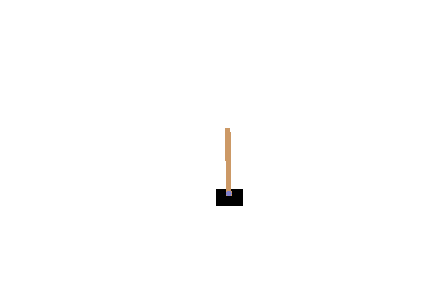
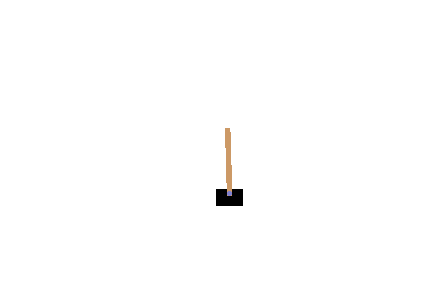
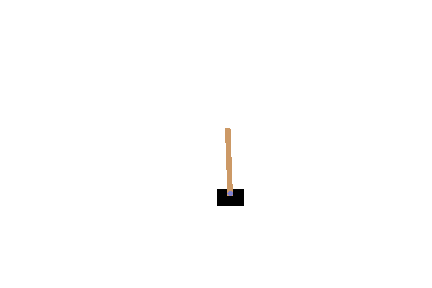
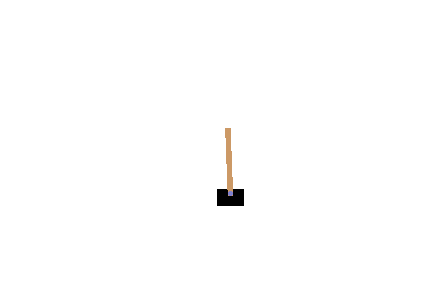
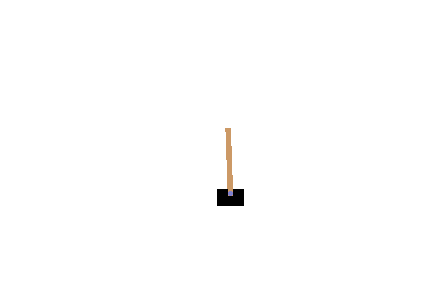
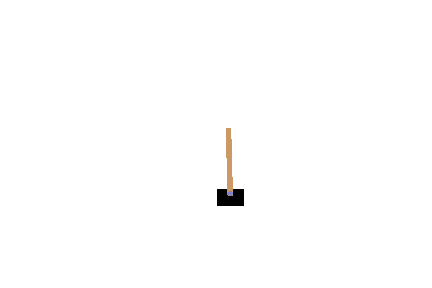
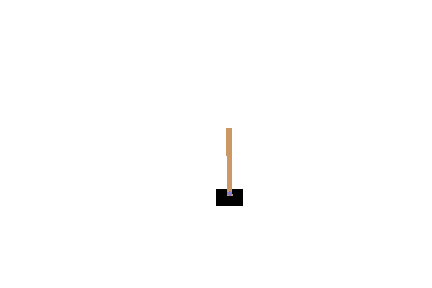
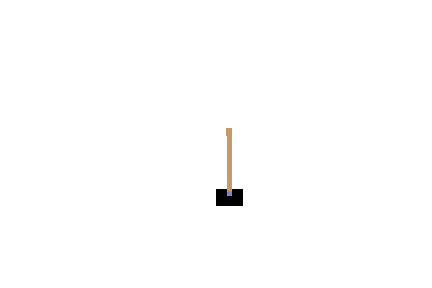
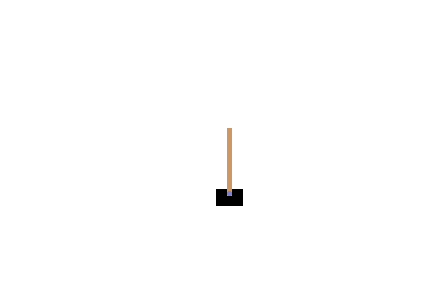
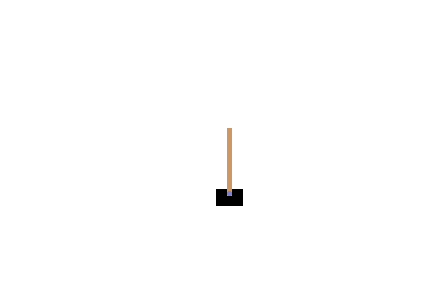
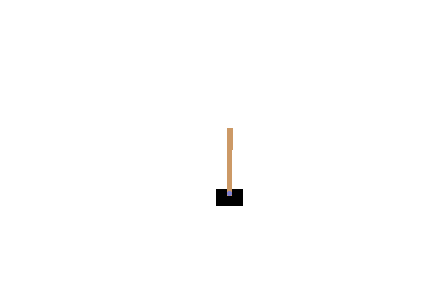
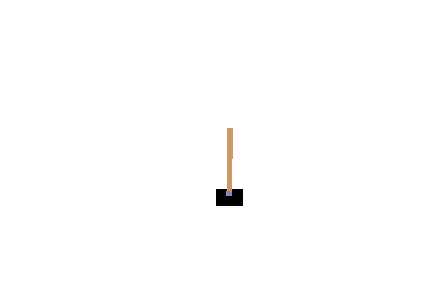
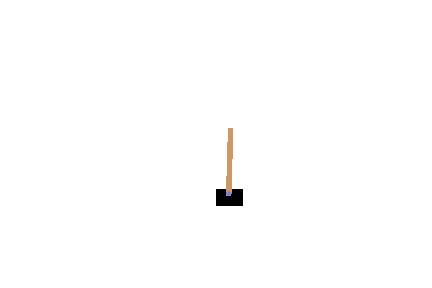
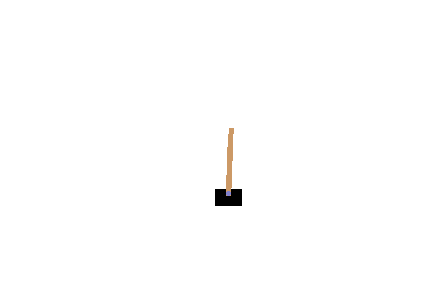
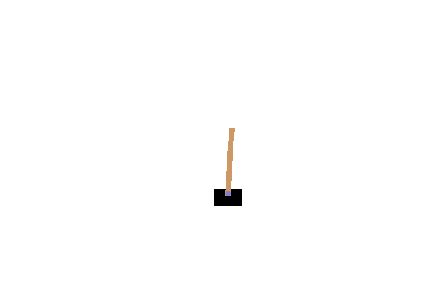
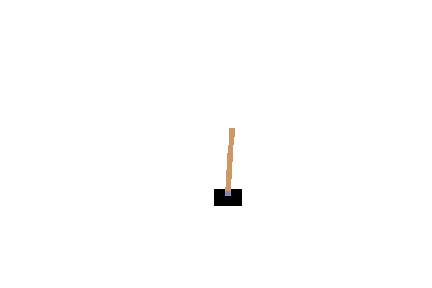
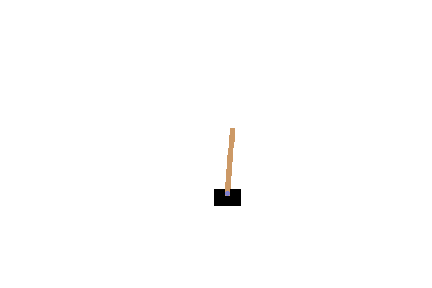
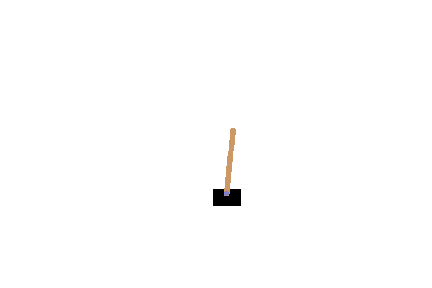
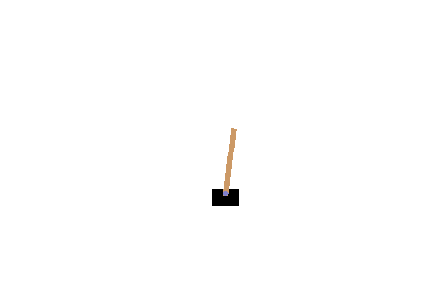
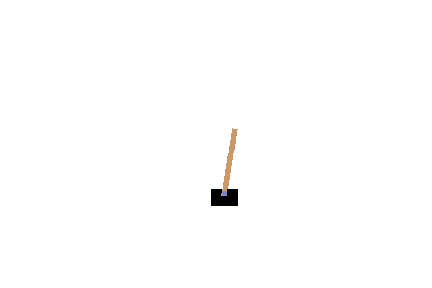
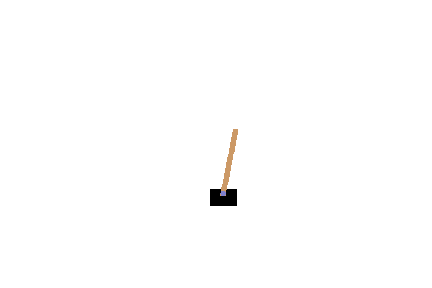
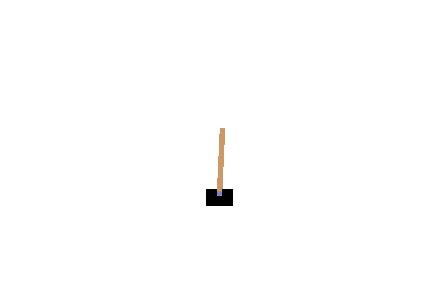
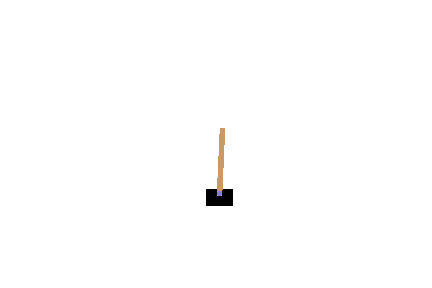
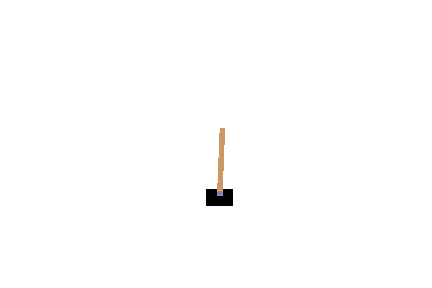
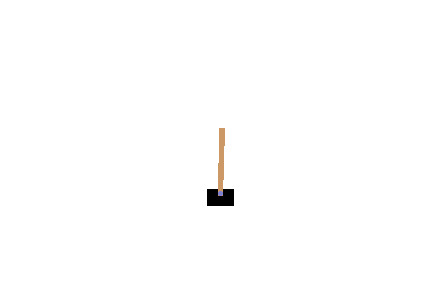
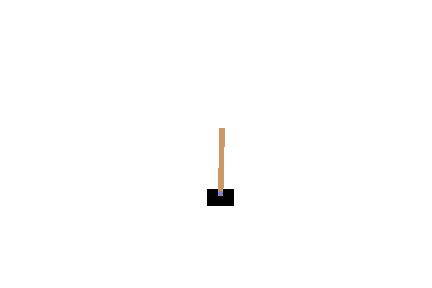
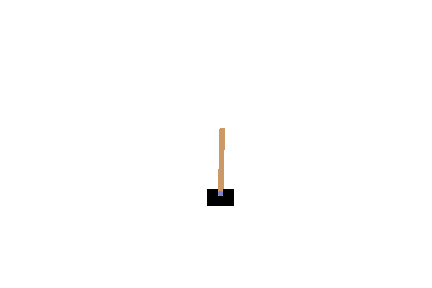
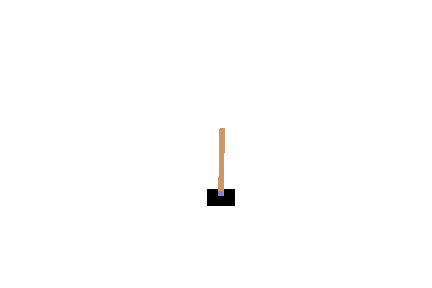
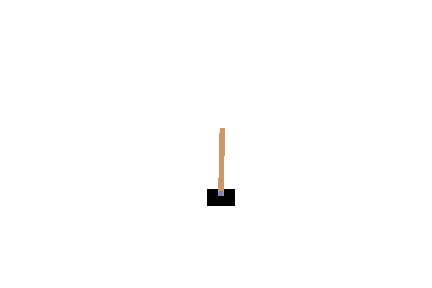
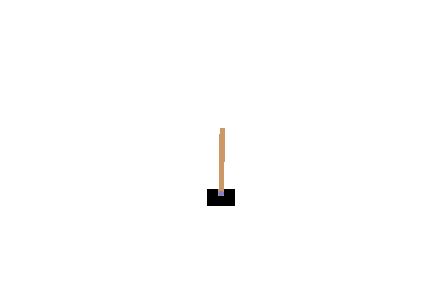
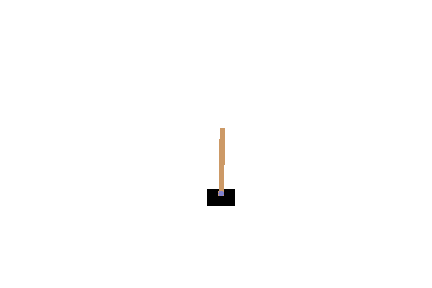
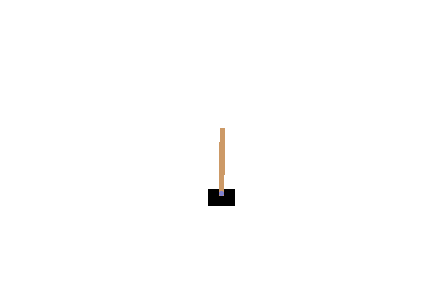
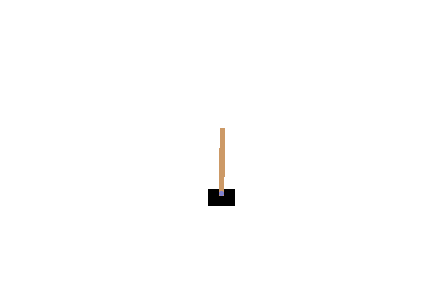
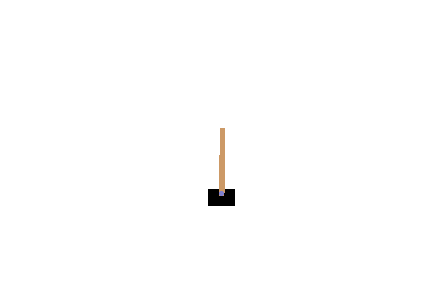
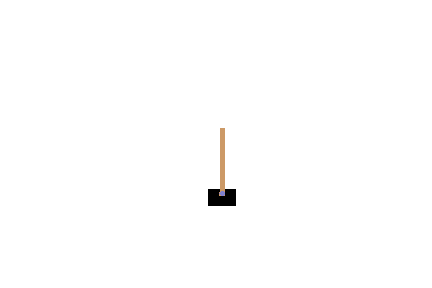
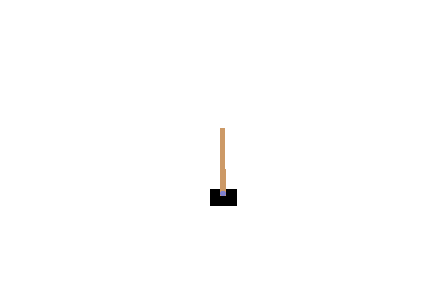
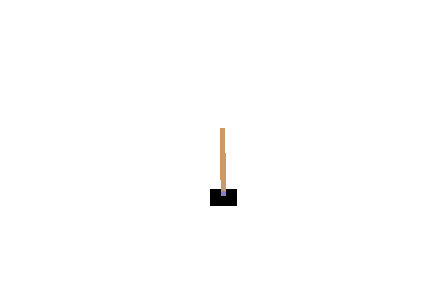
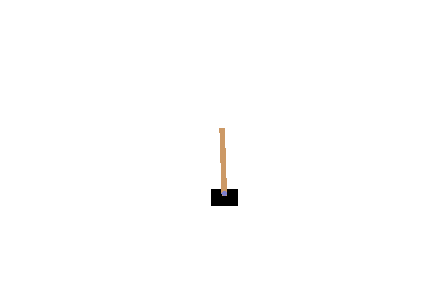
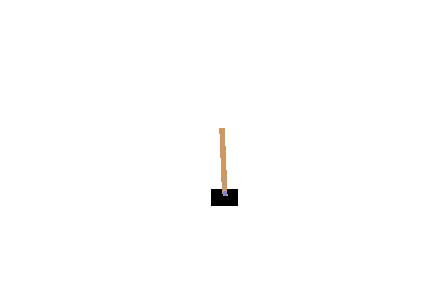
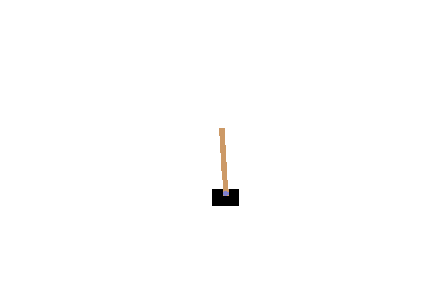
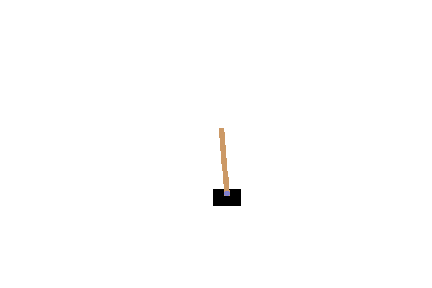
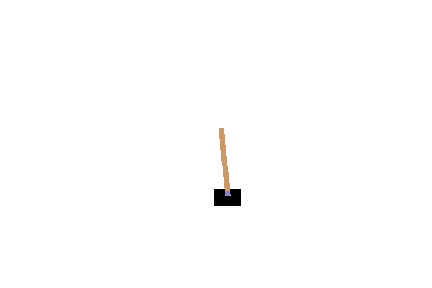
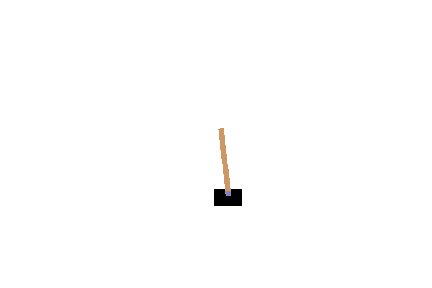
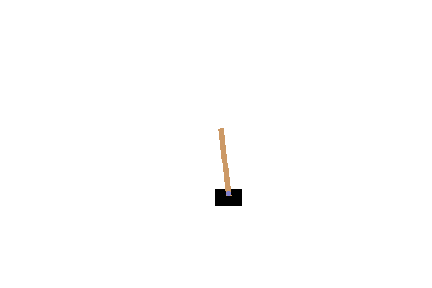
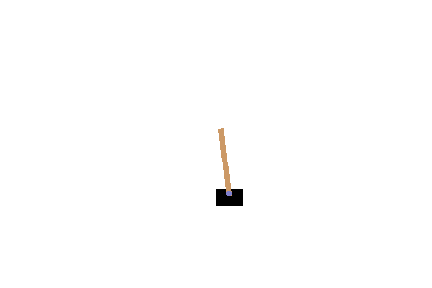
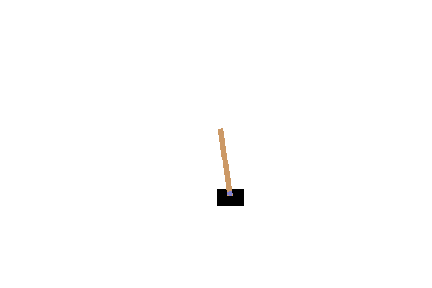
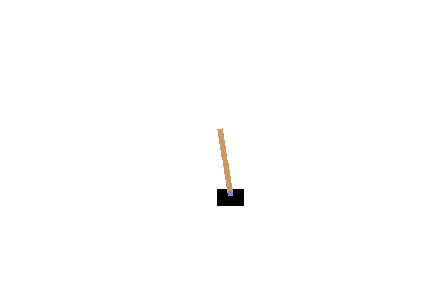
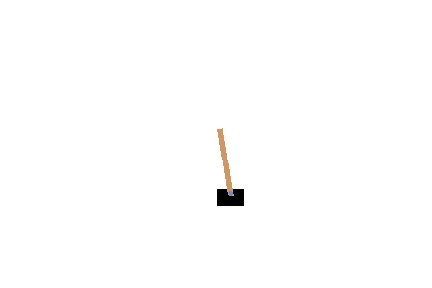
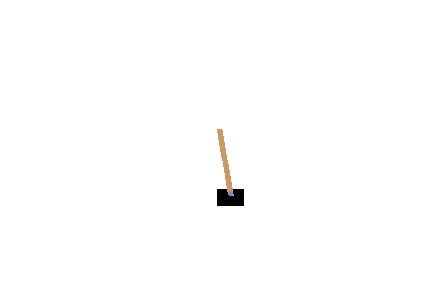
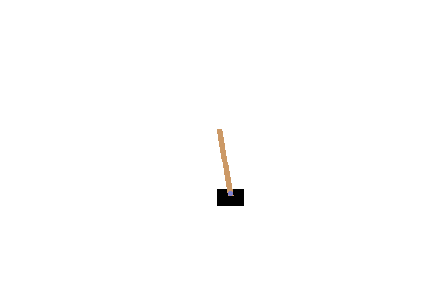
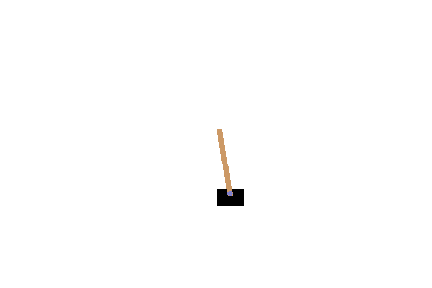
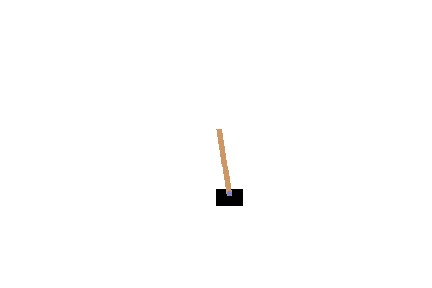
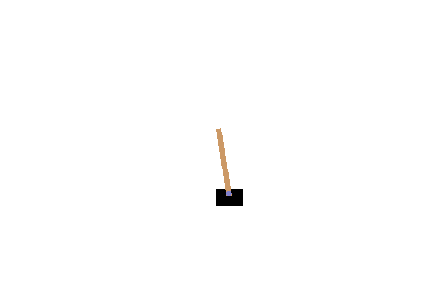
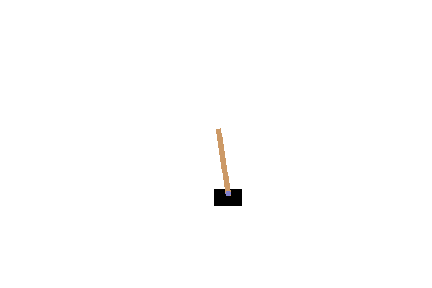
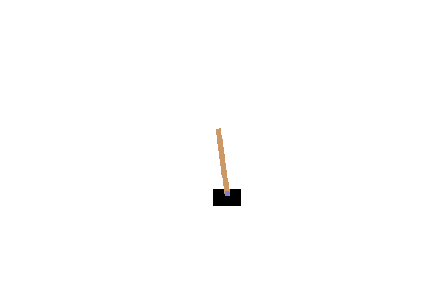
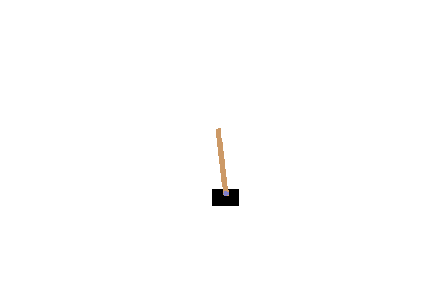
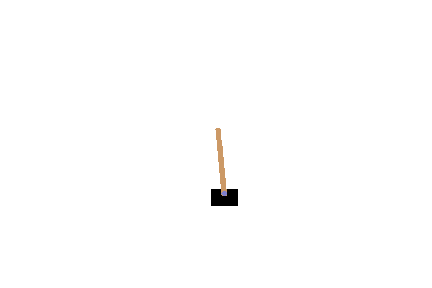
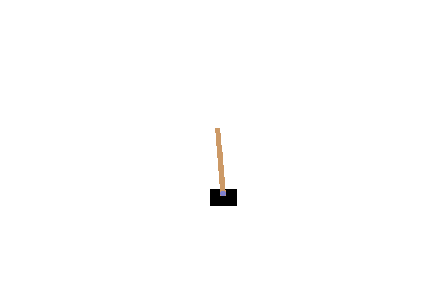
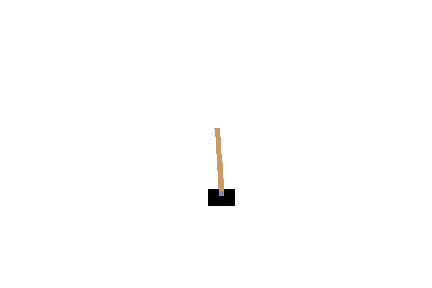
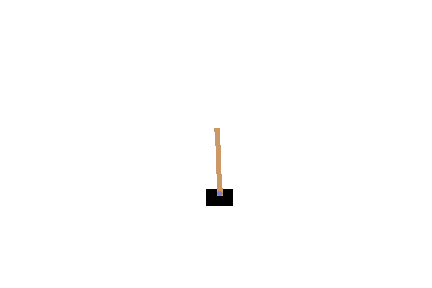
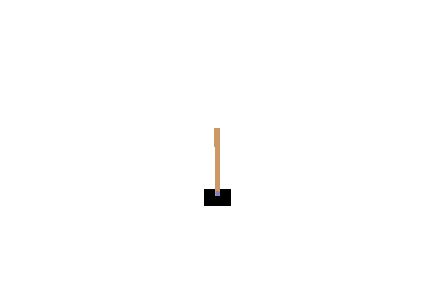
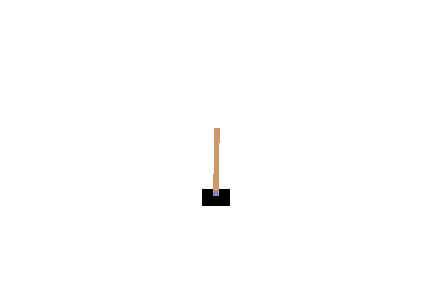
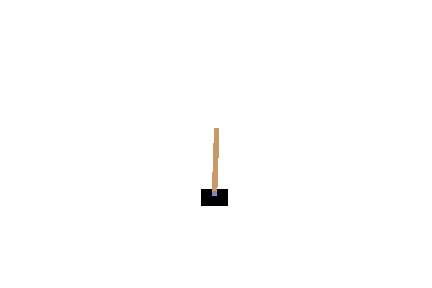
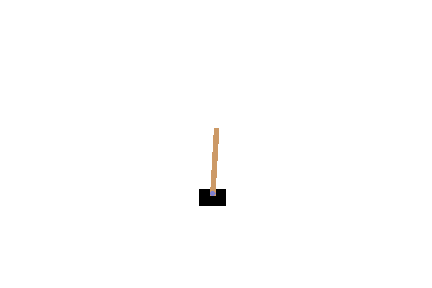
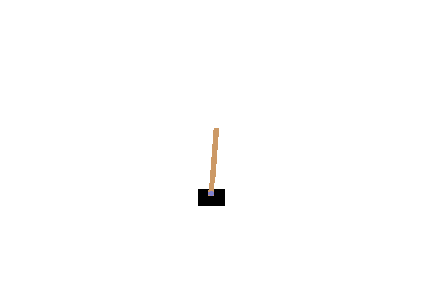
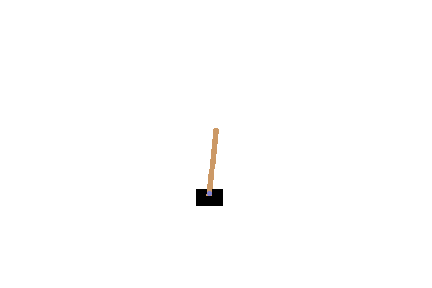
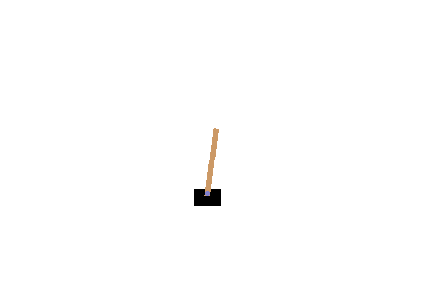
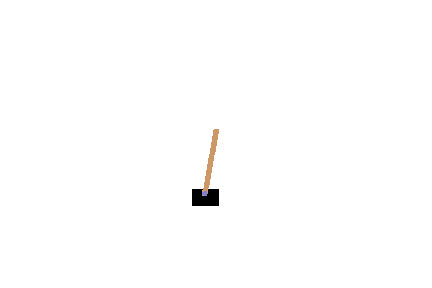
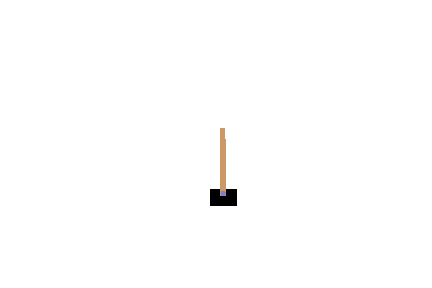
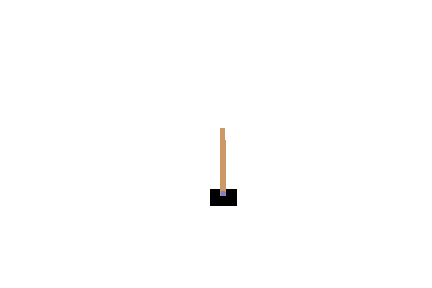
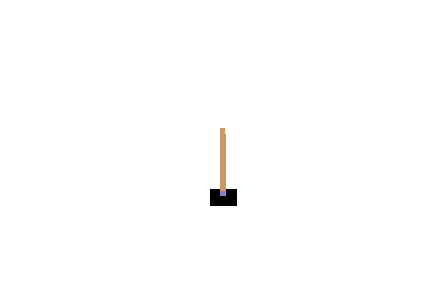
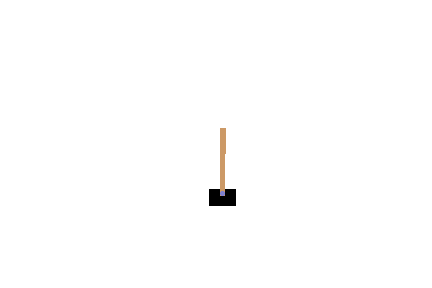
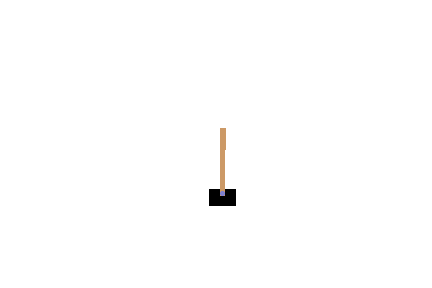
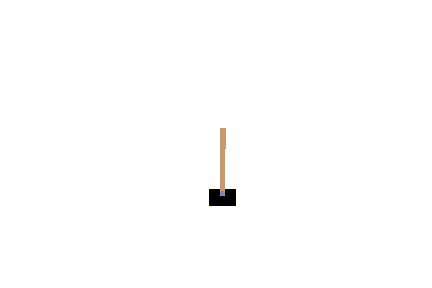
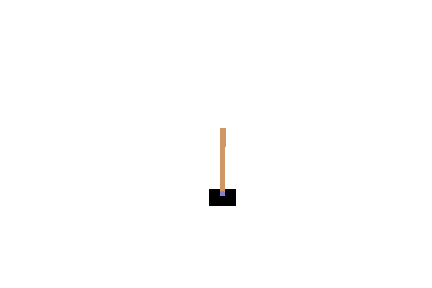
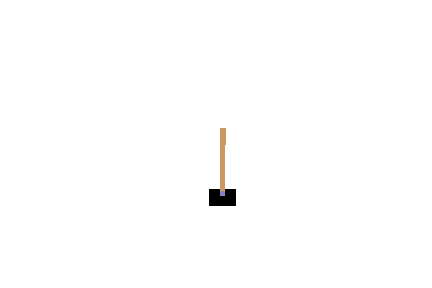
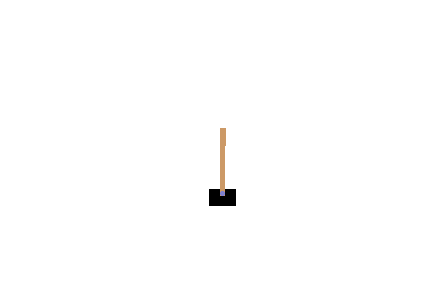
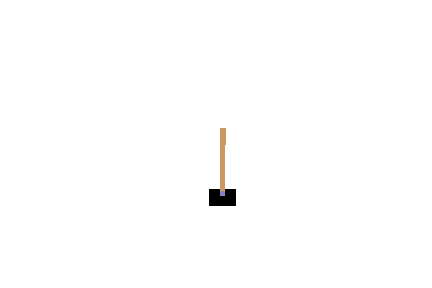
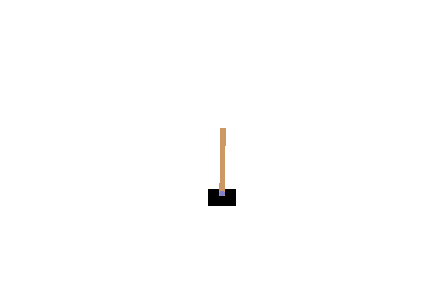
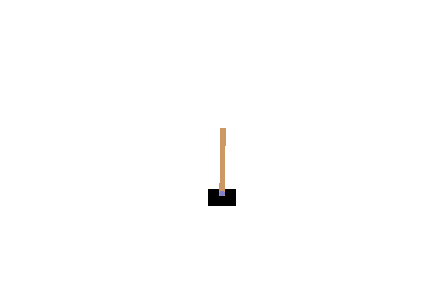
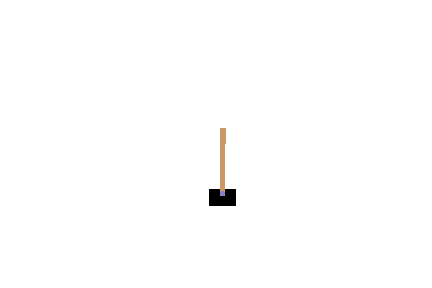
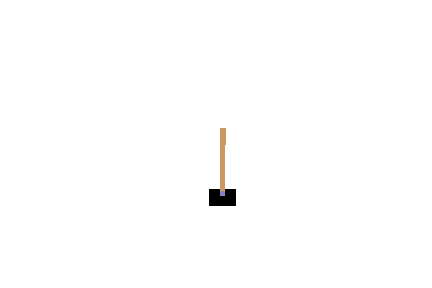
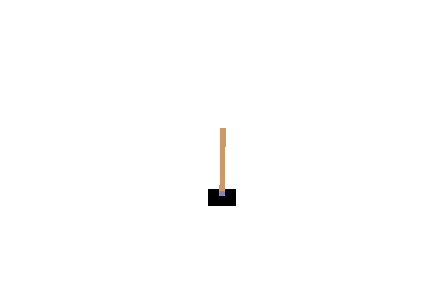
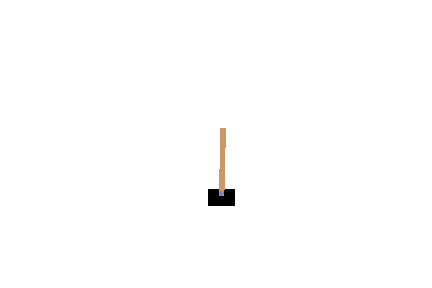
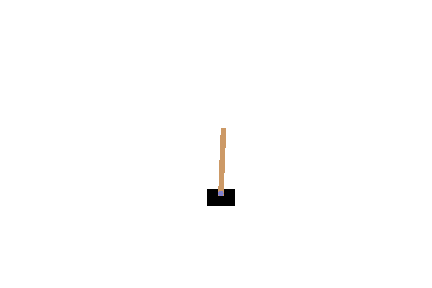
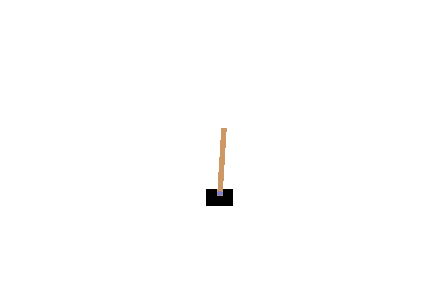
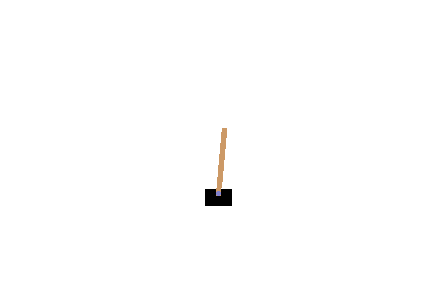
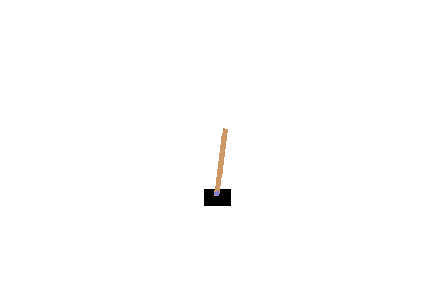
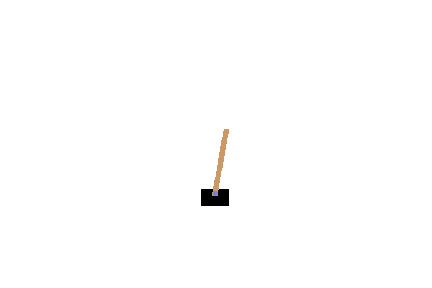
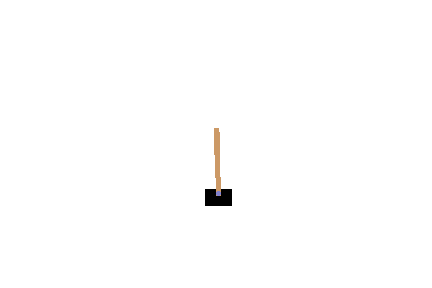
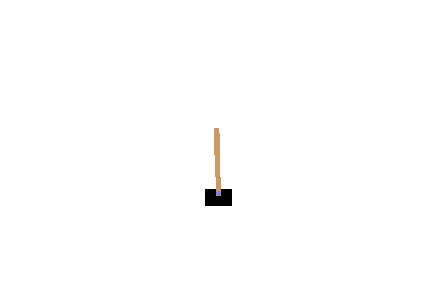
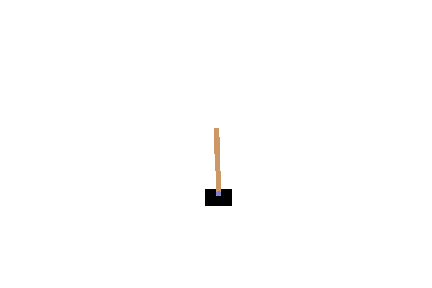
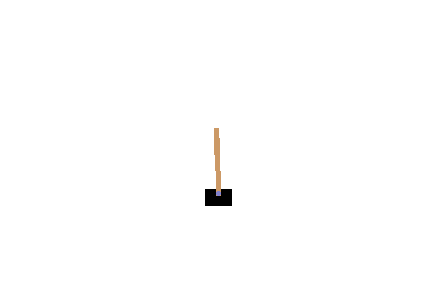
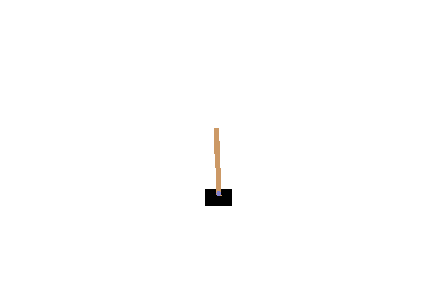
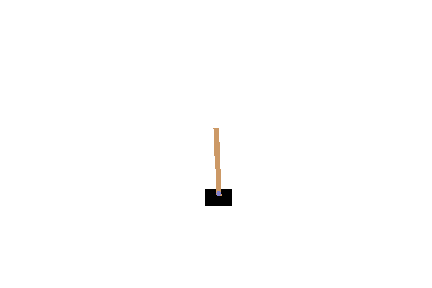
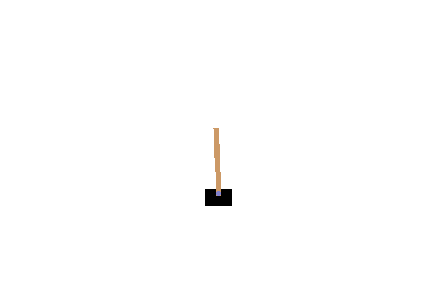
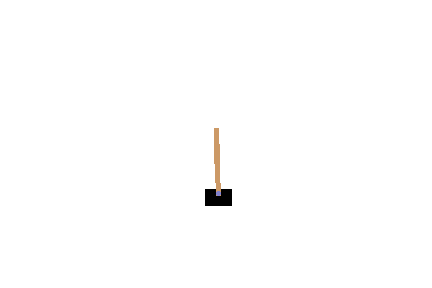
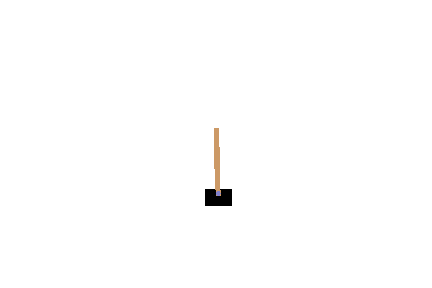
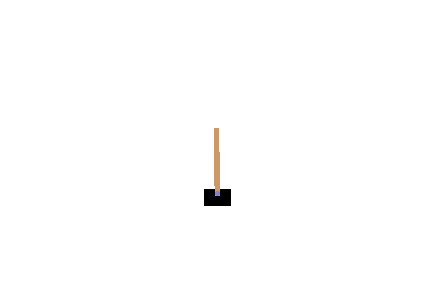
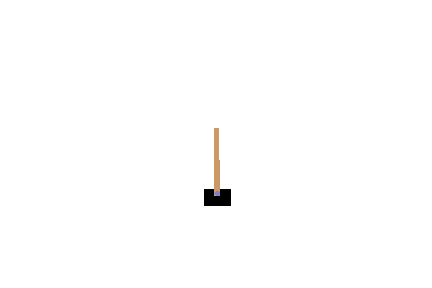
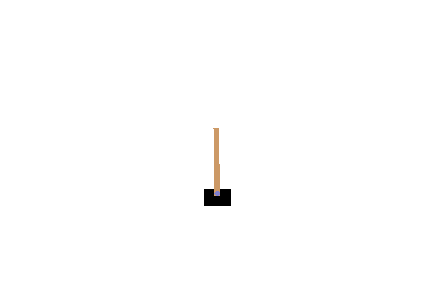
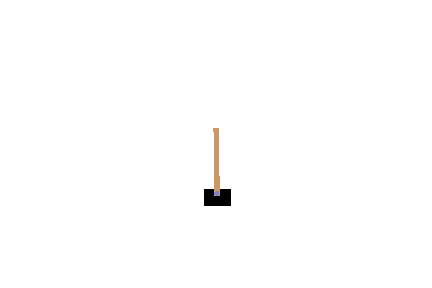
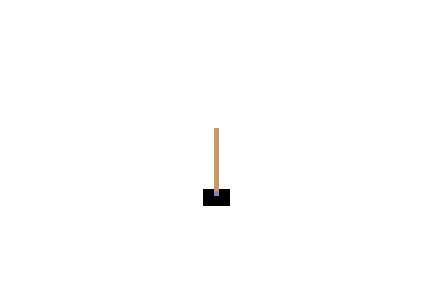
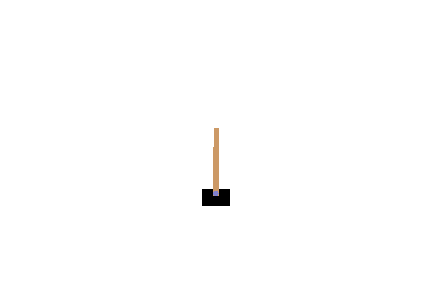
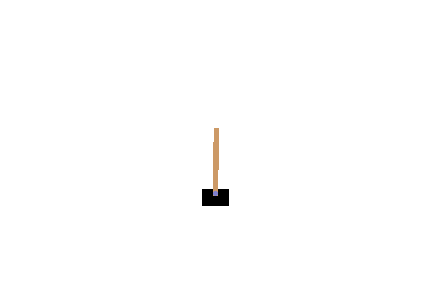
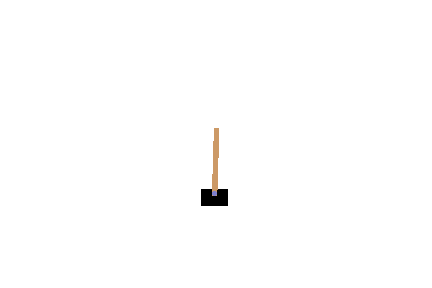
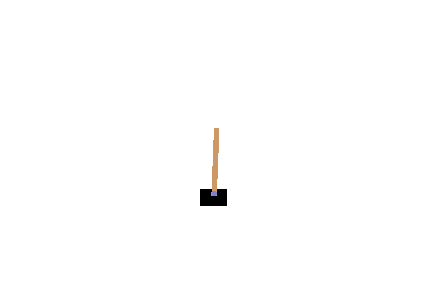
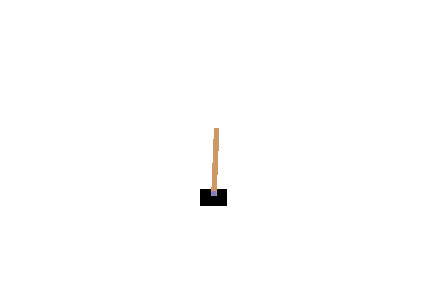
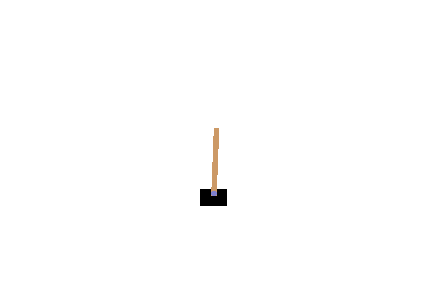
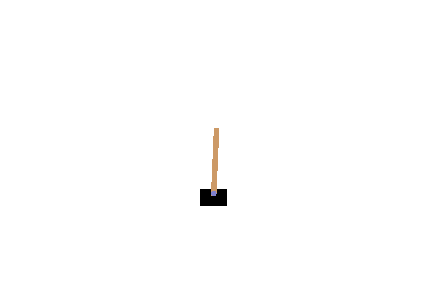
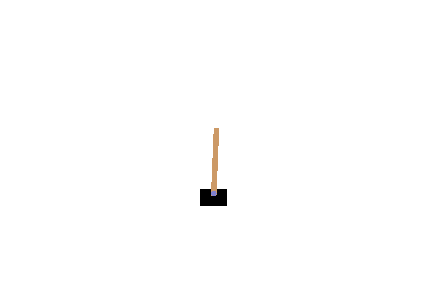
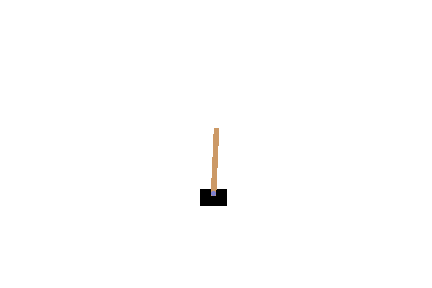
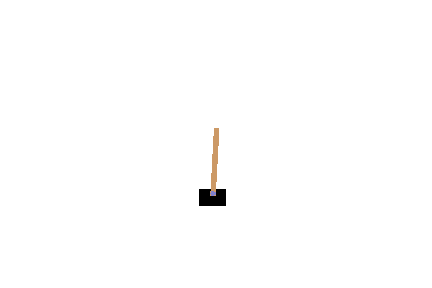
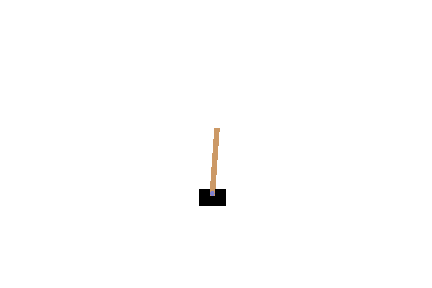
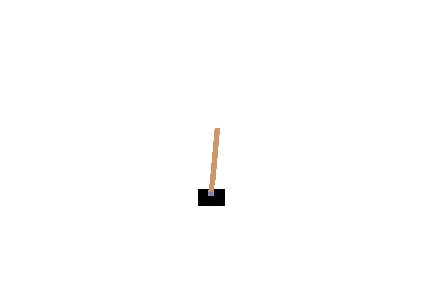
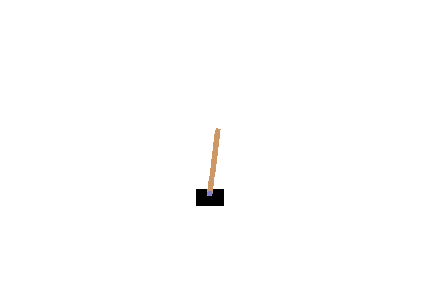
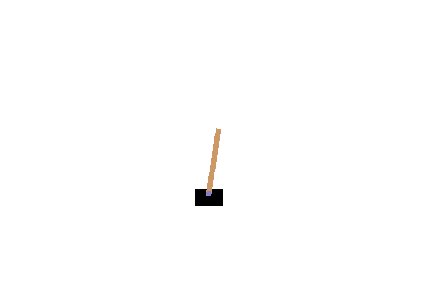
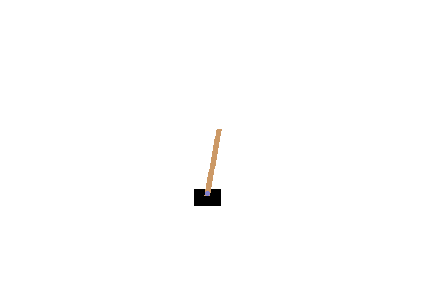
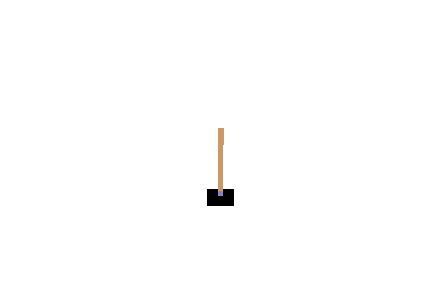
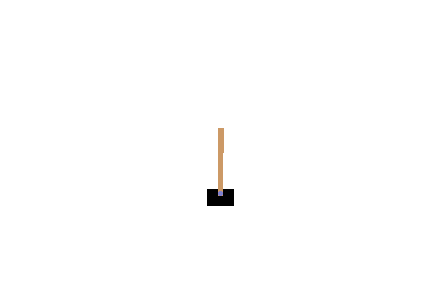
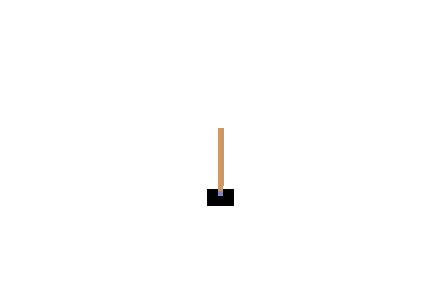
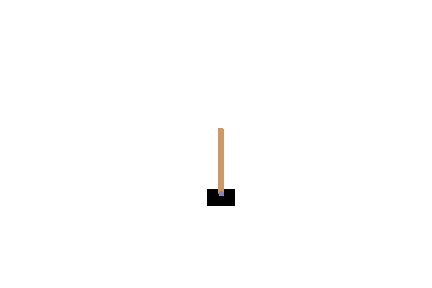
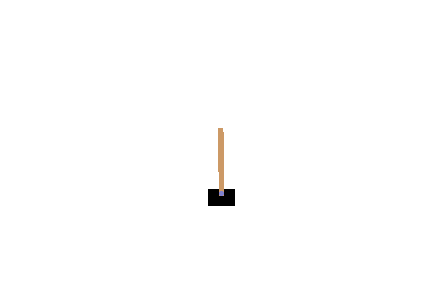
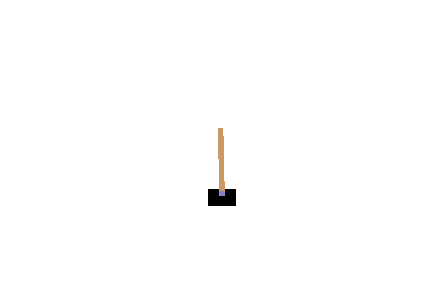
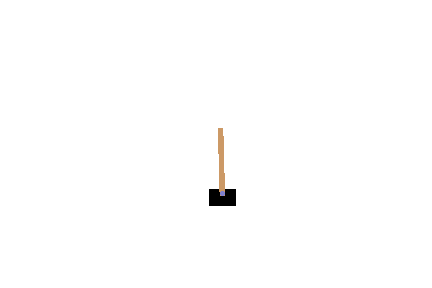
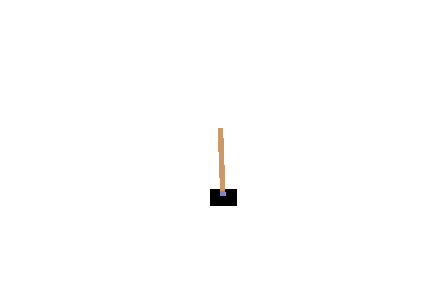
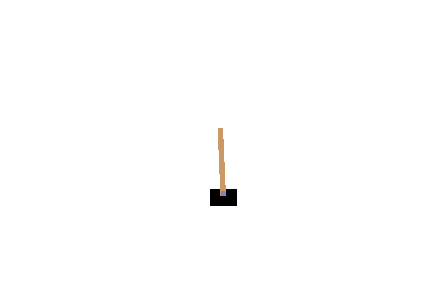
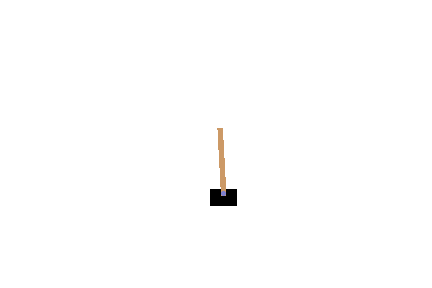
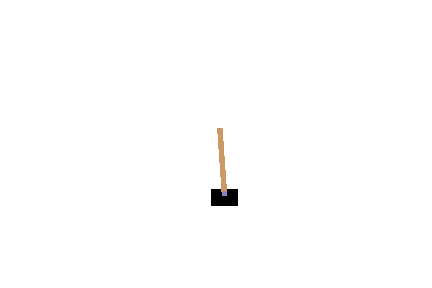
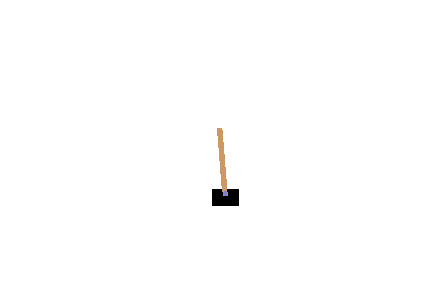
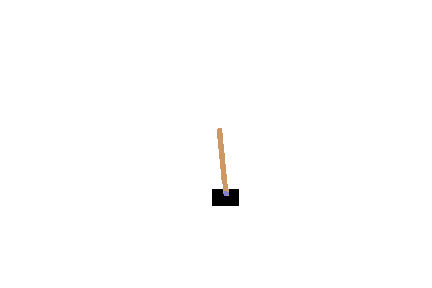
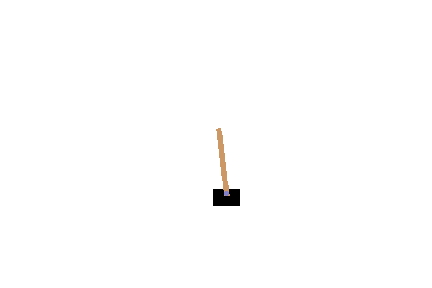
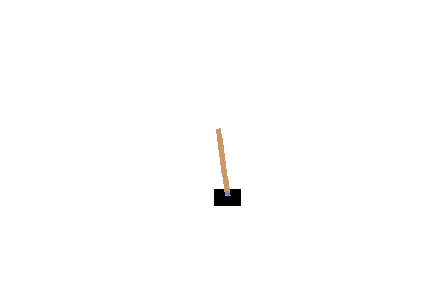
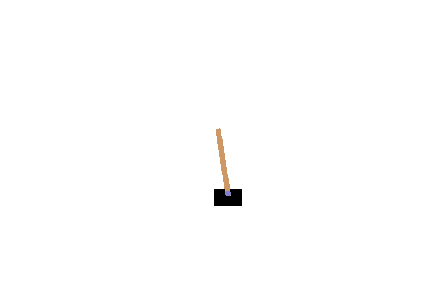
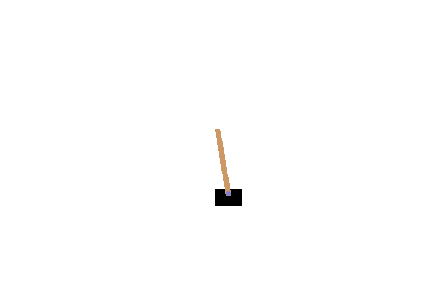
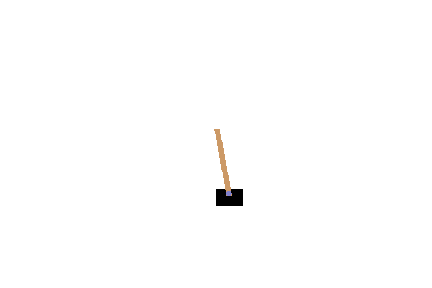
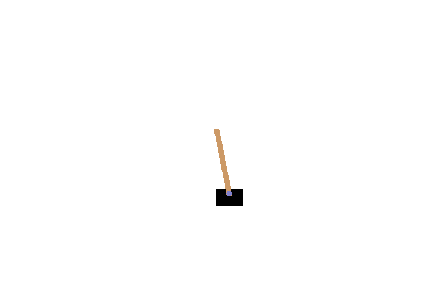
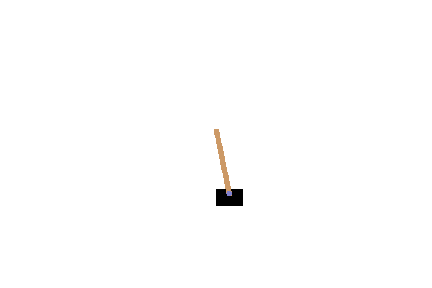
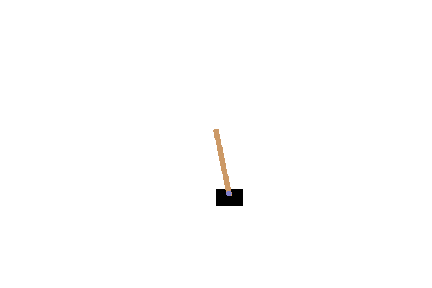
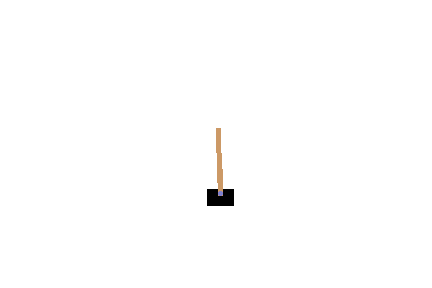
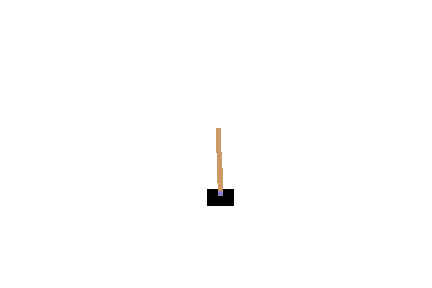
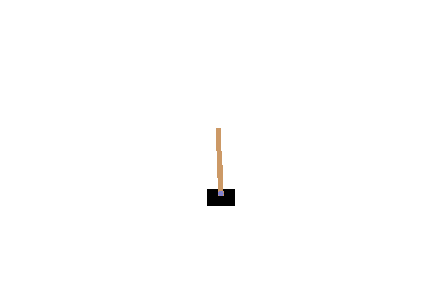
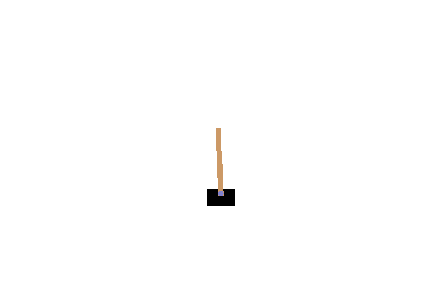
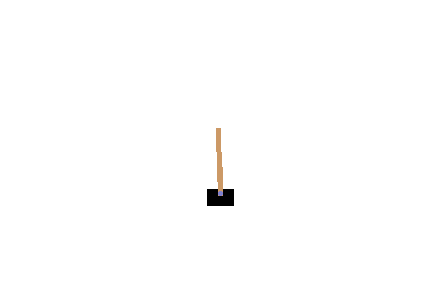
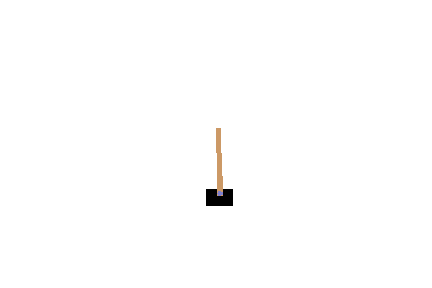
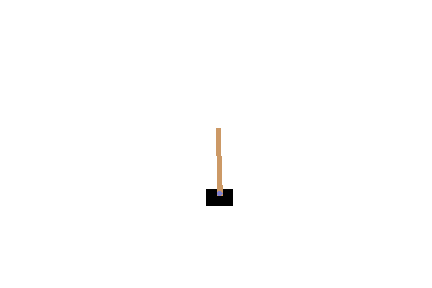
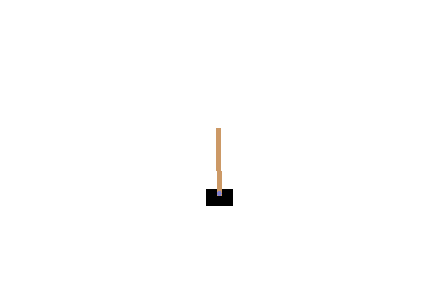
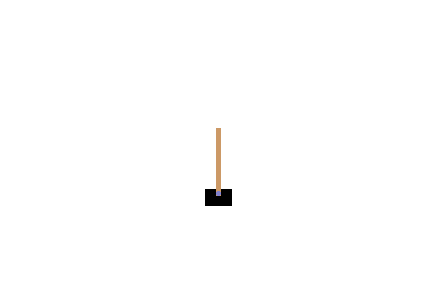
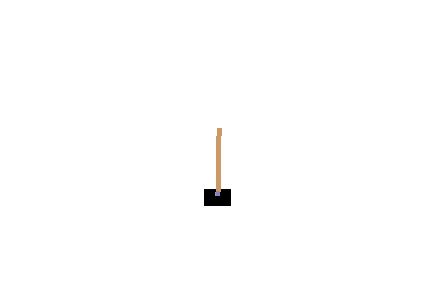
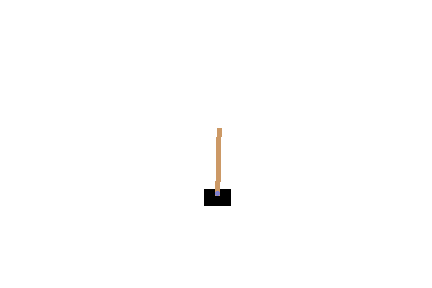
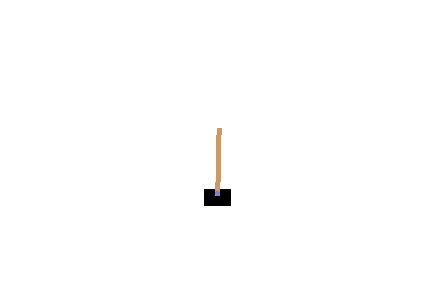
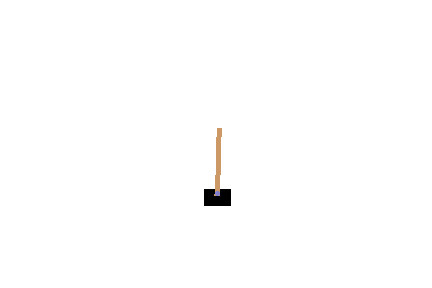
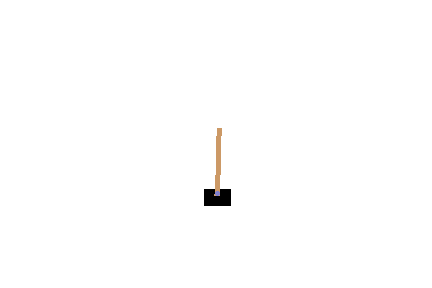
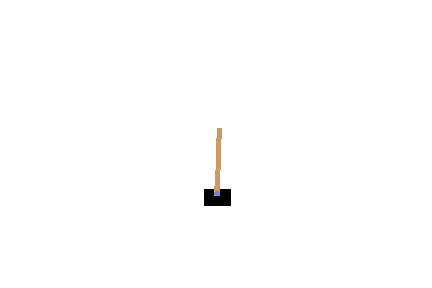
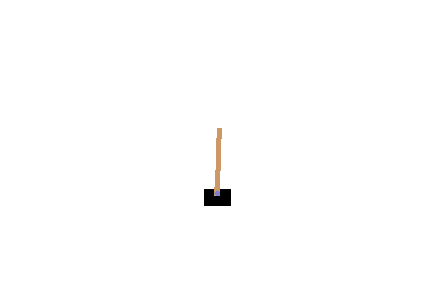
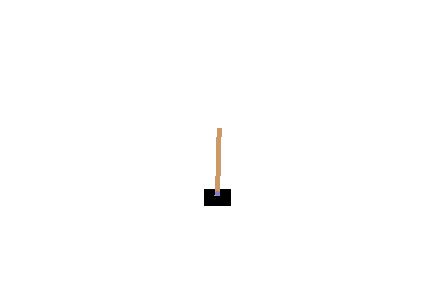
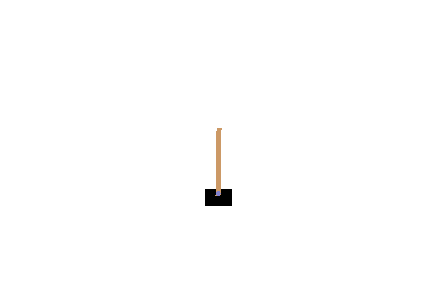
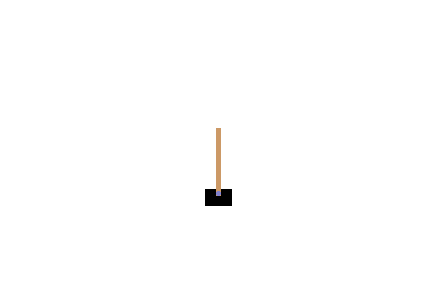
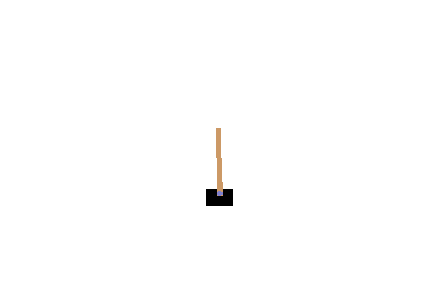
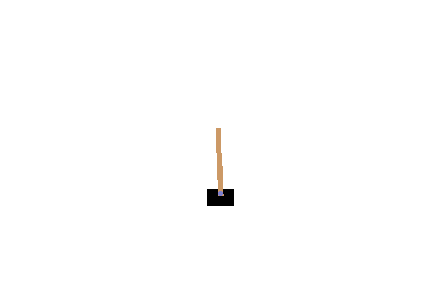
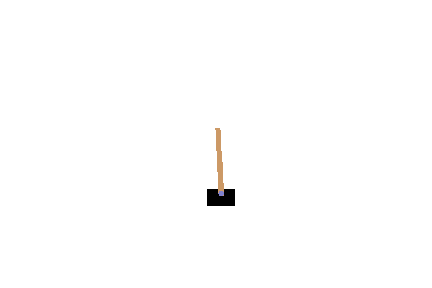
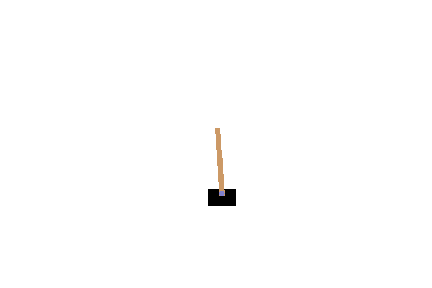
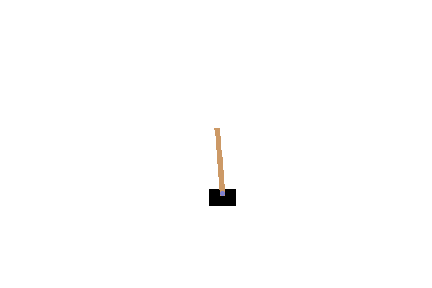
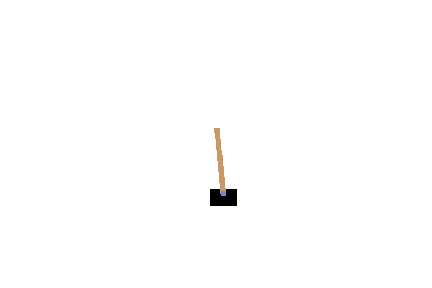
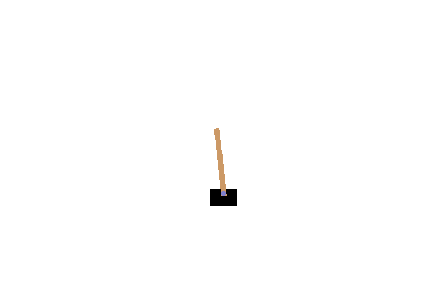
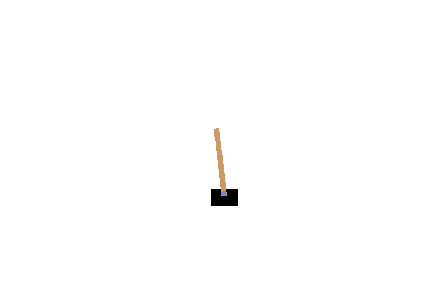
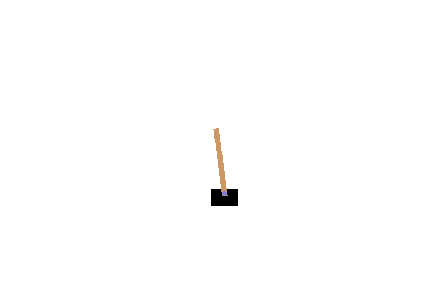
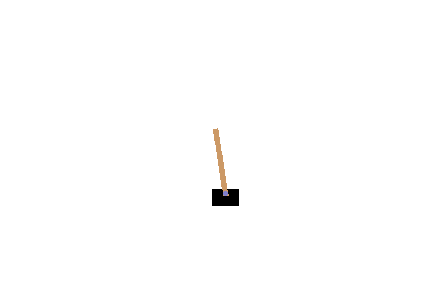
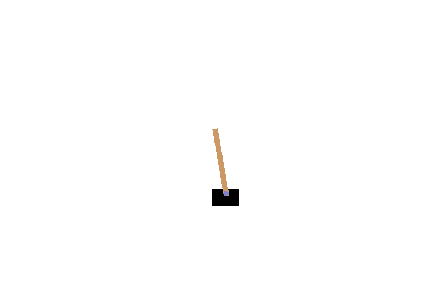
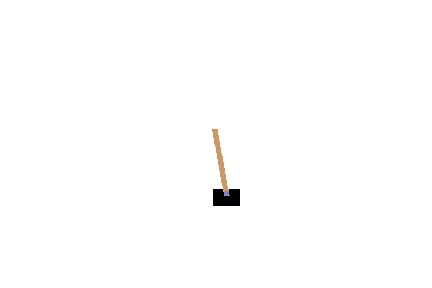
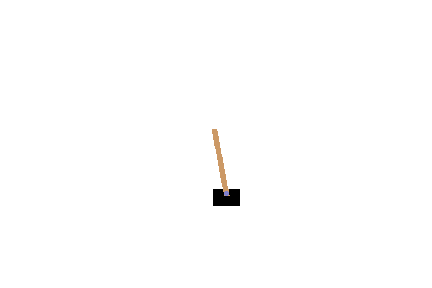
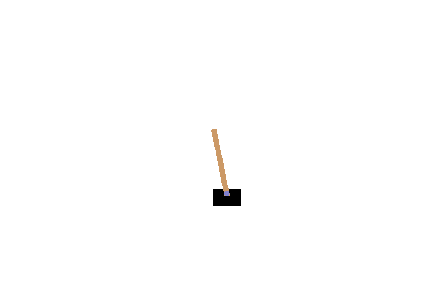
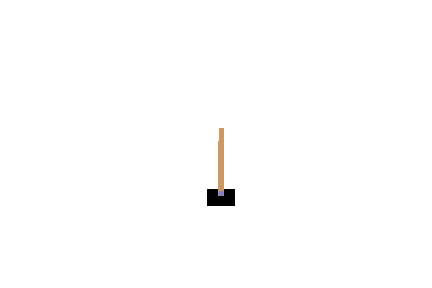
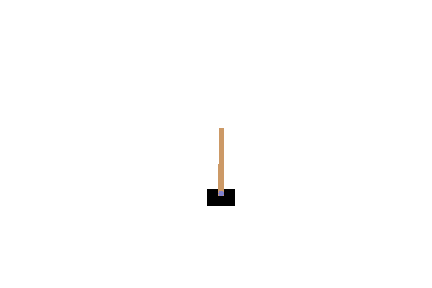
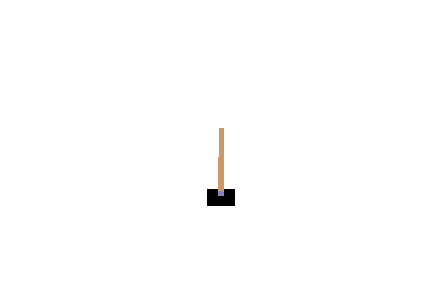
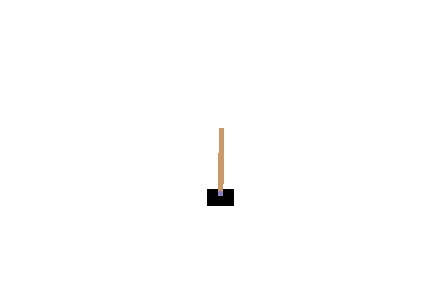
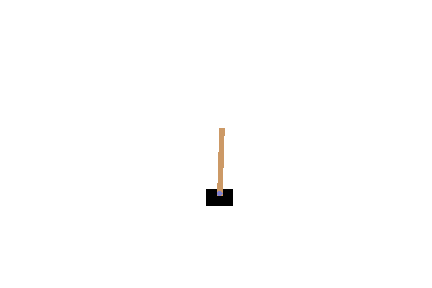
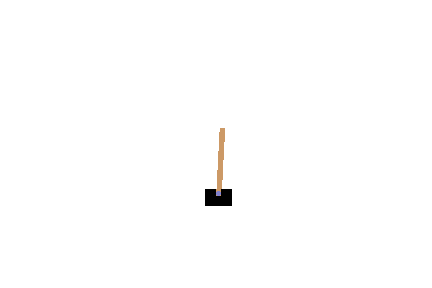
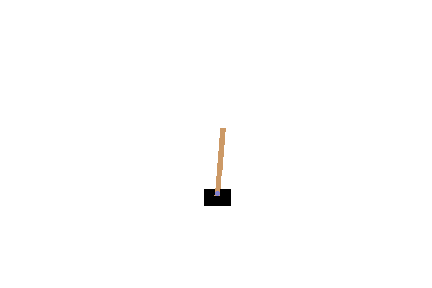
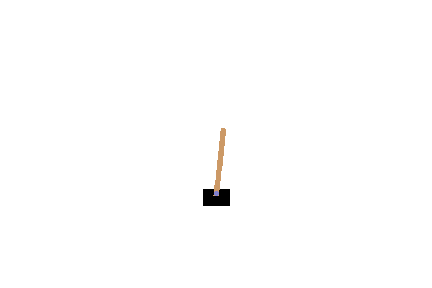
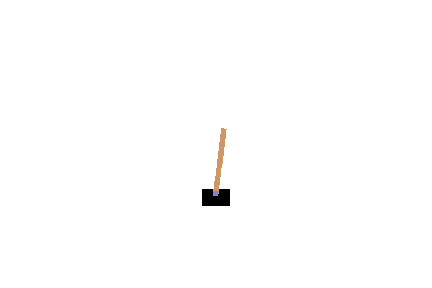
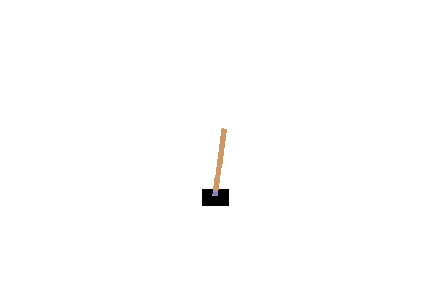
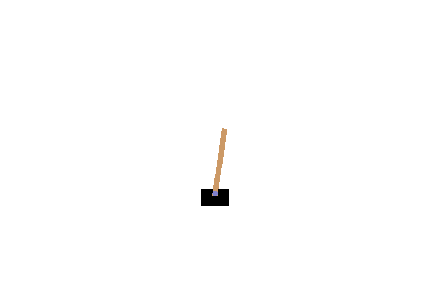
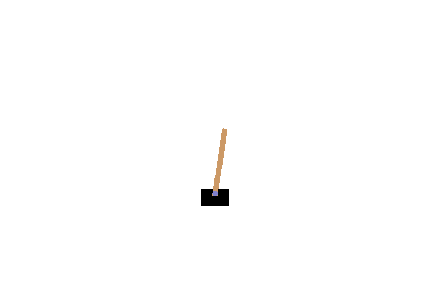
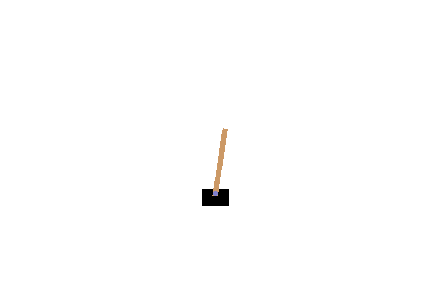
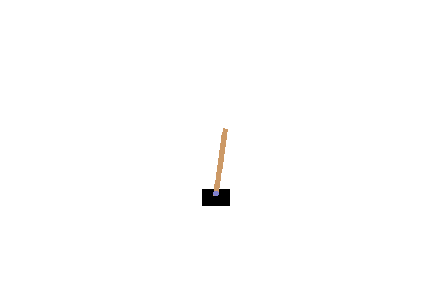
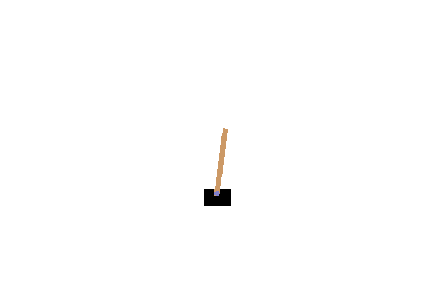
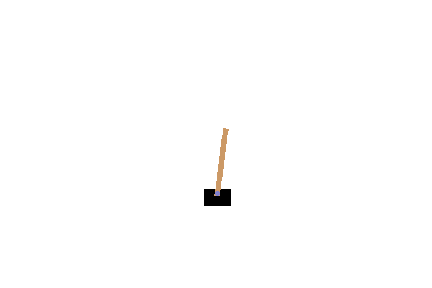
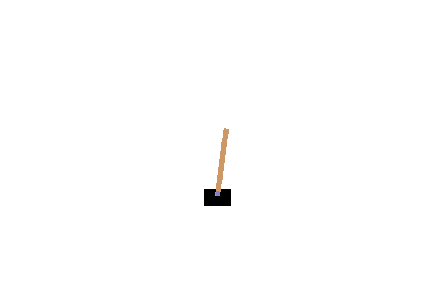
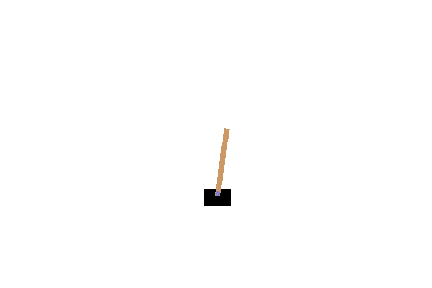
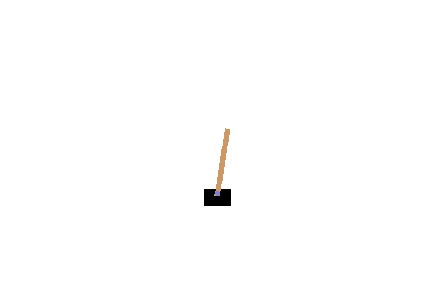
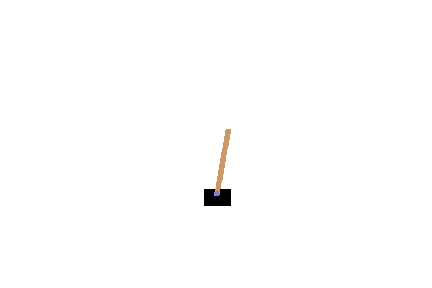
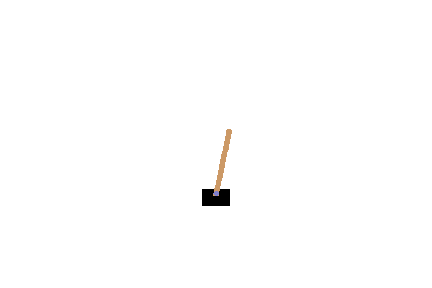
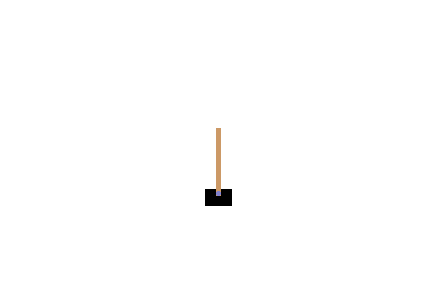
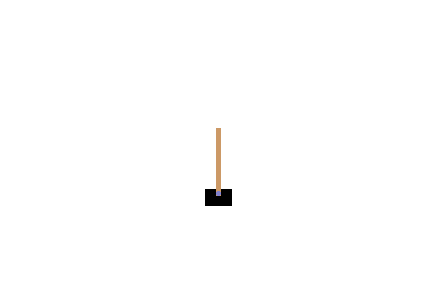
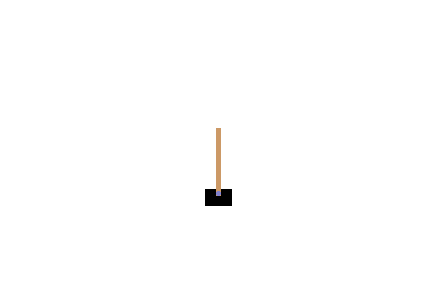
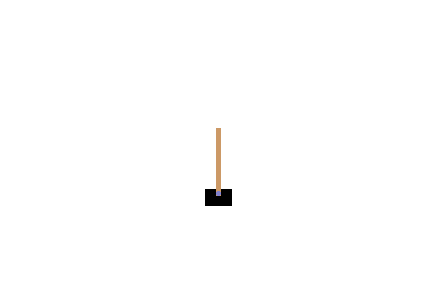
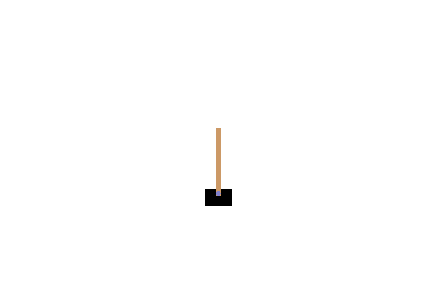
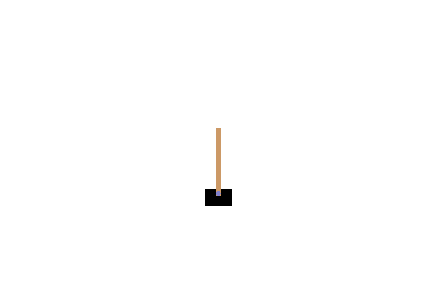
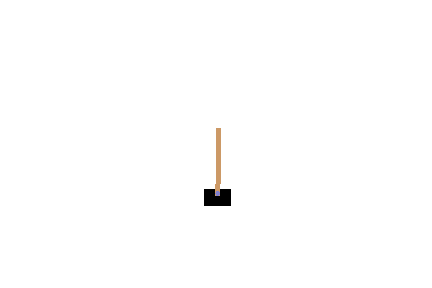
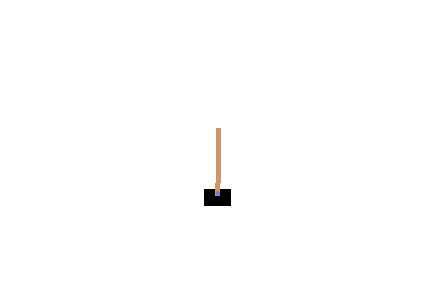
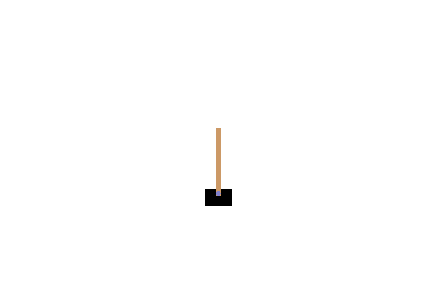
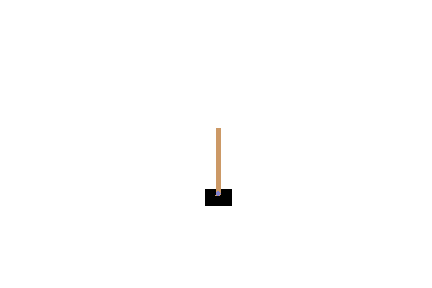
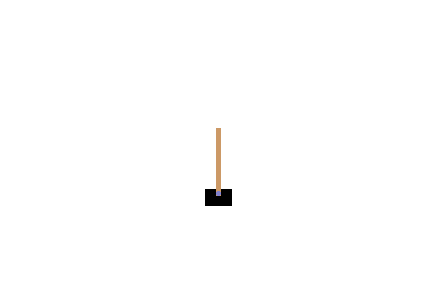
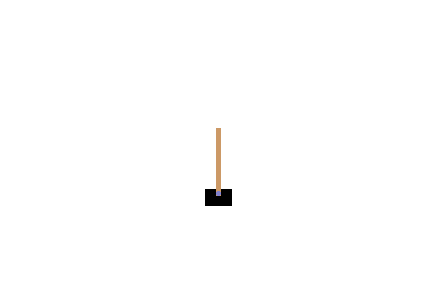
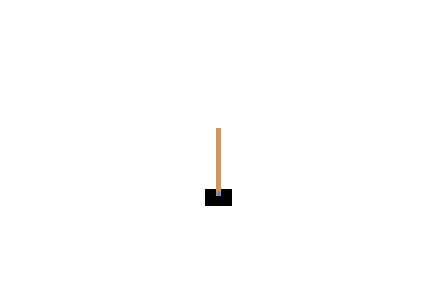
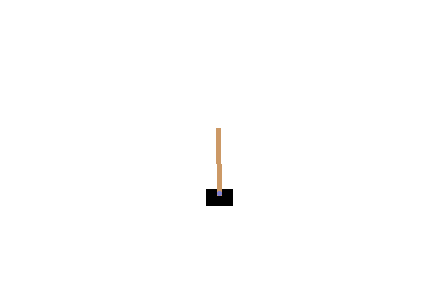
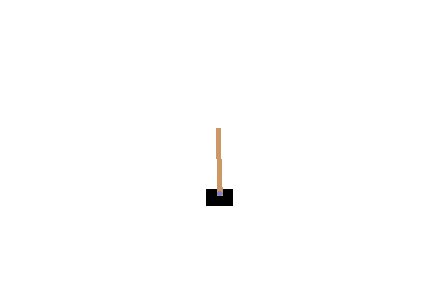
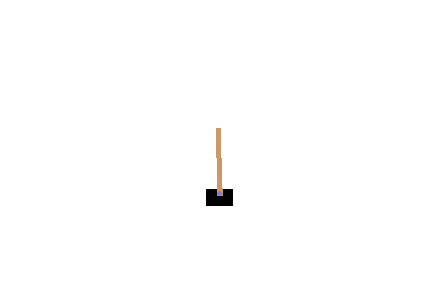
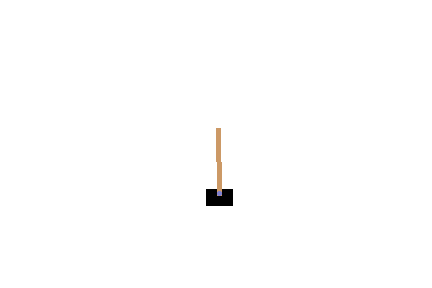
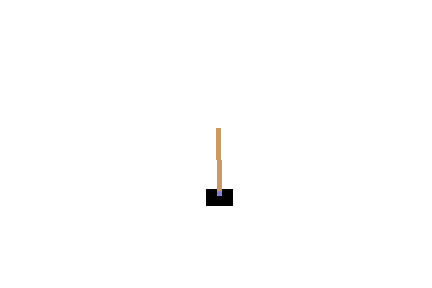
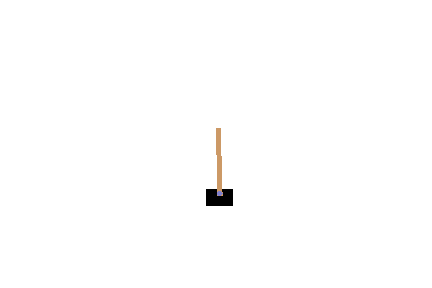
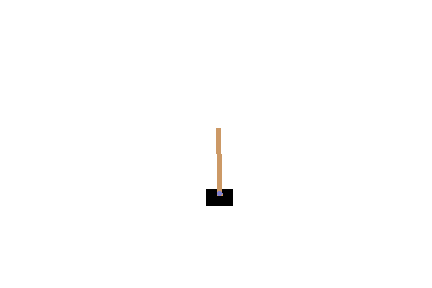
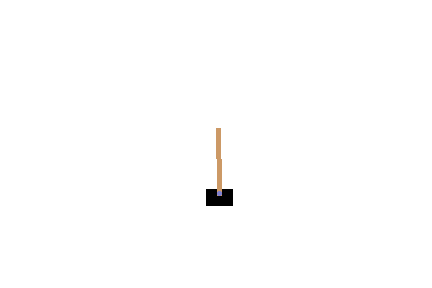
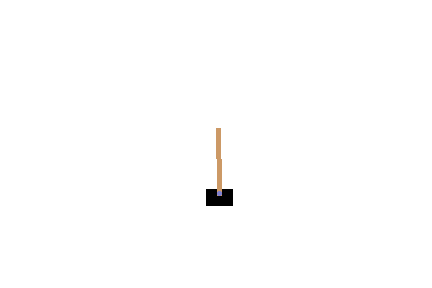
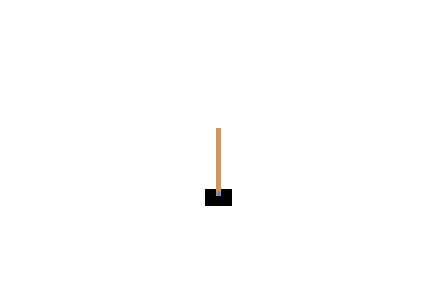
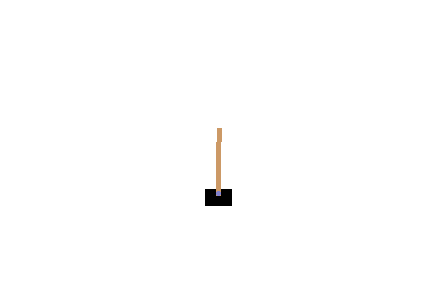
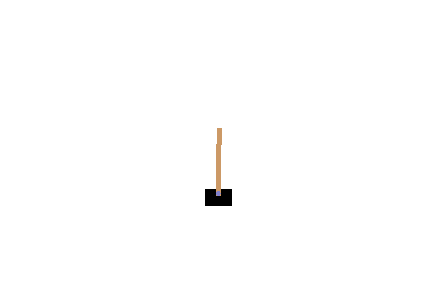
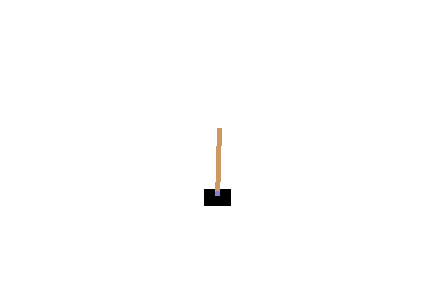
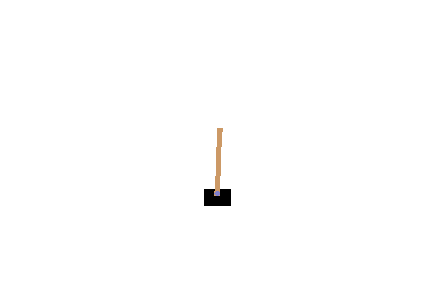
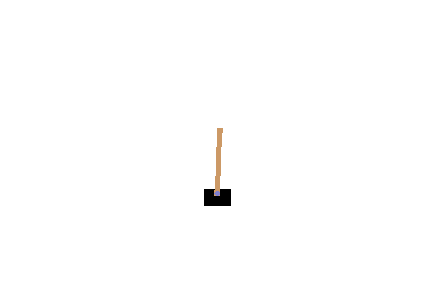
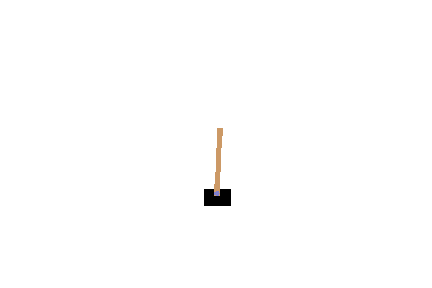
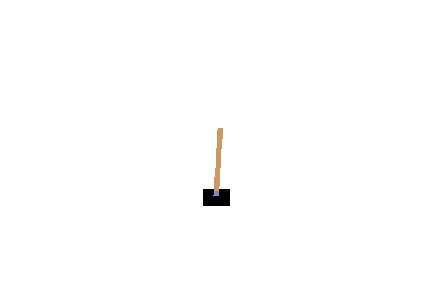
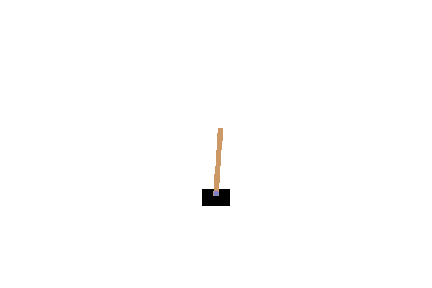
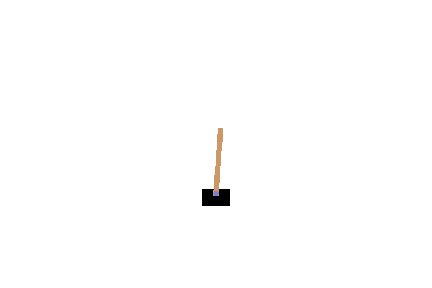
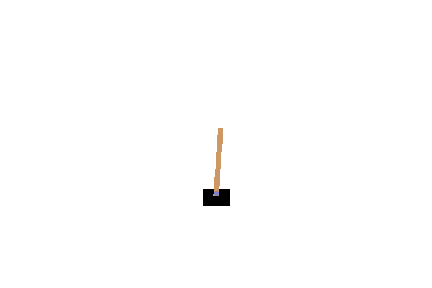
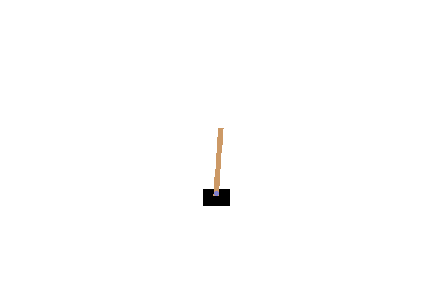
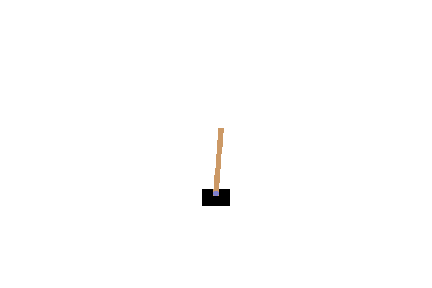
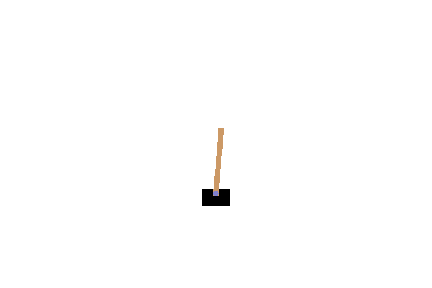
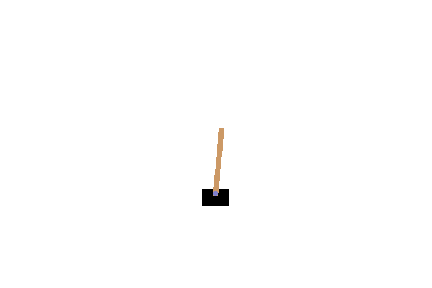
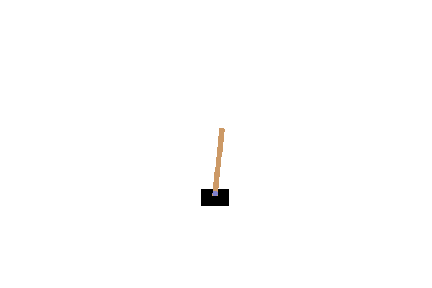
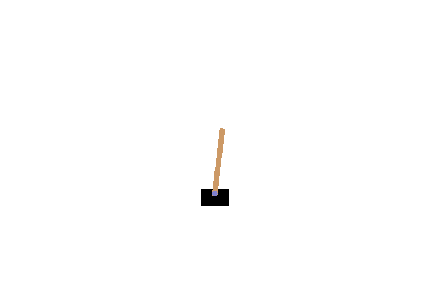
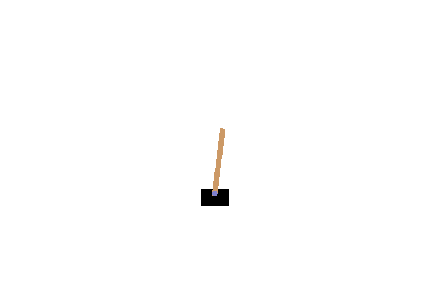
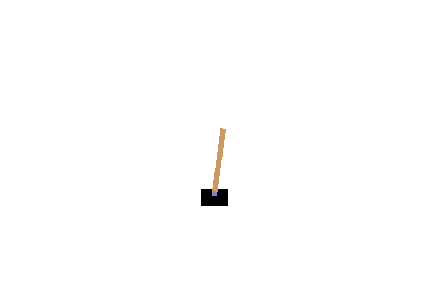
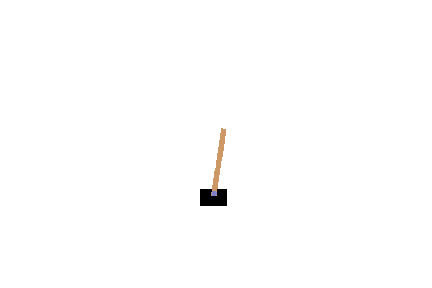
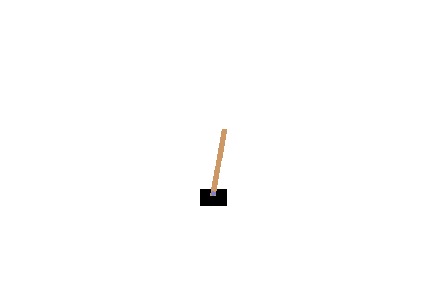
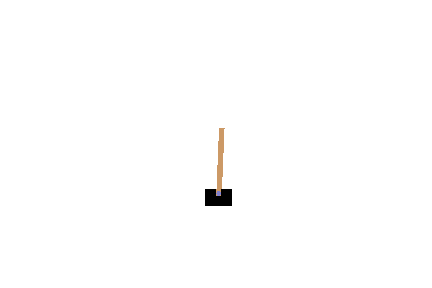
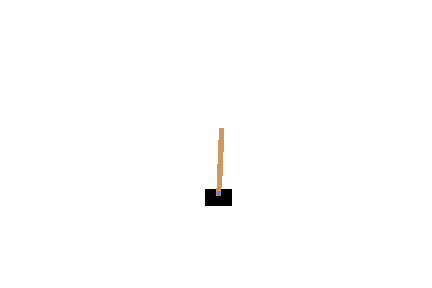
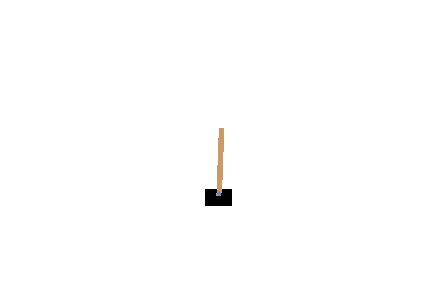
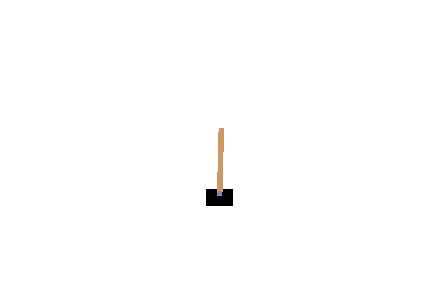
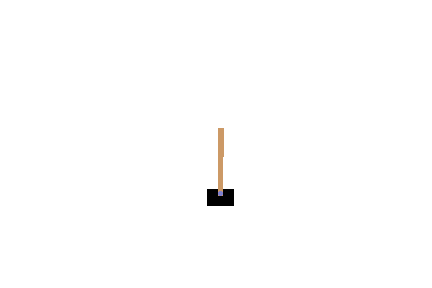
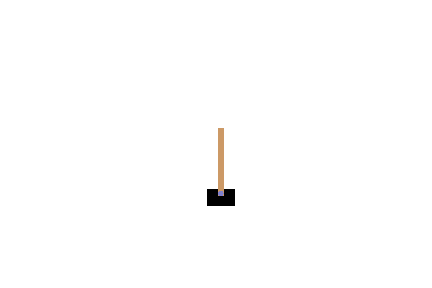
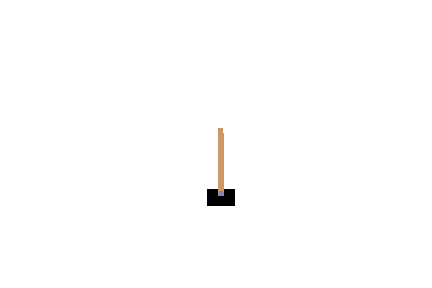
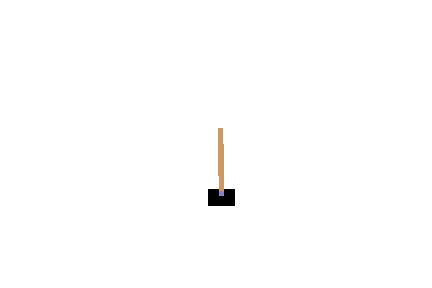
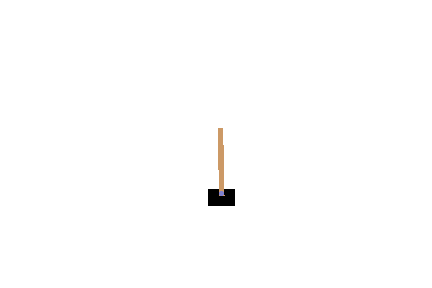
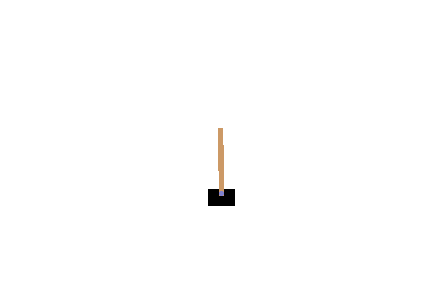
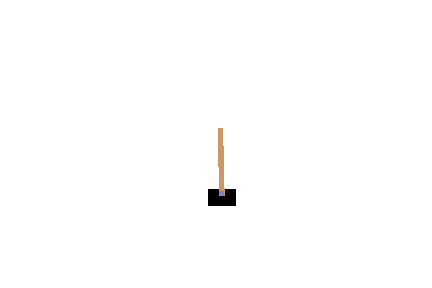
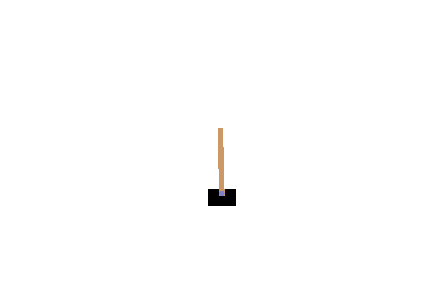
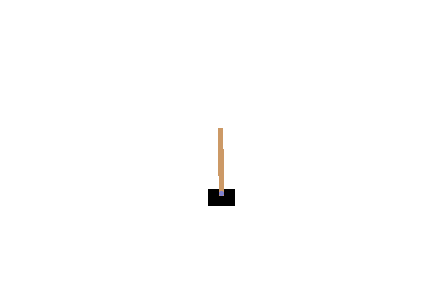
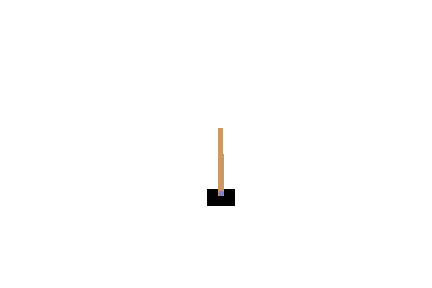
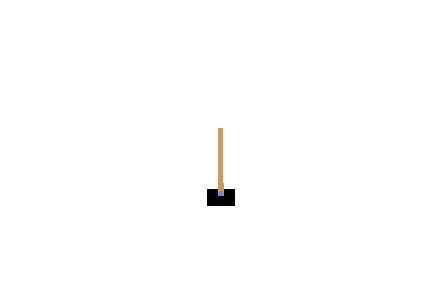
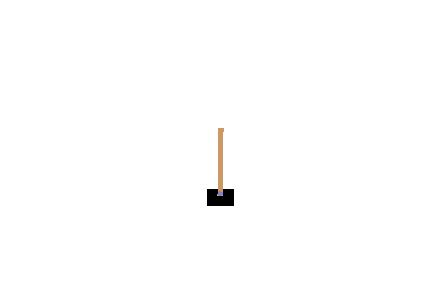
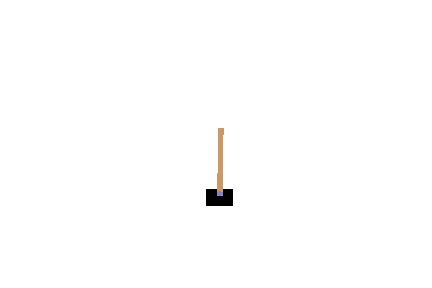
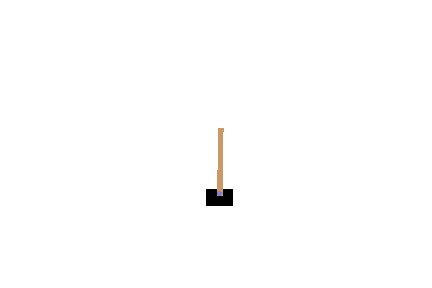
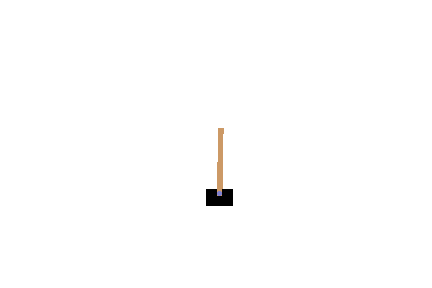
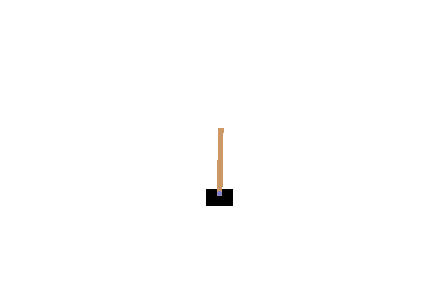
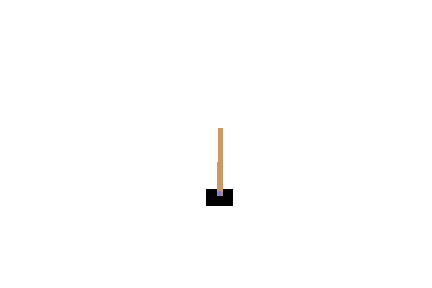
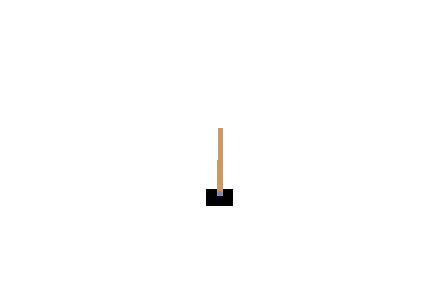
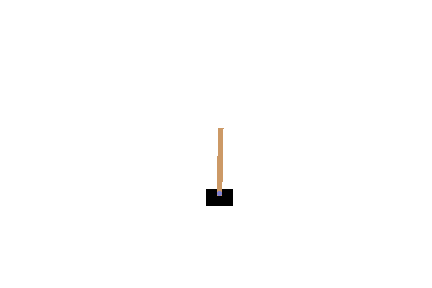
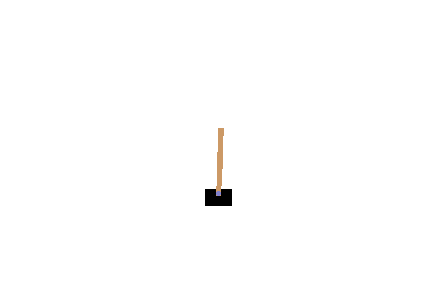
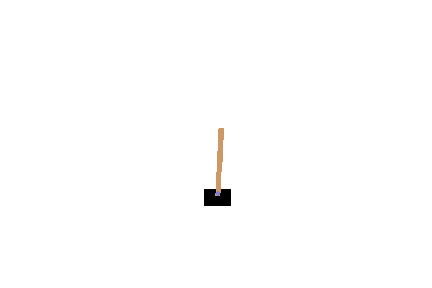
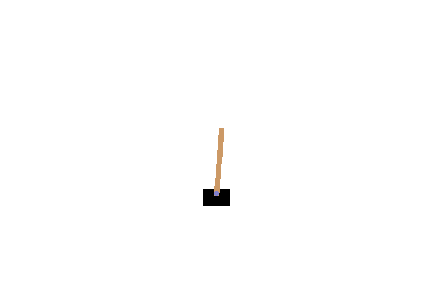
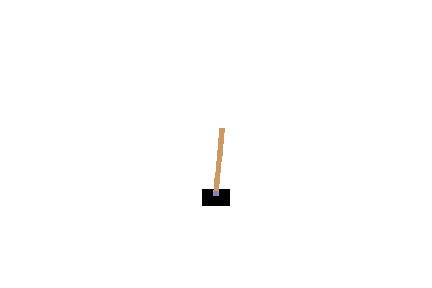
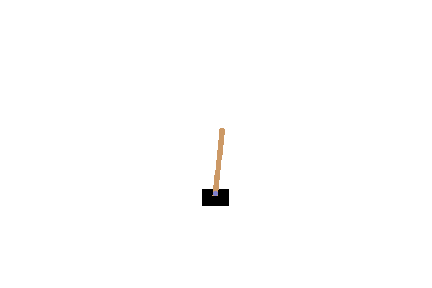
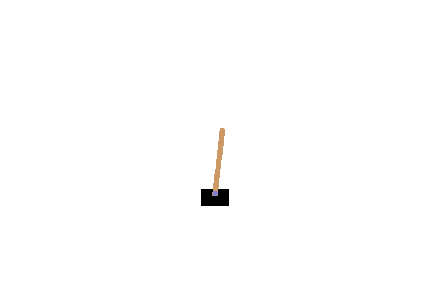
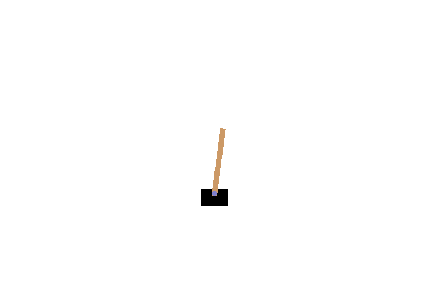
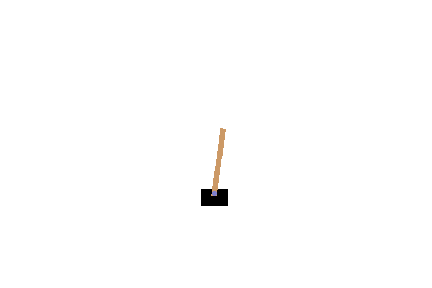
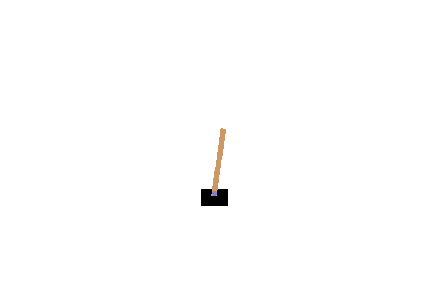
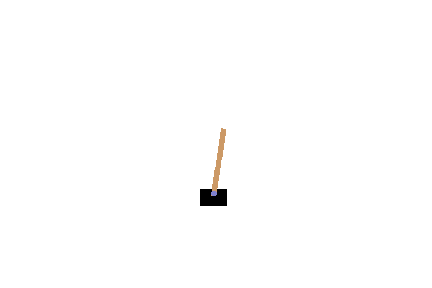
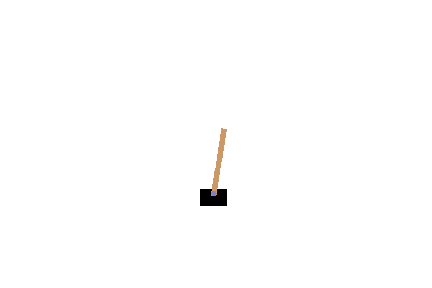
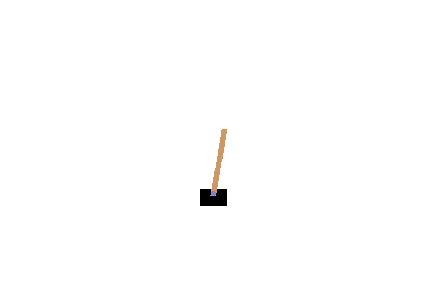
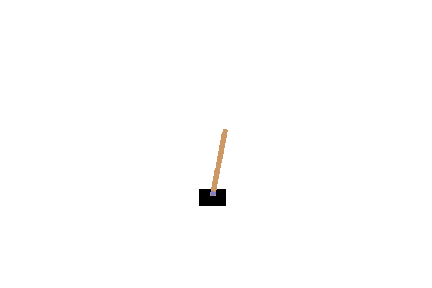
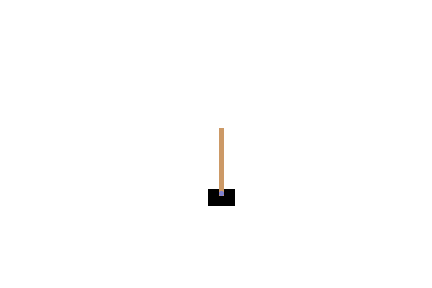
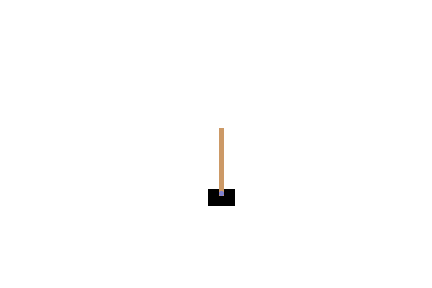
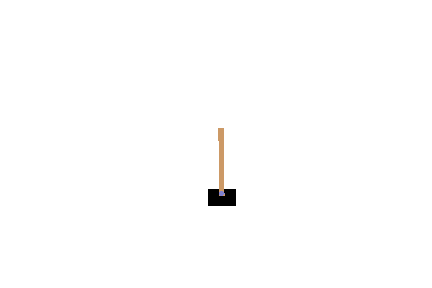
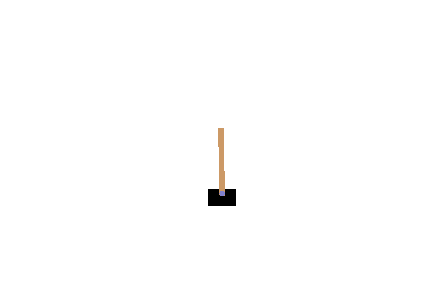
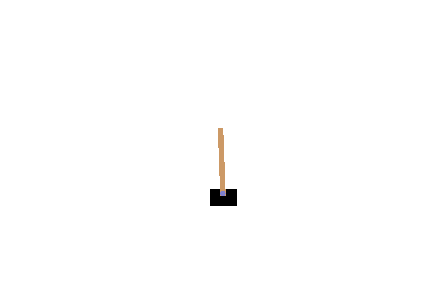
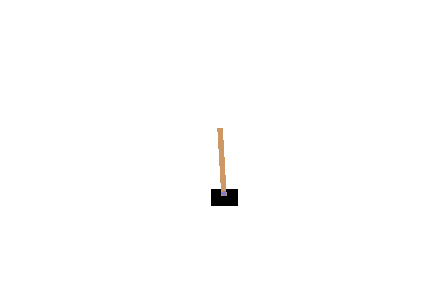
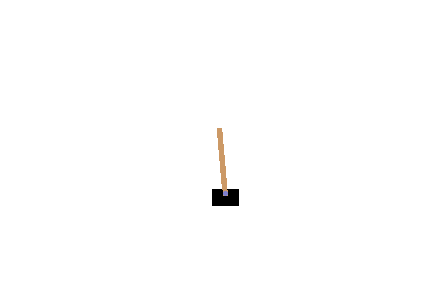
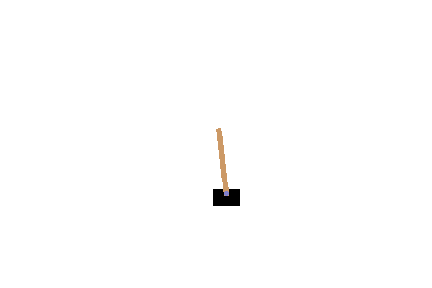
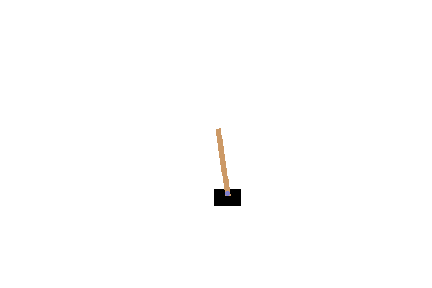
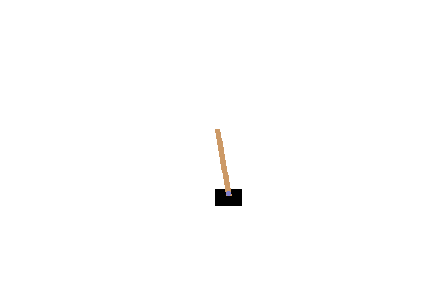
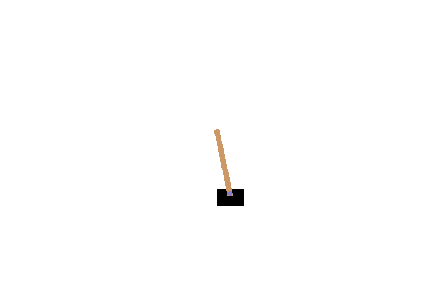
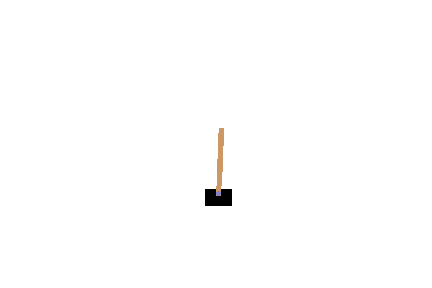
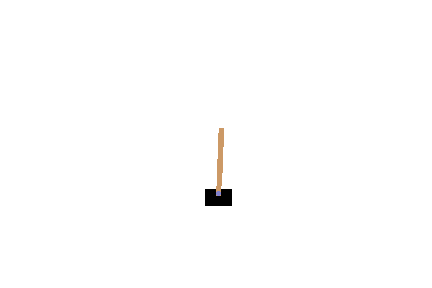
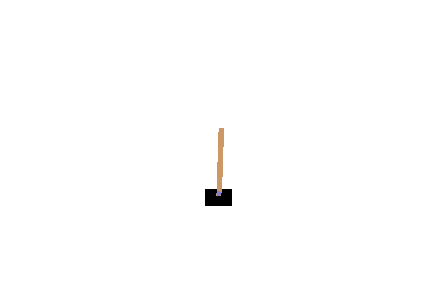
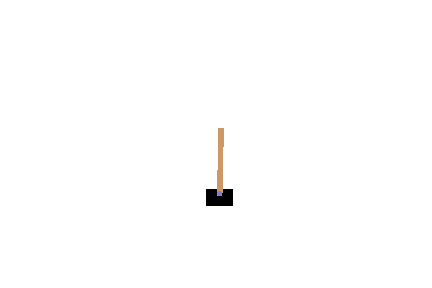
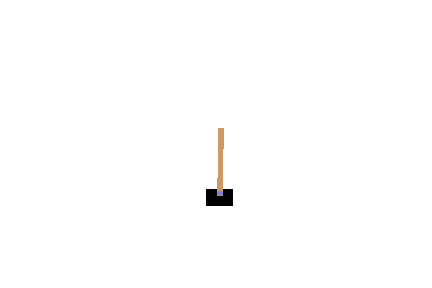
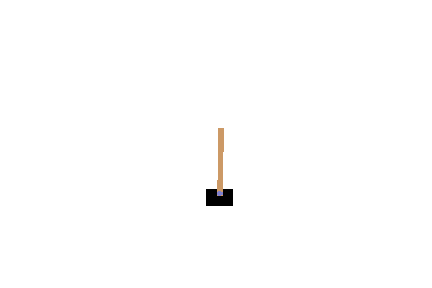
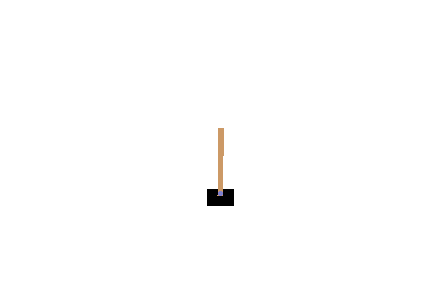
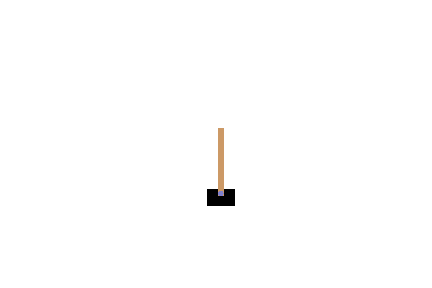
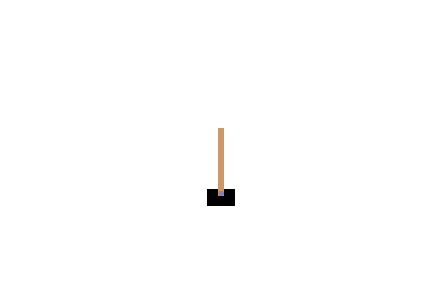
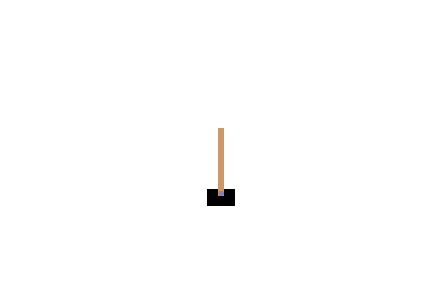
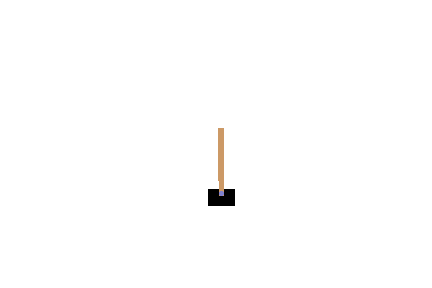
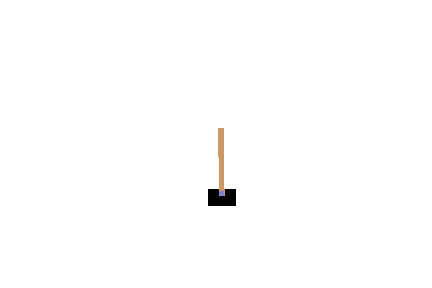
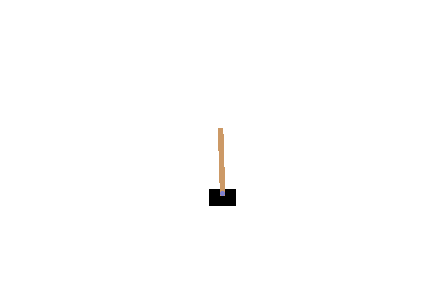
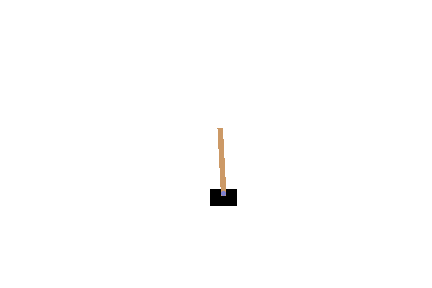
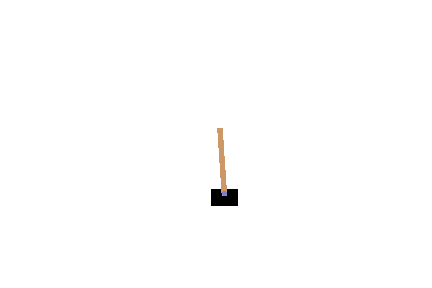
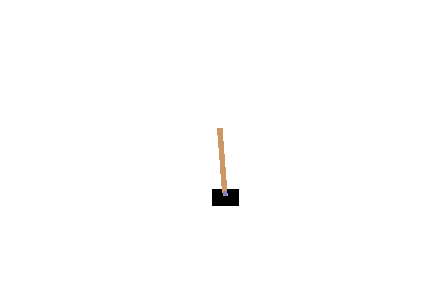
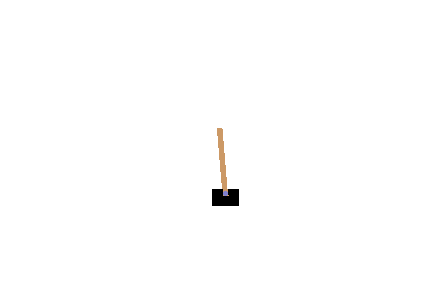
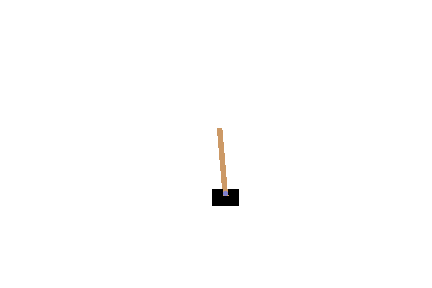
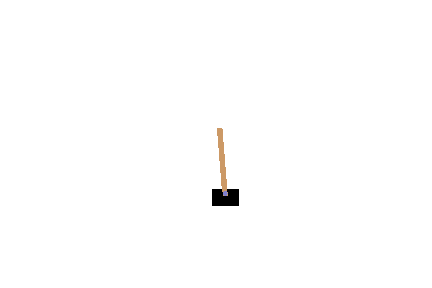
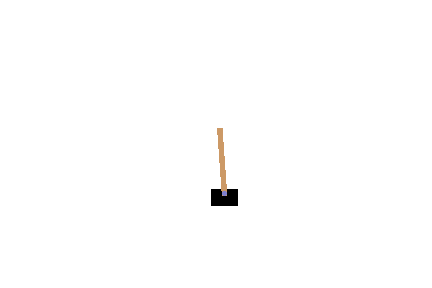
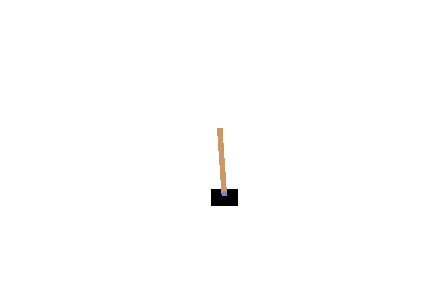
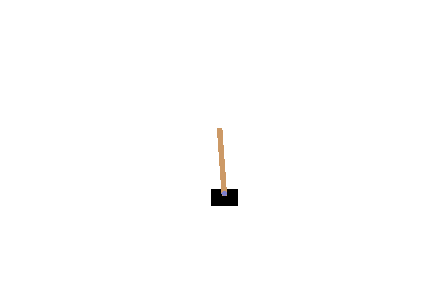
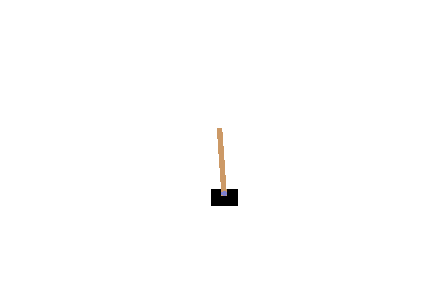
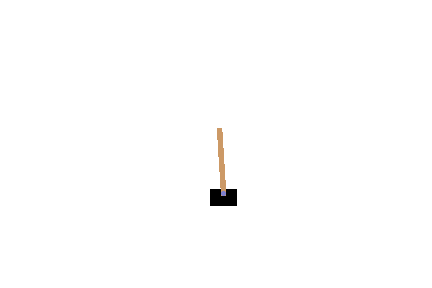
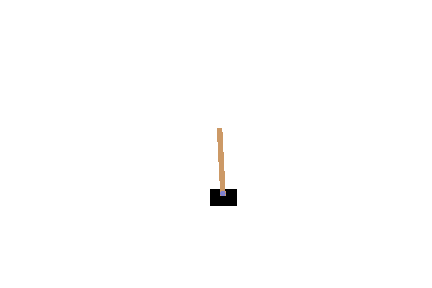
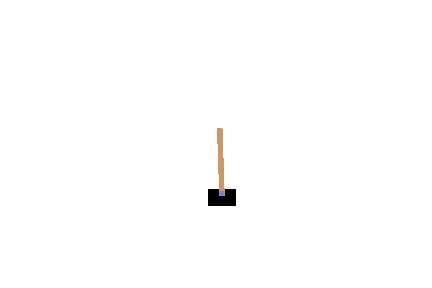
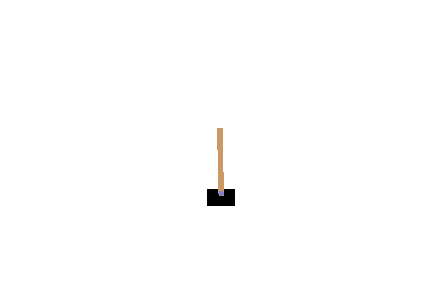
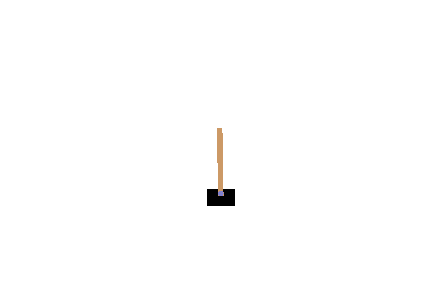
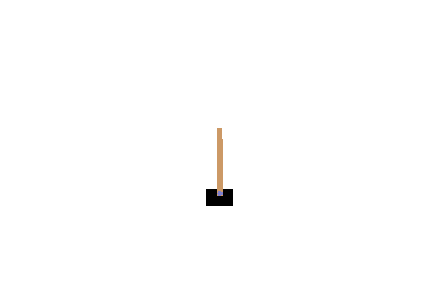
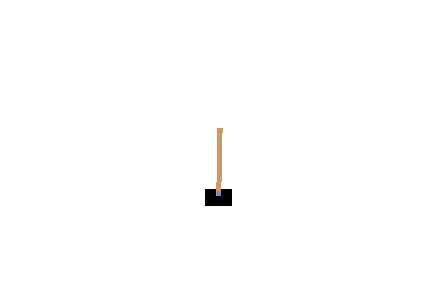
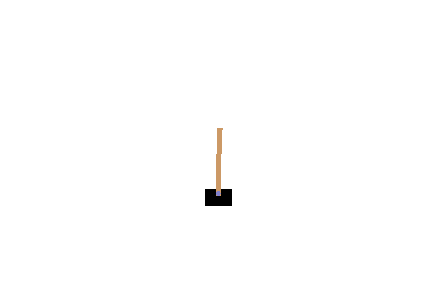
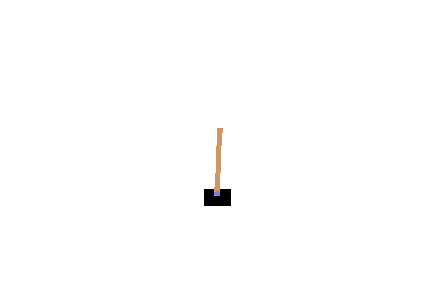
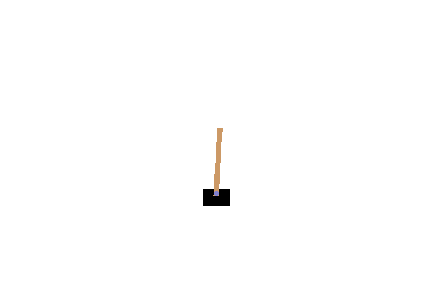
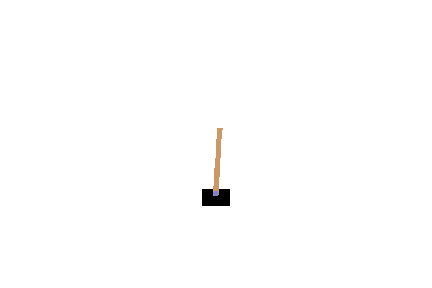
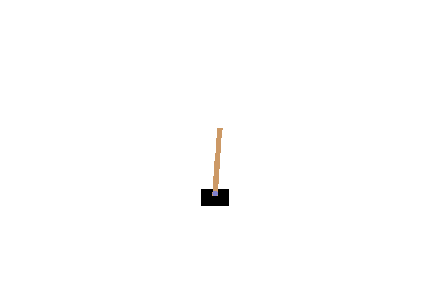
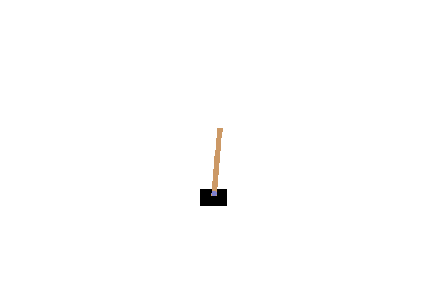
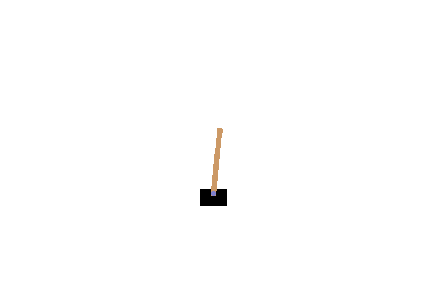
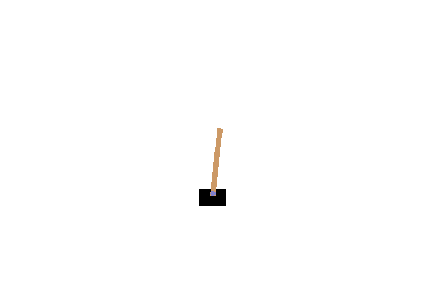
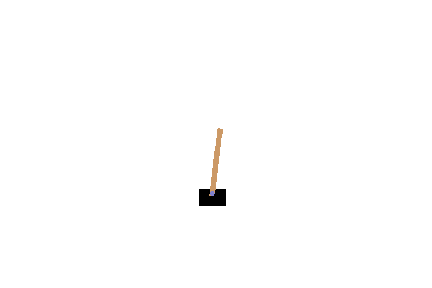
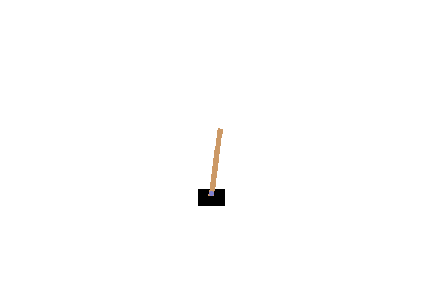
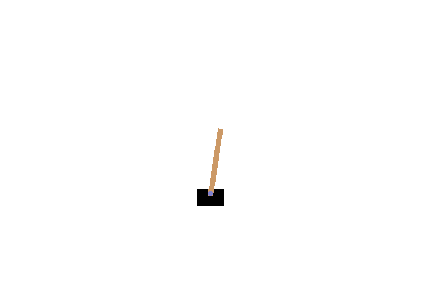
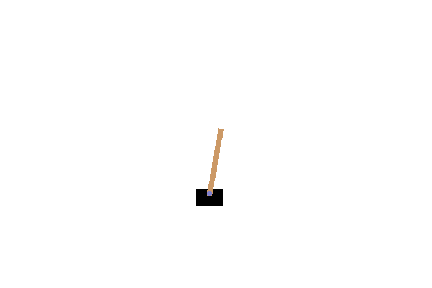
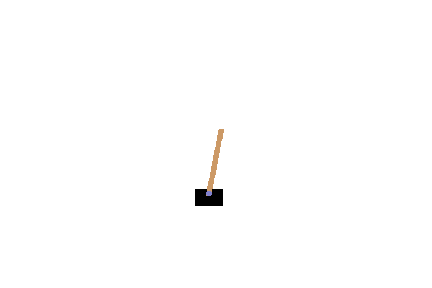
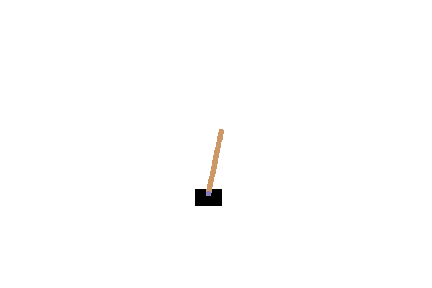
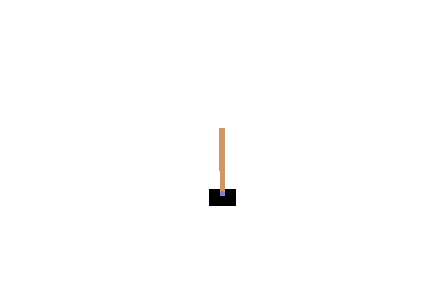
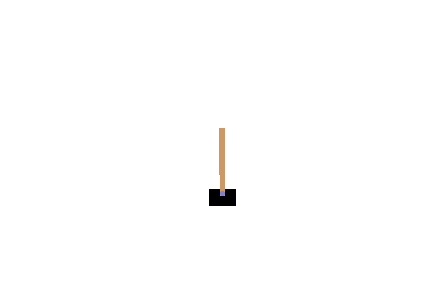
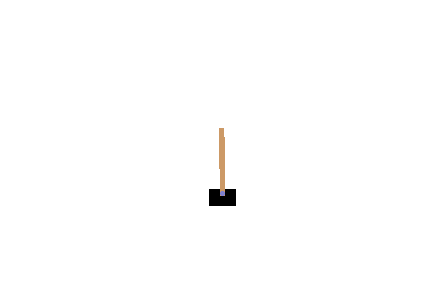
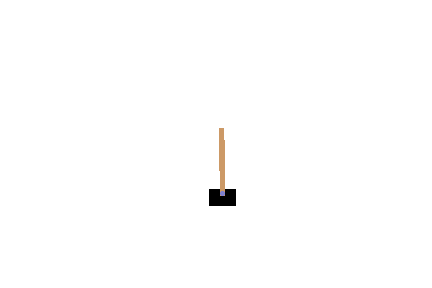
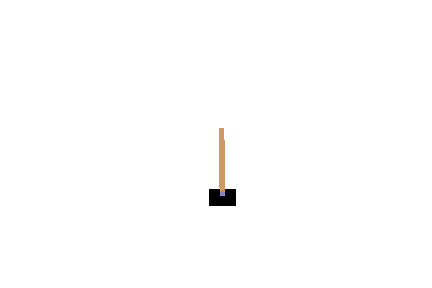
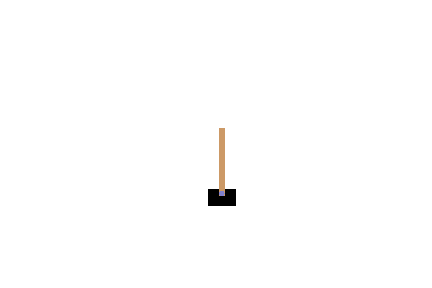
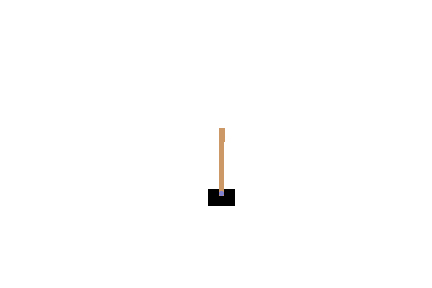
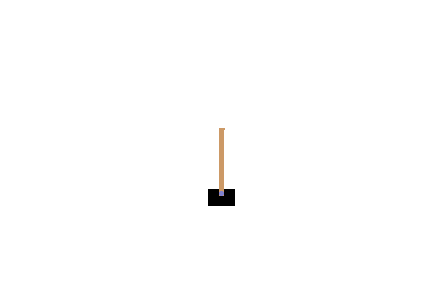
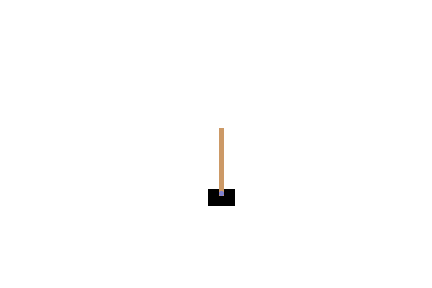
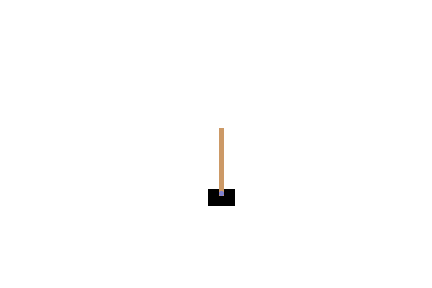
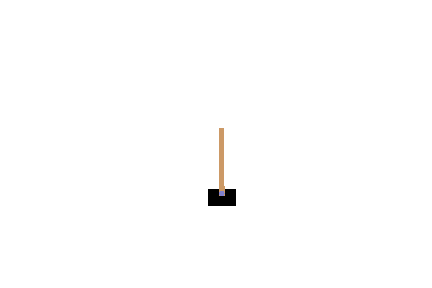
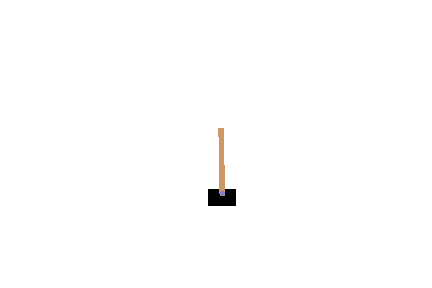
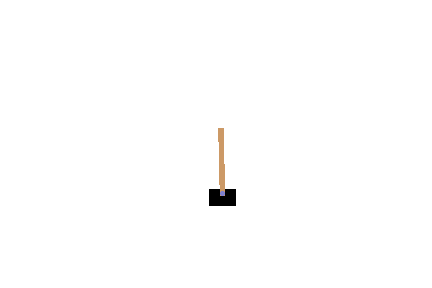
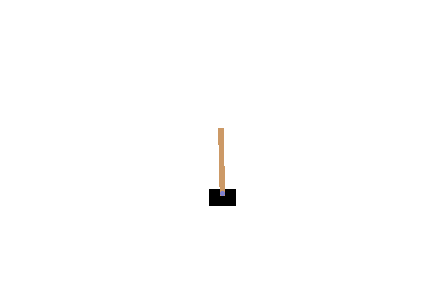
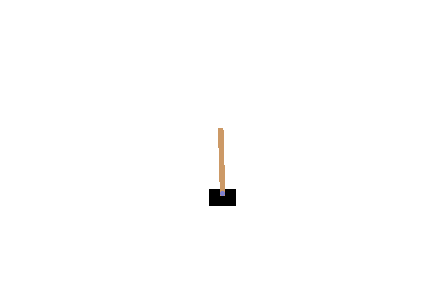
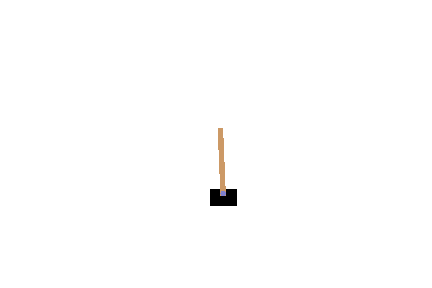
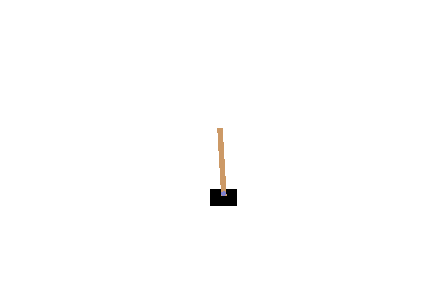
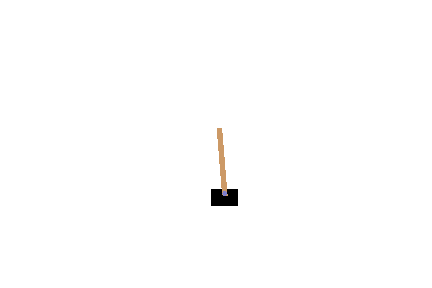
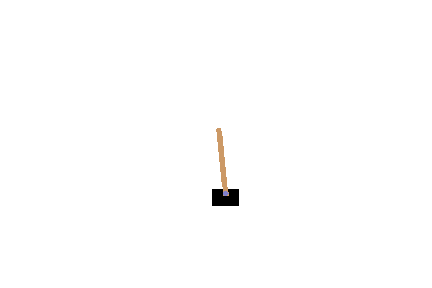
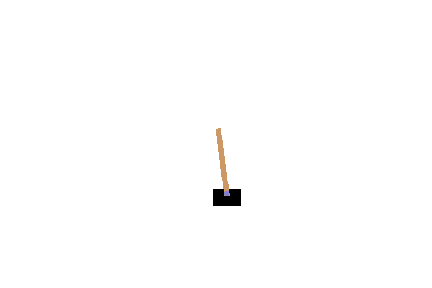
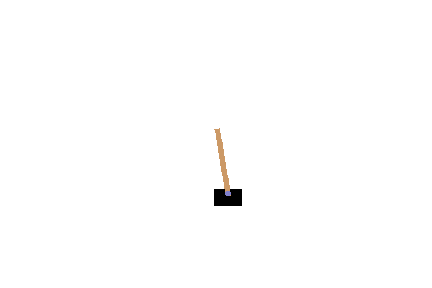
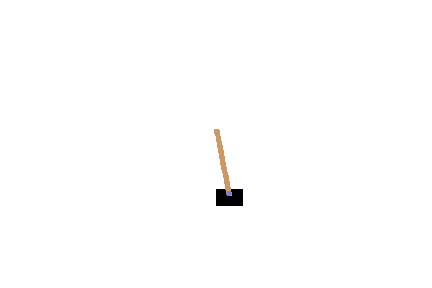
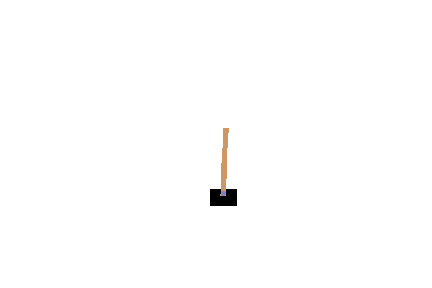
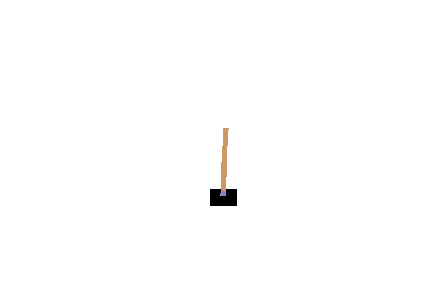
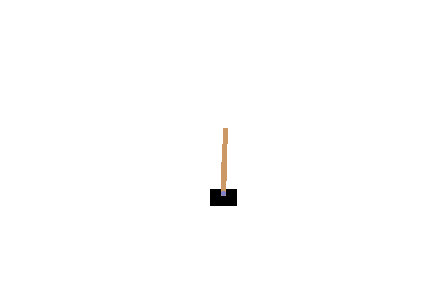
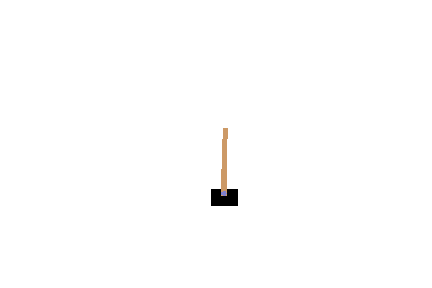
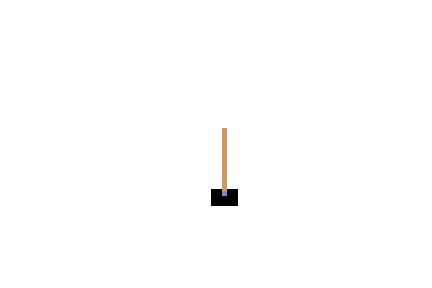
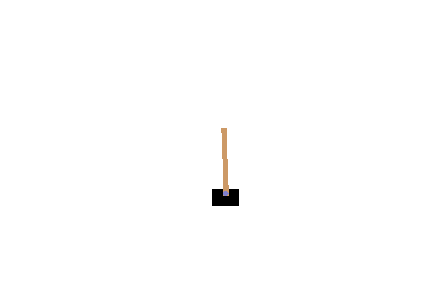
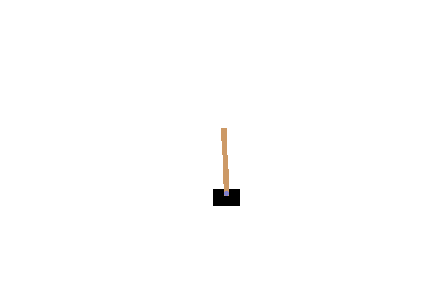
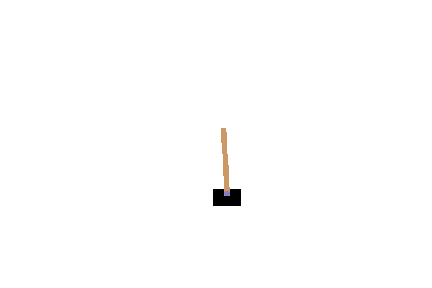
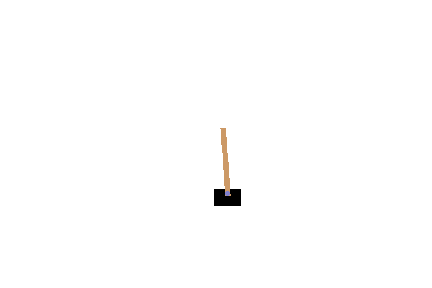
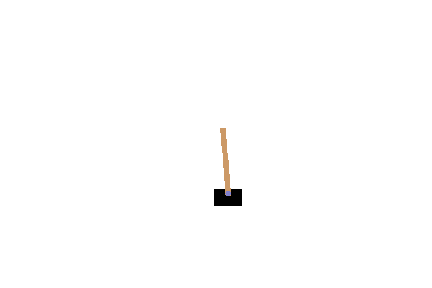
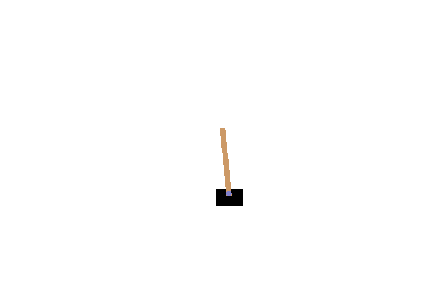
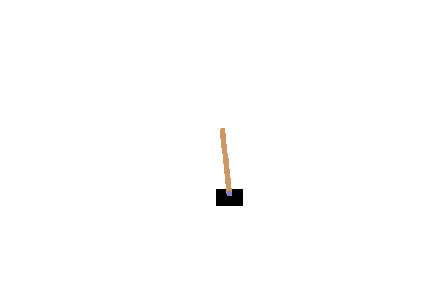
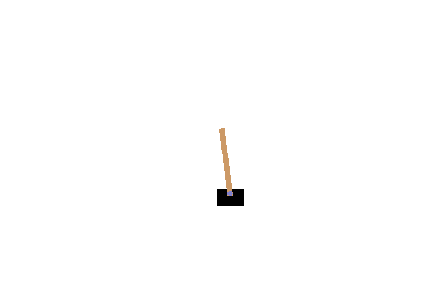
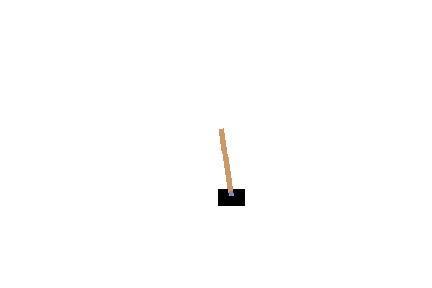
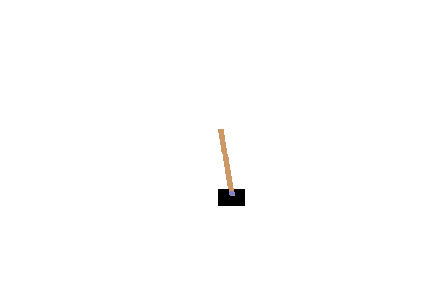
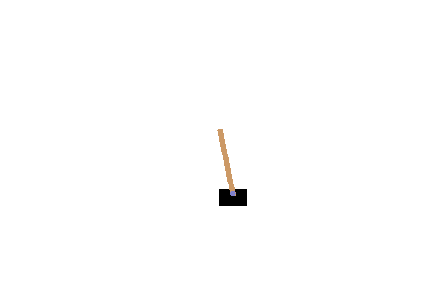
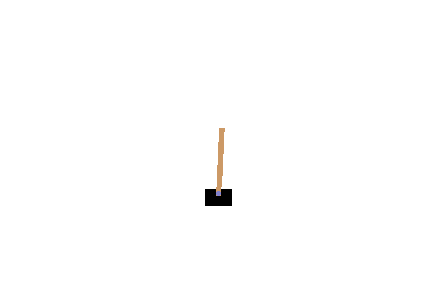
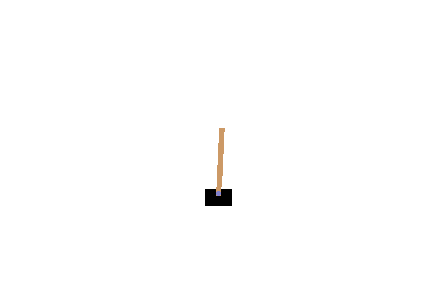
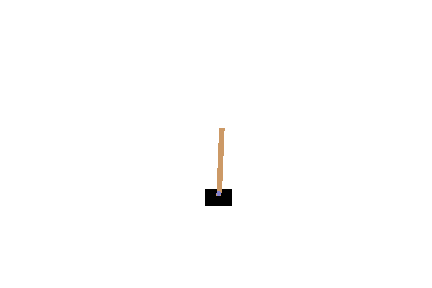
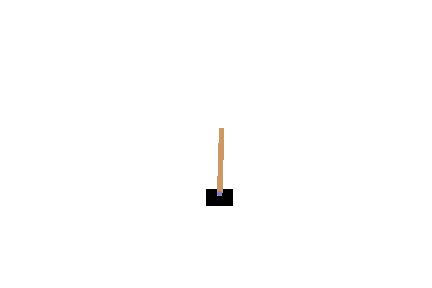
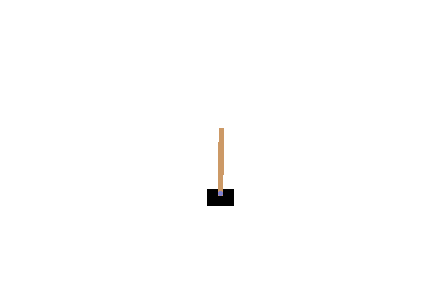
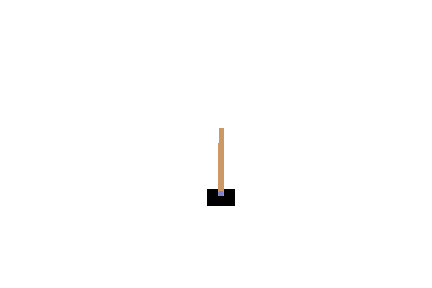
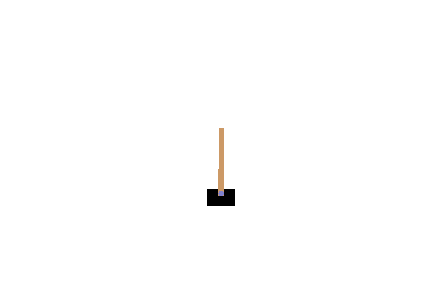
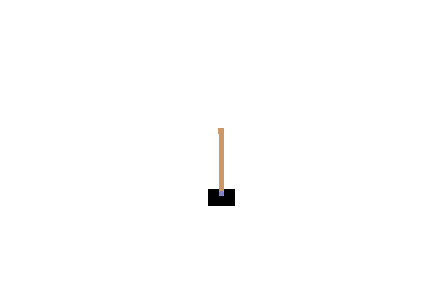
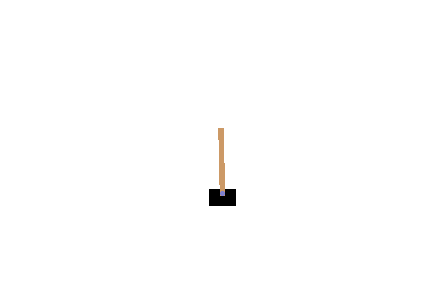
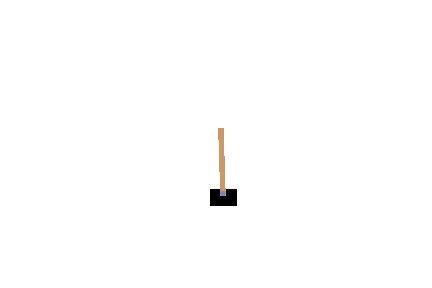
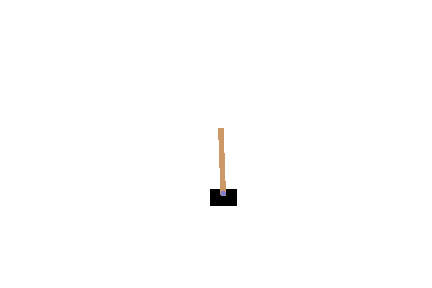
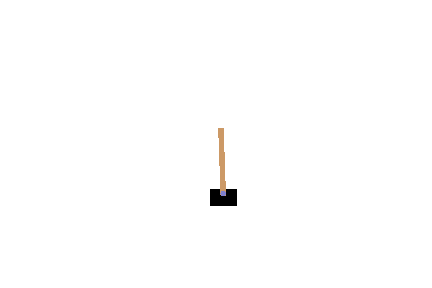
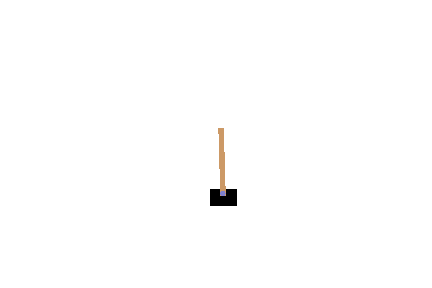
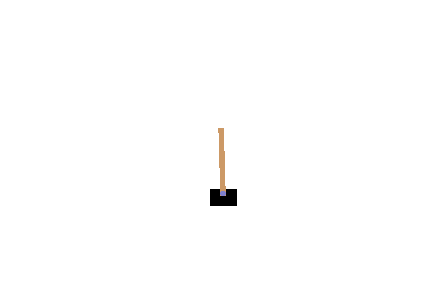
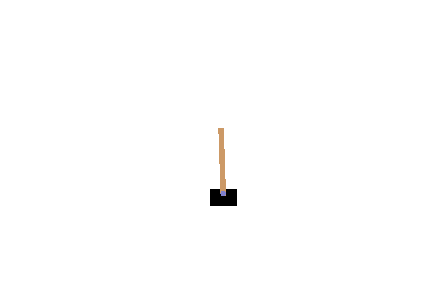
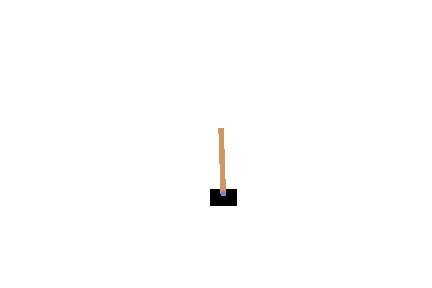
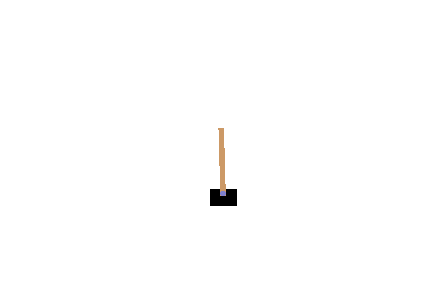
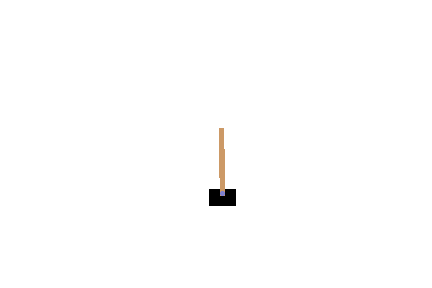
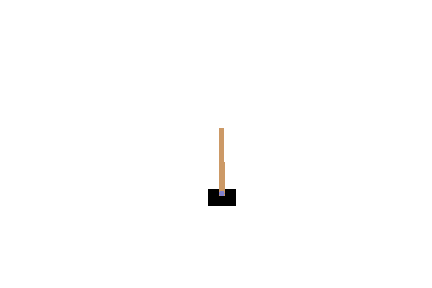
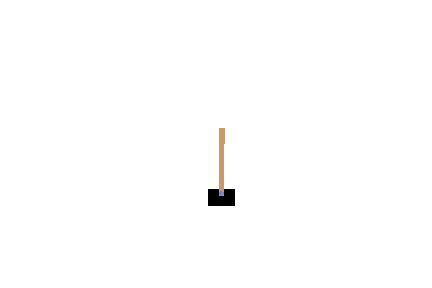
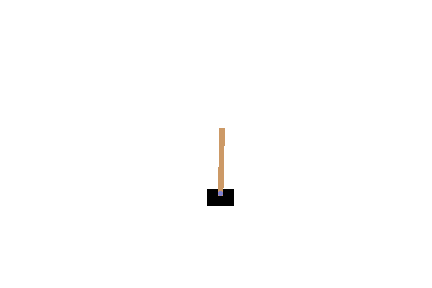
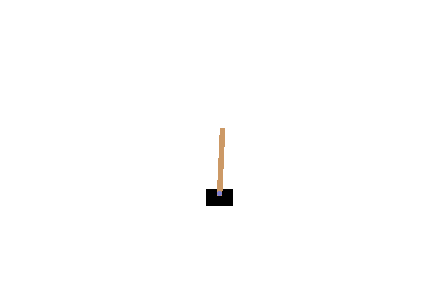
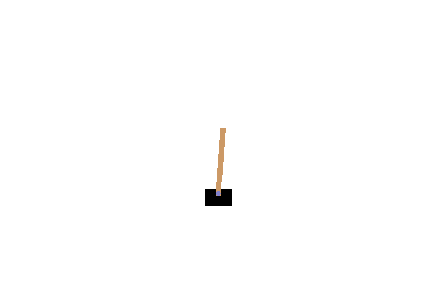
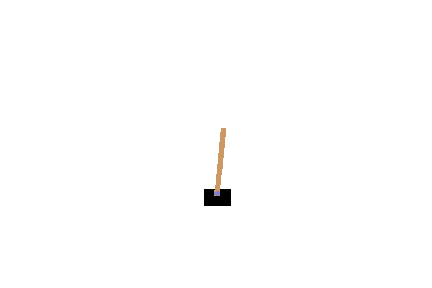
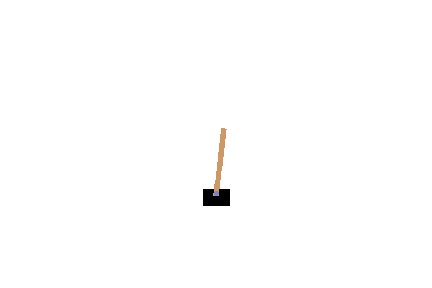
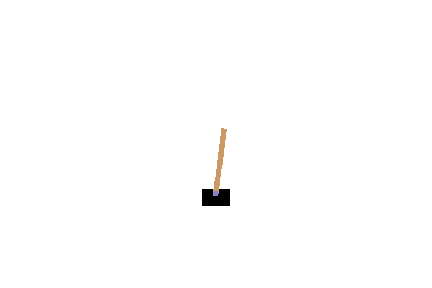
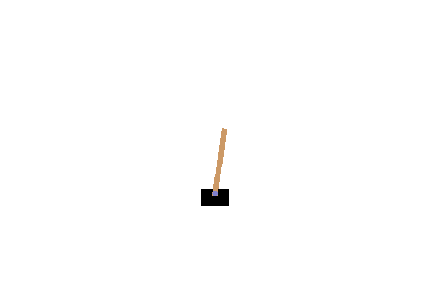
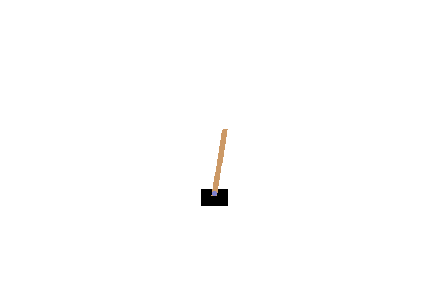
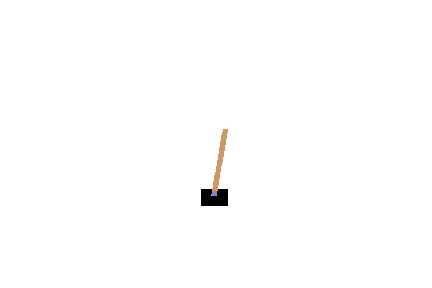
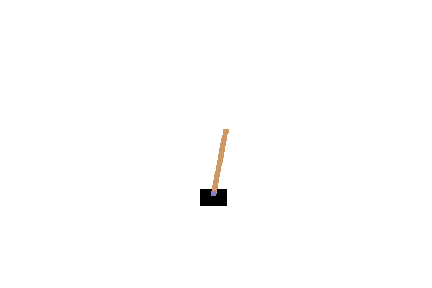
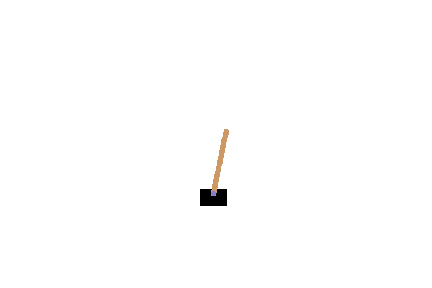
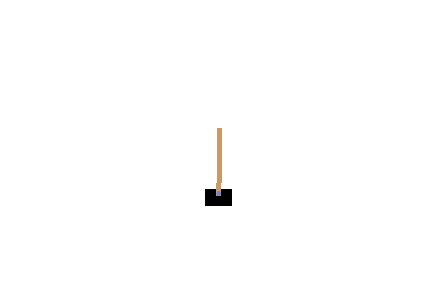
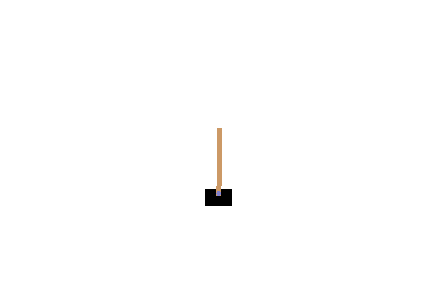
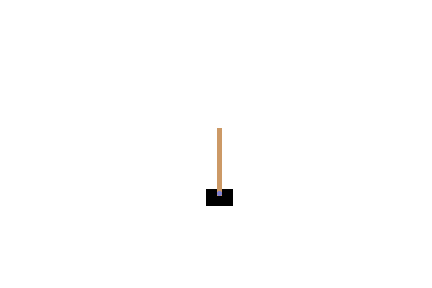
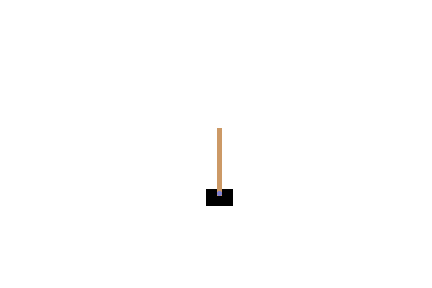
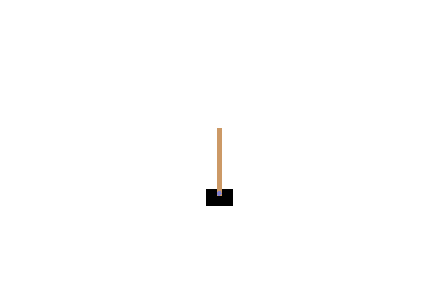
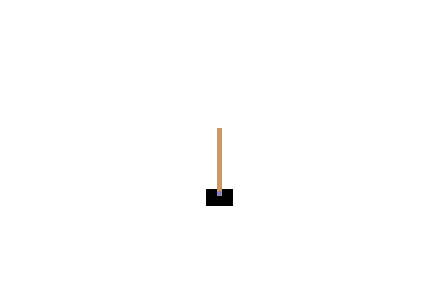
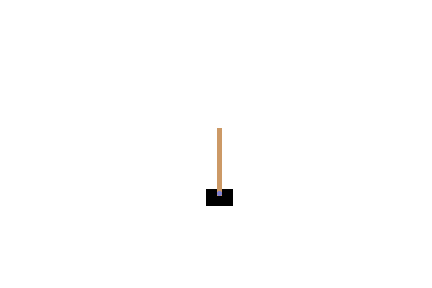
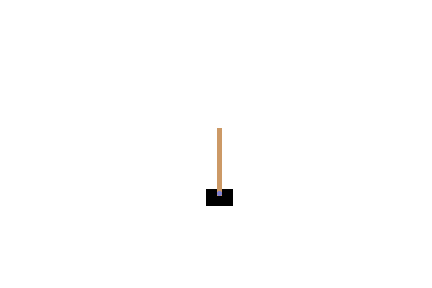
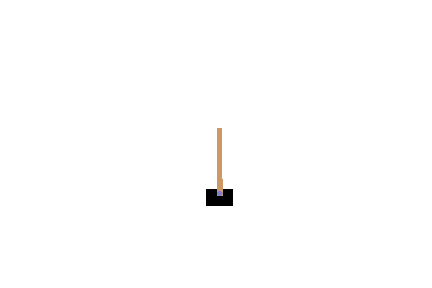
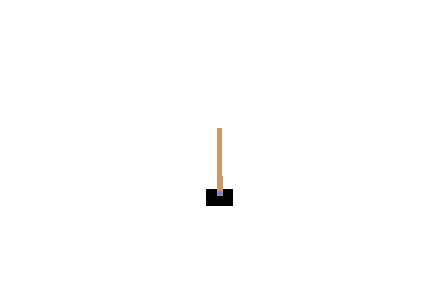
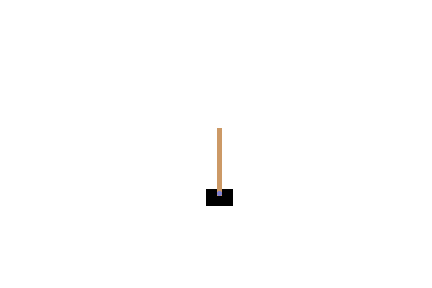
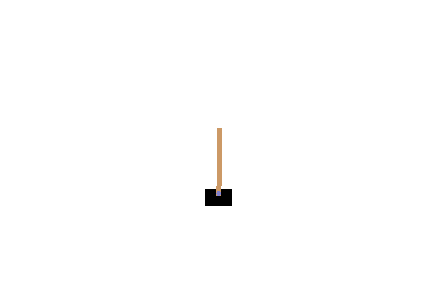
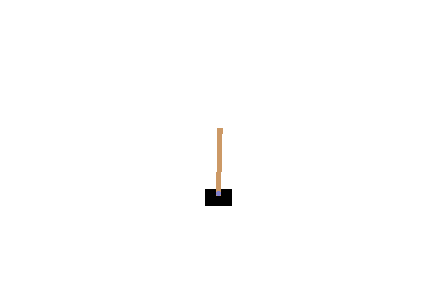
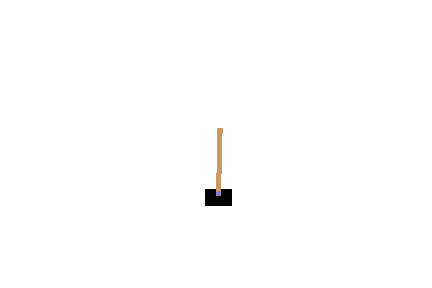
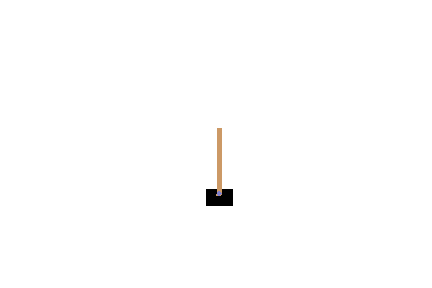
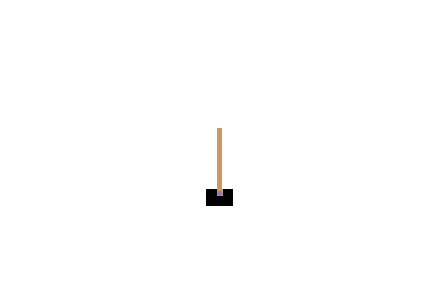
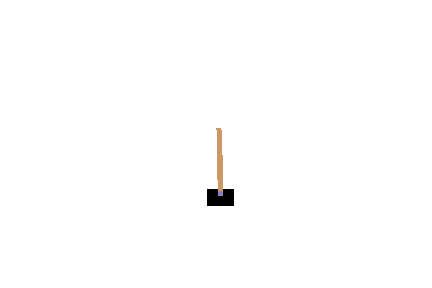
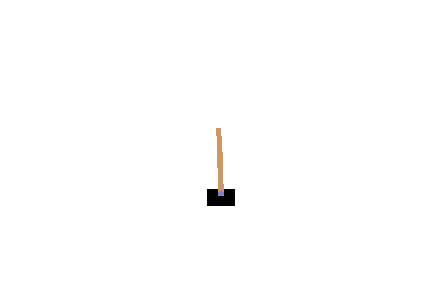
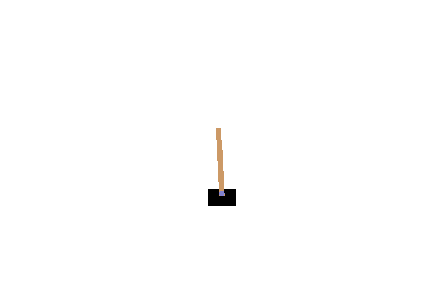
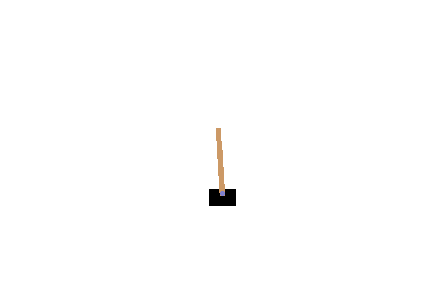
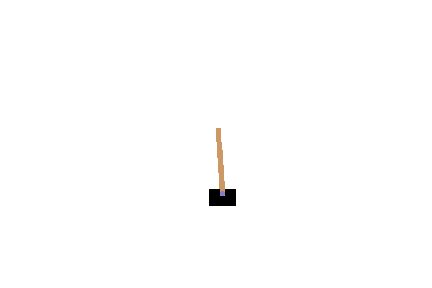
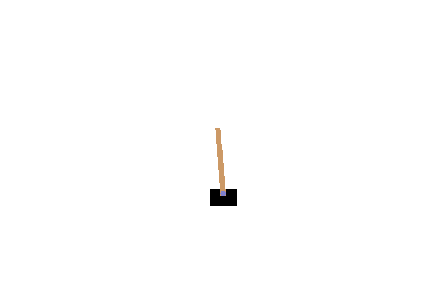
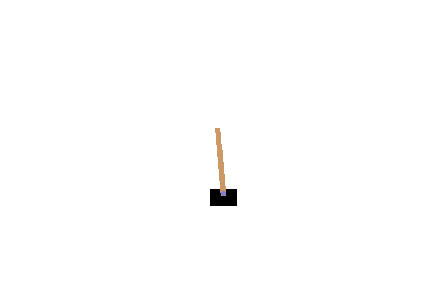
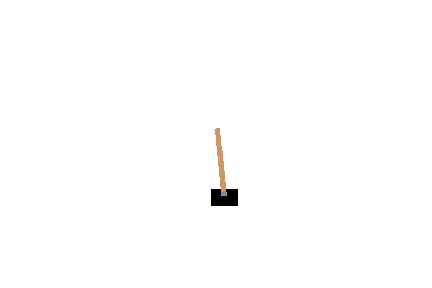
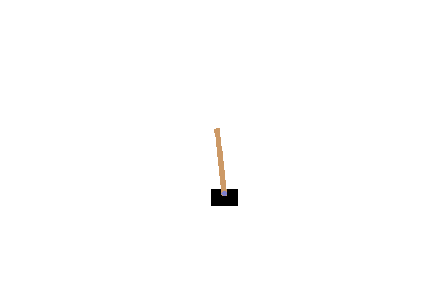
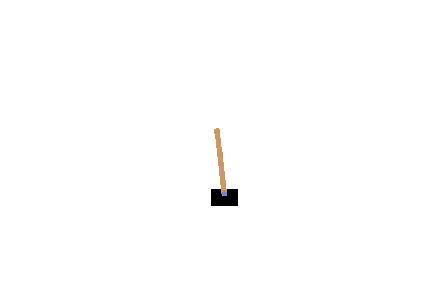
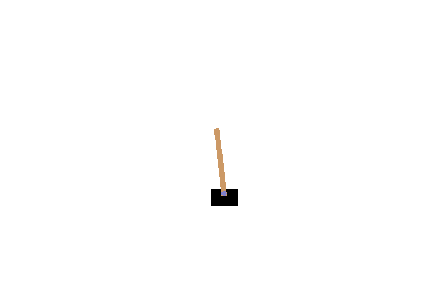
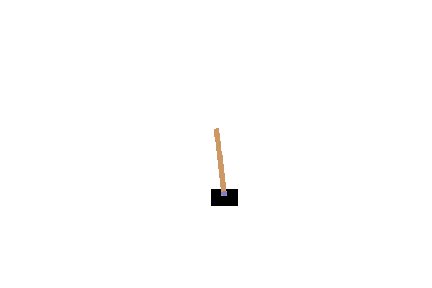
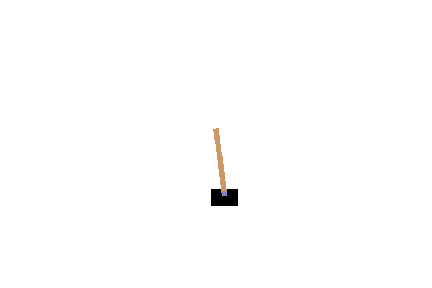
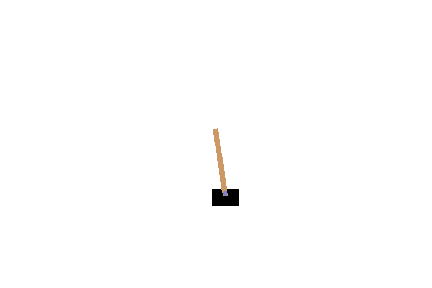
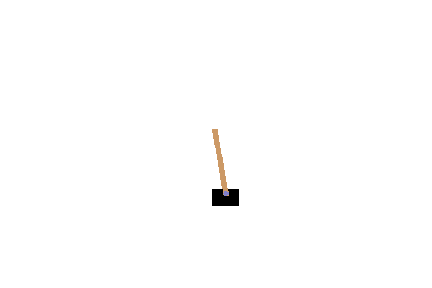
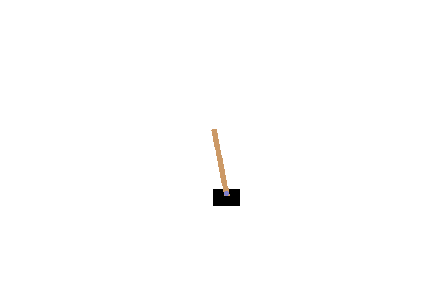
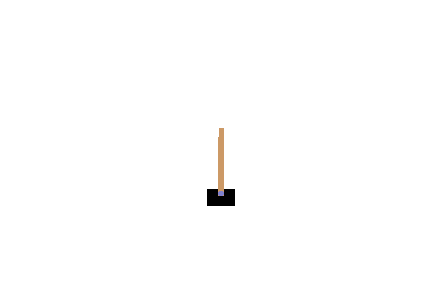
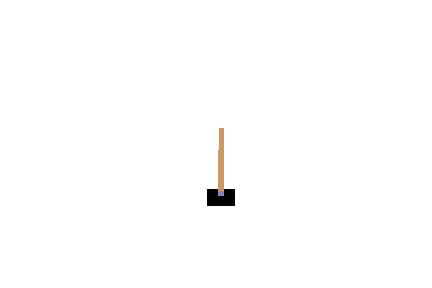
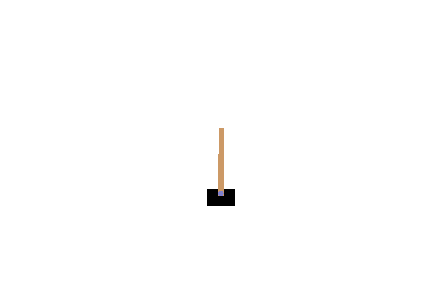
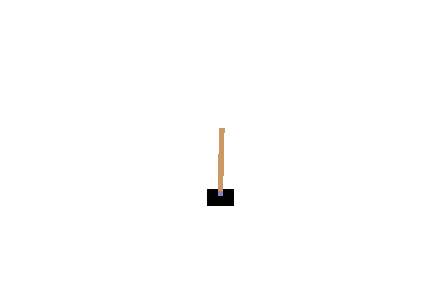
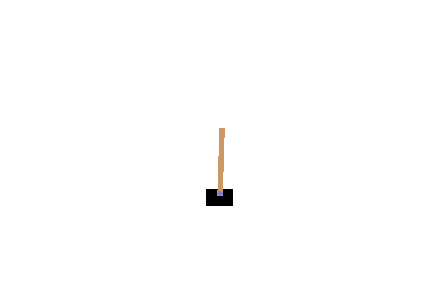
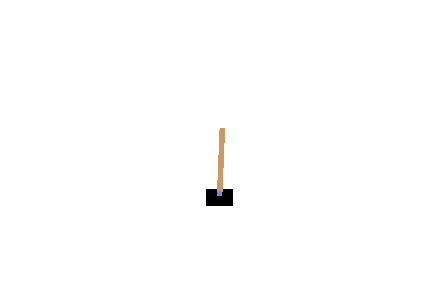
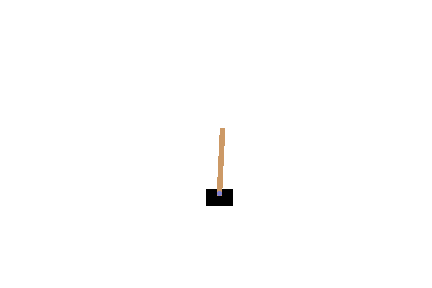
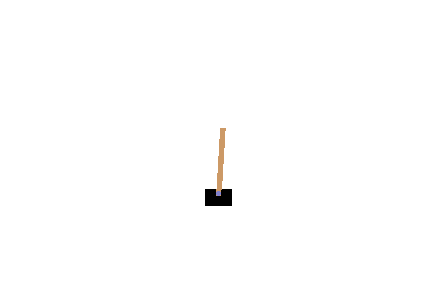
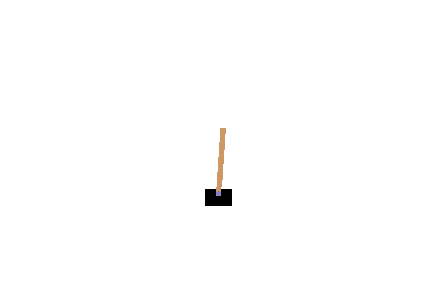
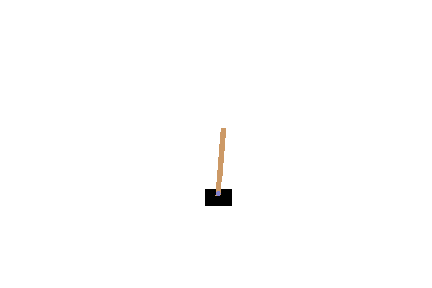
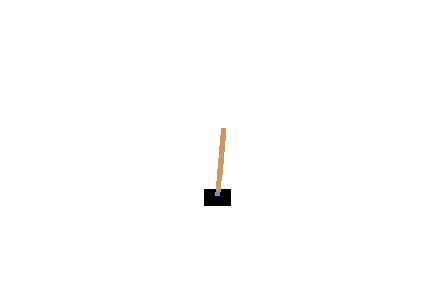
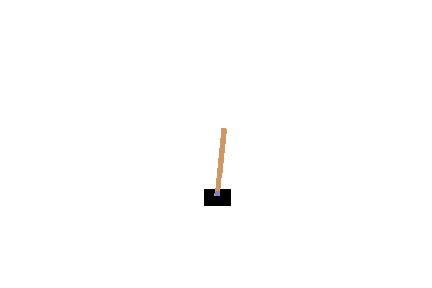
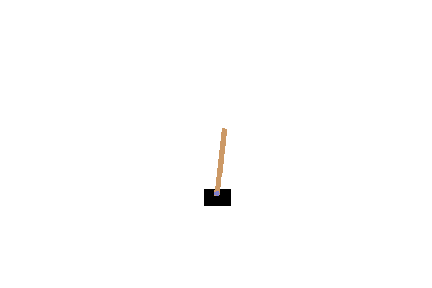
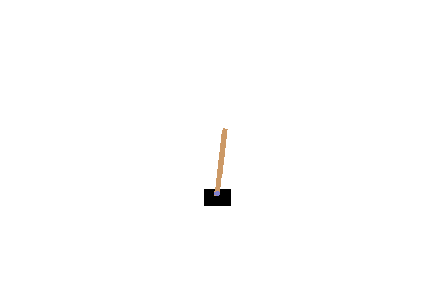
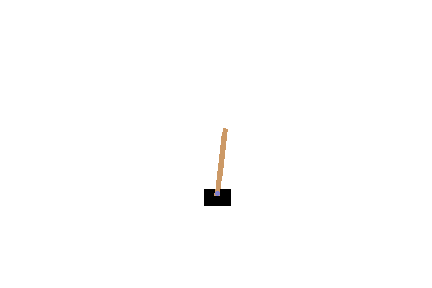
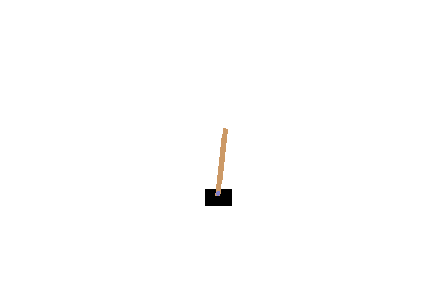
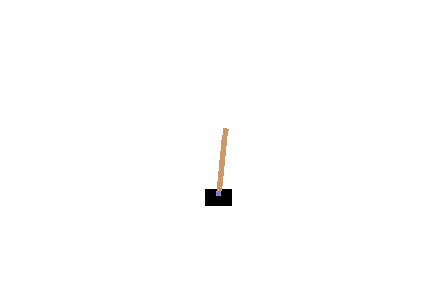
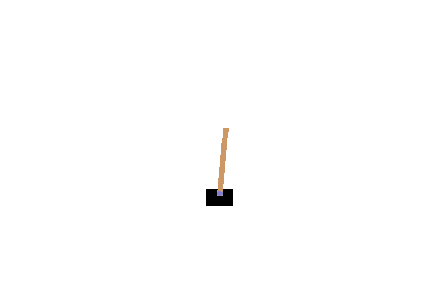
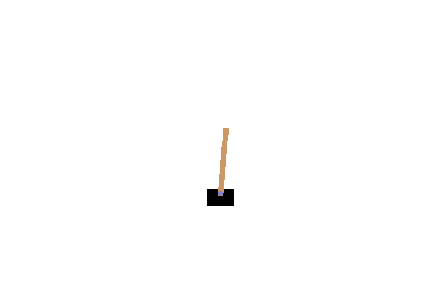
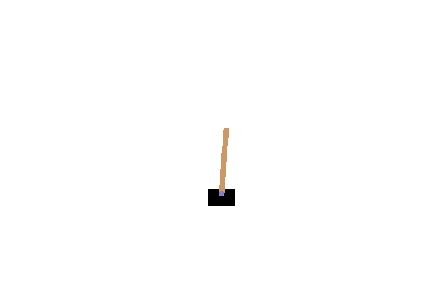
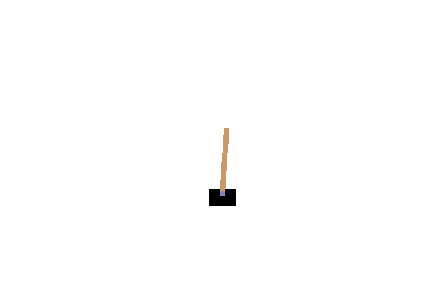
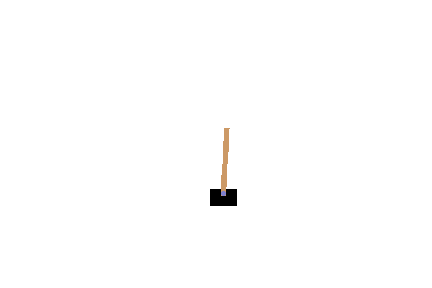
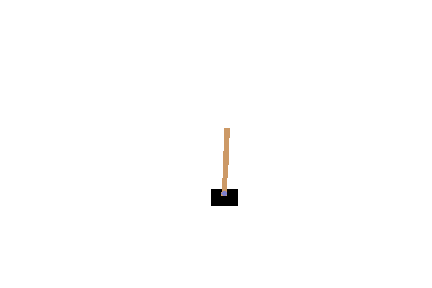
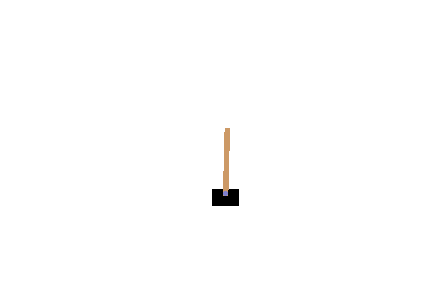
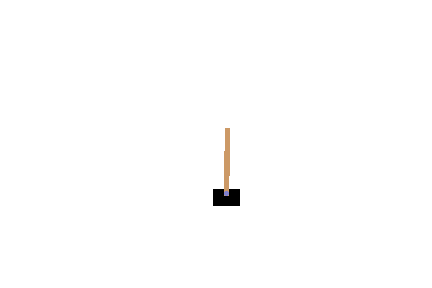
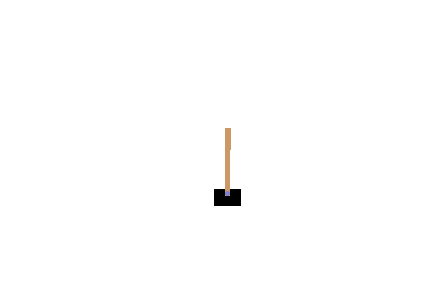
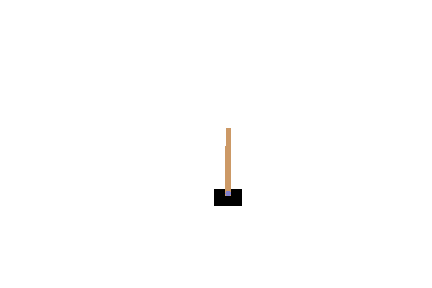
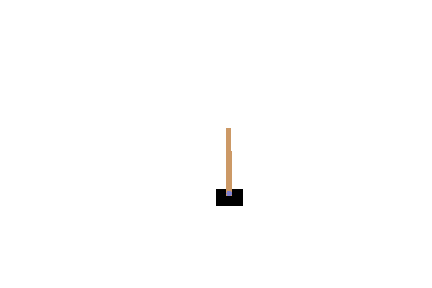
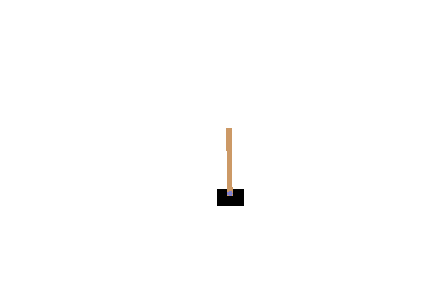
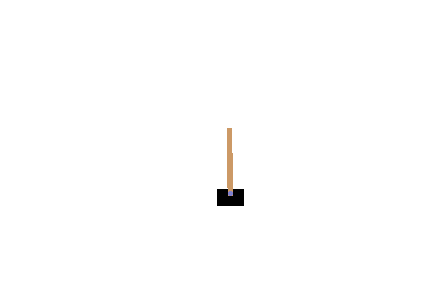
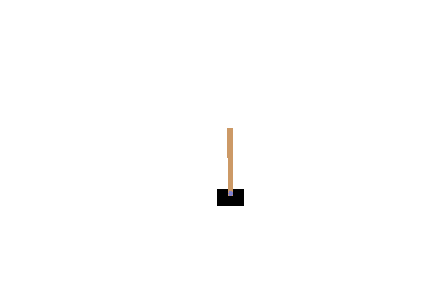
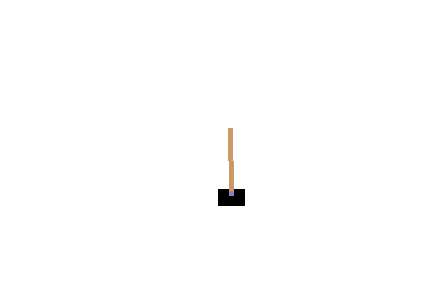
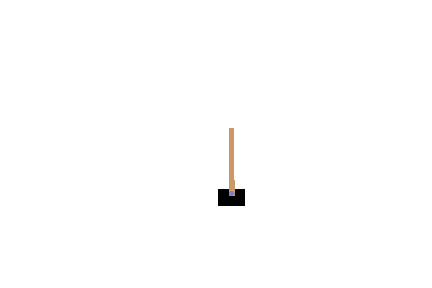
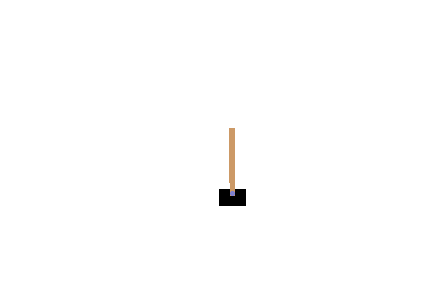
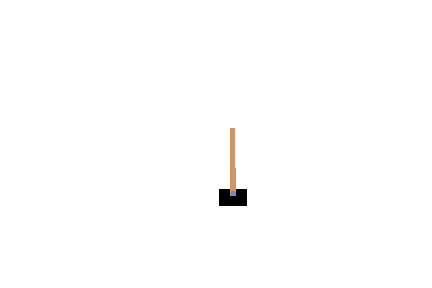
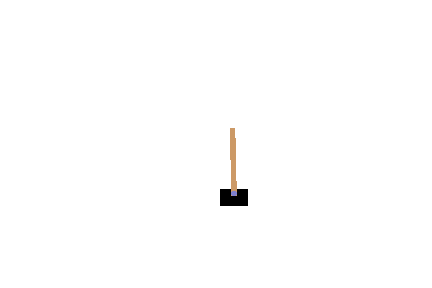
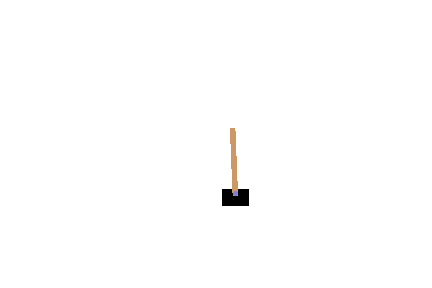
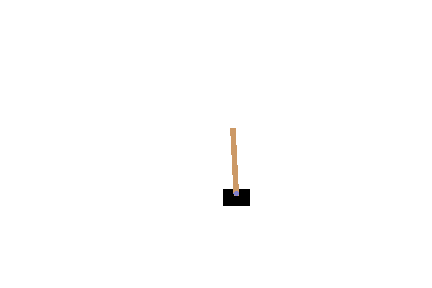
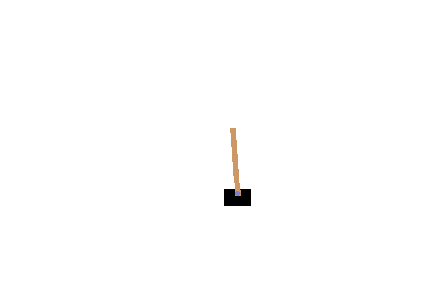
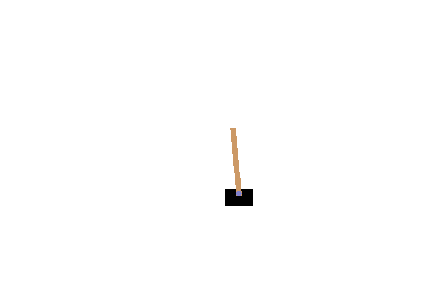
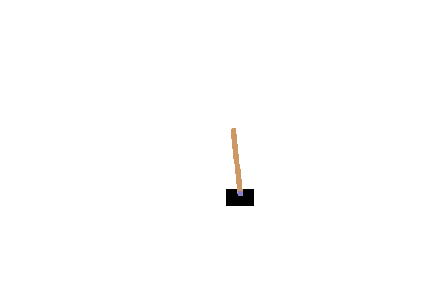
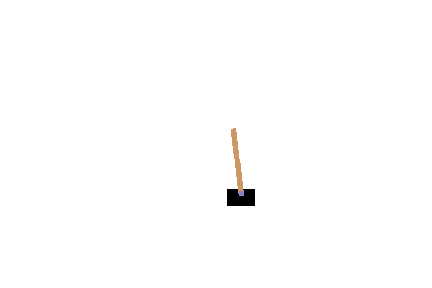
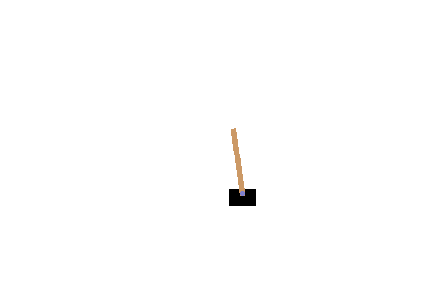
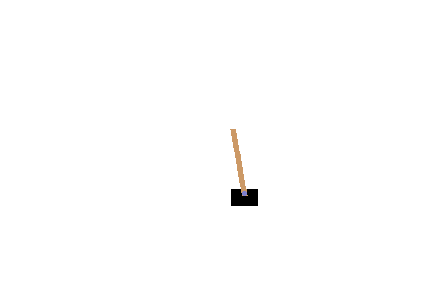
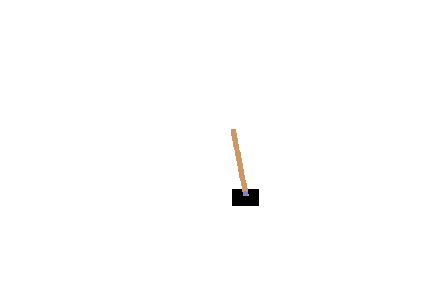
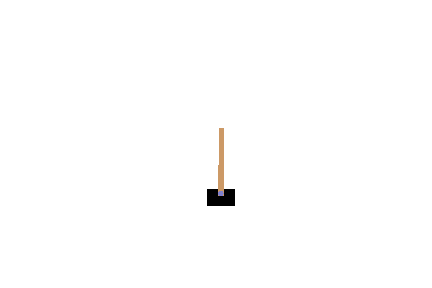
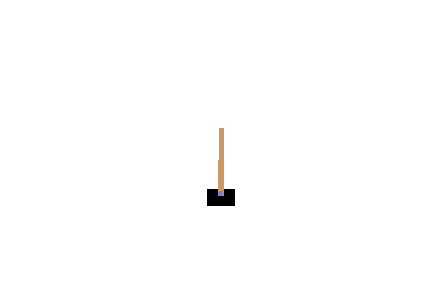
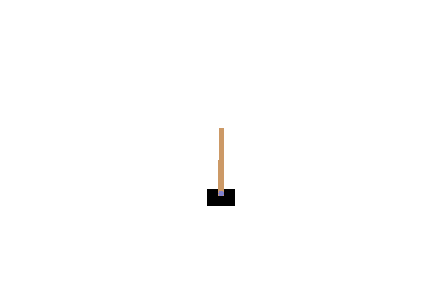
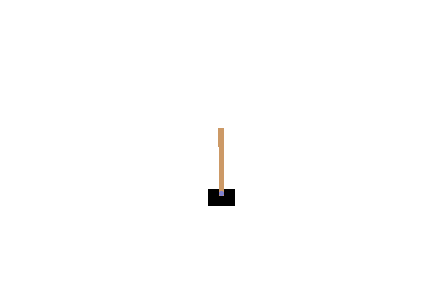
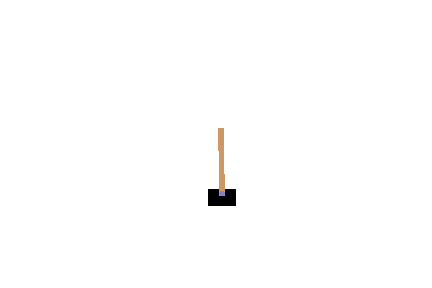
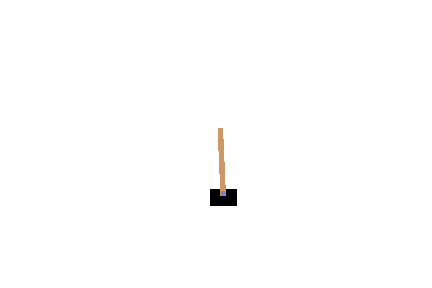
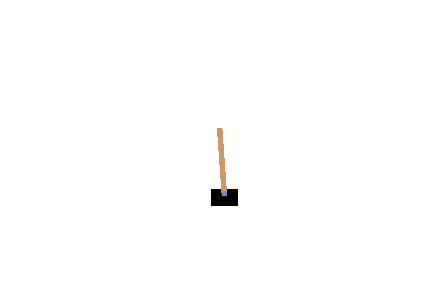
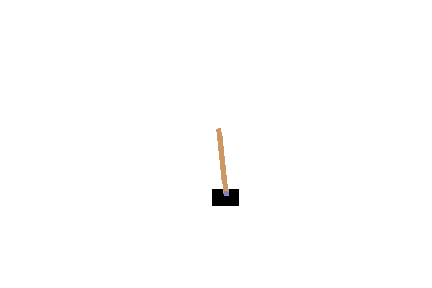
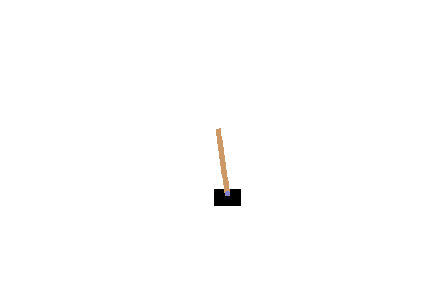
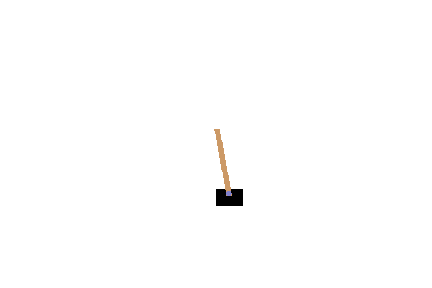
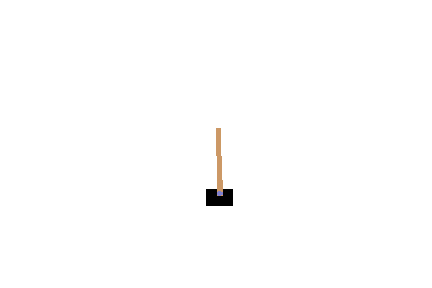
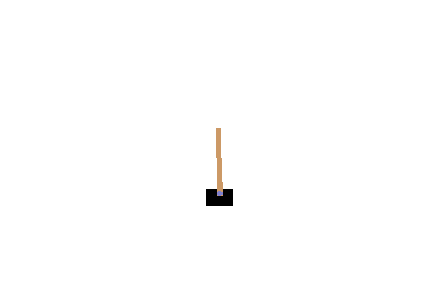
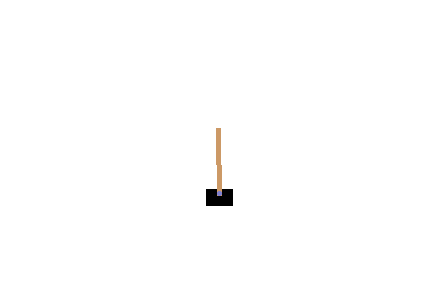
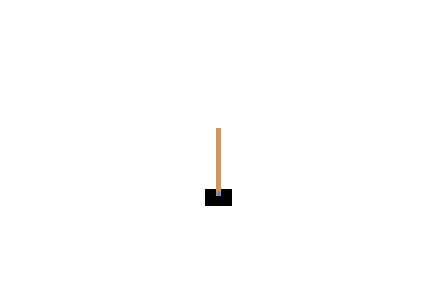
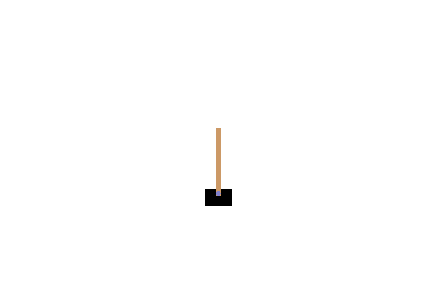
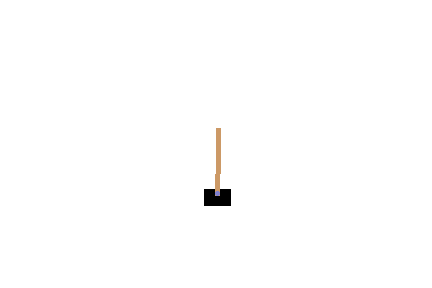
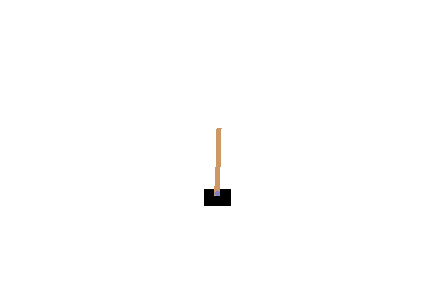
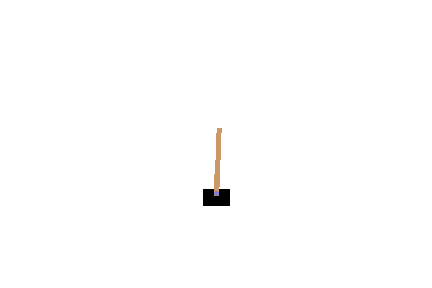
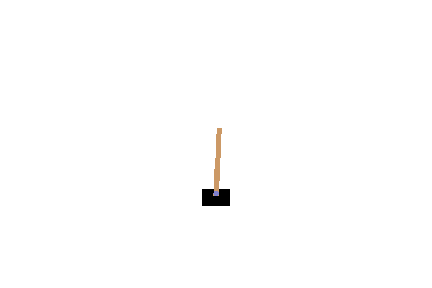
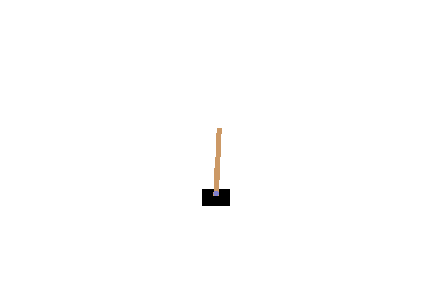
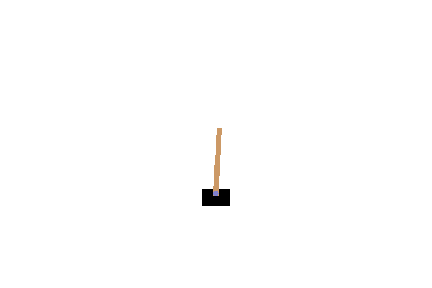
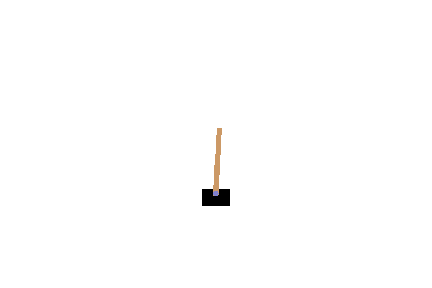
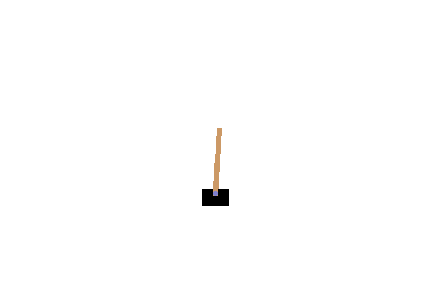
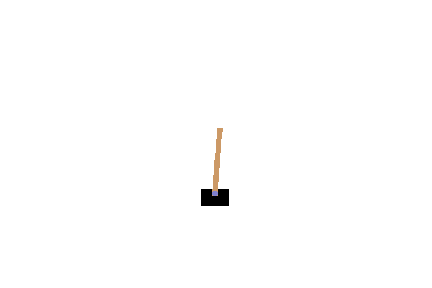
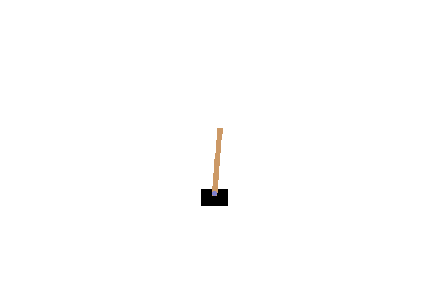
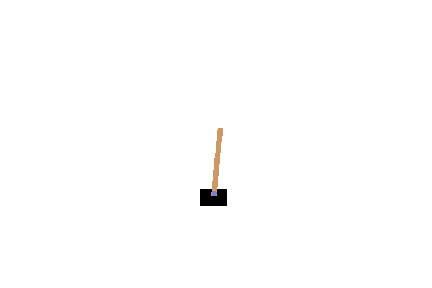
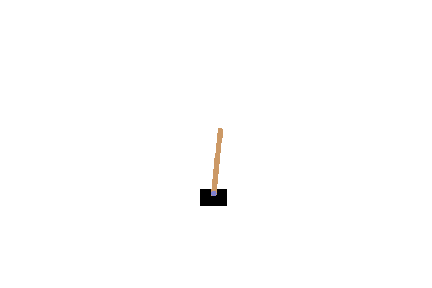
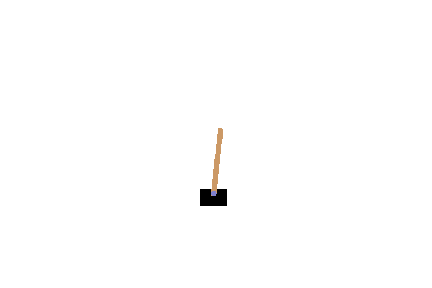
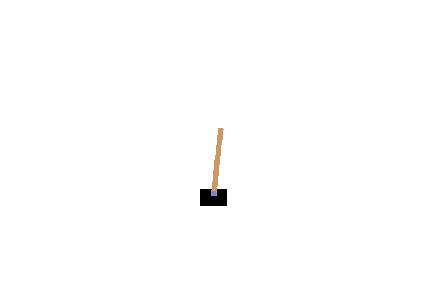
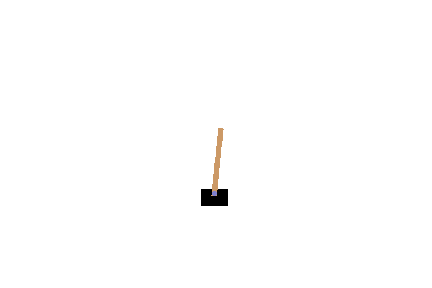
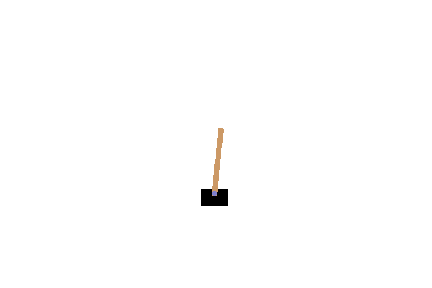
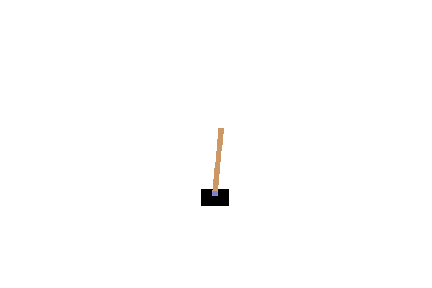
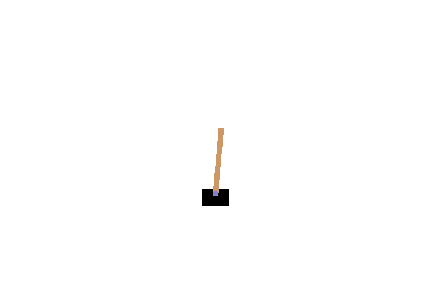
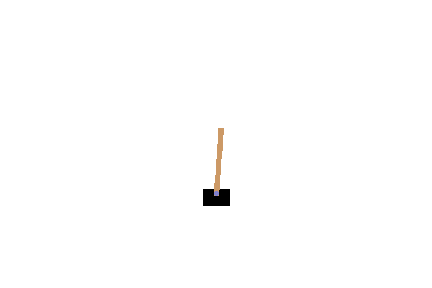
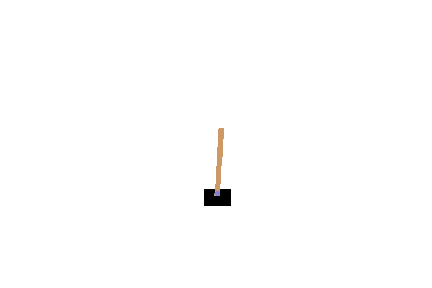
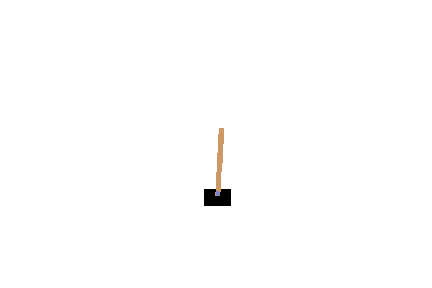
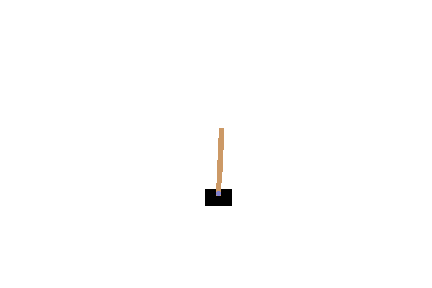
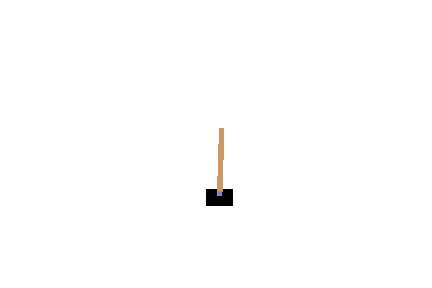
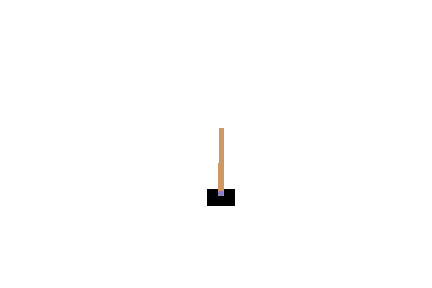
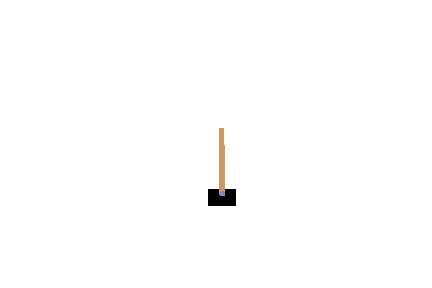
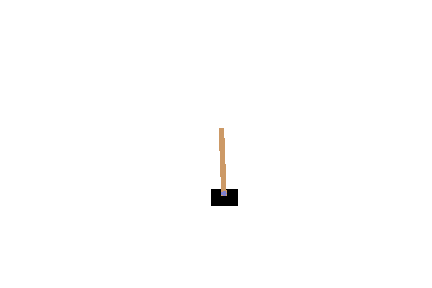
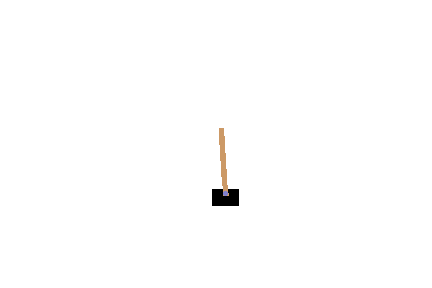
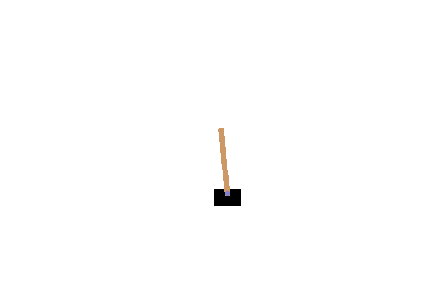
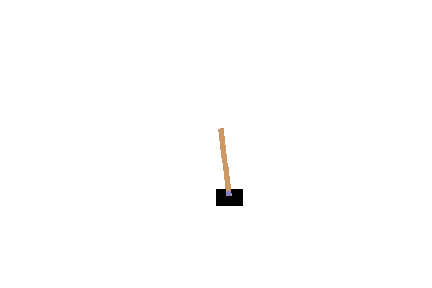
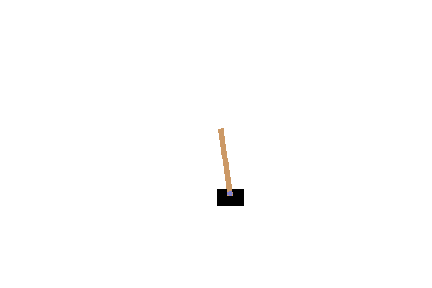
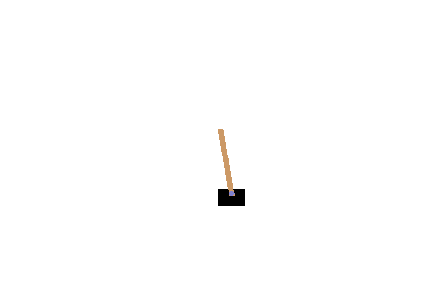
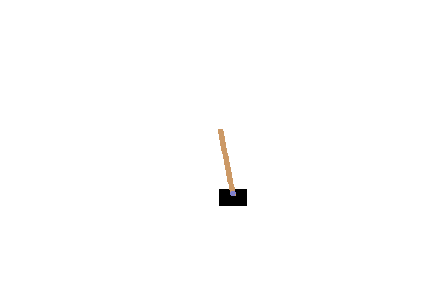
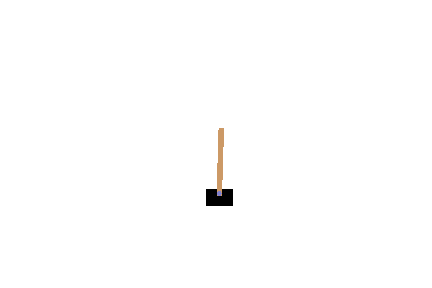
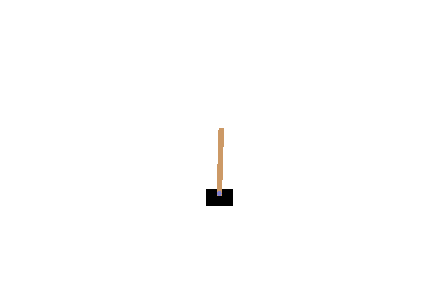
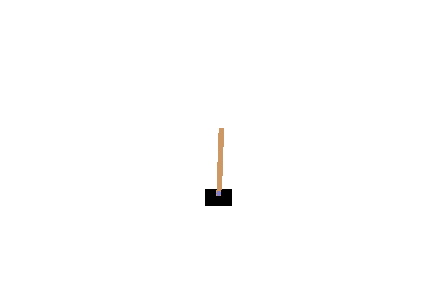
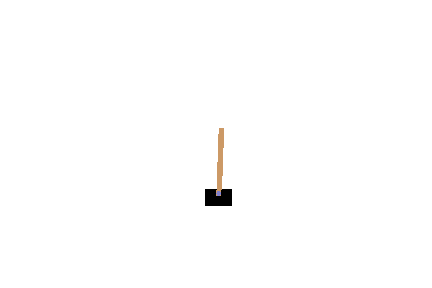
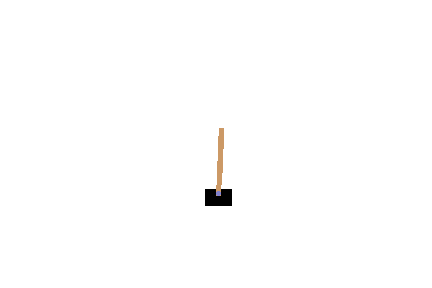
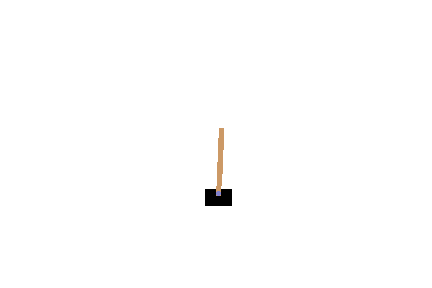
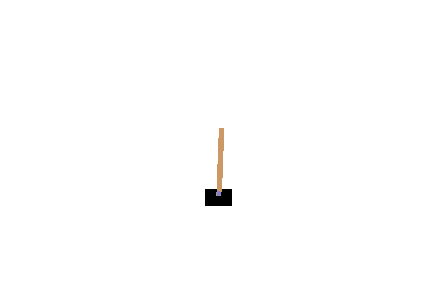
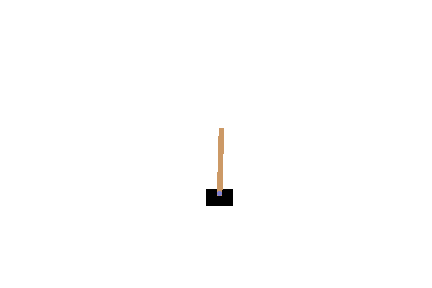
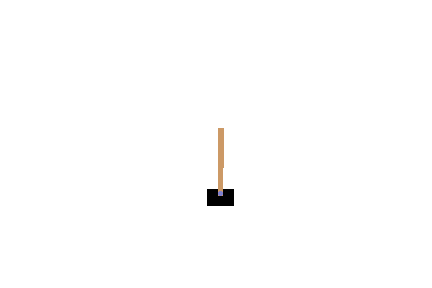
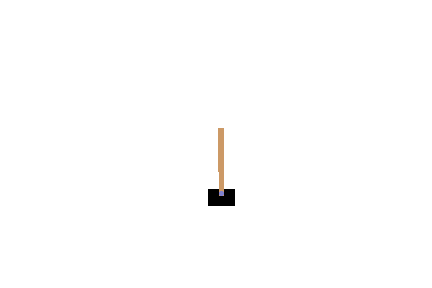
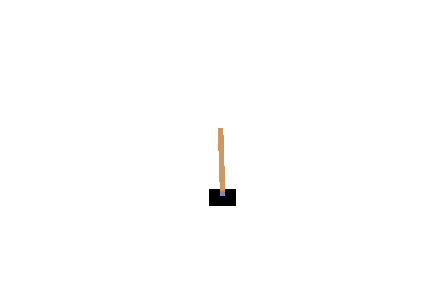
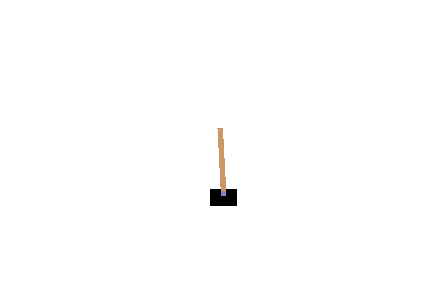
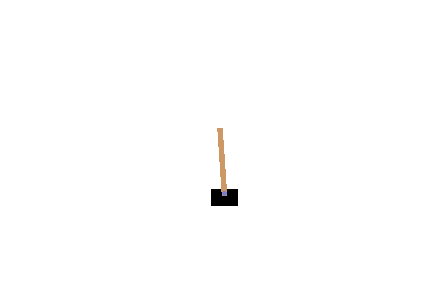
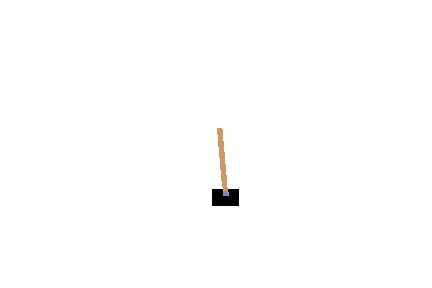
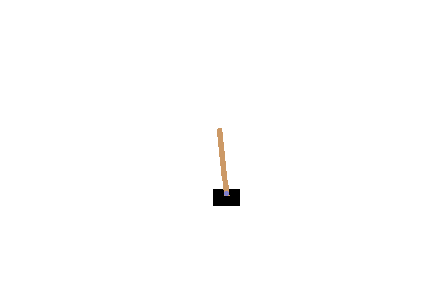
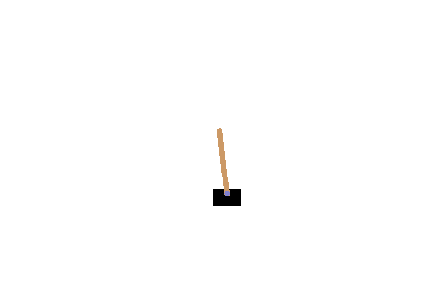
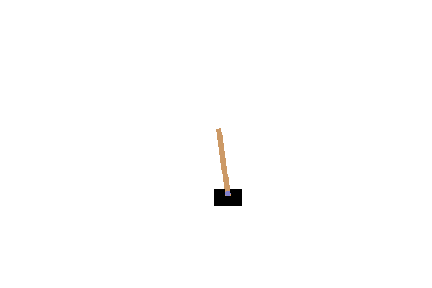
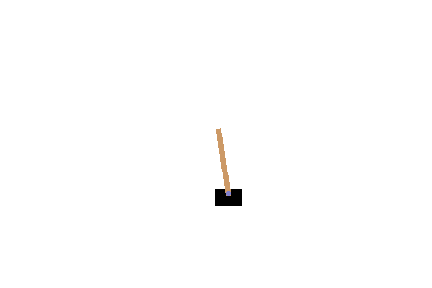
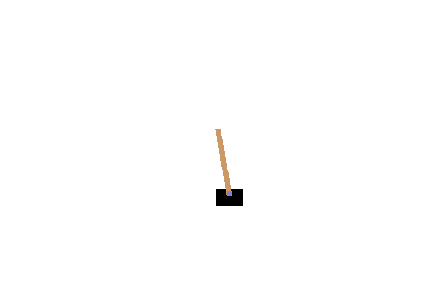
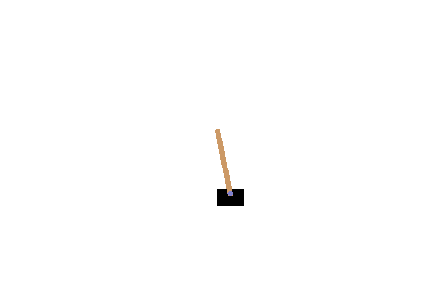
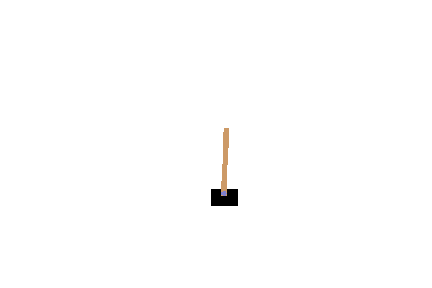
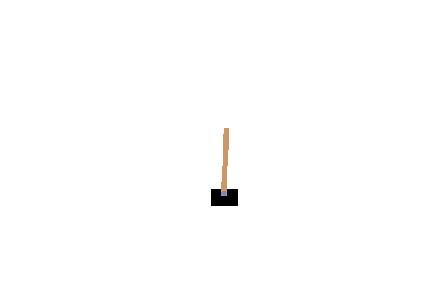
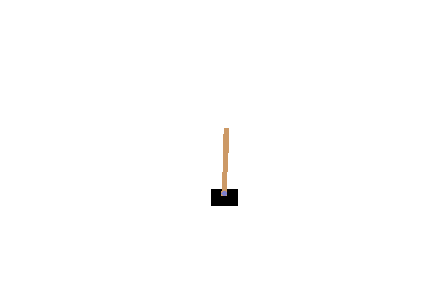
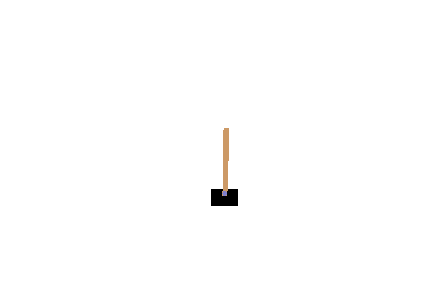
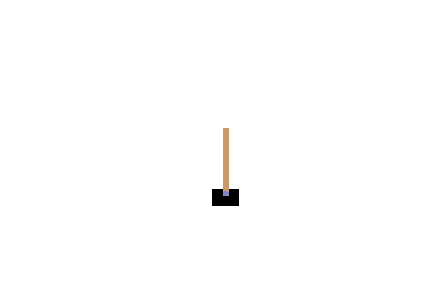
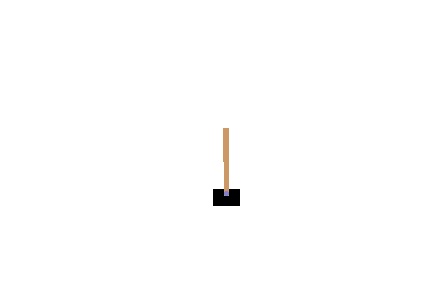
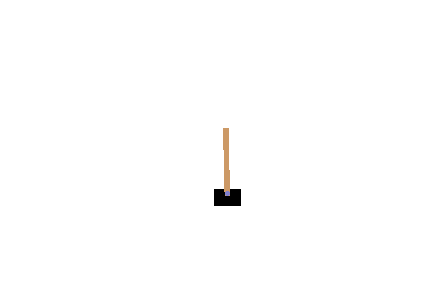
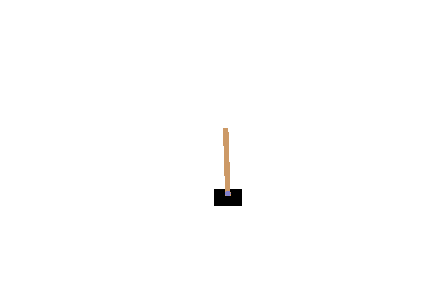
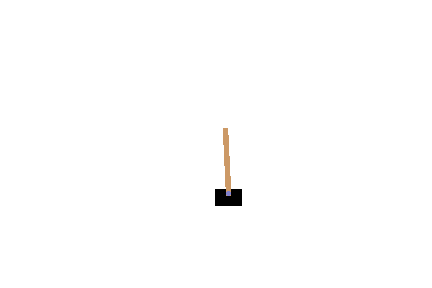
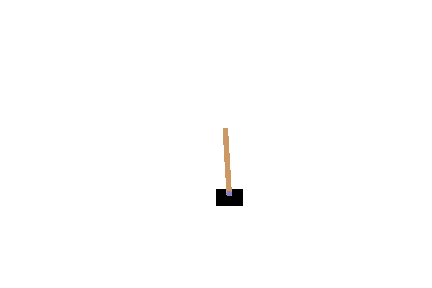
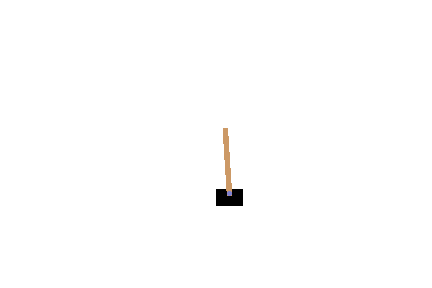
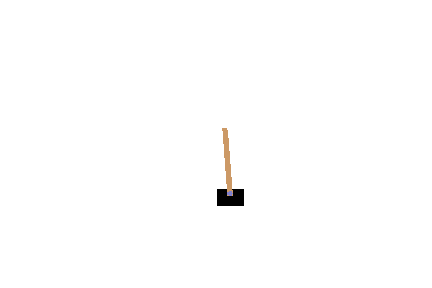
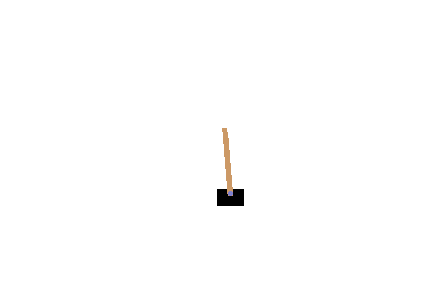
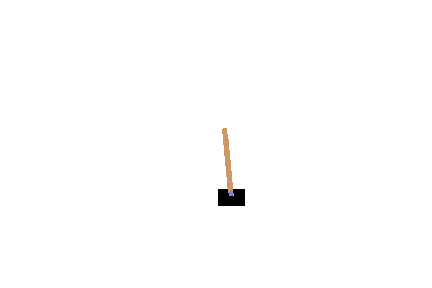
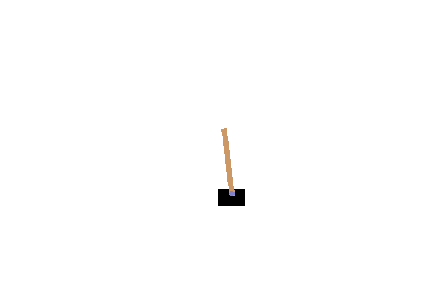
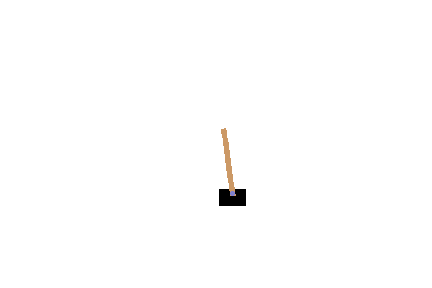
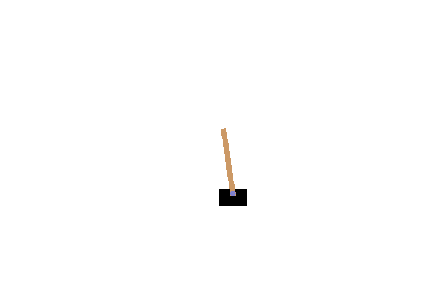
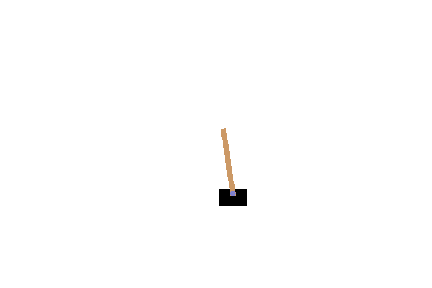
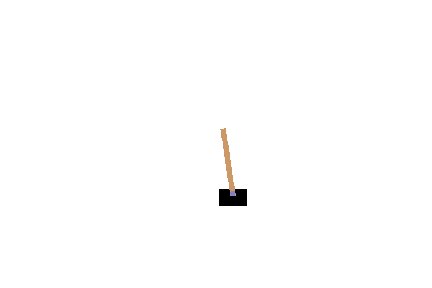
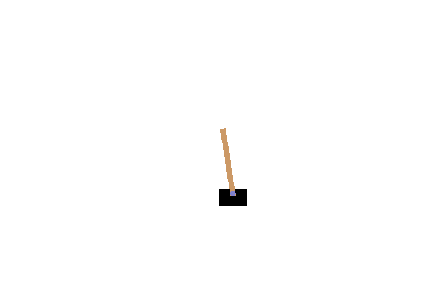
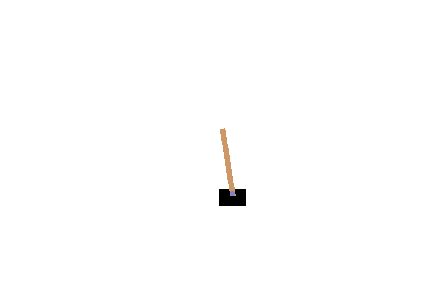
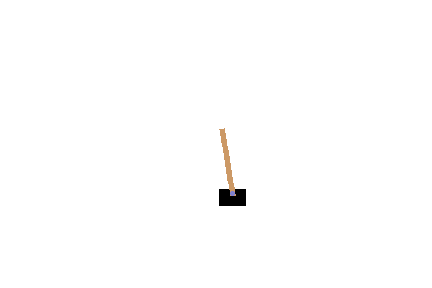
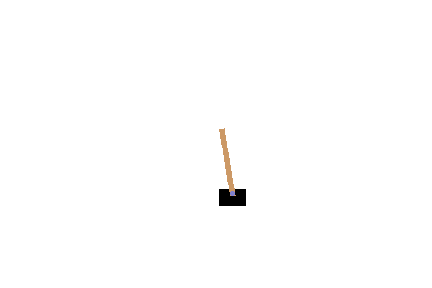
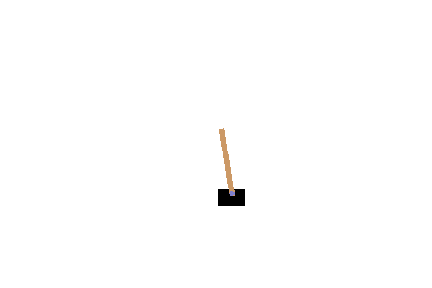
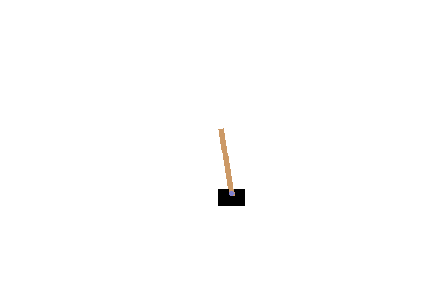
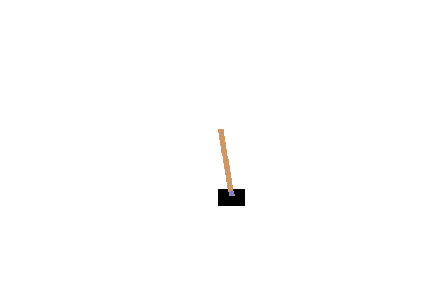
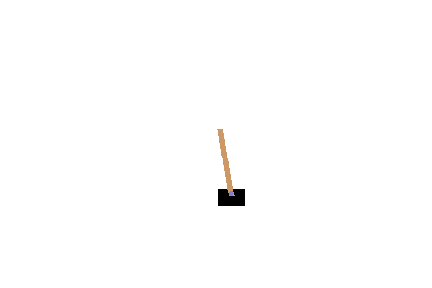
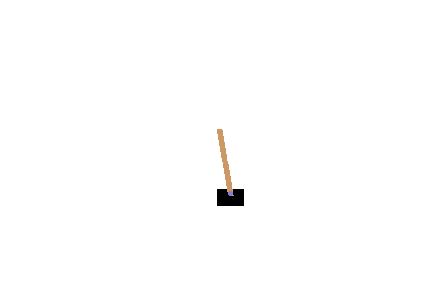
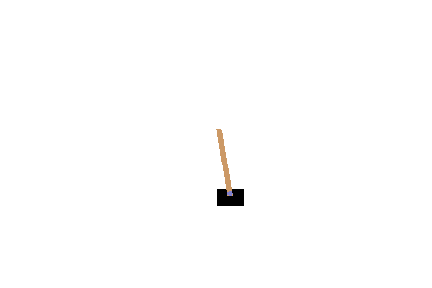
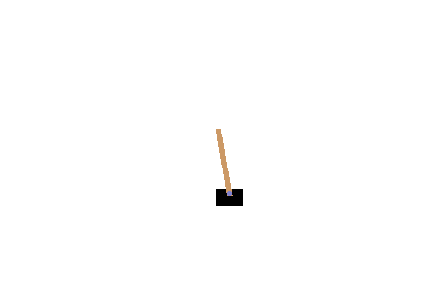
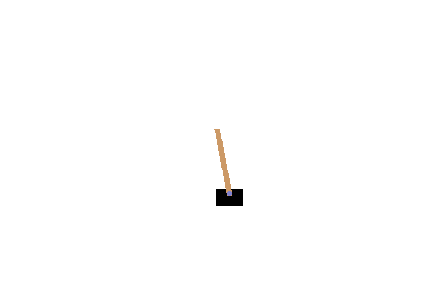
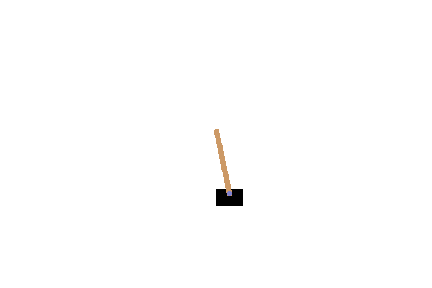
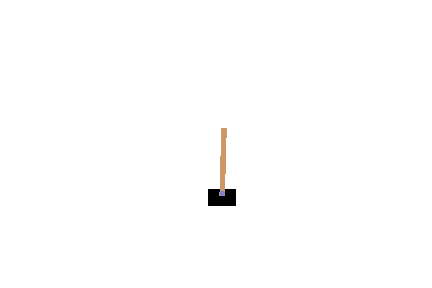
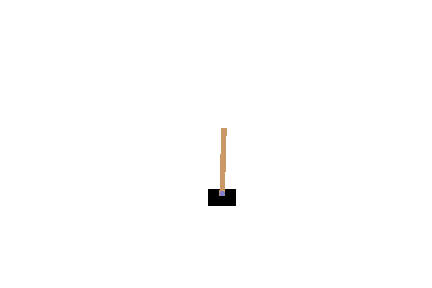
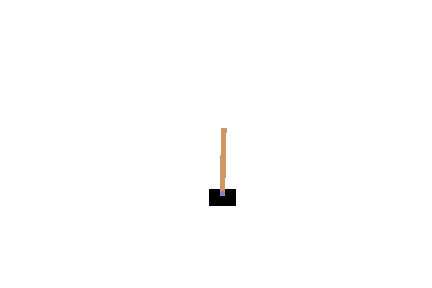
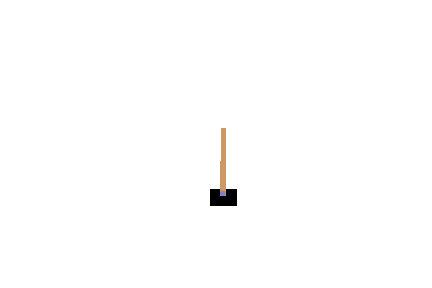
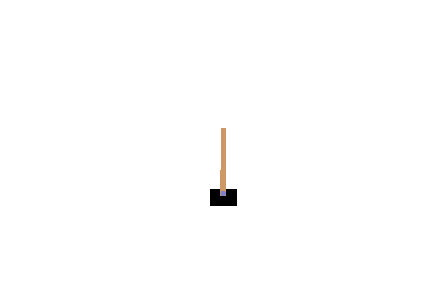
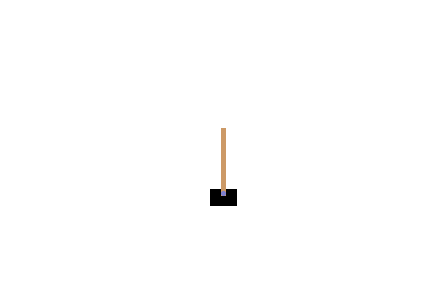
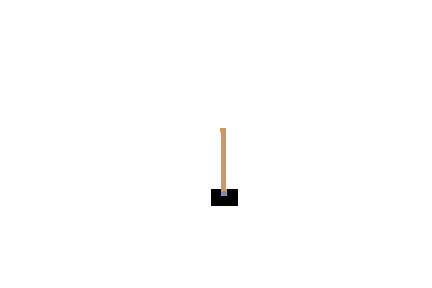
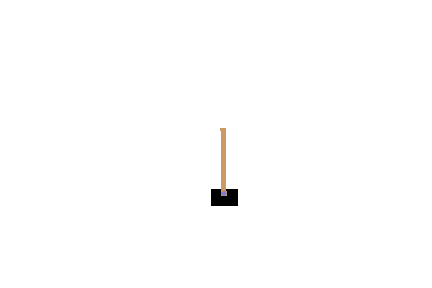
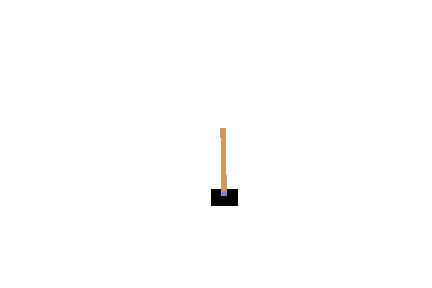
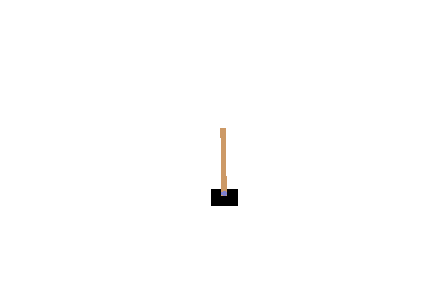
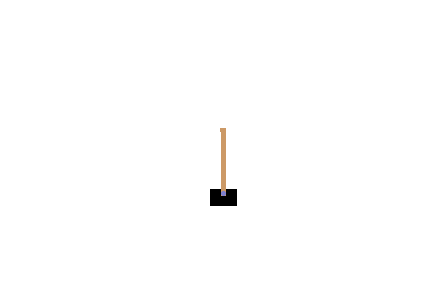
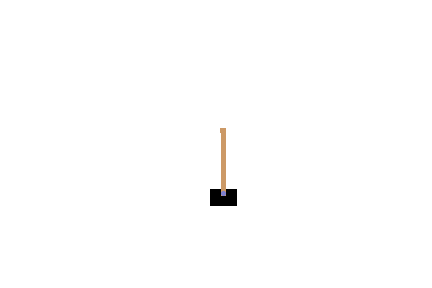
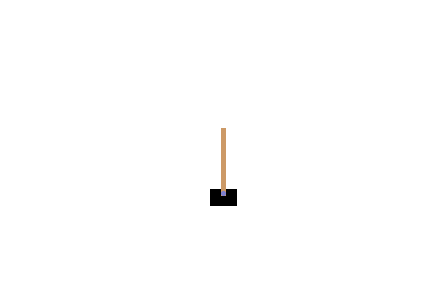
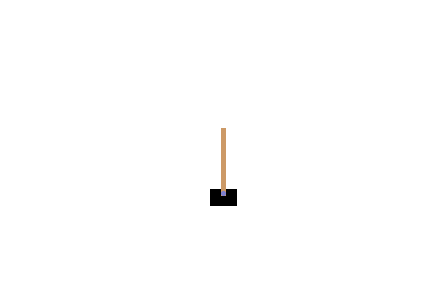
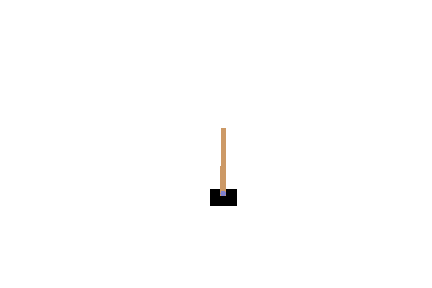
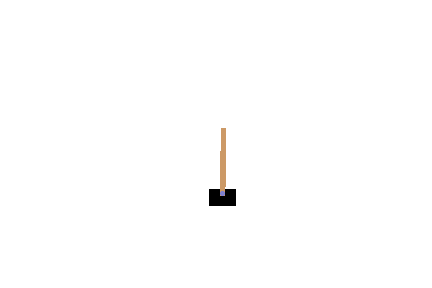
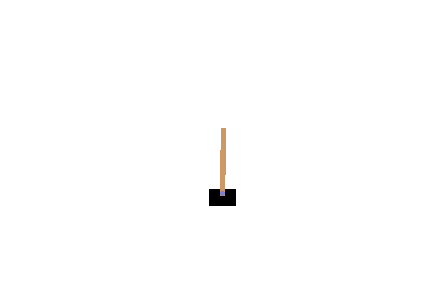
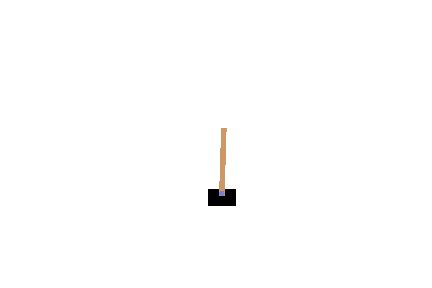
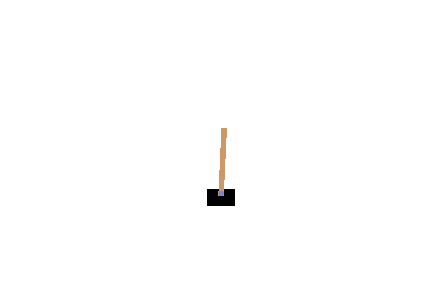
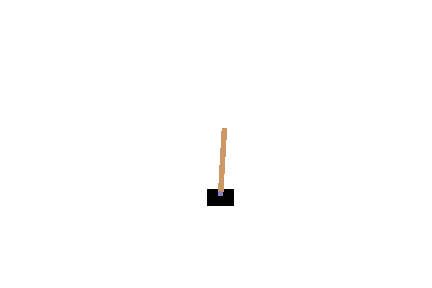
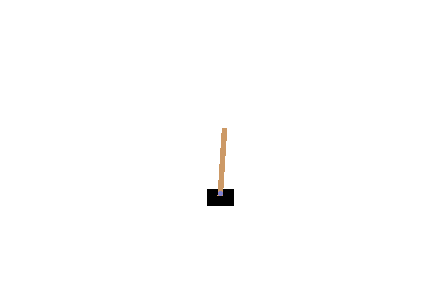
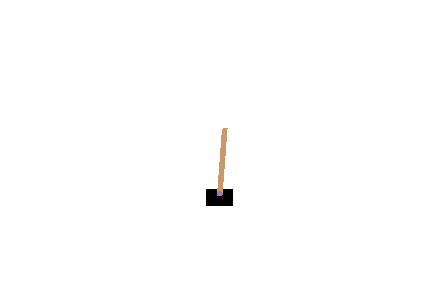
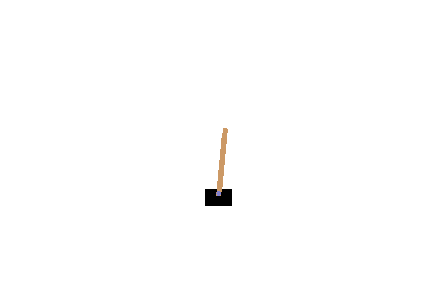
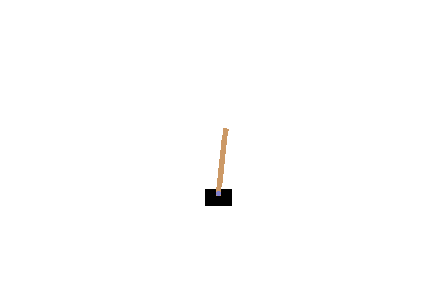
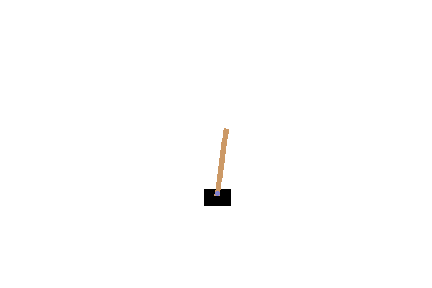
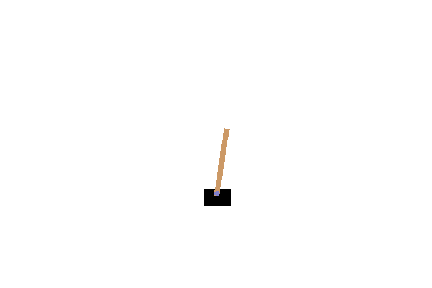
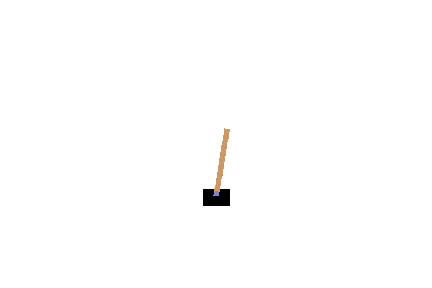
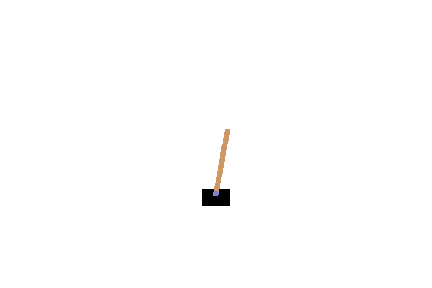
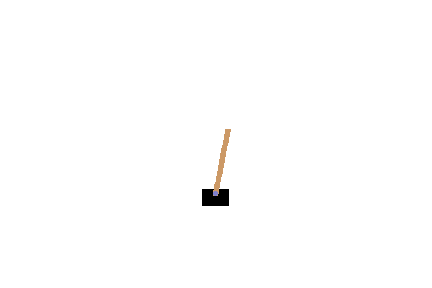
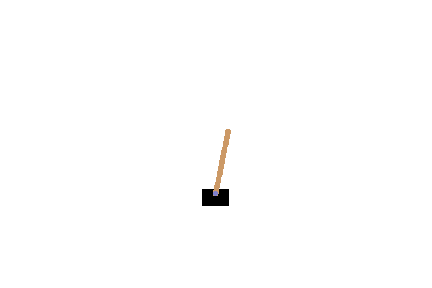
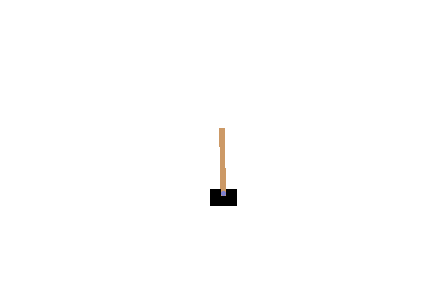
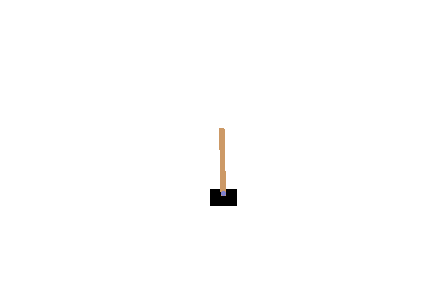
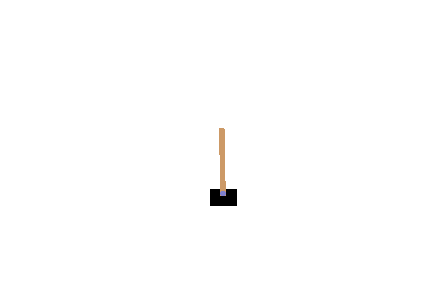
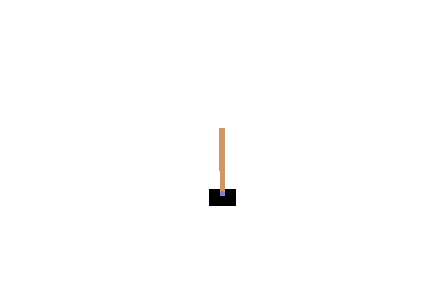
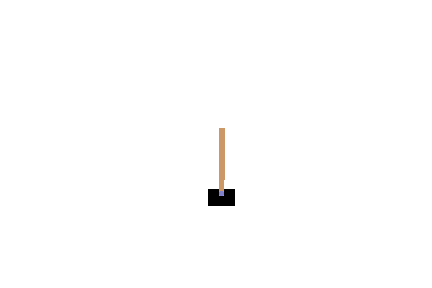
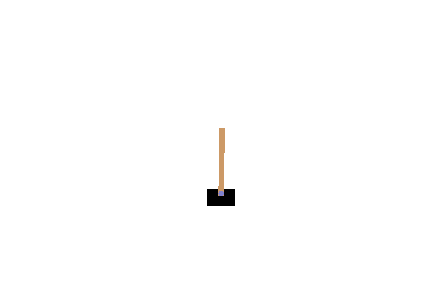
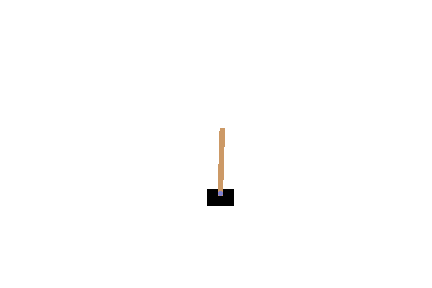
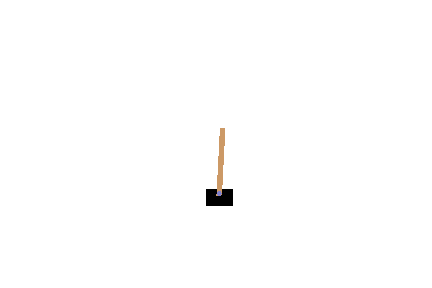
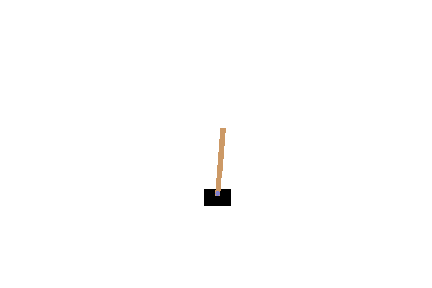
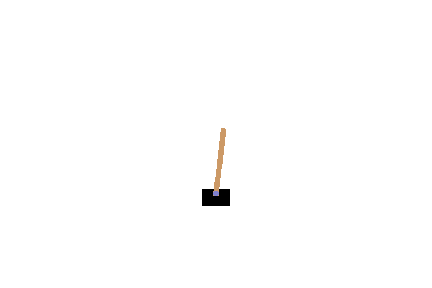
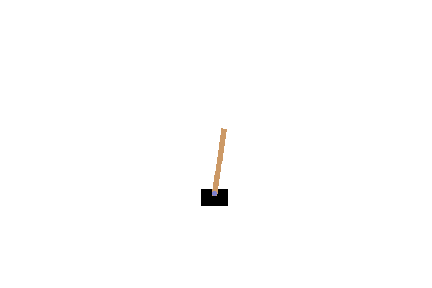
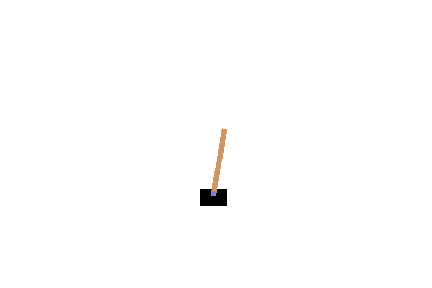
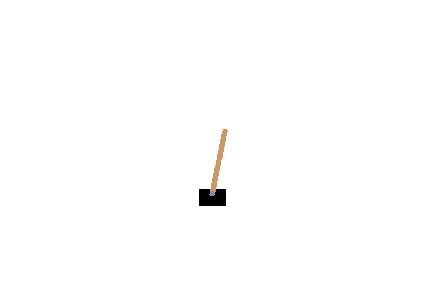
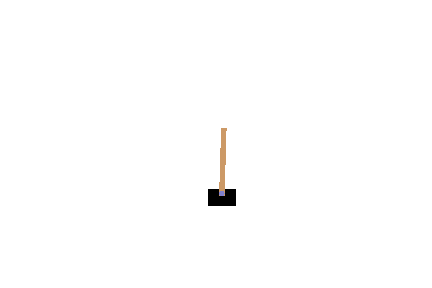
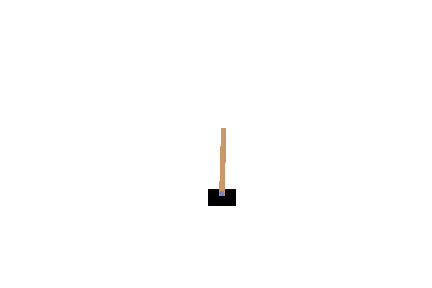
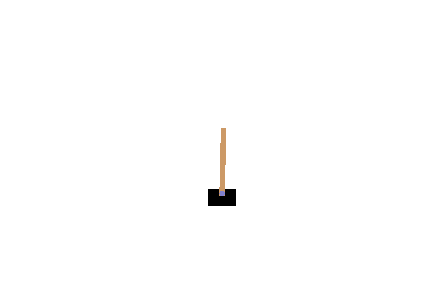
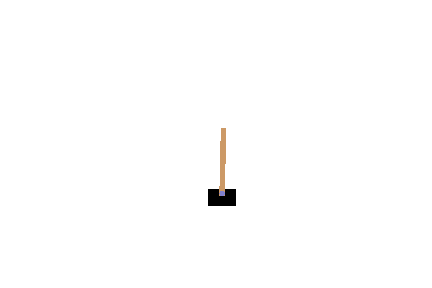
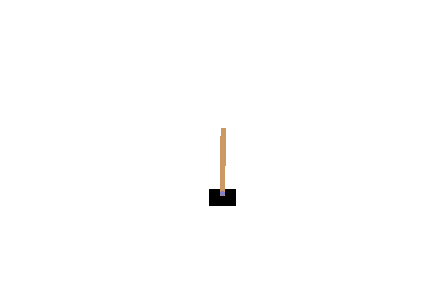
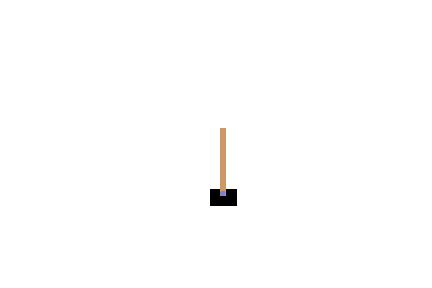
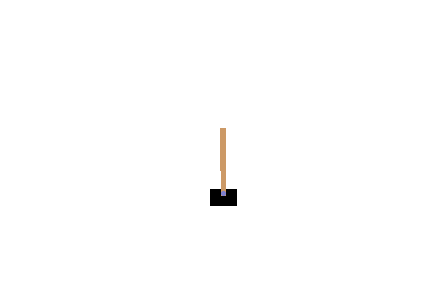
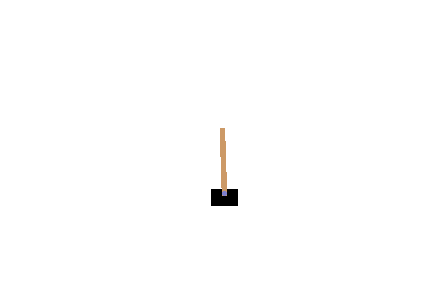
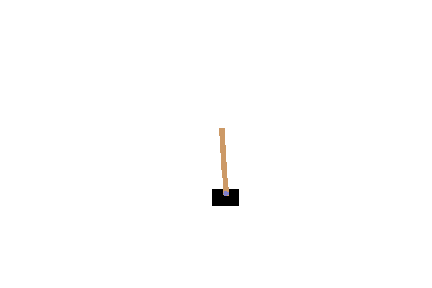
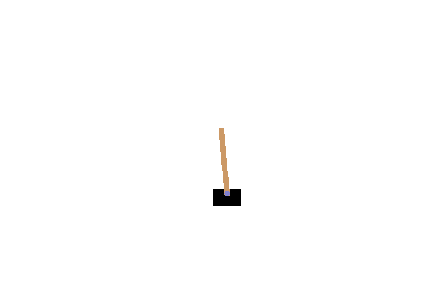
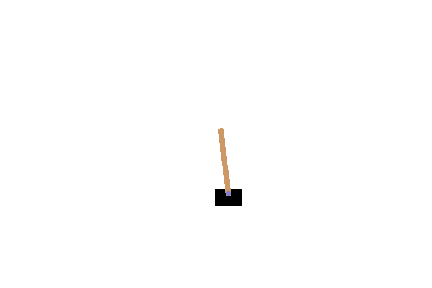
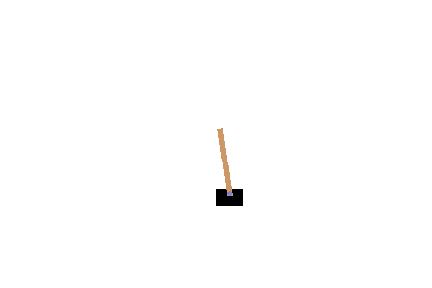
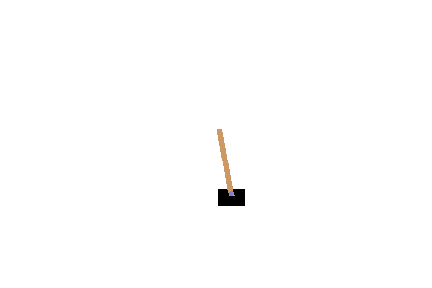
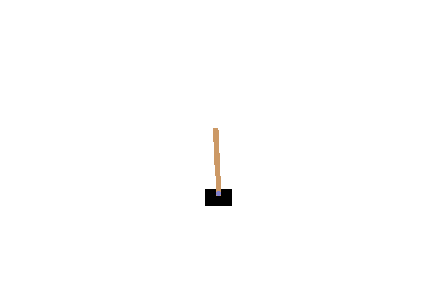
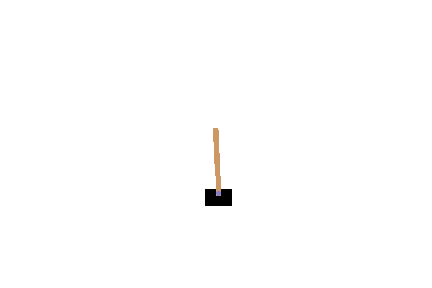
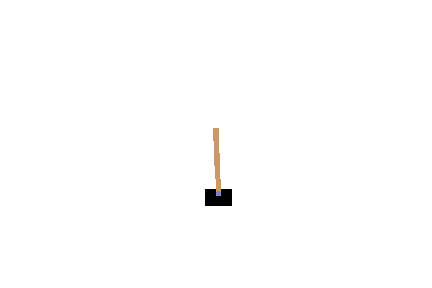
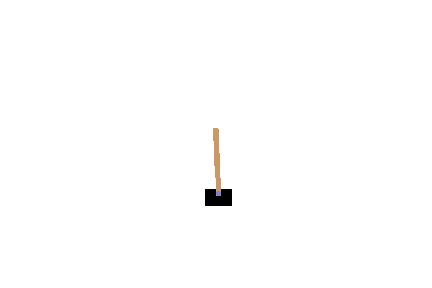
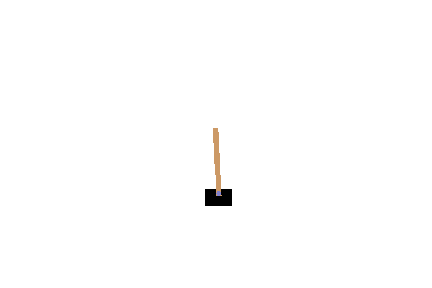
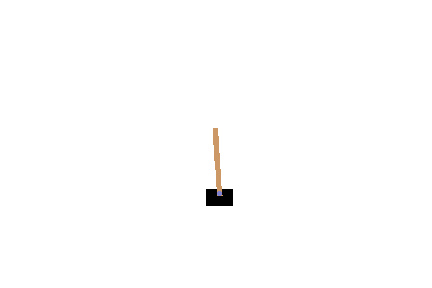
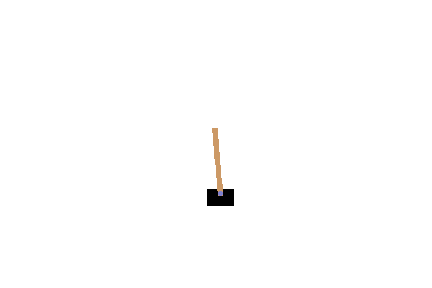
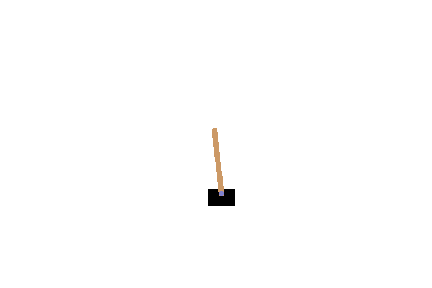
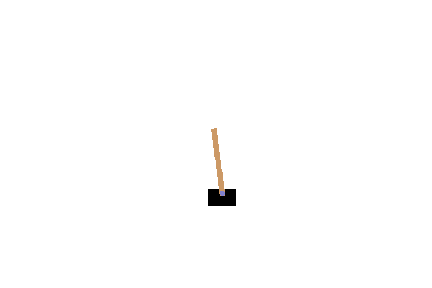
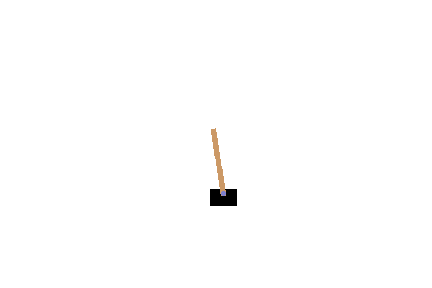
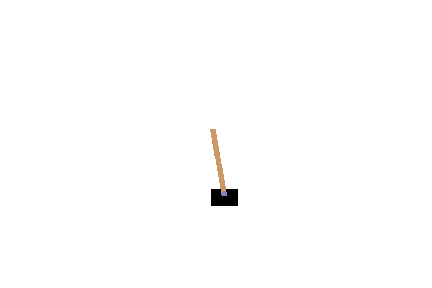
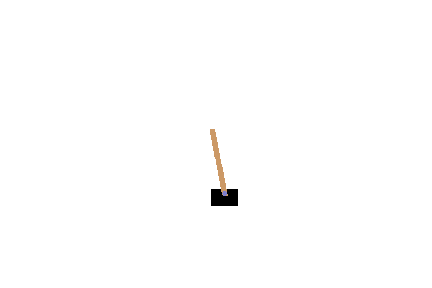
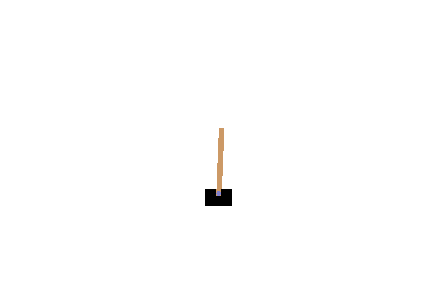
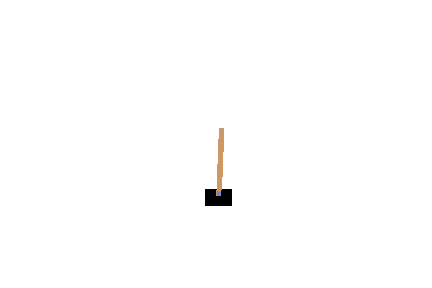
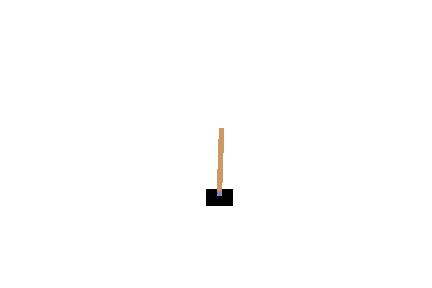
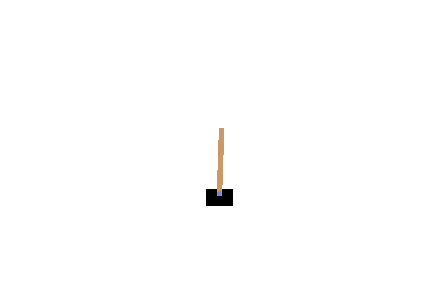
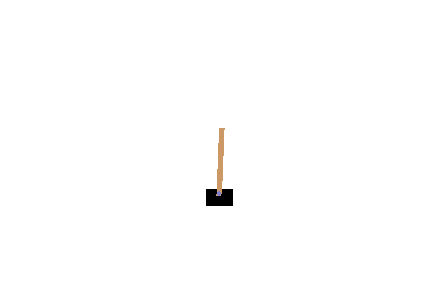
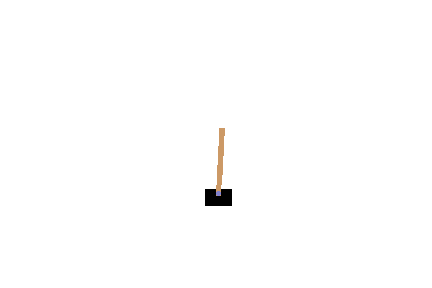
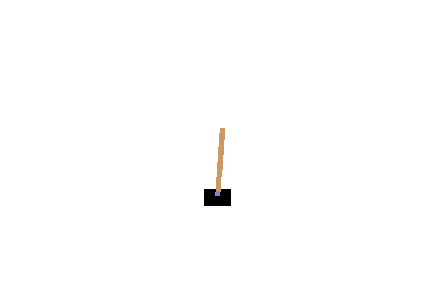
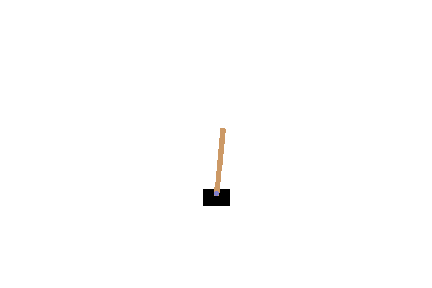
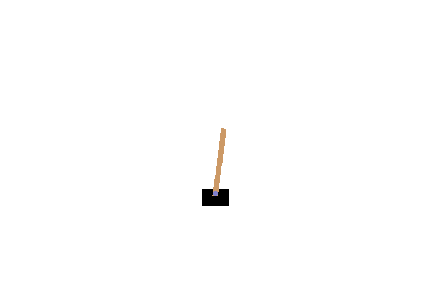
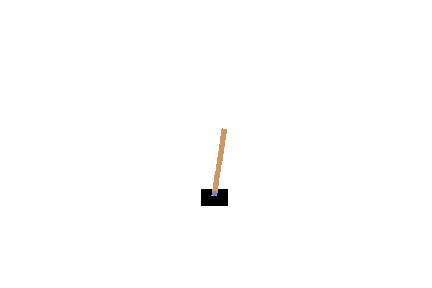
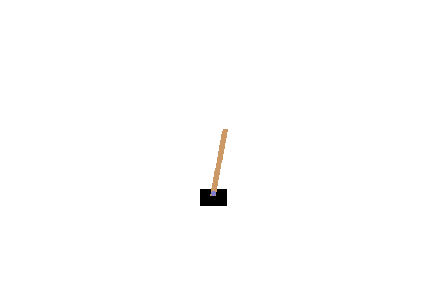
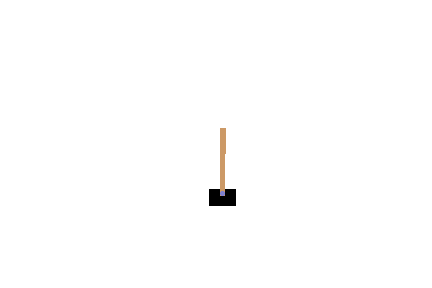
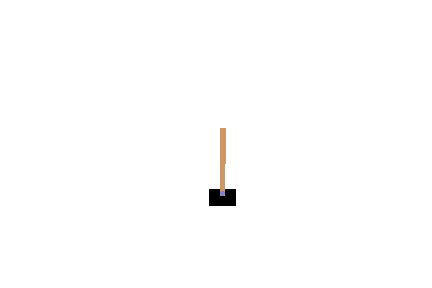
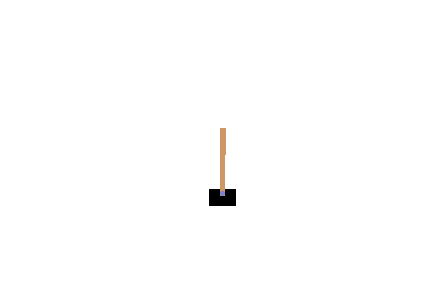
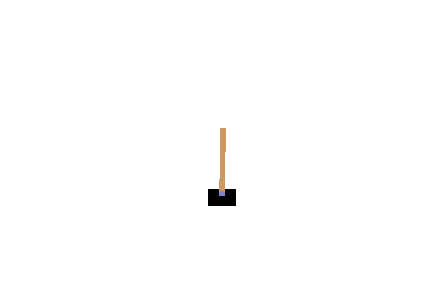
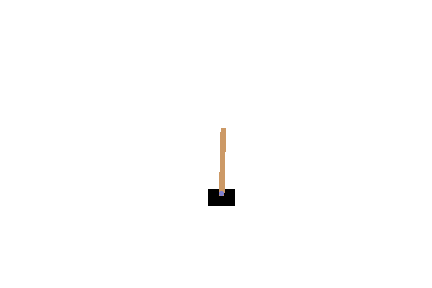
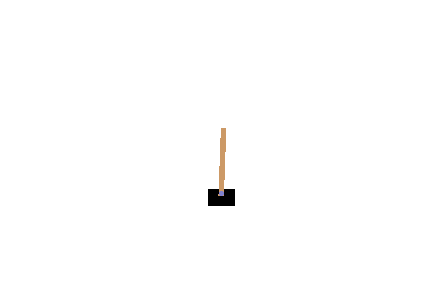
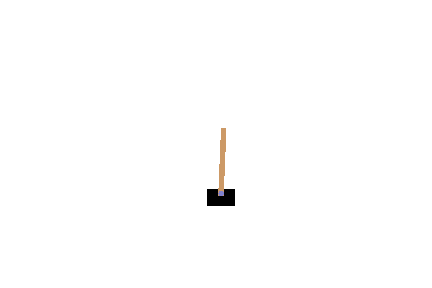
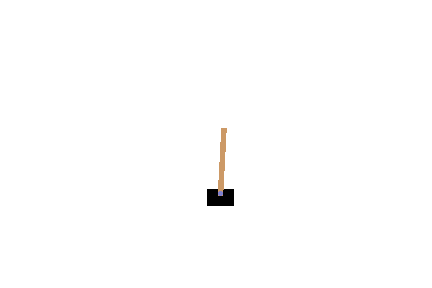
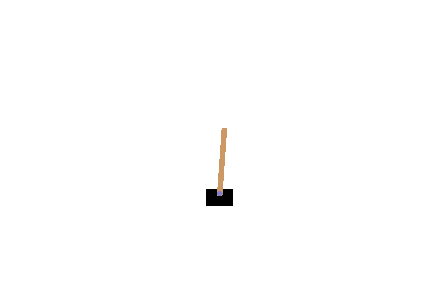
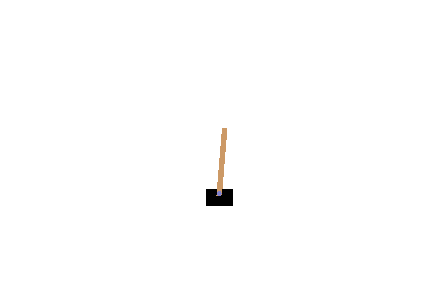
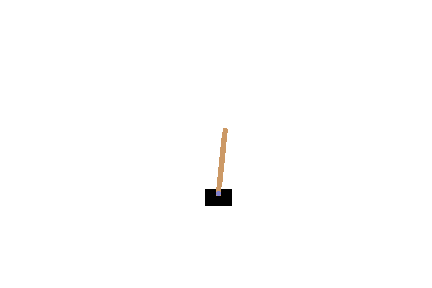
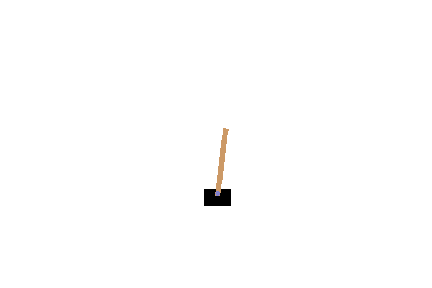
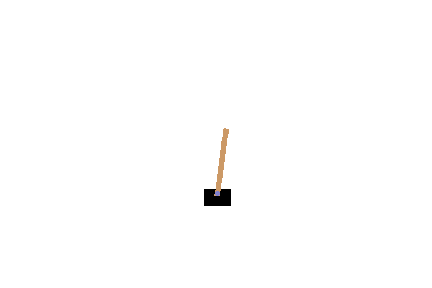
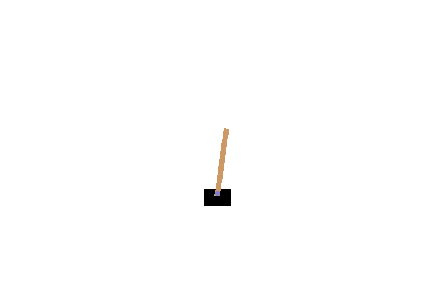
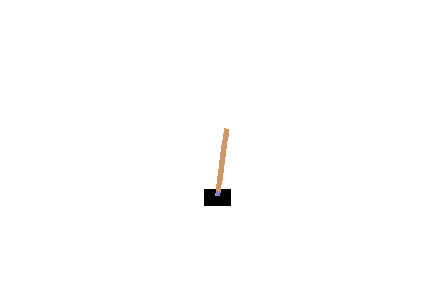
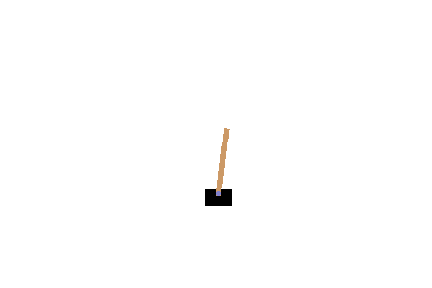
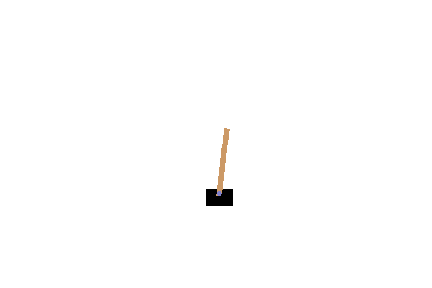
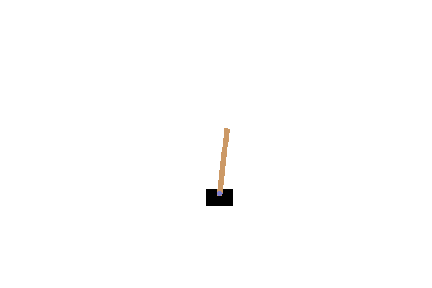
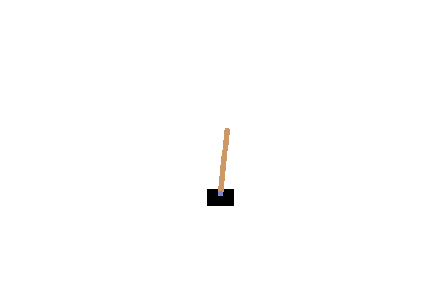
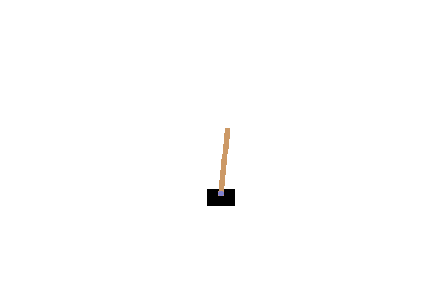
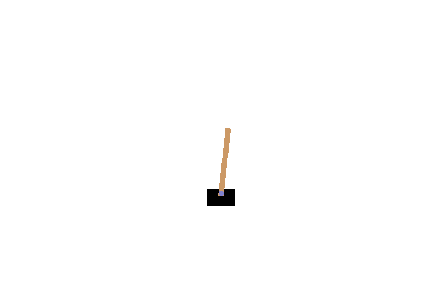
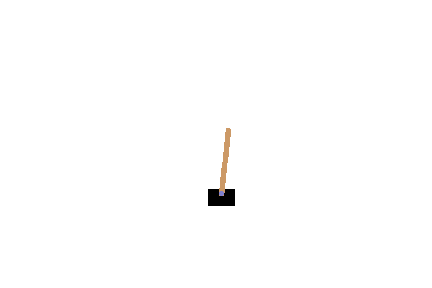
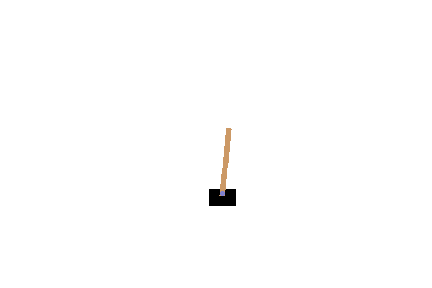
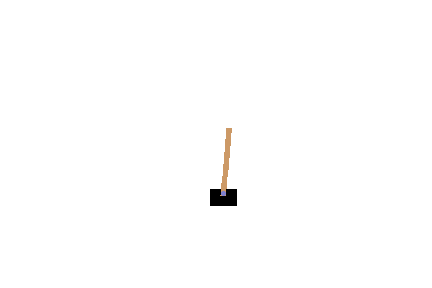
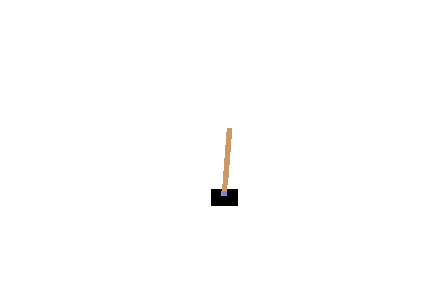
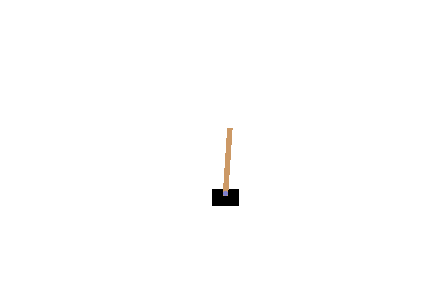
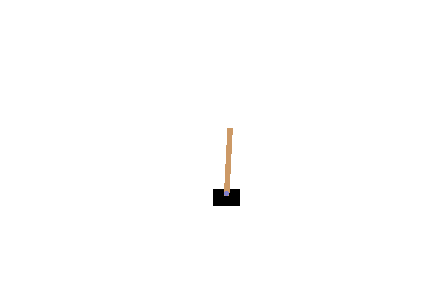
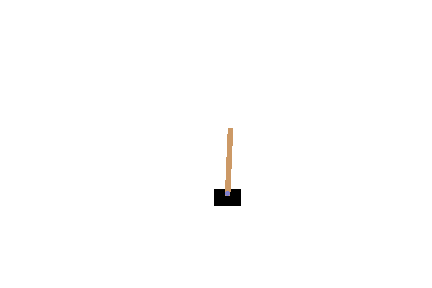
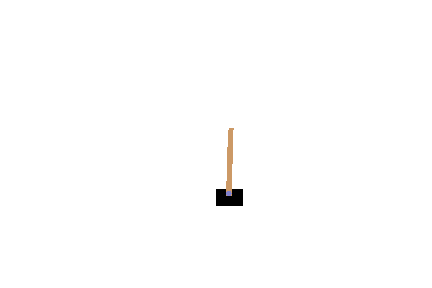
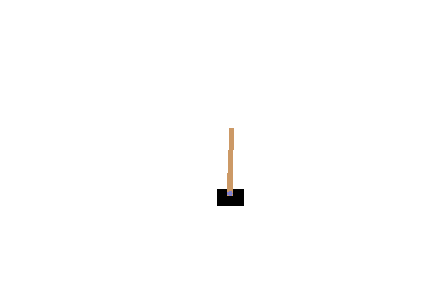
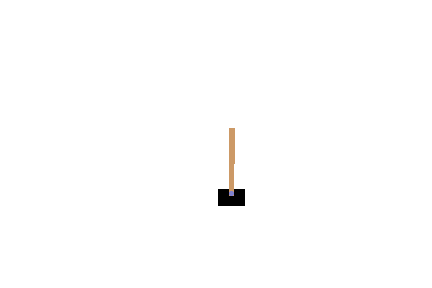
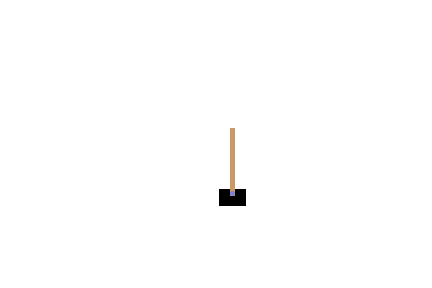
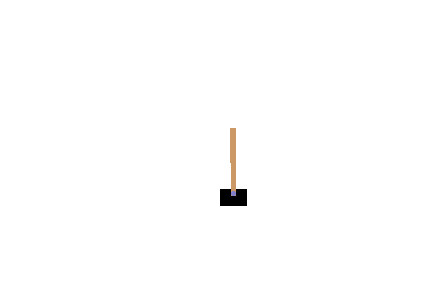
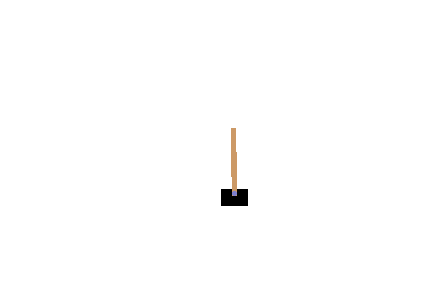
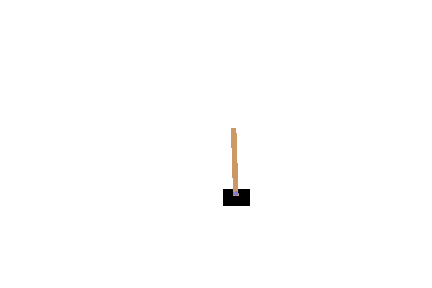
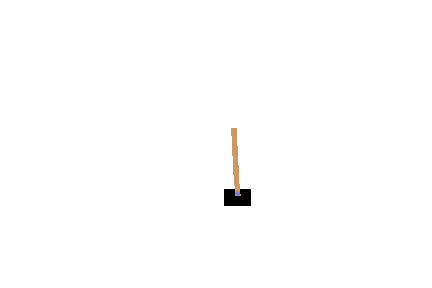
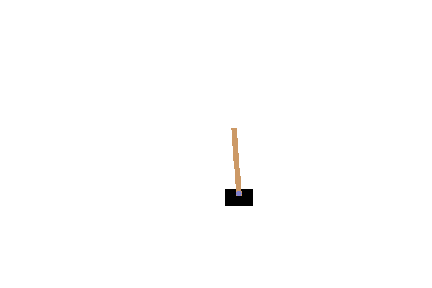
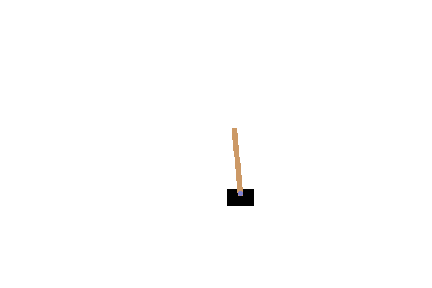
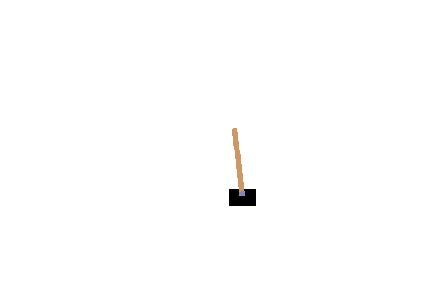
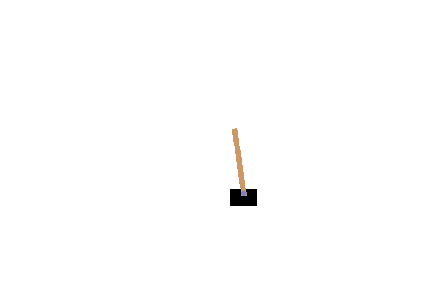
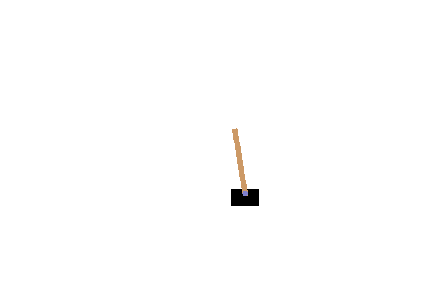
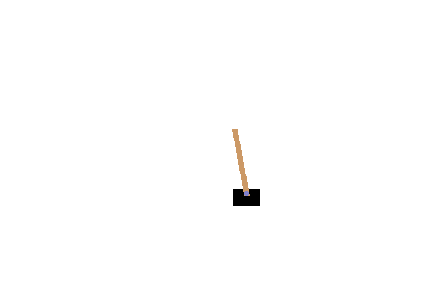
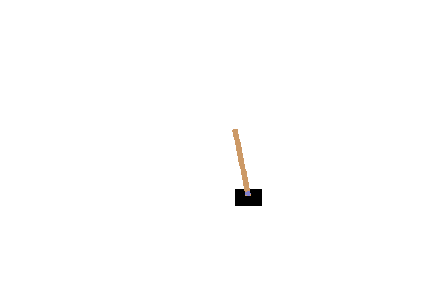
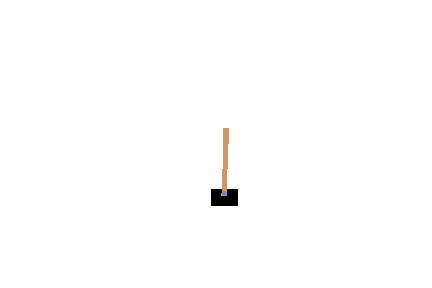
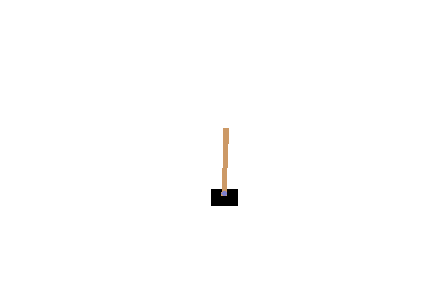
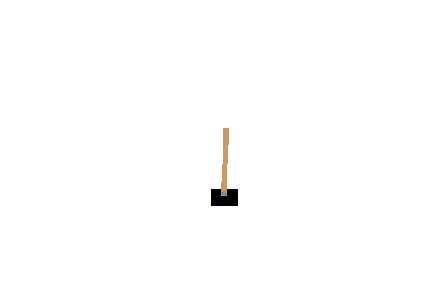
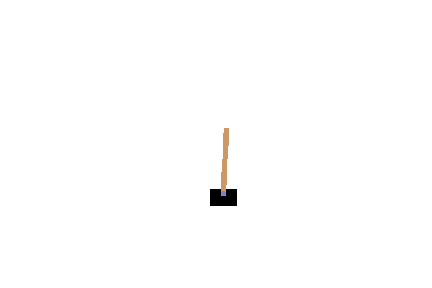
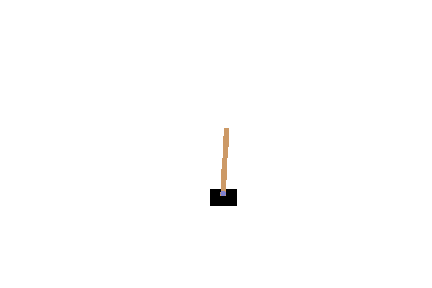
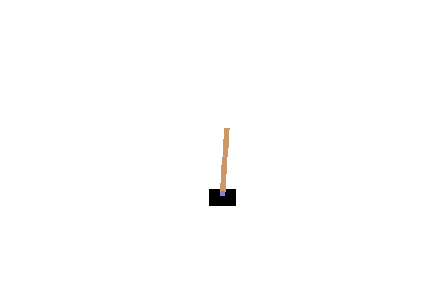
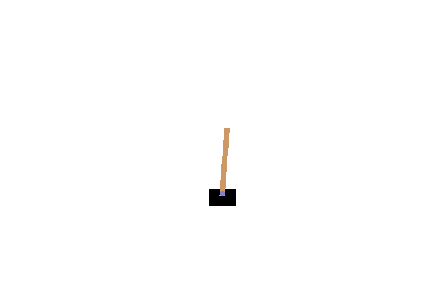
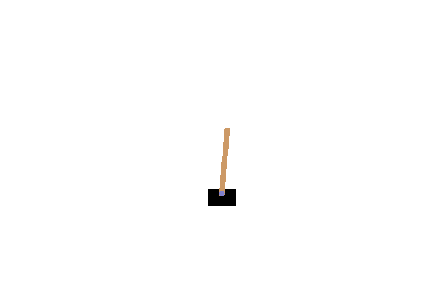
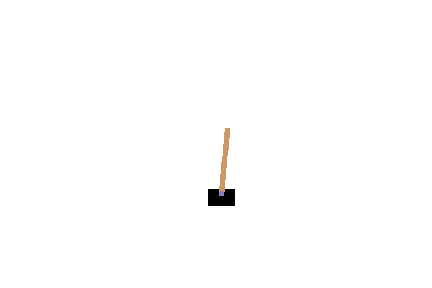
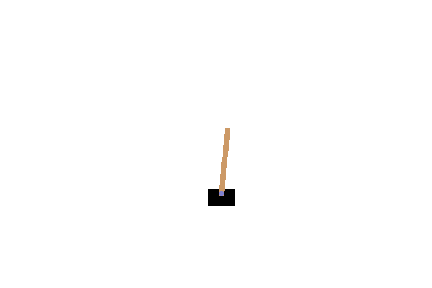
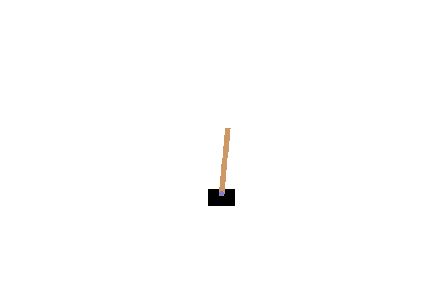
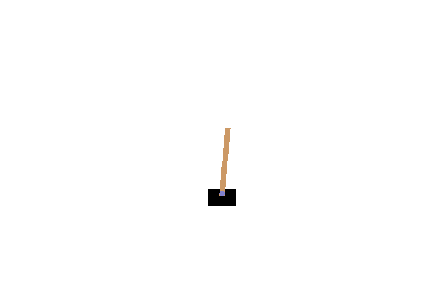
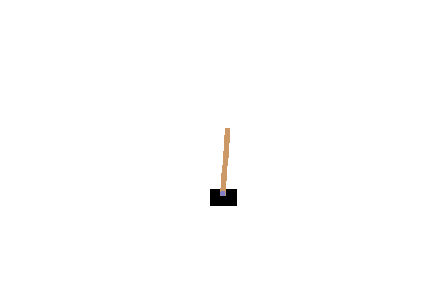
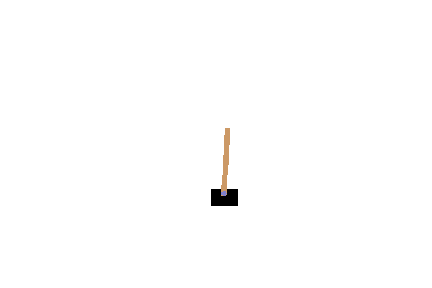
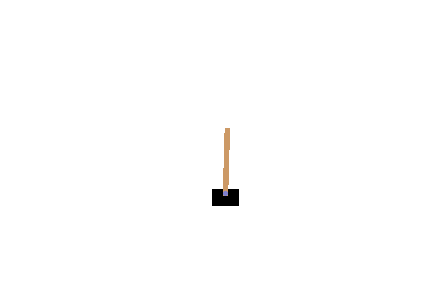
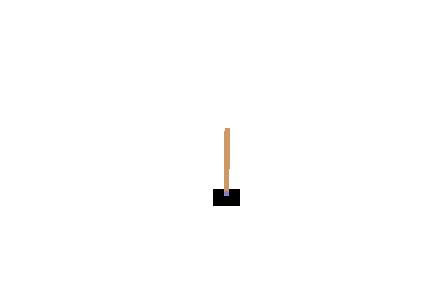
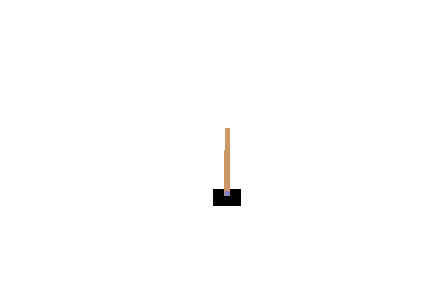
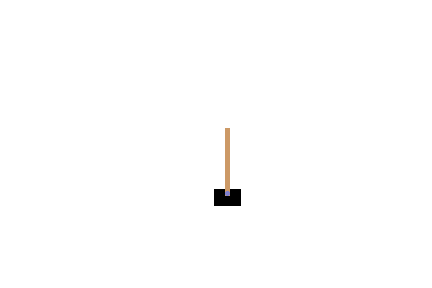
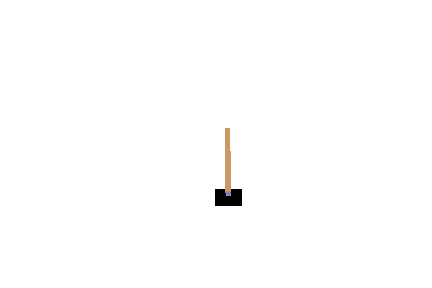
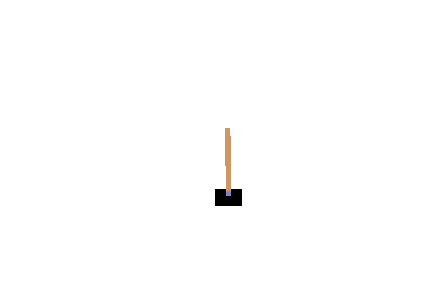
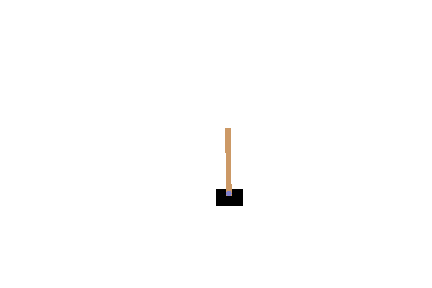
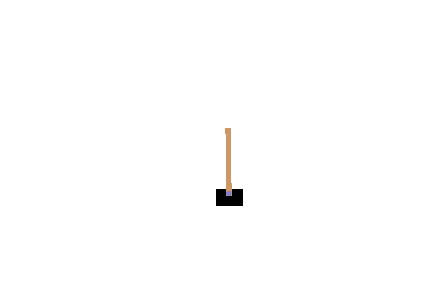
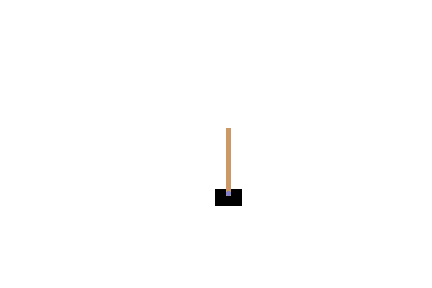
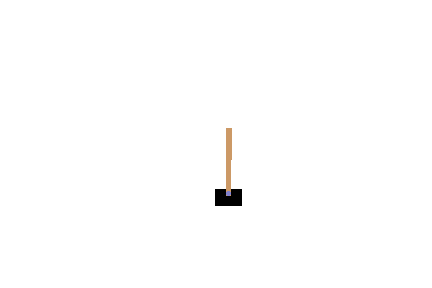
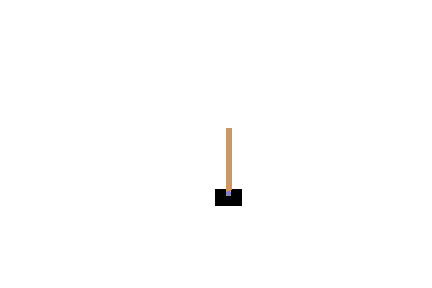
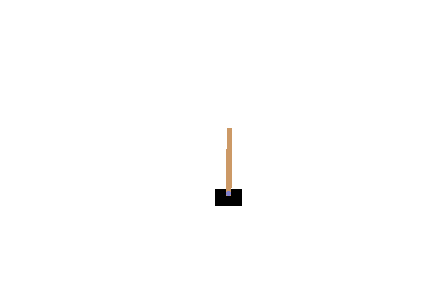
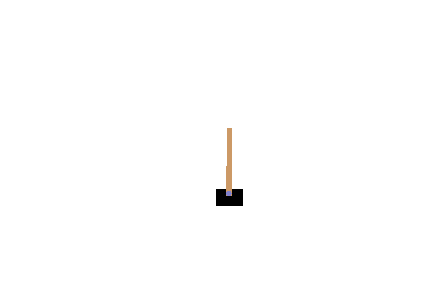
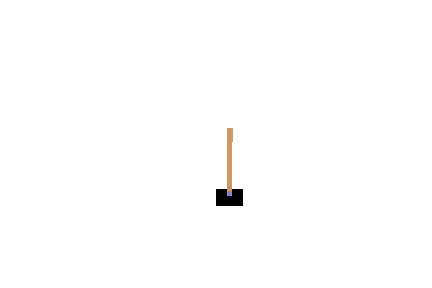
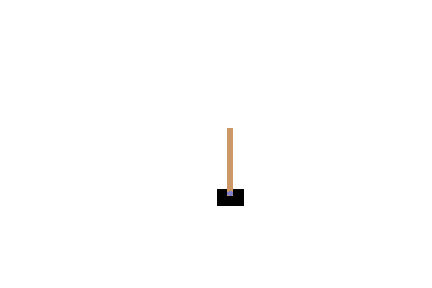
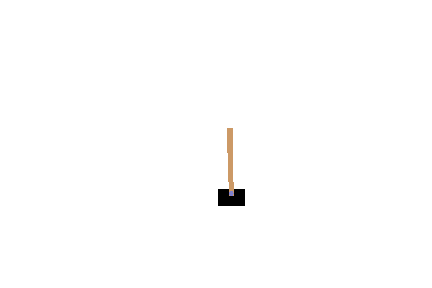
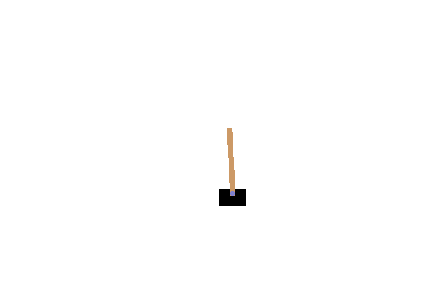
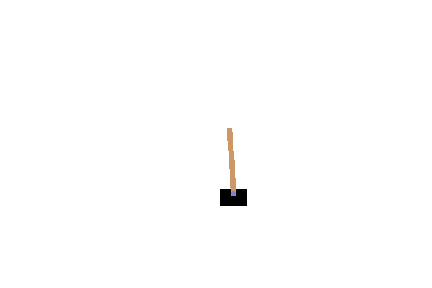
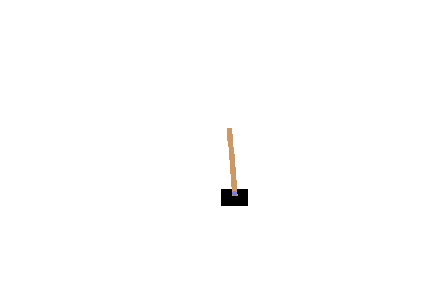
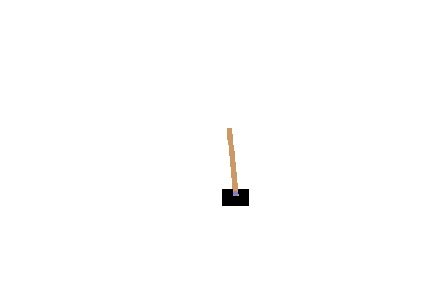
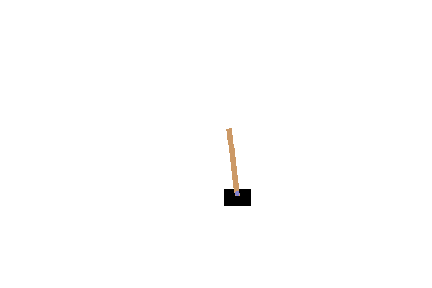
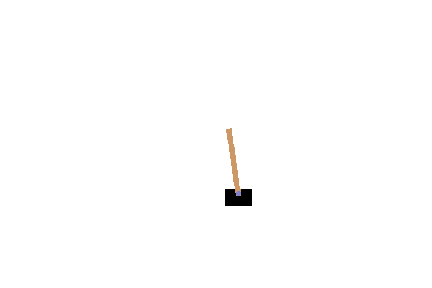
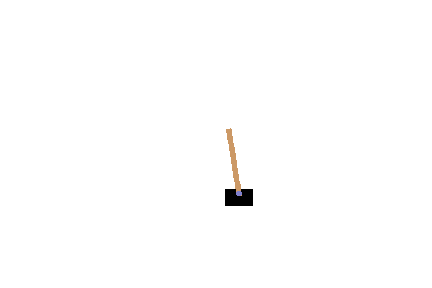
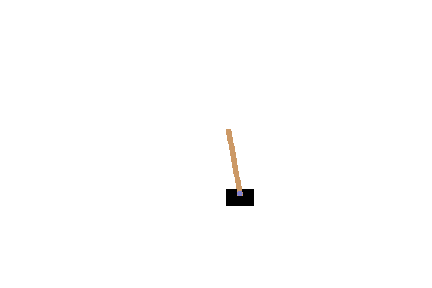
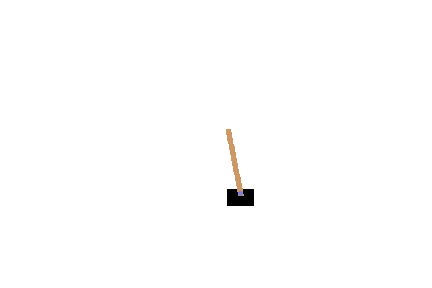
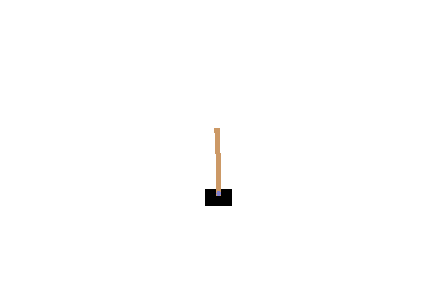
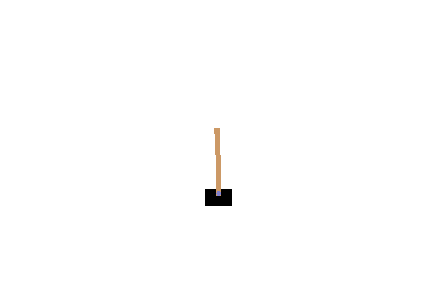
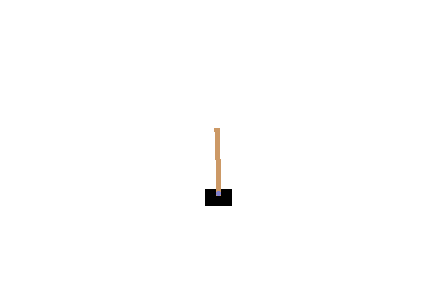
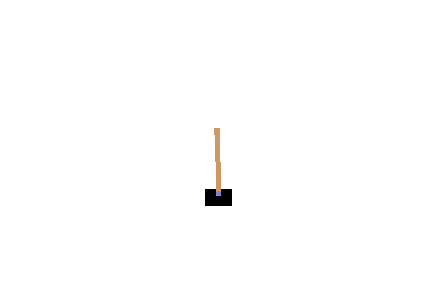
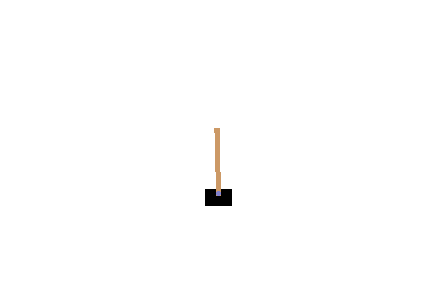
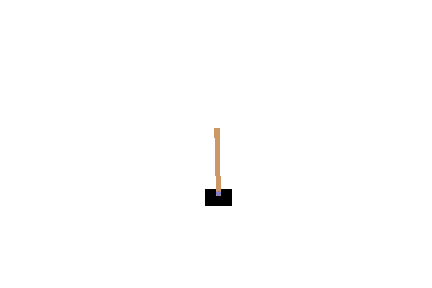
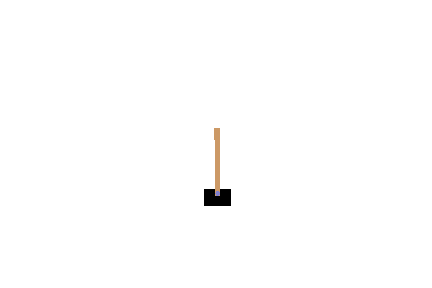
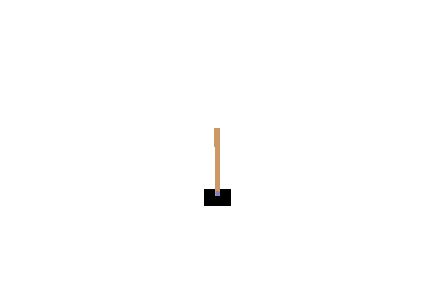
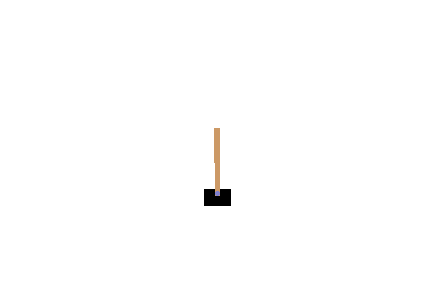
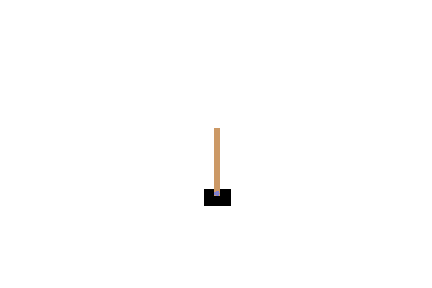
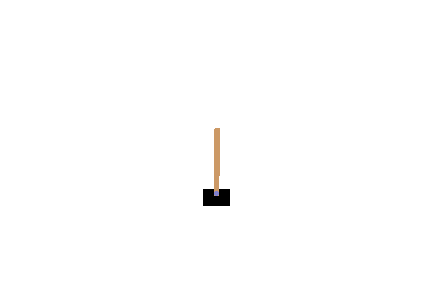
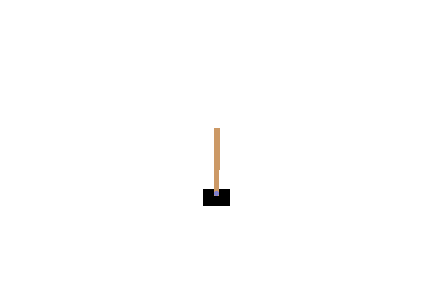
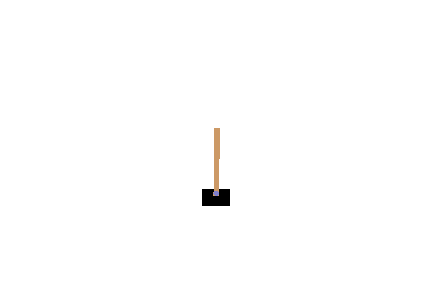
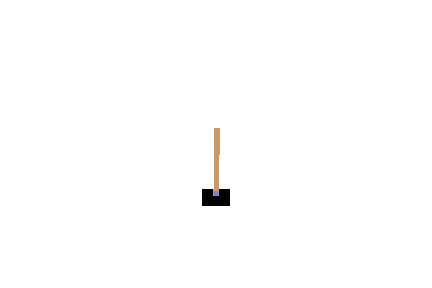
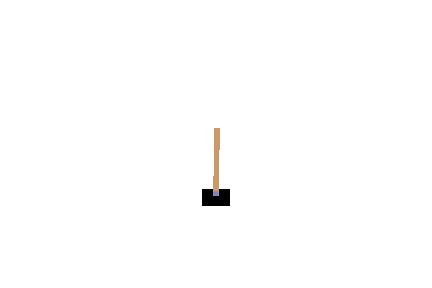
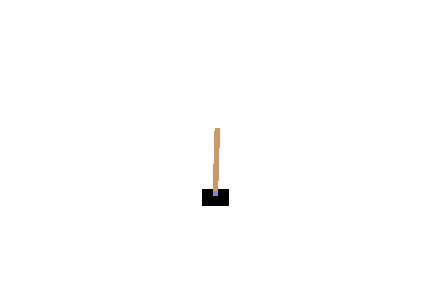
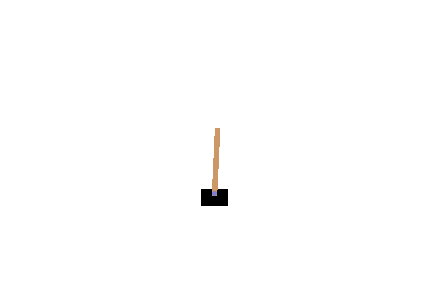
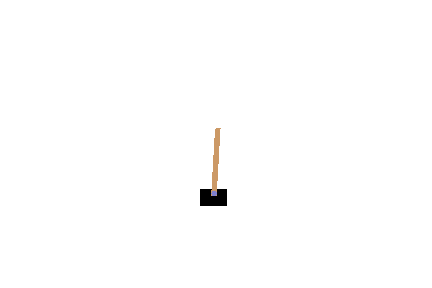
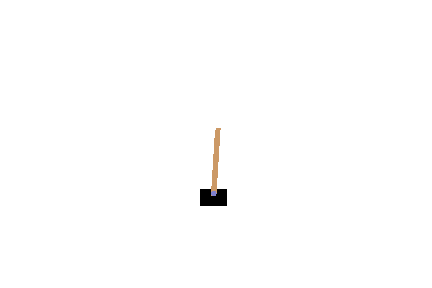
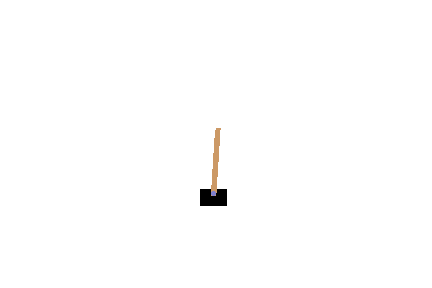
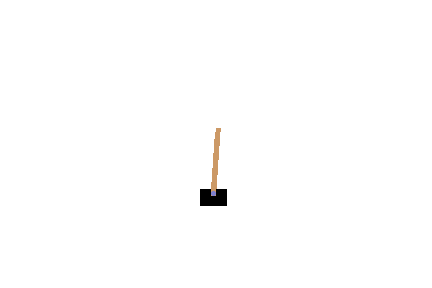
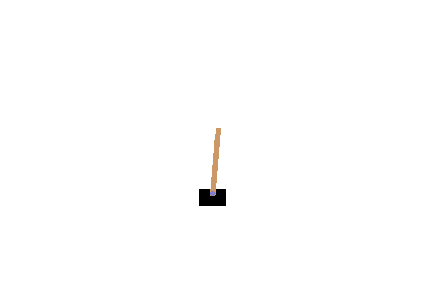
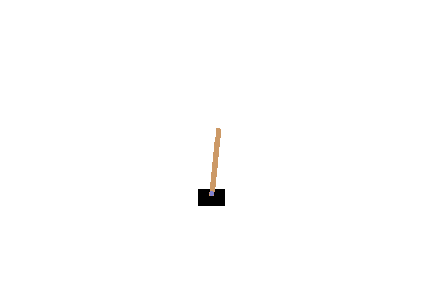
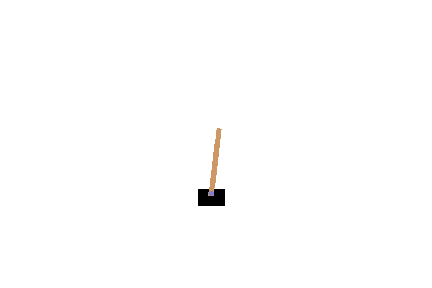
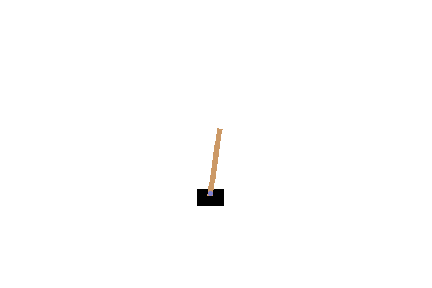
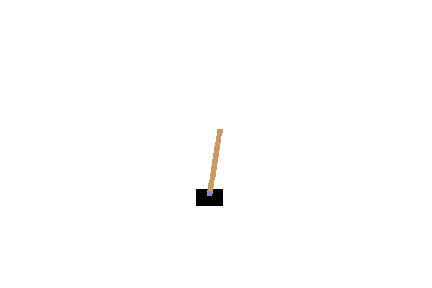
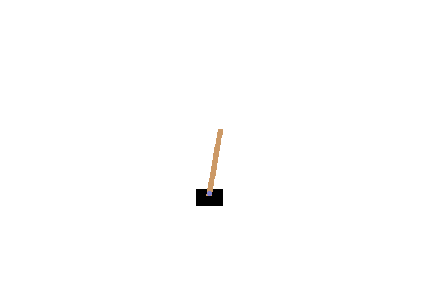
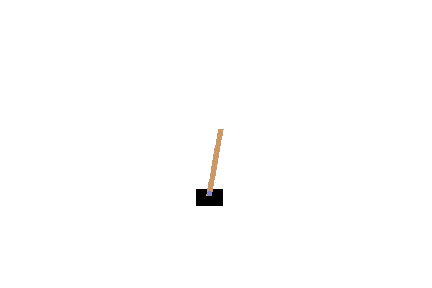
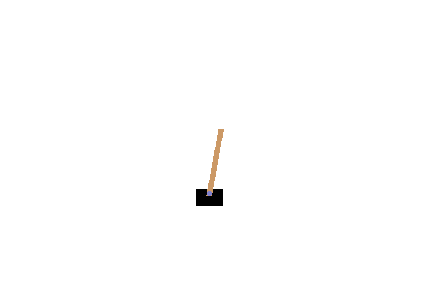
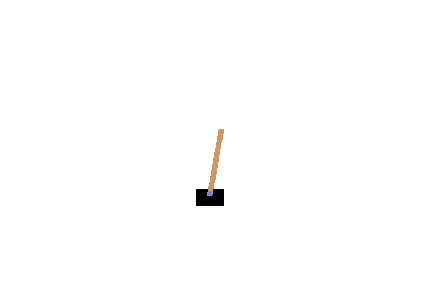
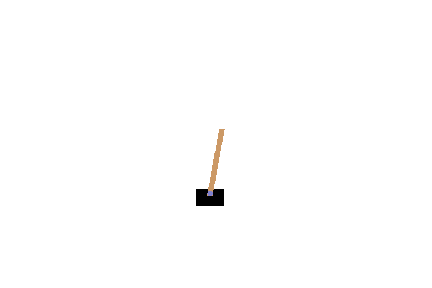
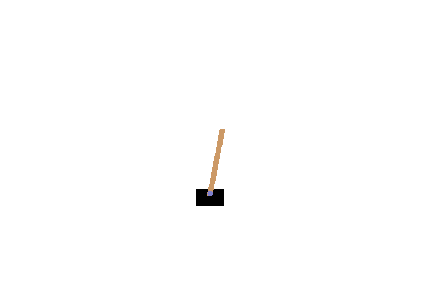
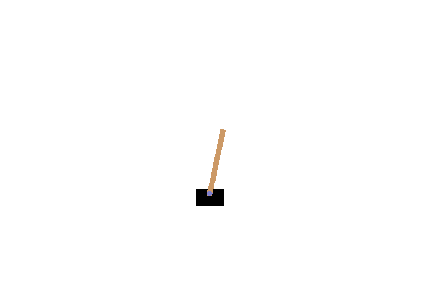
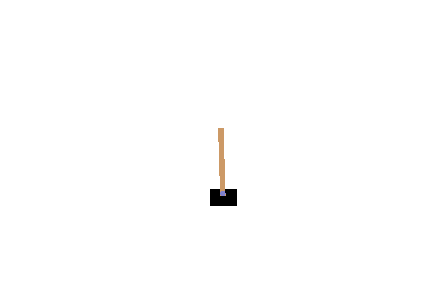
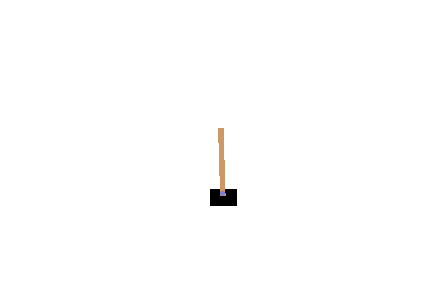
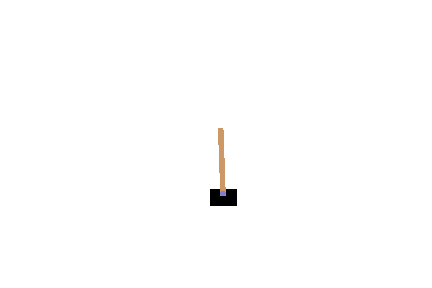
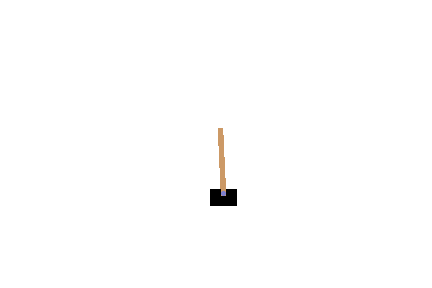
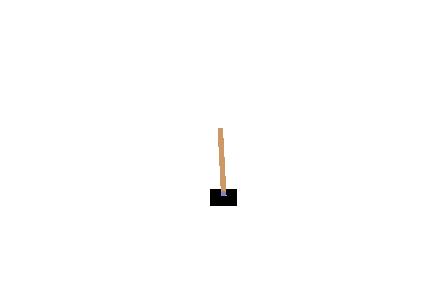
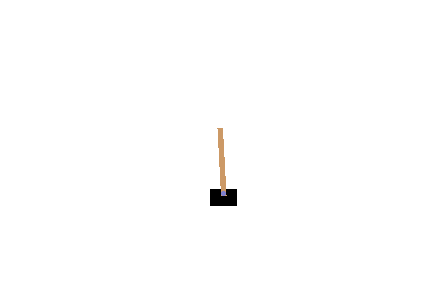
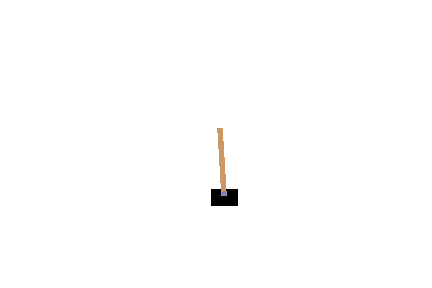
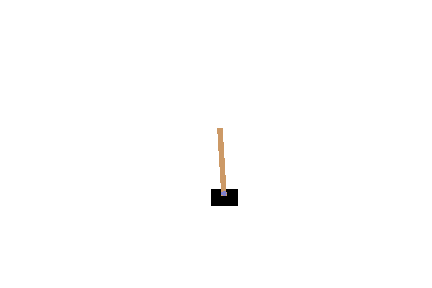
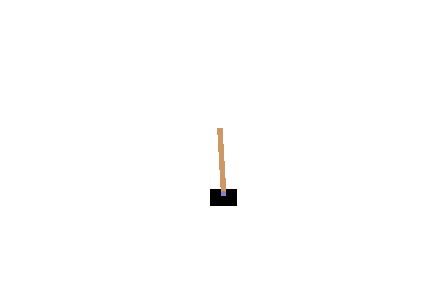
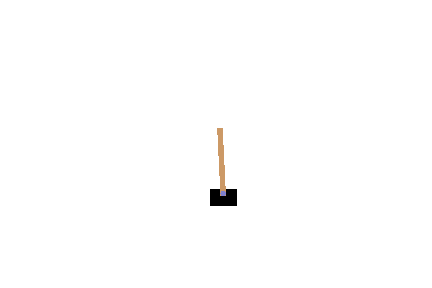
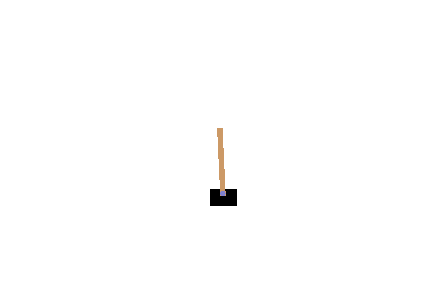
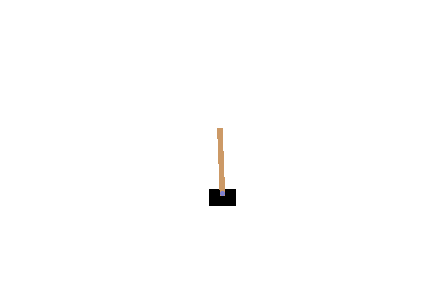
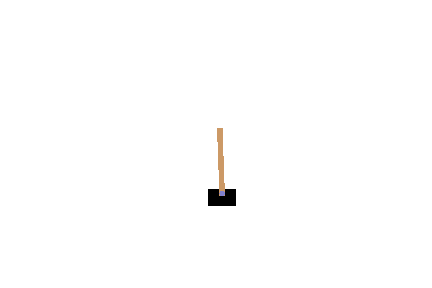
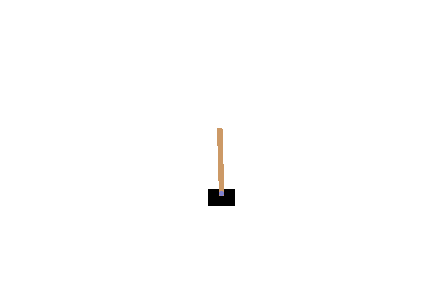
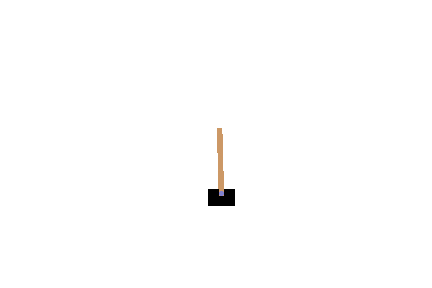
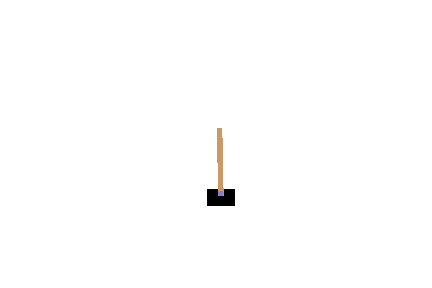
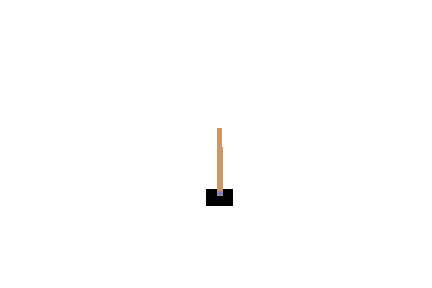
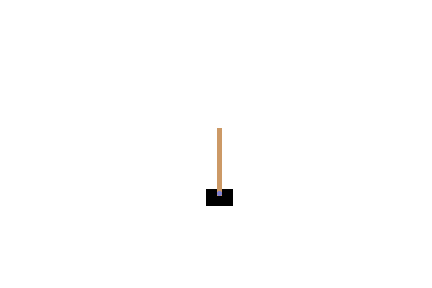
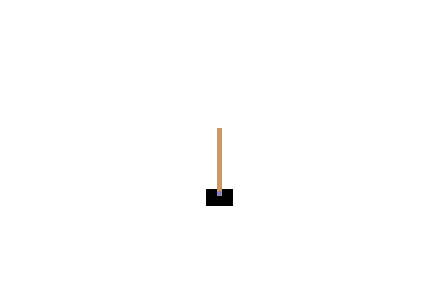
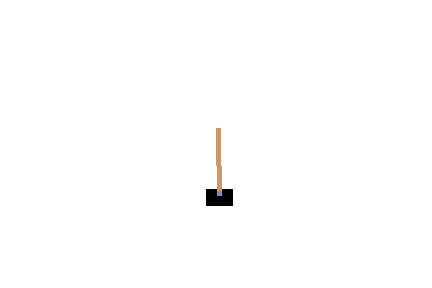
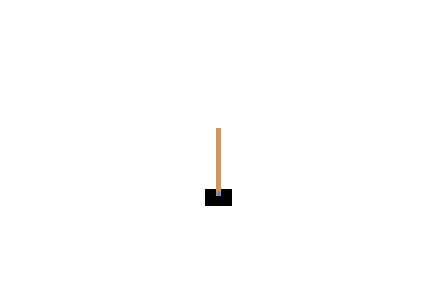
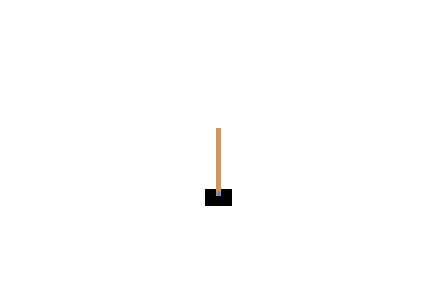
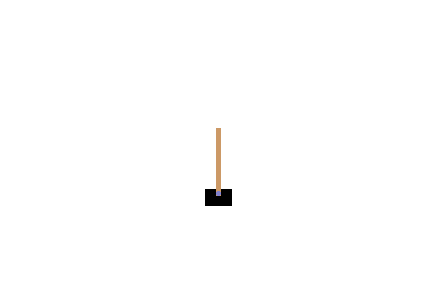
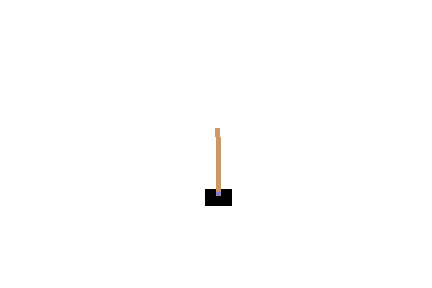
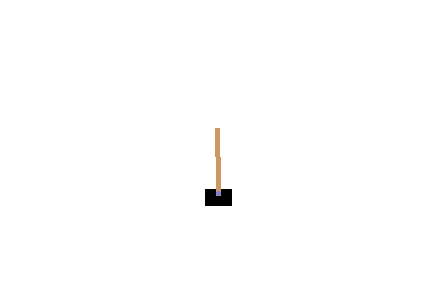
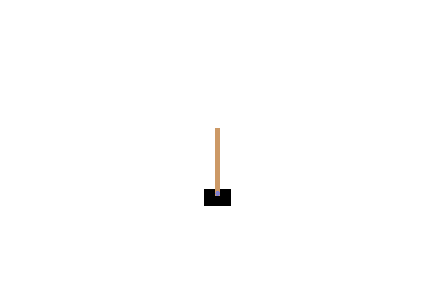
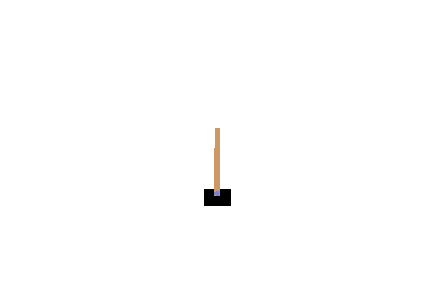
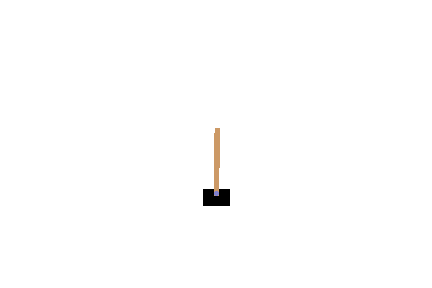
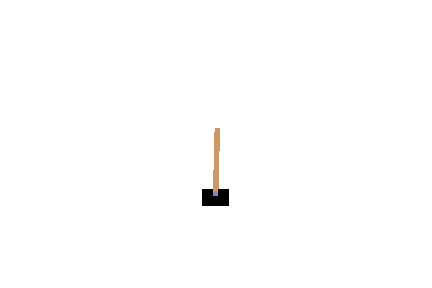
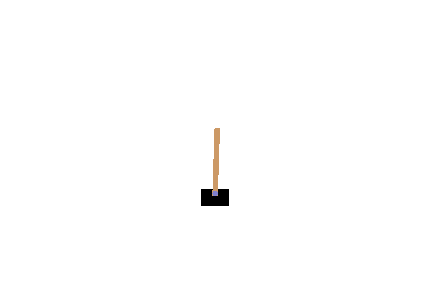
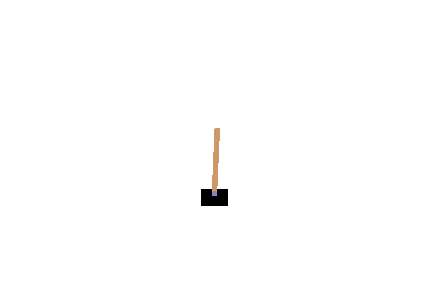
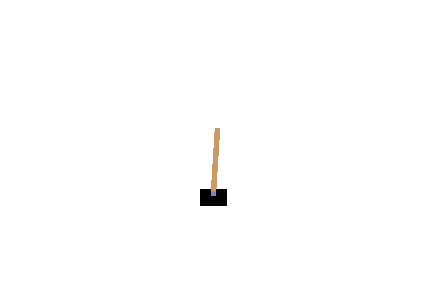
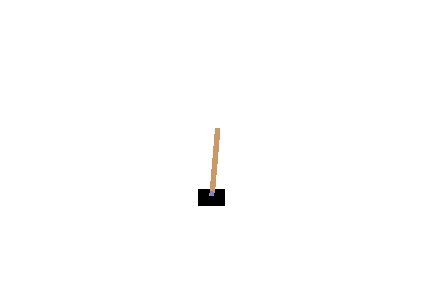
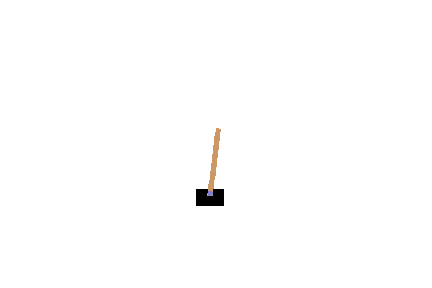
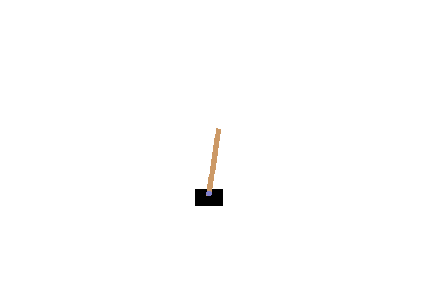
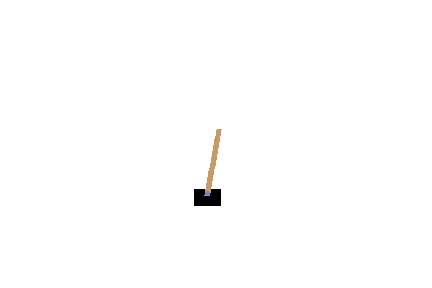
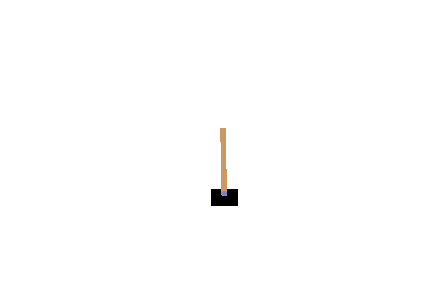
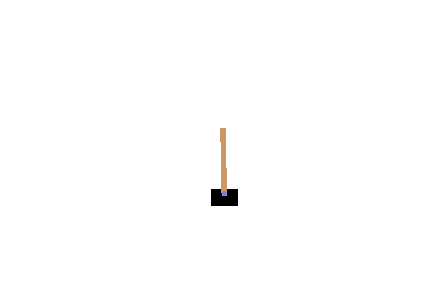
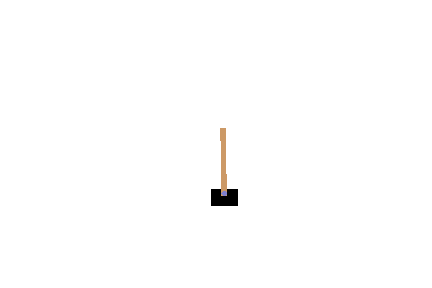
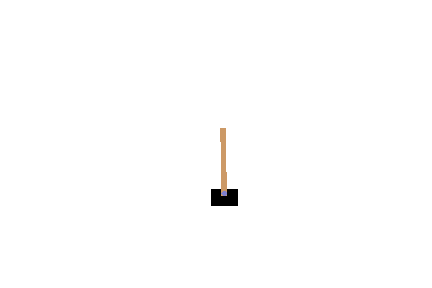
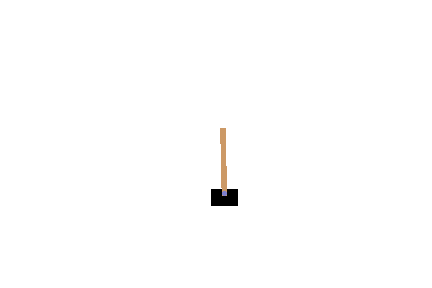
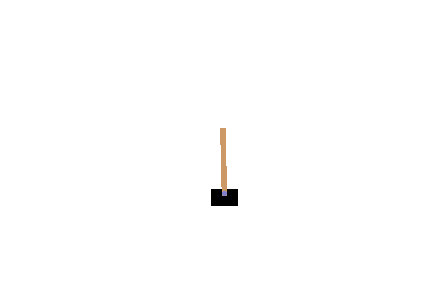
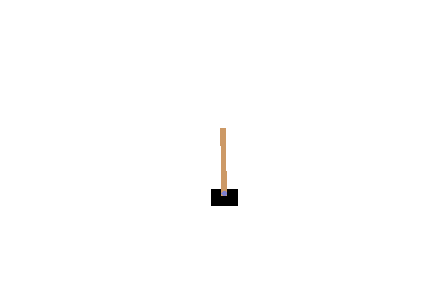
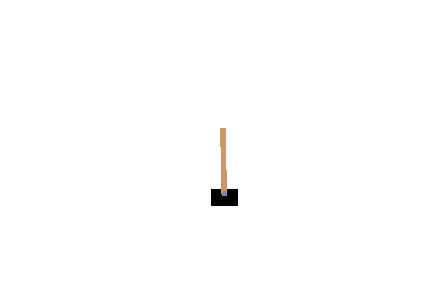
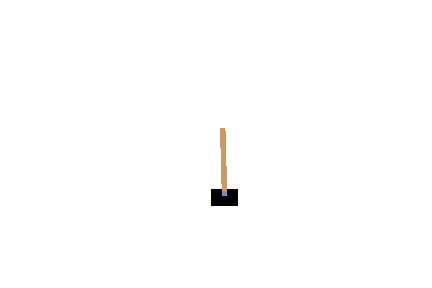
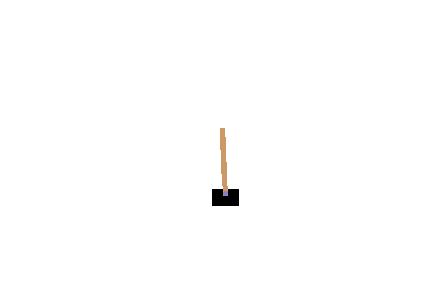
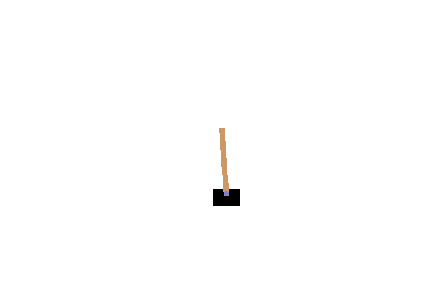
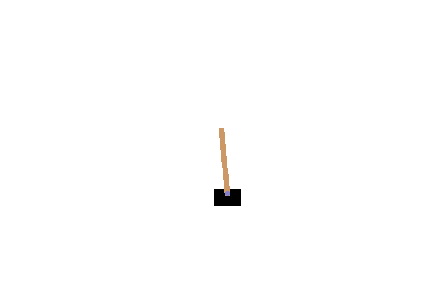
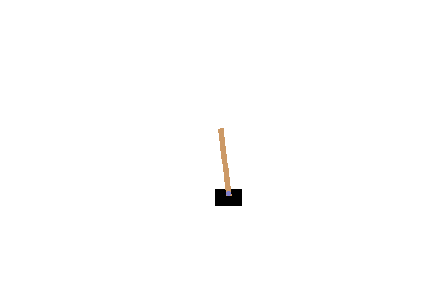
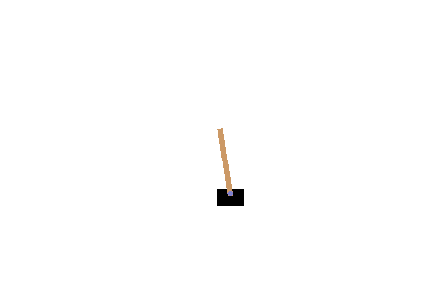
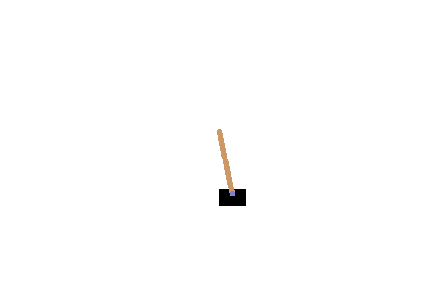
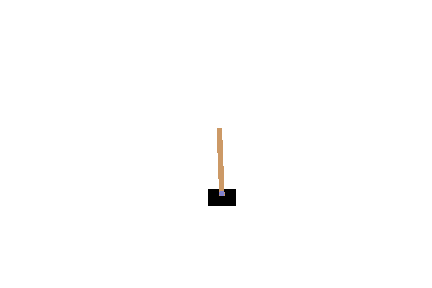
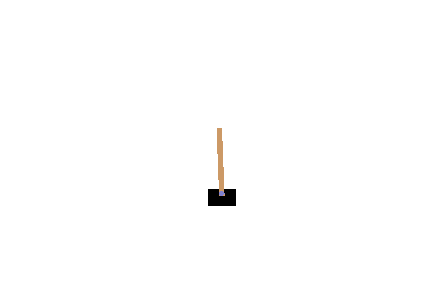
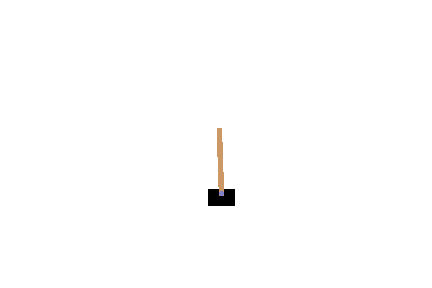
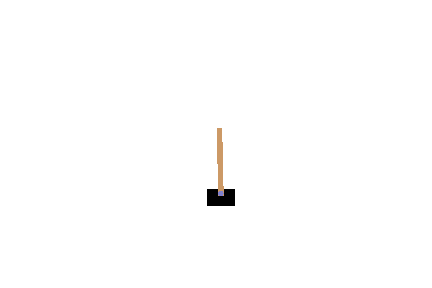
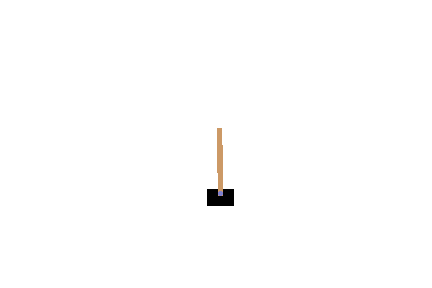
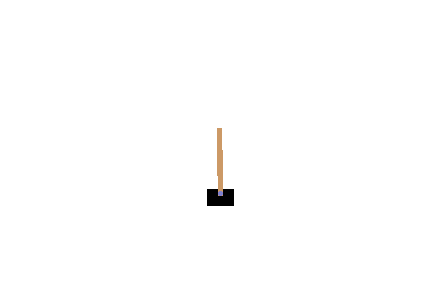
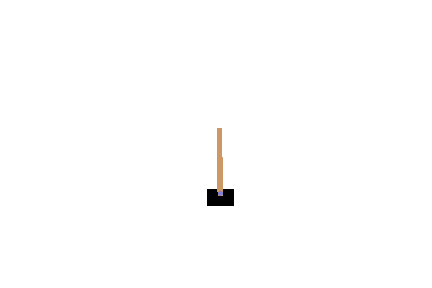
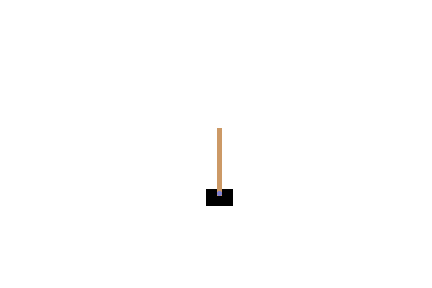
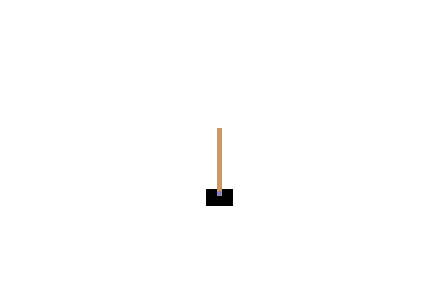
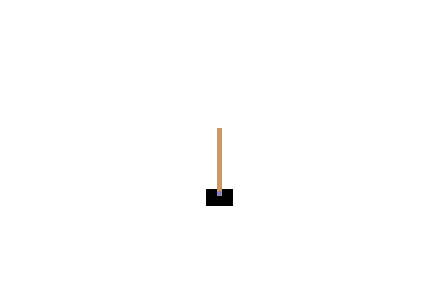
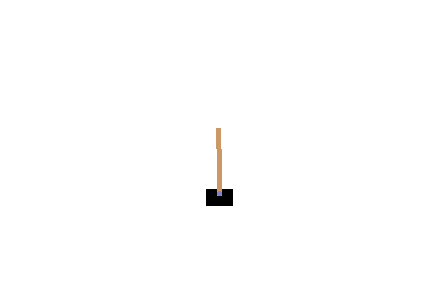
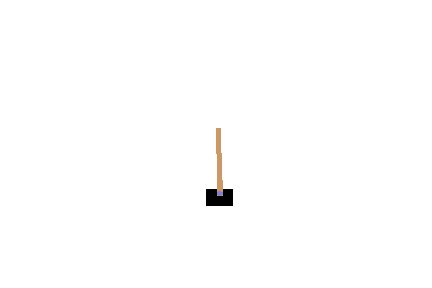
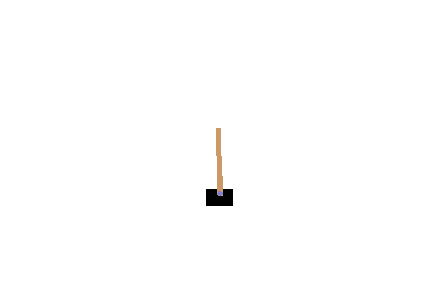
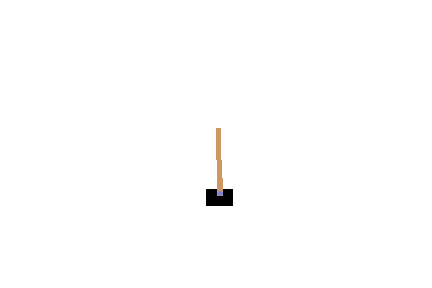
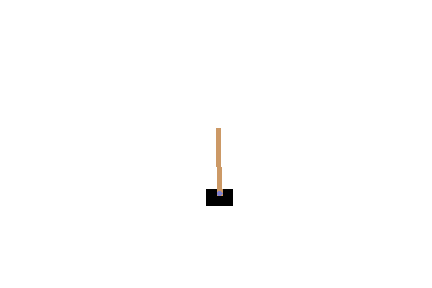
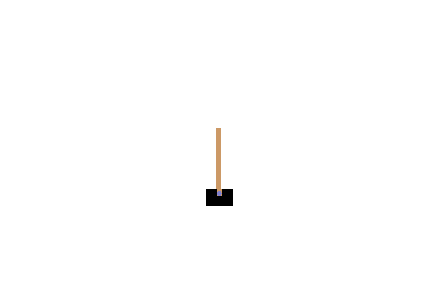
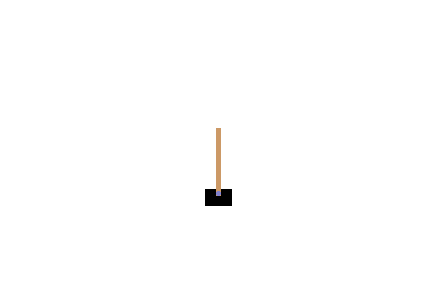
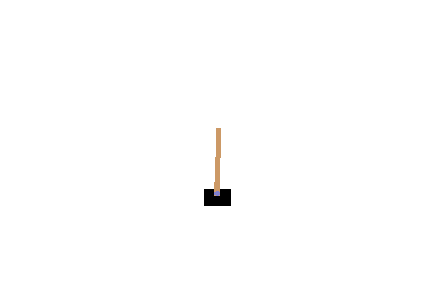
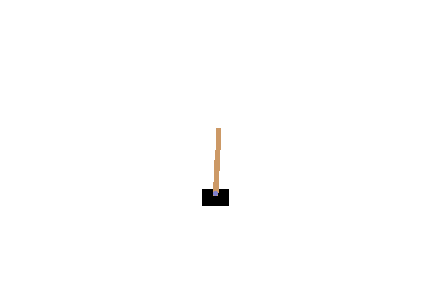
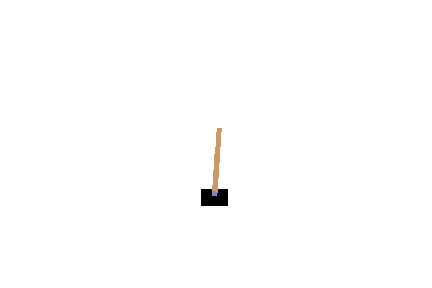
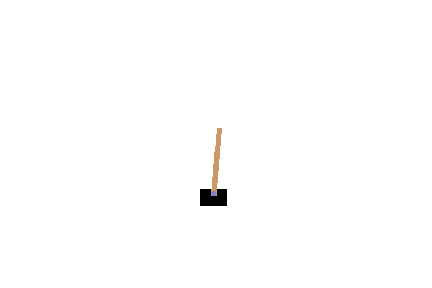
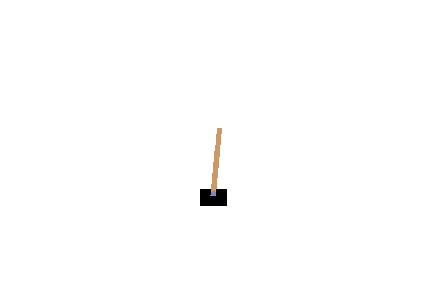
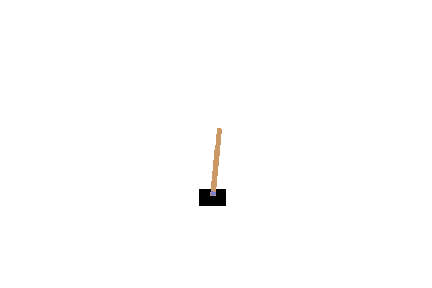
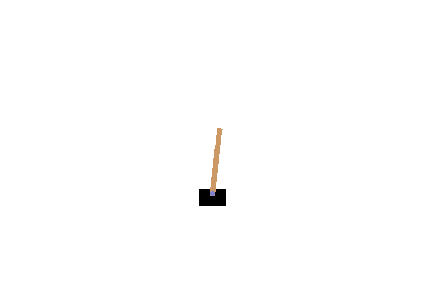
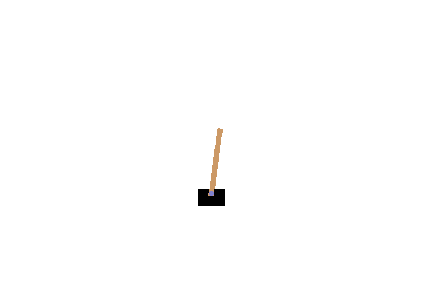
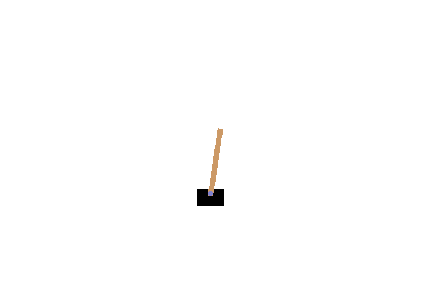
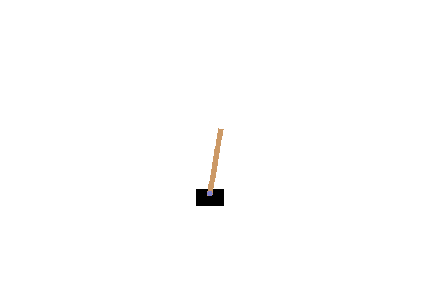
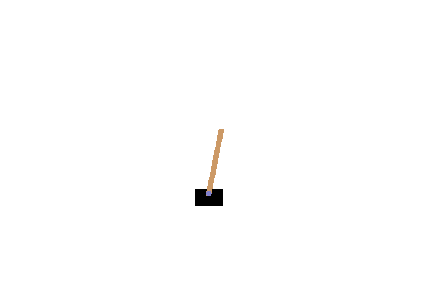
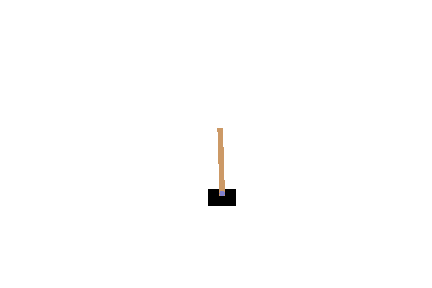
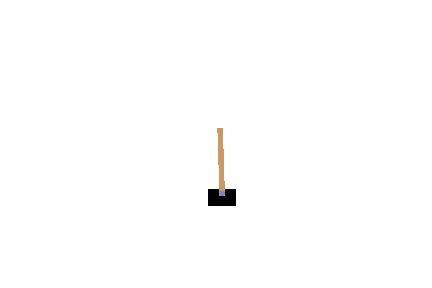
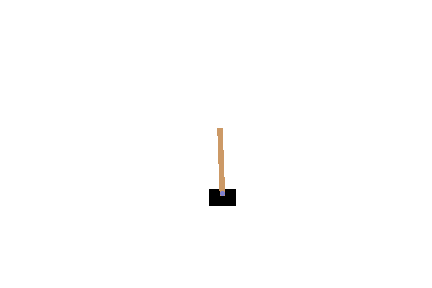
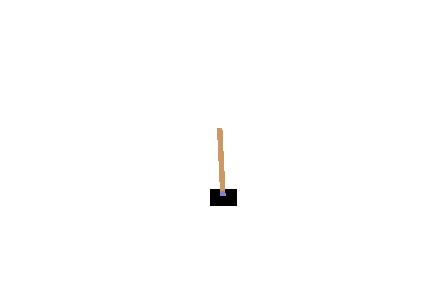
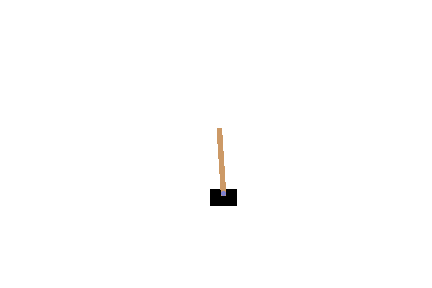
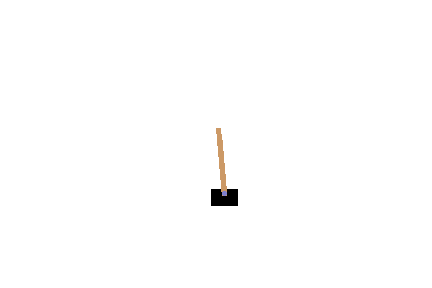
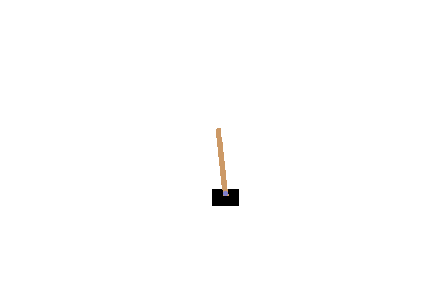
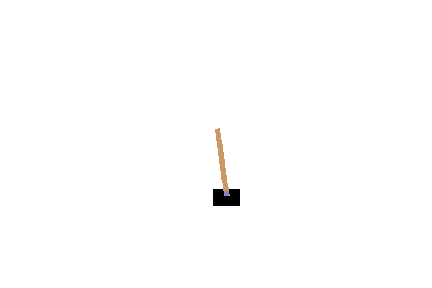
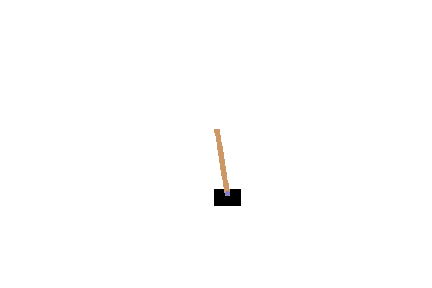
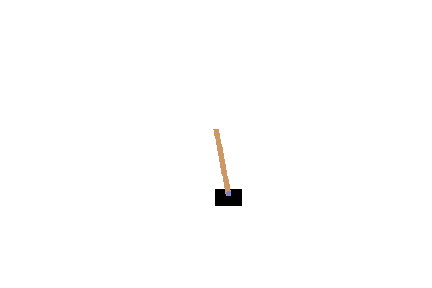
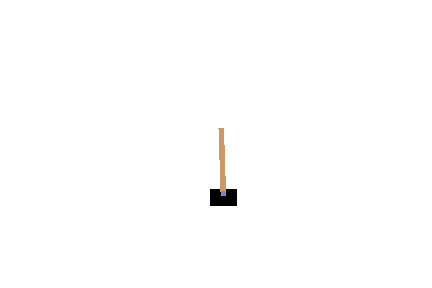
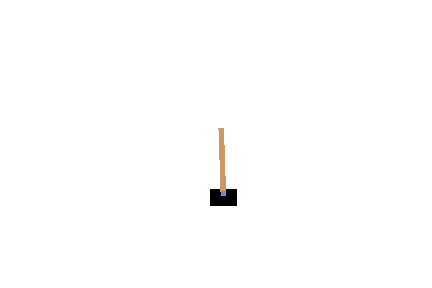
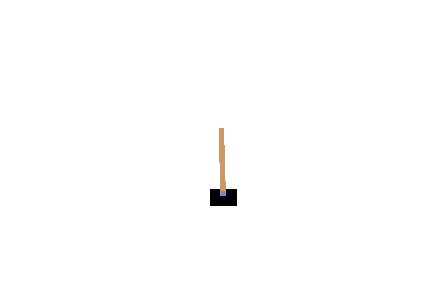
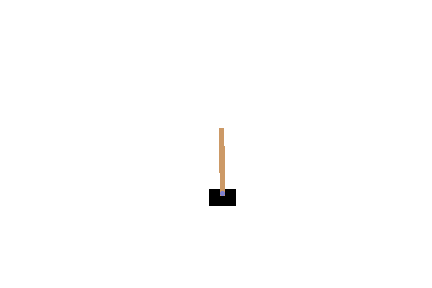
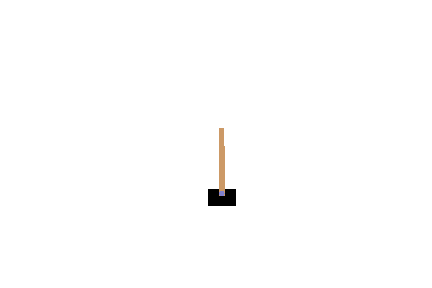
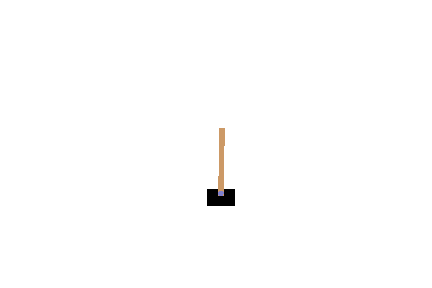
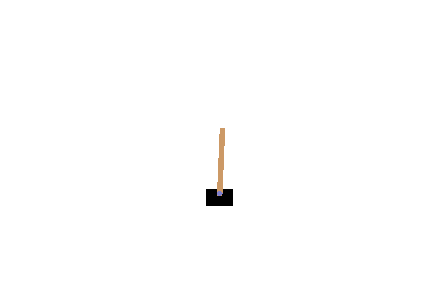
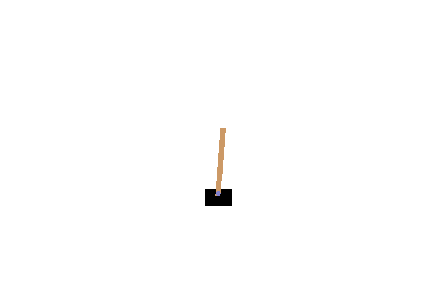
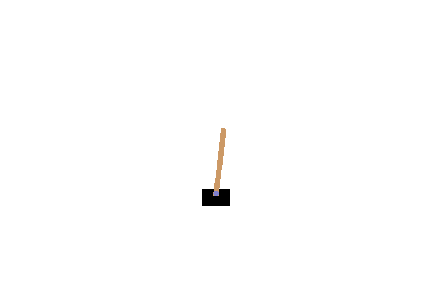
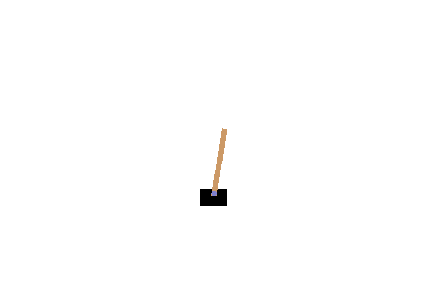
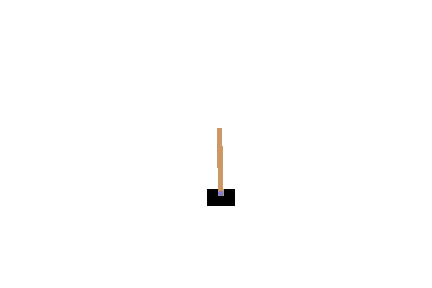
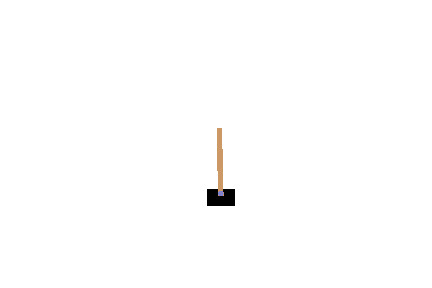
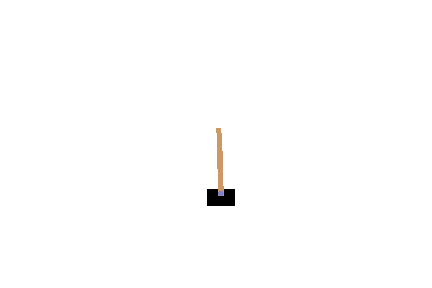
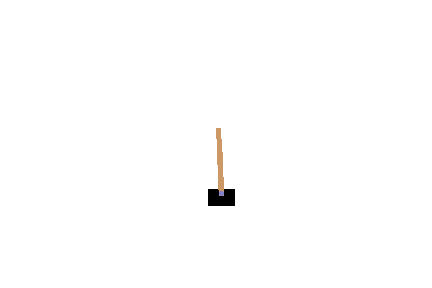
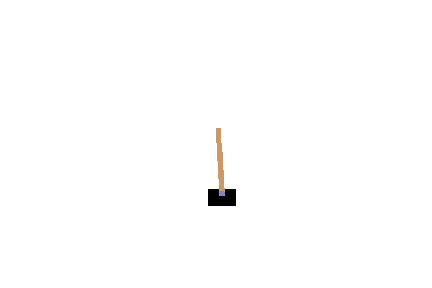
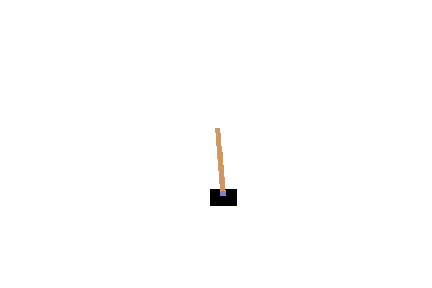
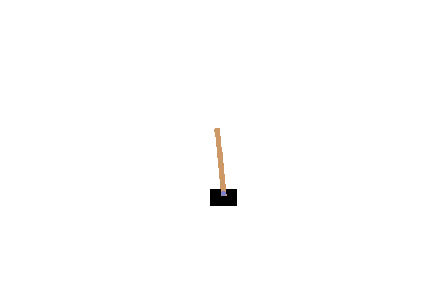
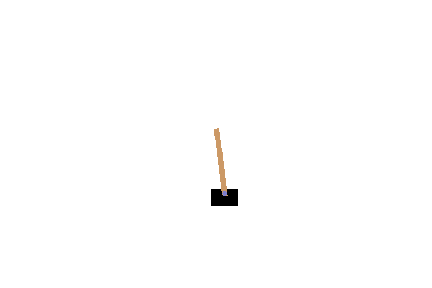
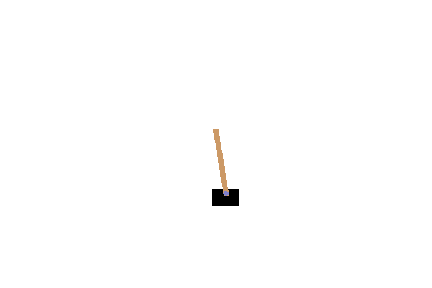
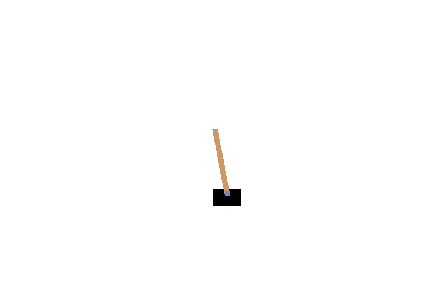
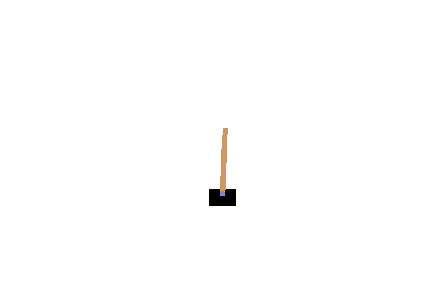
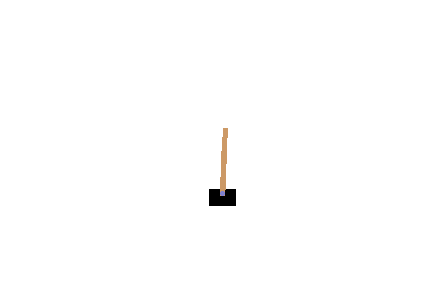
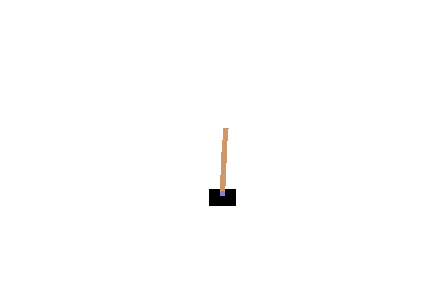
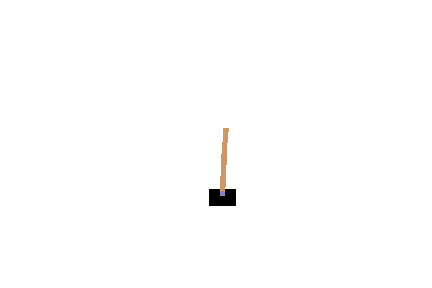
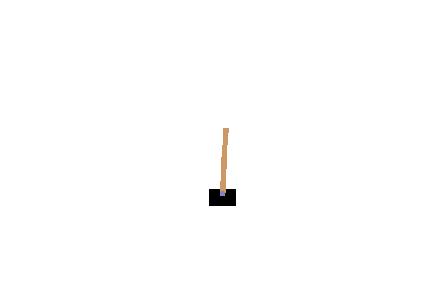
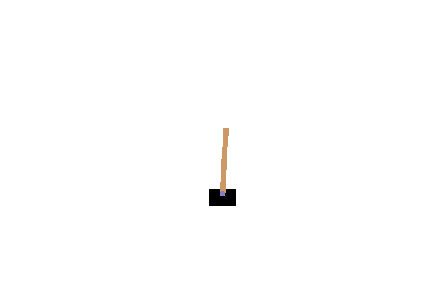
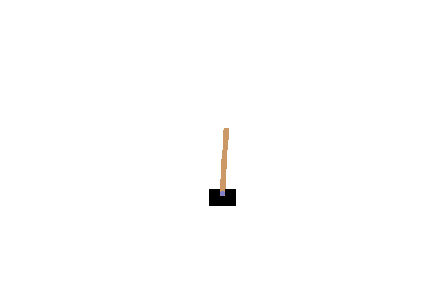
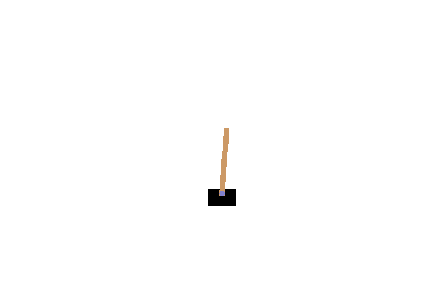
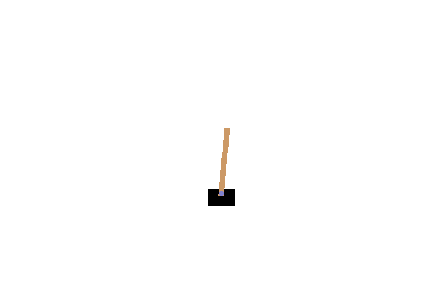
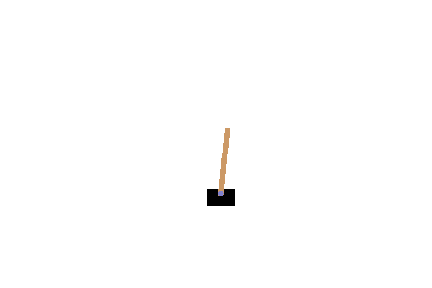
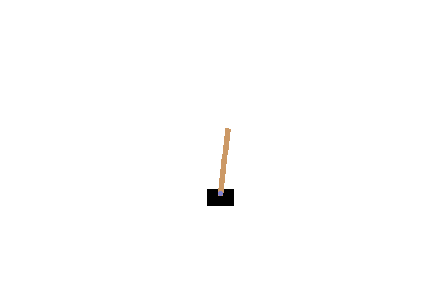
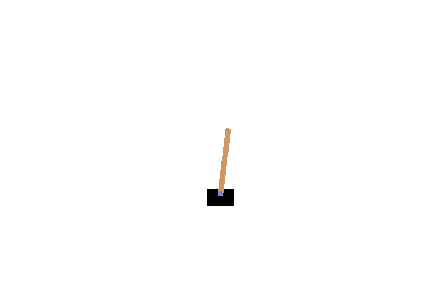
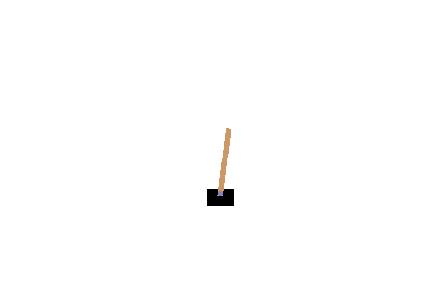
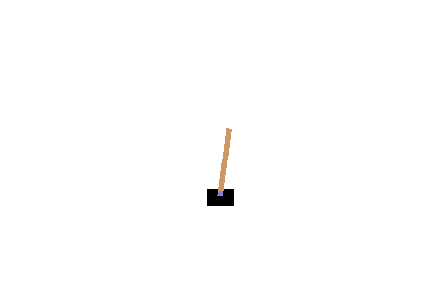
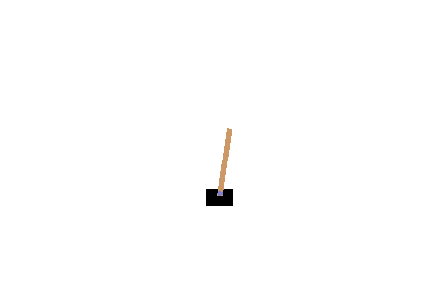
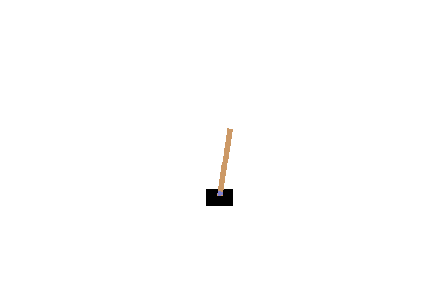
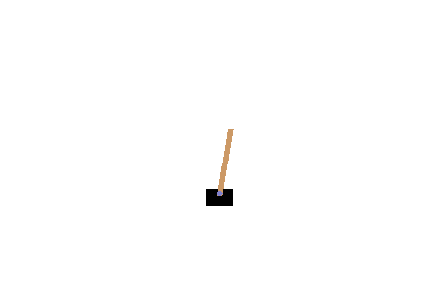
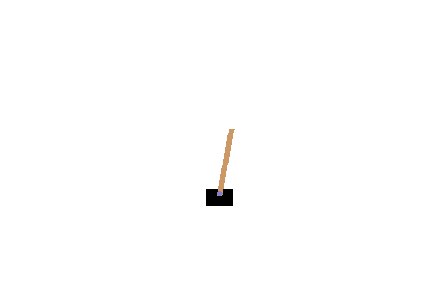
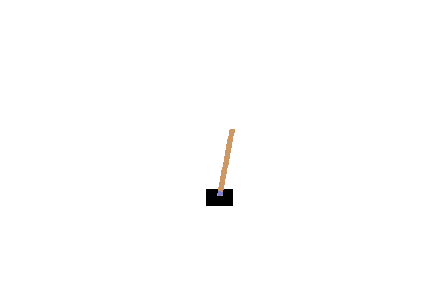
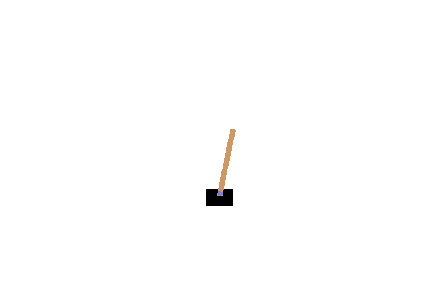
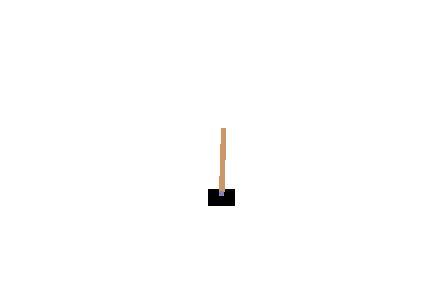
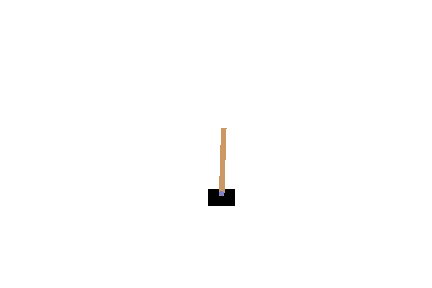
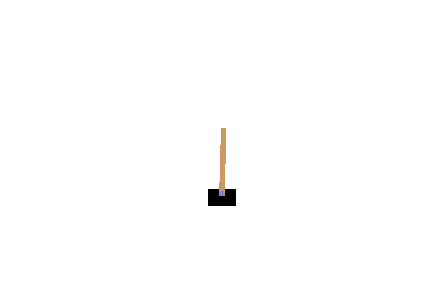
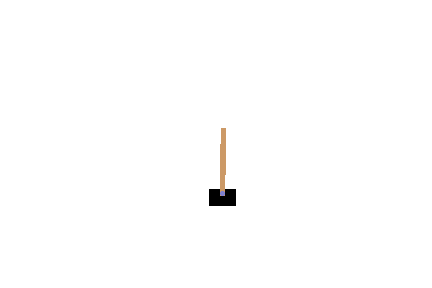
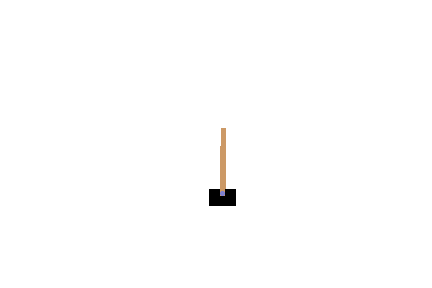
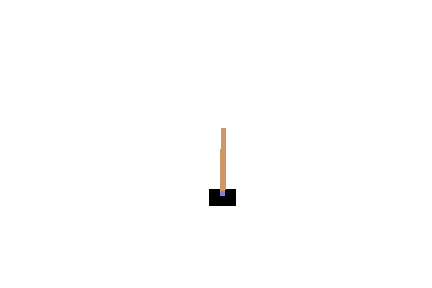
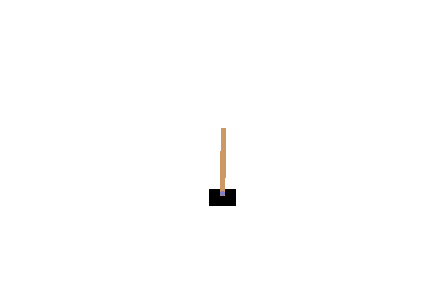
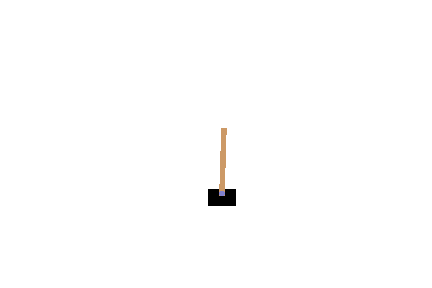
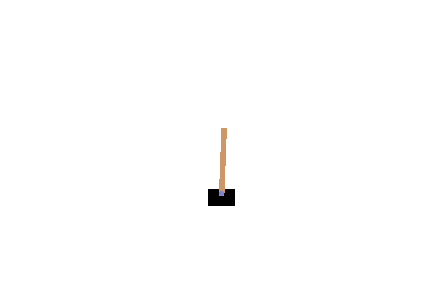
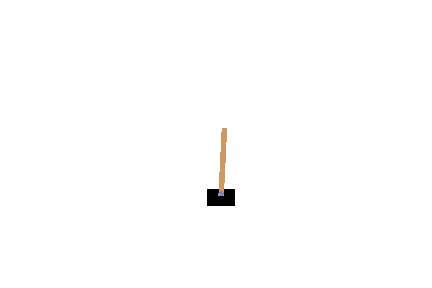
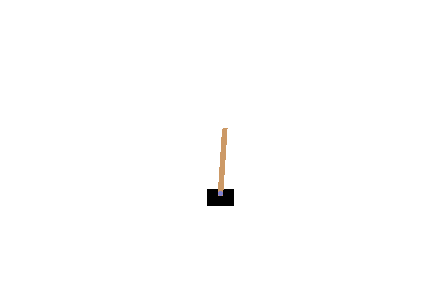
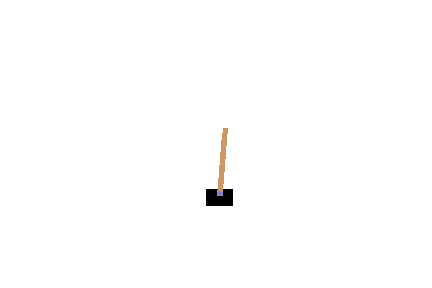
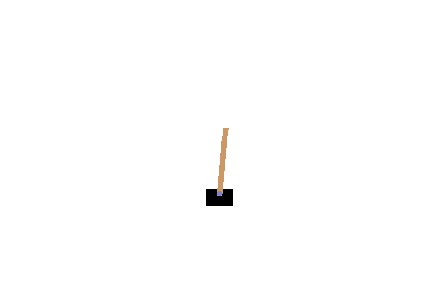
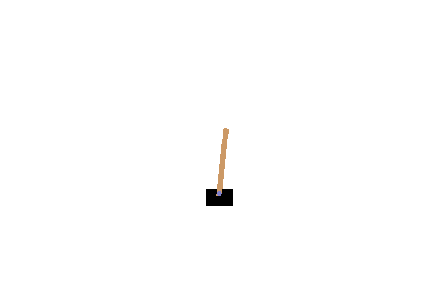
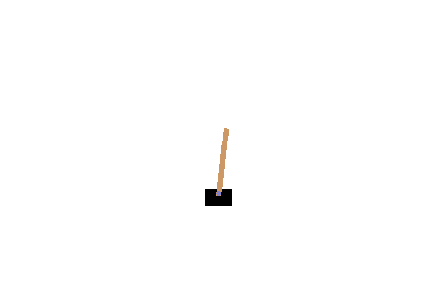
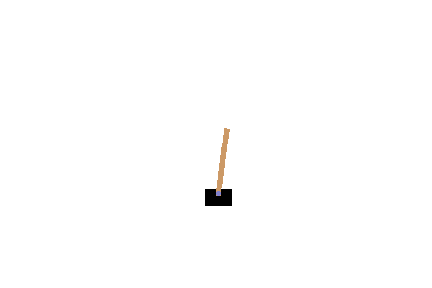
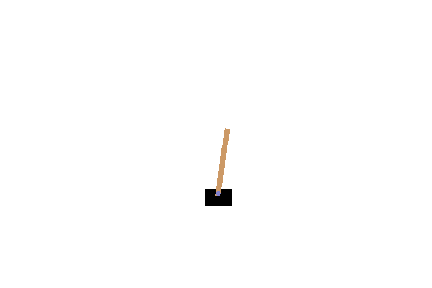
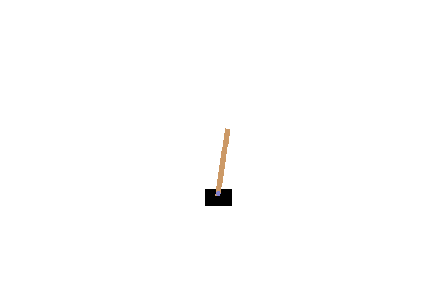
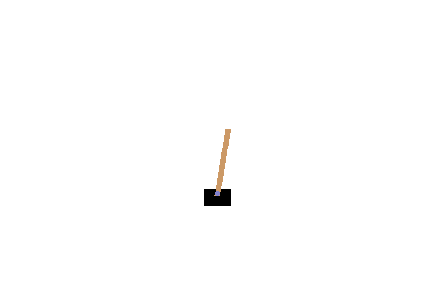
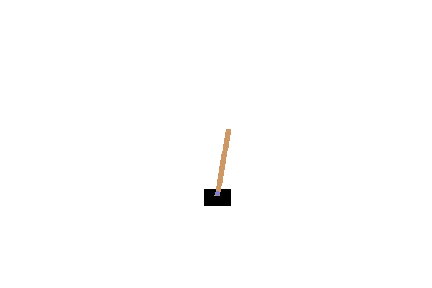
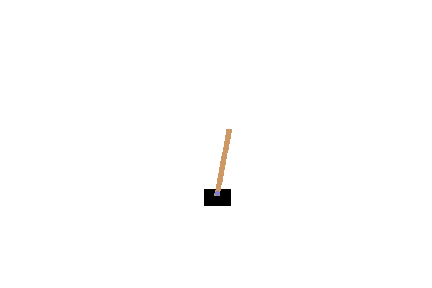
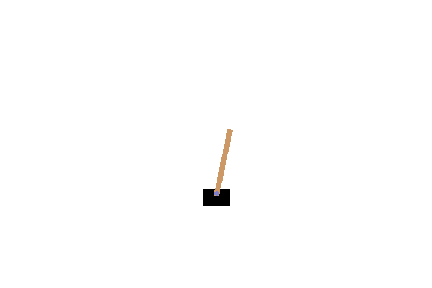
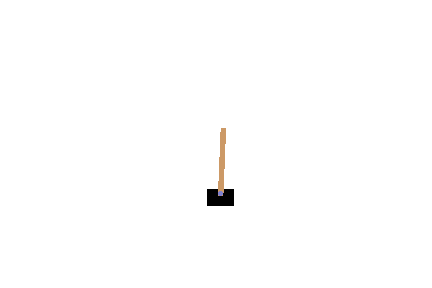
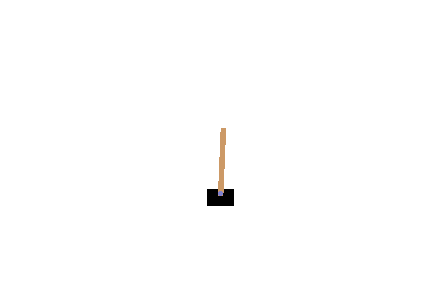
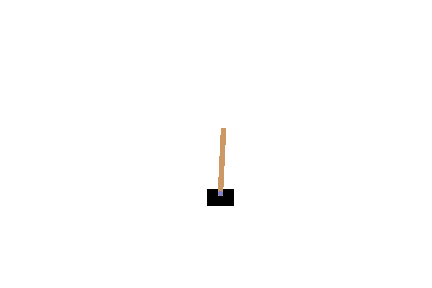
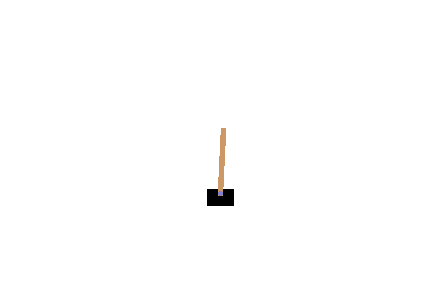
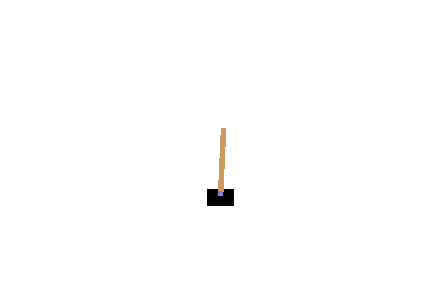
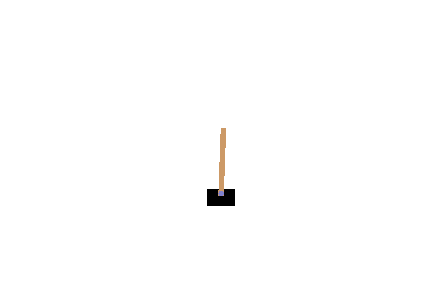
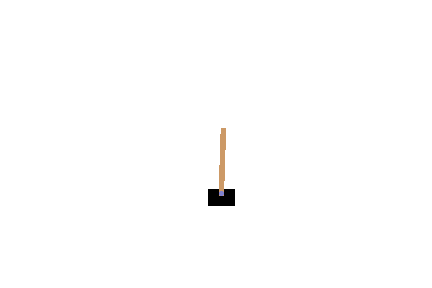
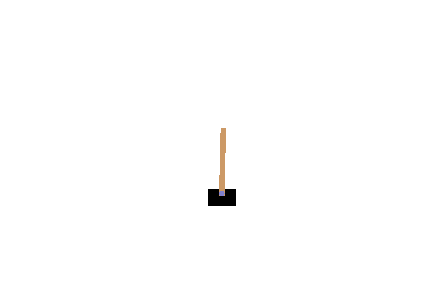
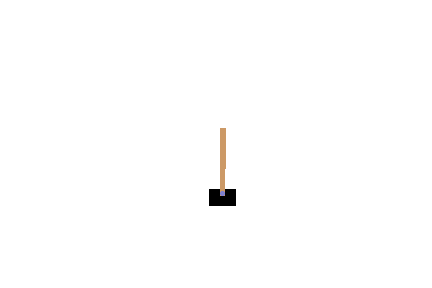
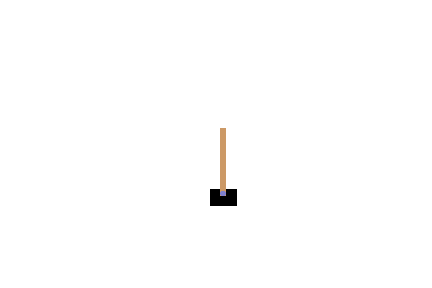
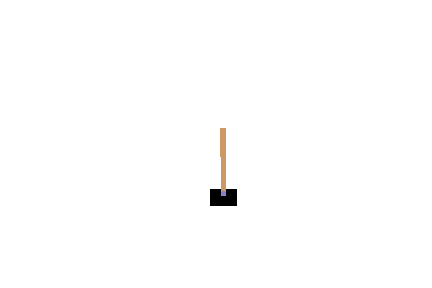
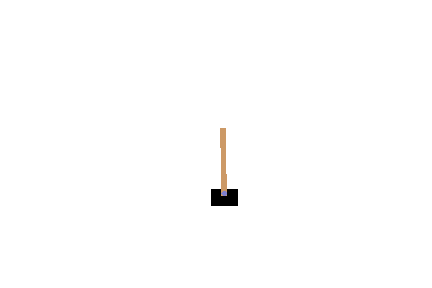
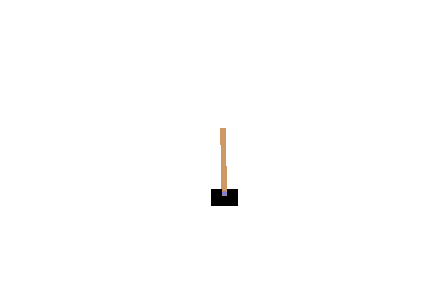
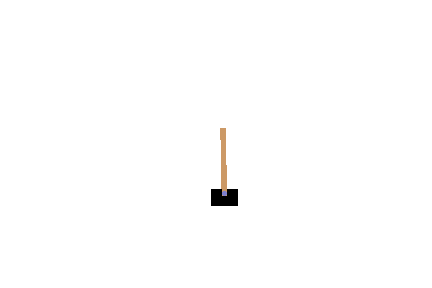
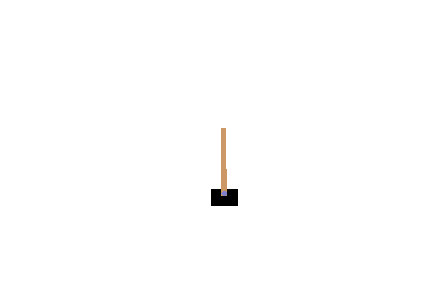
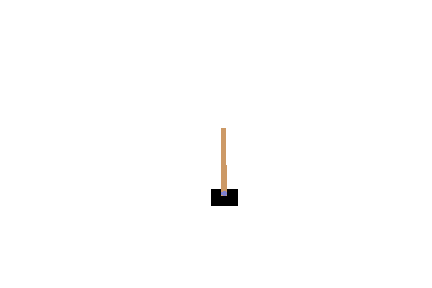
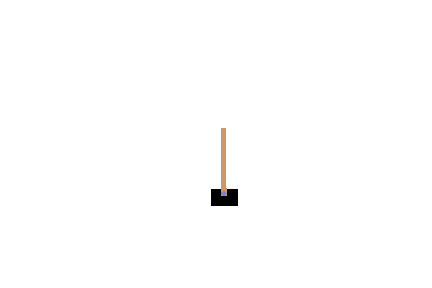
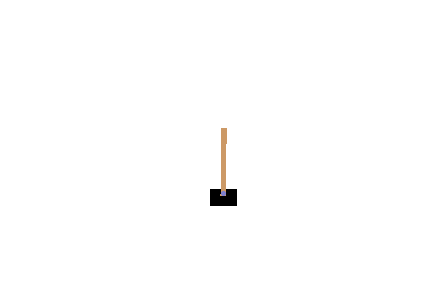
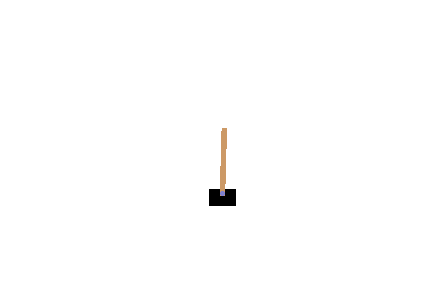
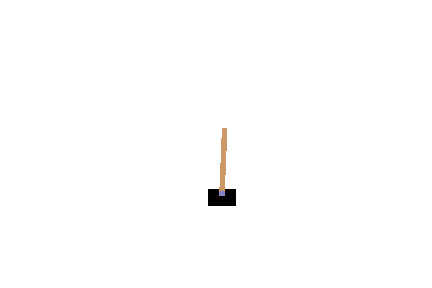
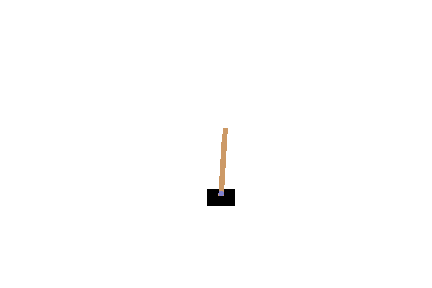
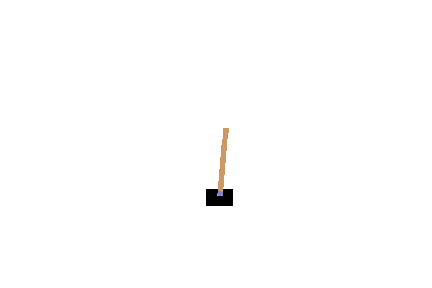
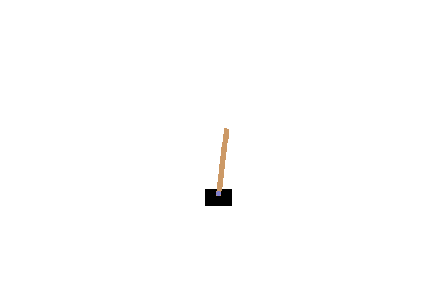
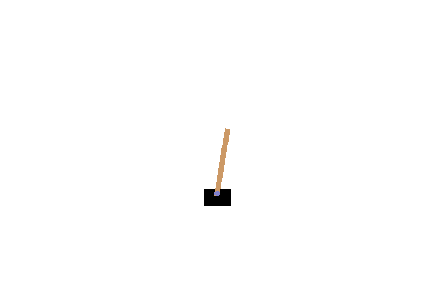
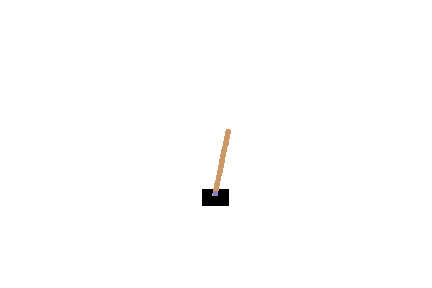
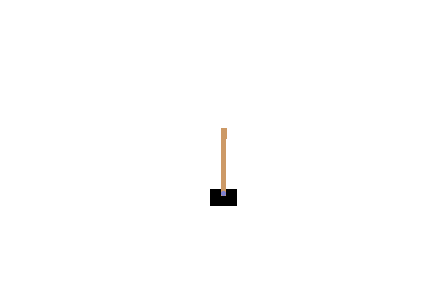
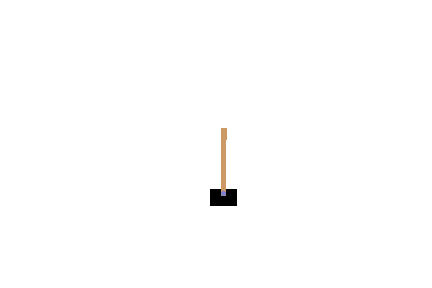
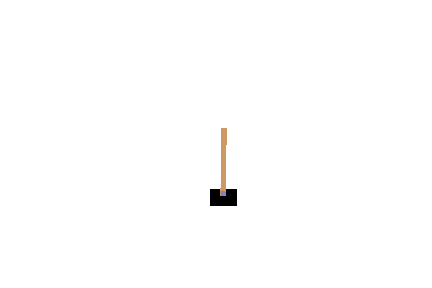
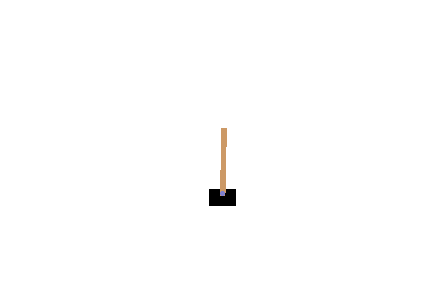
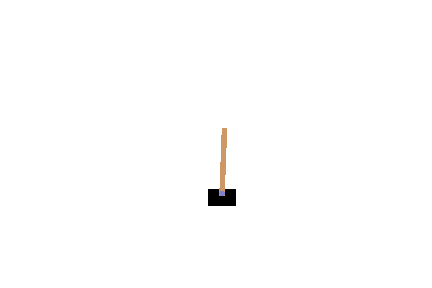
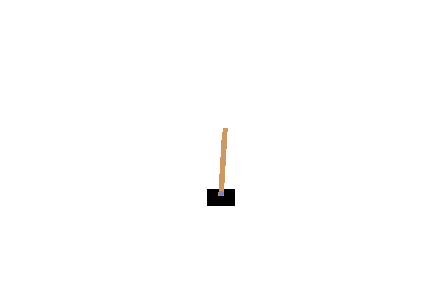
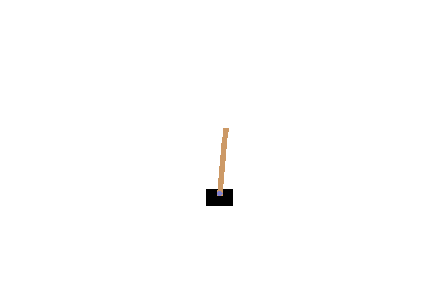
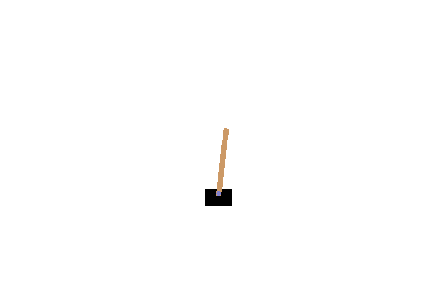
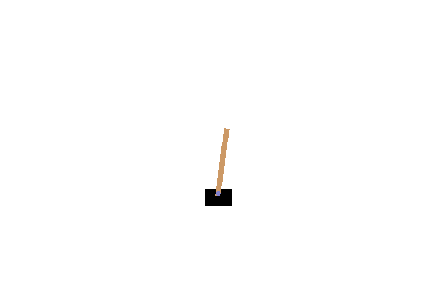
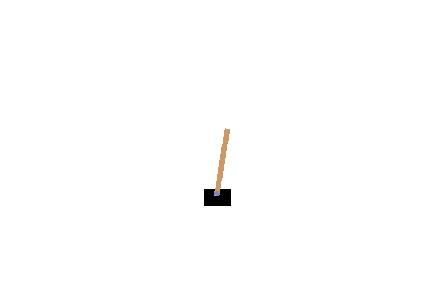
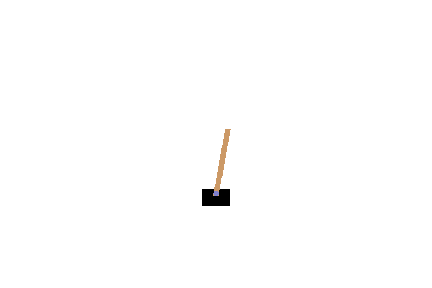
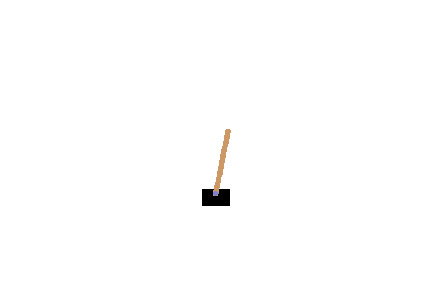
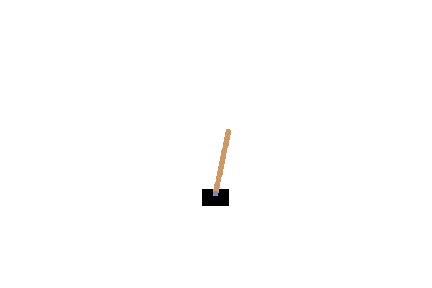
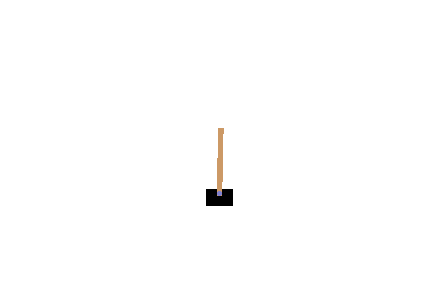
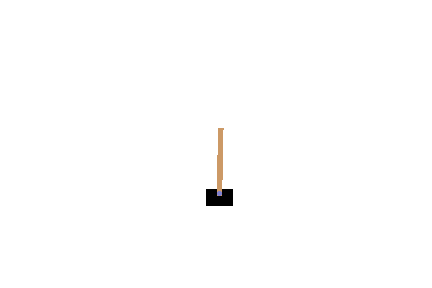
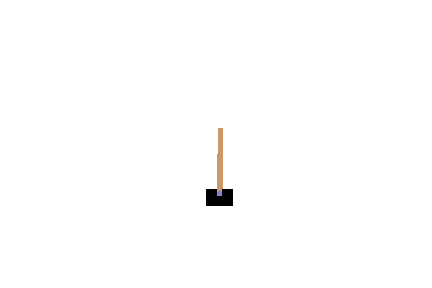
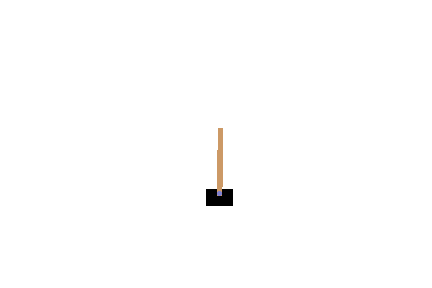
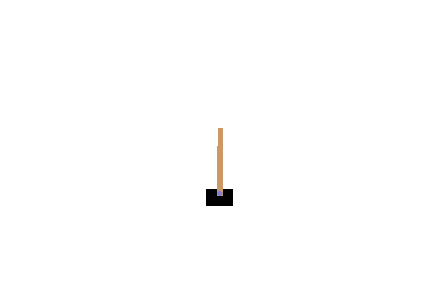
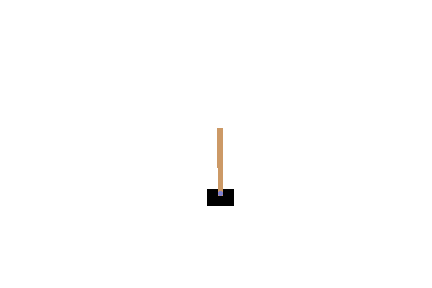
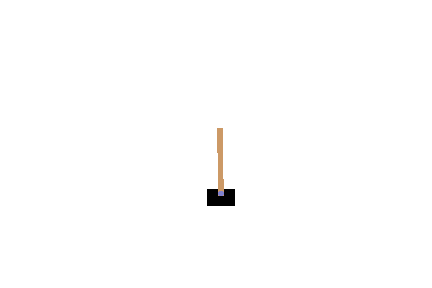
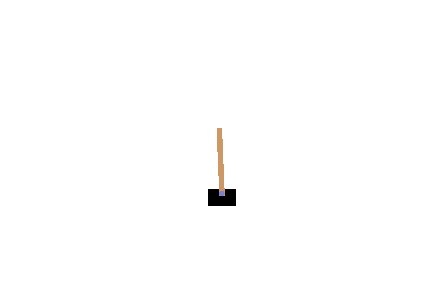
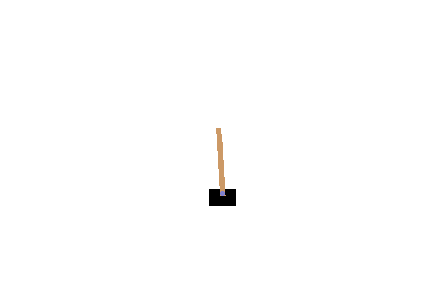
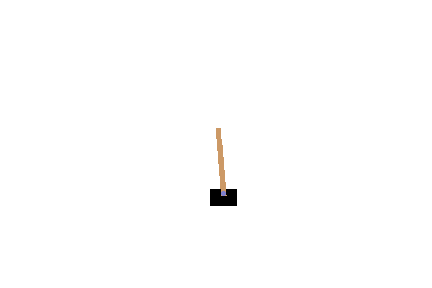
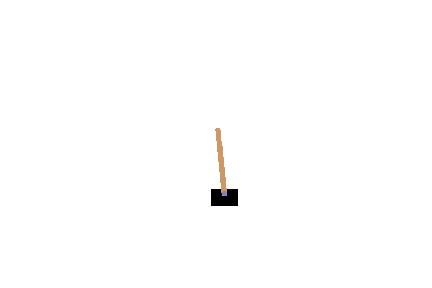
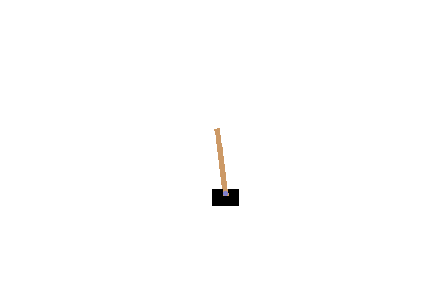
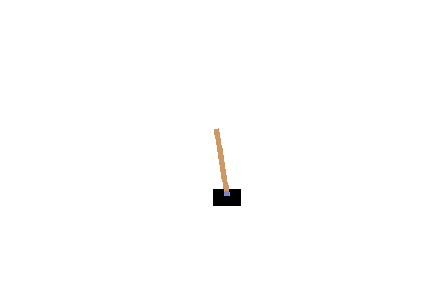
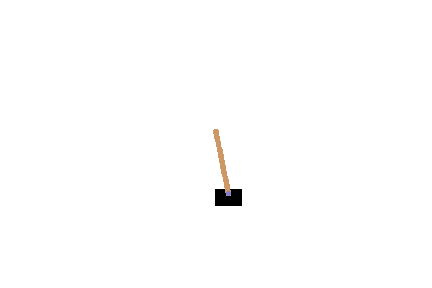
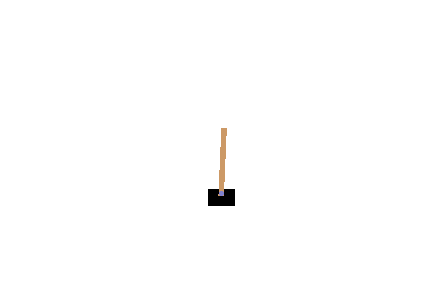
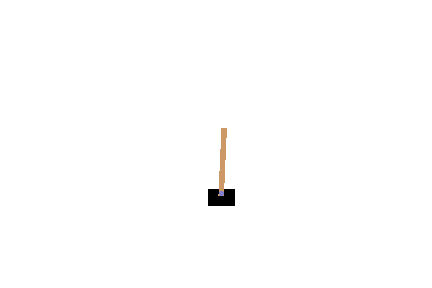
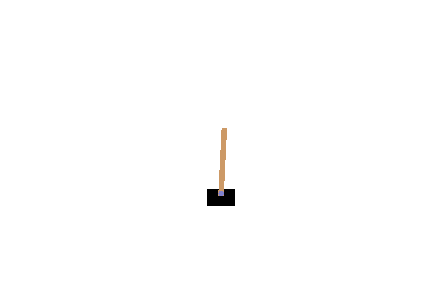
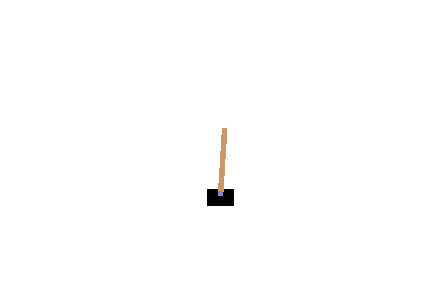
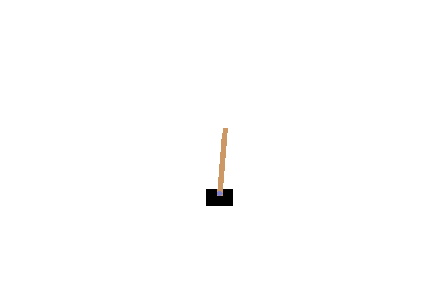
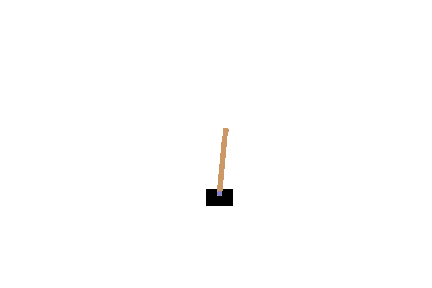
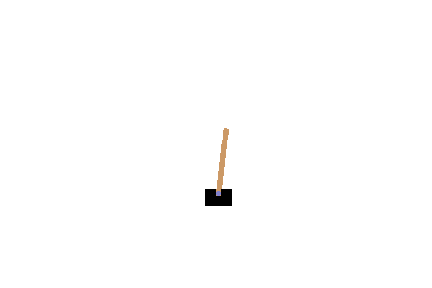
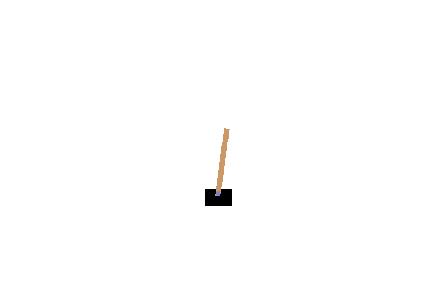
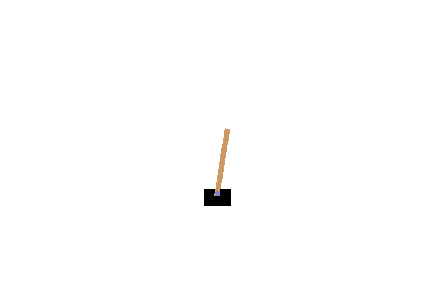
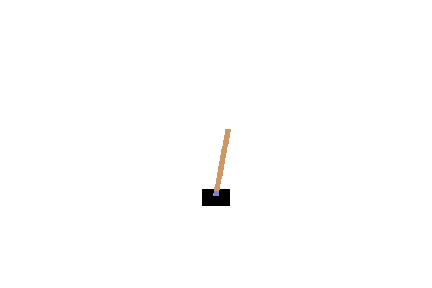

In [11]:
env = gym.make('CartPole-v0')
cum_reward = 0
frames = []
num_episodes=40
for i_episode in range(num_episodes):
    observation = env.reset()
    for t in range(500):
        # Render into buffer. 
        frames.append(env.render(mode = 'rgb_array'))
        action = env.action_space.sample() # random action
        observation, reward, done, info = env.step(action)
        if done:
            print("\rEpisode {}/{} finished after {} timesteps".format(i_episode, num_episodes, t+1), end="")
            break
display_frames_as_gif(frames)

# Hill Climbing Algorithm

In [21]:
# Here we define the training as injecting noise into a new set of parameters 

def run_episode(env, parameters):                                                                    
    observation = env.reset()                                                                        
    total_reward = 0                                                                                 
                                                                                                        
    for _ in xrange(200):                                                                            
        action = 0 if np.matmul(parameters, observation) < 0 else 1                                  
        observation , reward, done, info = env.step(action)                                          
        total_reward += reward                                                                       
        if done:                                                                                     
            break                                                                                    
    return total_reward 
    

In [47]:
def train(num_episodes=10000):
    env = gym.make("CartPole-v0")
    
    counter = 0
    best_params = np.random.rand(4)*2 - 1
    best_reward = 0
    
    for _ in xrange(num_episodes):
        counter += 1

        parameters = best_params + (np.random.rand(4)*2 - 1)
        reward = run_episode(env, parameters)

        if reward > best_reward:
            best_reward = reward
            best_params = parameters
            
            print(best_reward)
#             if reward == 200:
#                 break
    return counter

In [48]:
train()


57.0
88.0
113.0
200.0


10000

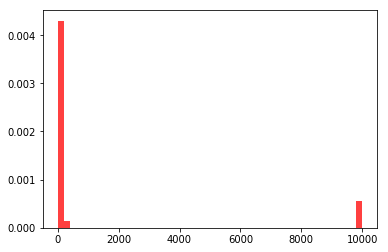

In [26]:
results = []

for _ in xrange(100):
    results.append(train())

plt.hist(results, 50 , normed=1, facecolor='r', alpha=0.75)
plt.show()    

In [49]:
def run_episode_sim(env, parameters, frames):                                                                    
    observation = env.reset()                                                                        
    total_reward = 0                                                                                 
                                                                                                        
    for _ in xrange(200): 
        frames.append(env.render(mode = 'rgb_array'))
        action = 0 if np.matmul(parameters, observation) < 0 else 1                                  
        observation , reward, done, info = env.step(action)                                          
        total_reward += reward                                                                       
        if done:                                                                                     
            break                                                                                    
    return total_reward, frames

In [50]:
def train_sim(num_episodes=10000, frames=[]):
    env = gym.make("CartPole-v0")
    
    counter = 0
    best_params = np.random.rand(4)*2 - 1
    best_reward = 0
    
    for _ in xrange(num_episodes):
        counter += 1
        
        parameters = best_params + (np.random.rand(4)*2 - 1)
        reward, frames = run_episode_sim(env, parameters, frames)
        
        if reward > best_reward:
            best_reward = reward
            best_params = parameters
            
            if reward == 200:
                break
    return counter, frames


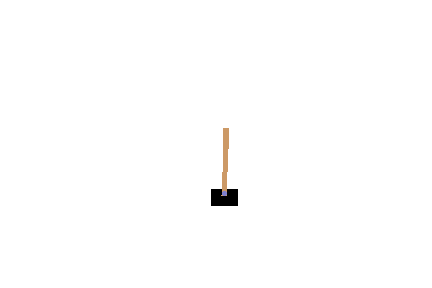
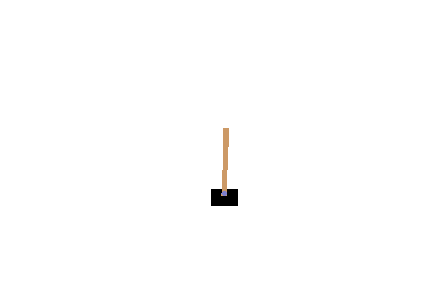
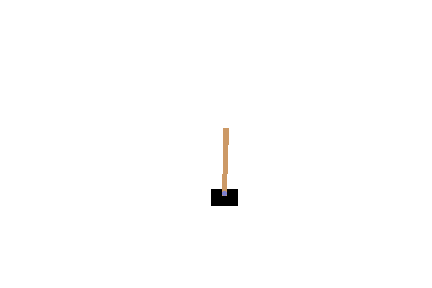
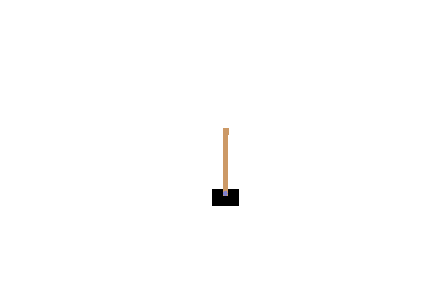
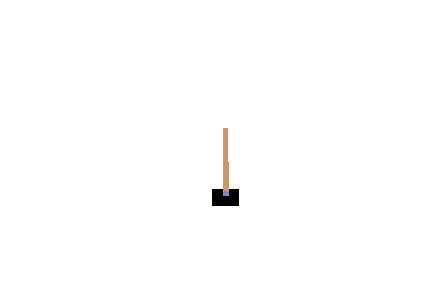
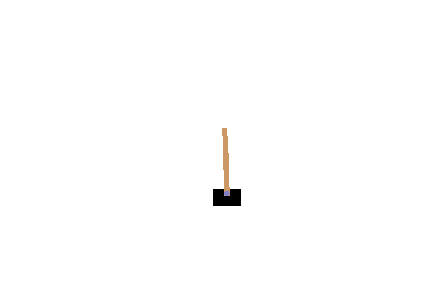
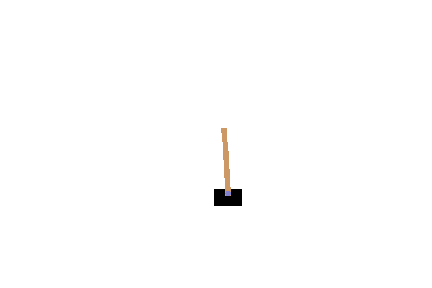
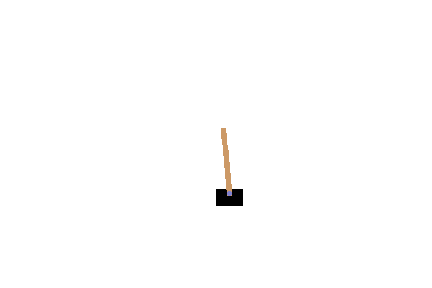
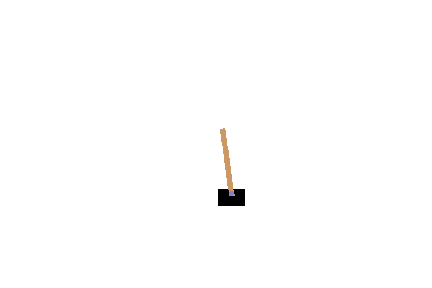
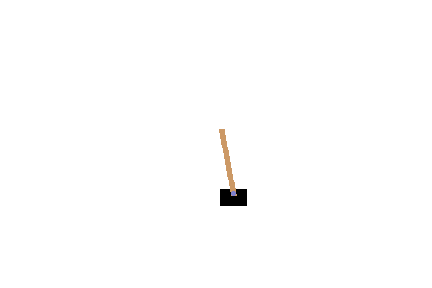
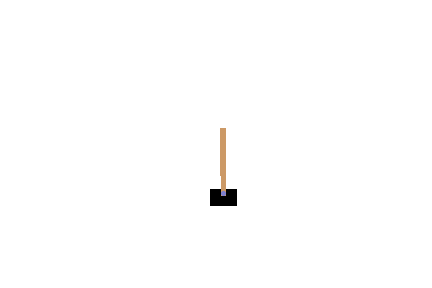
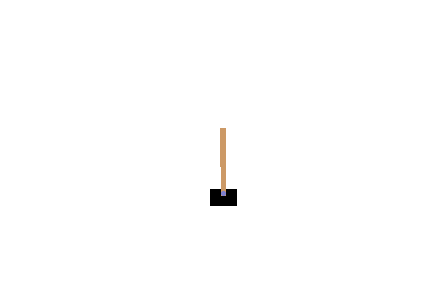
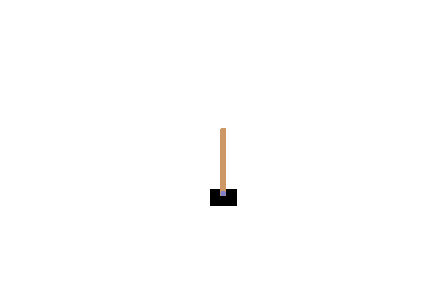
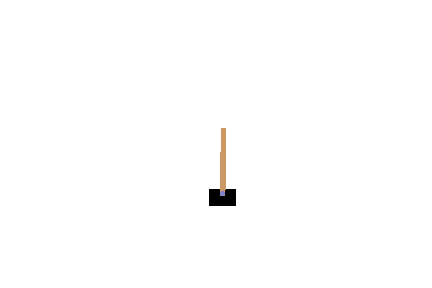
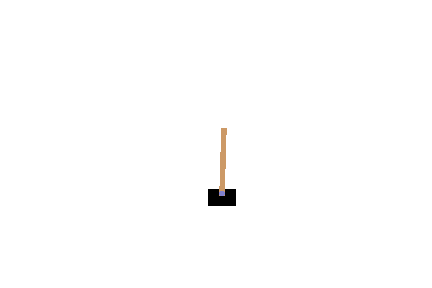
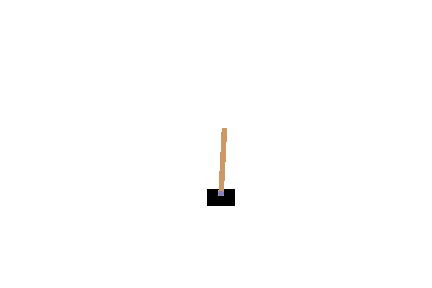
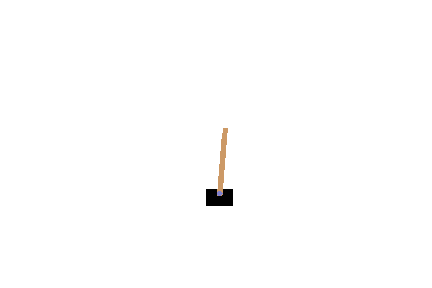
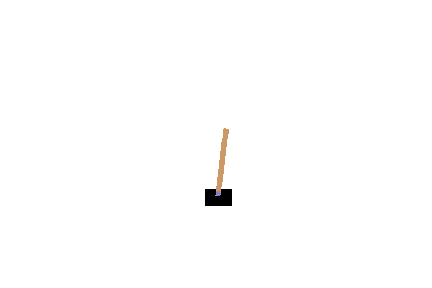
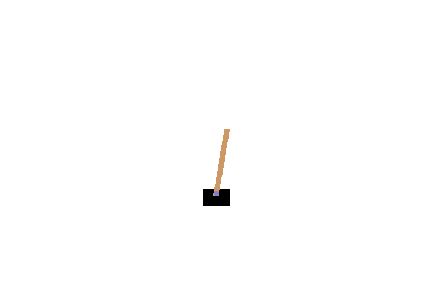
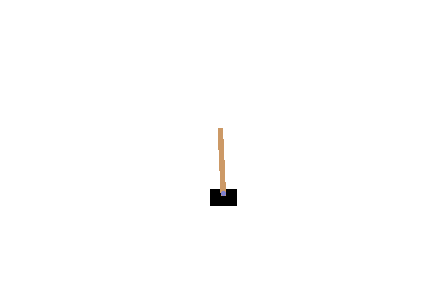
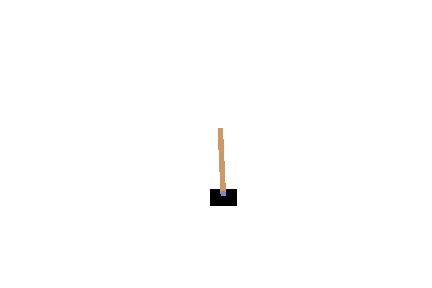
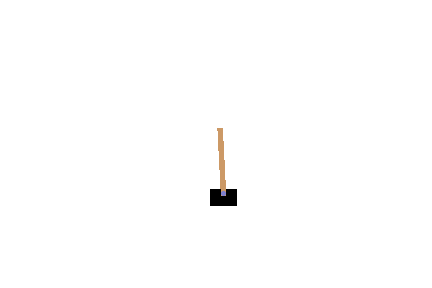
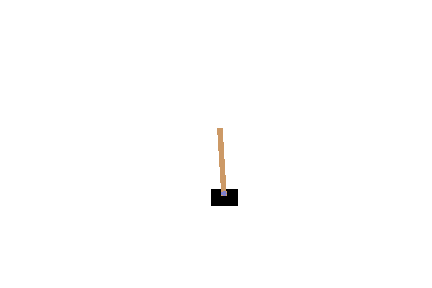
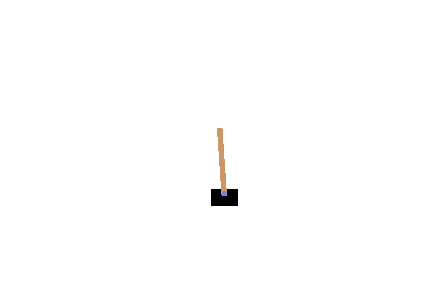
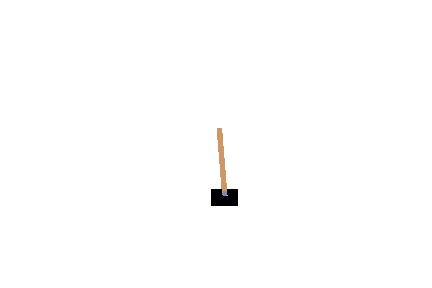
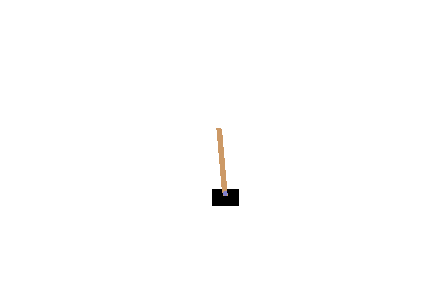
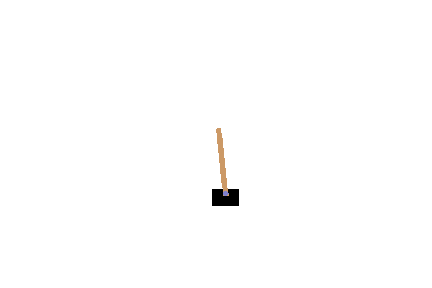
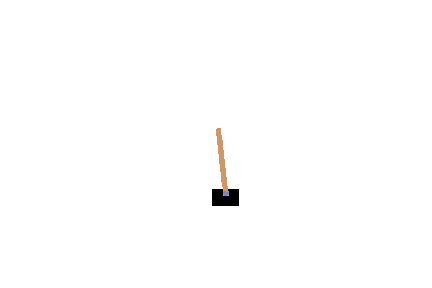
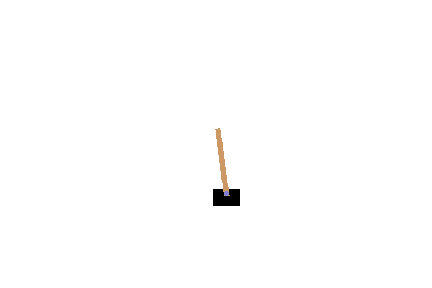
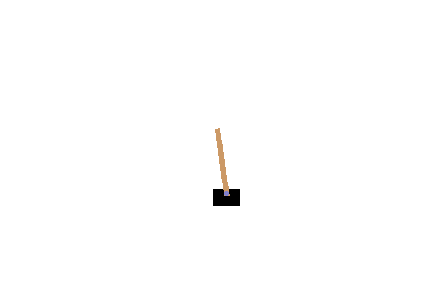
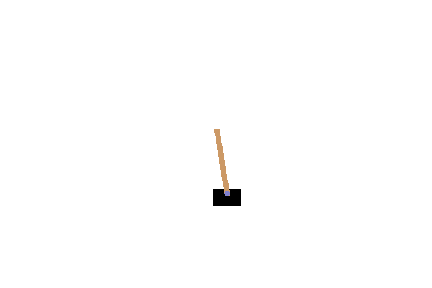
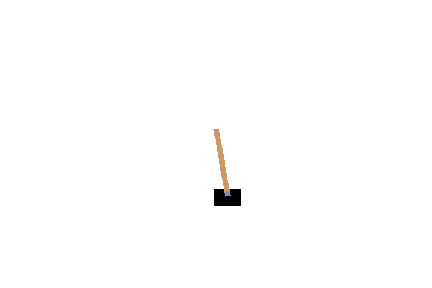
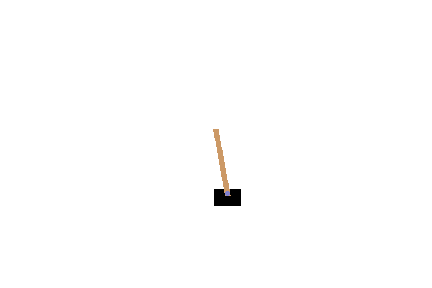
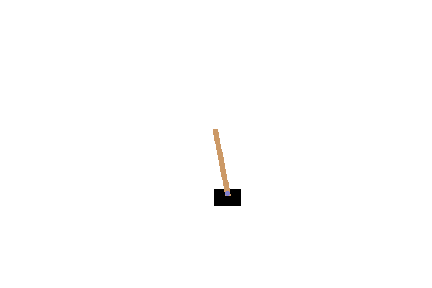
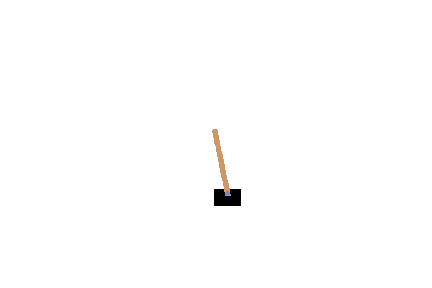
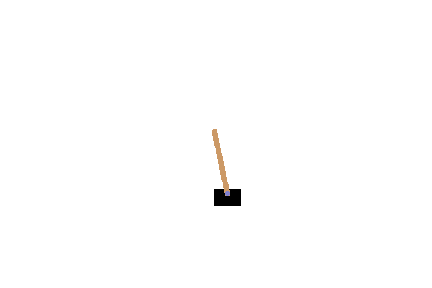
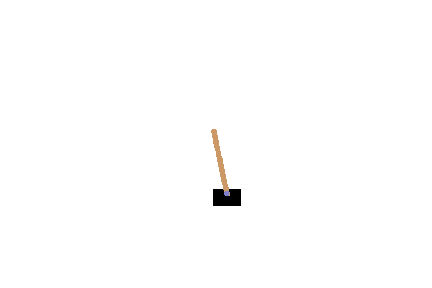
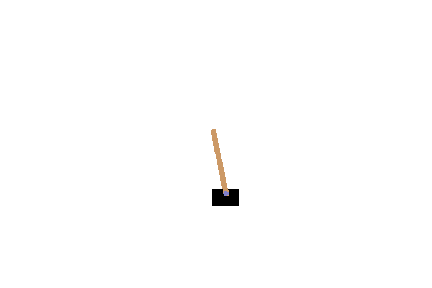
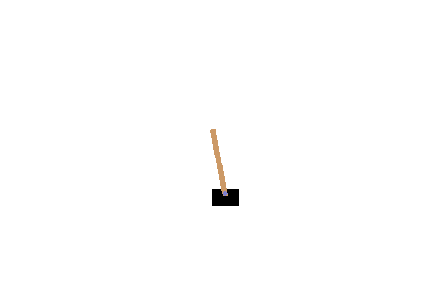
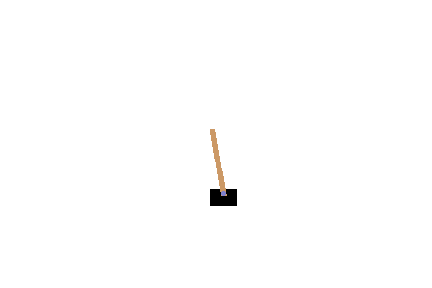
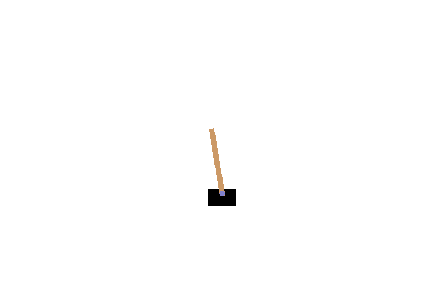
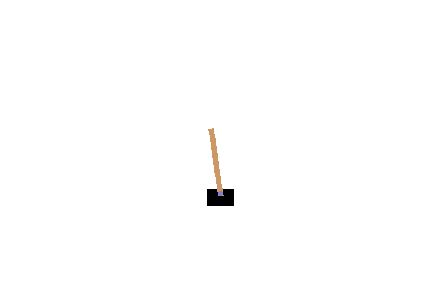
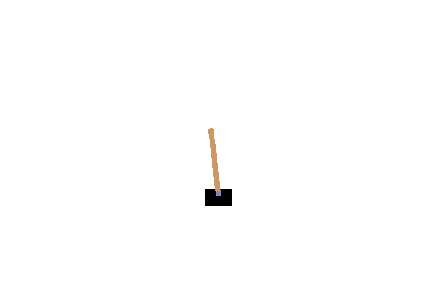
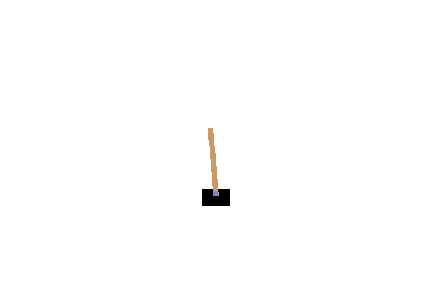
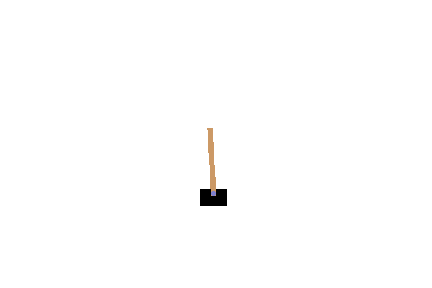
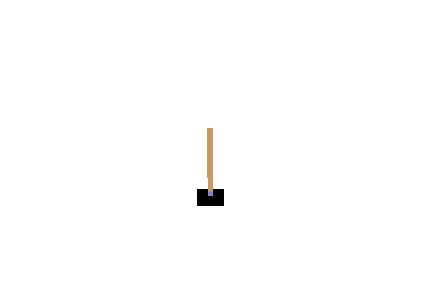
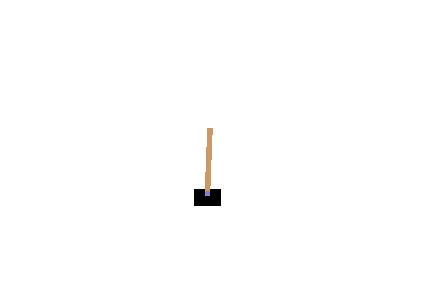
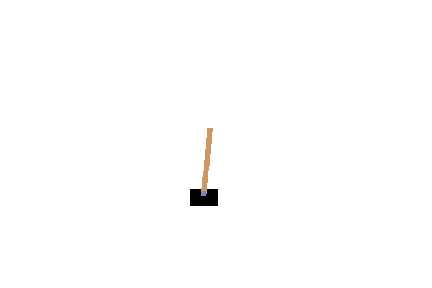
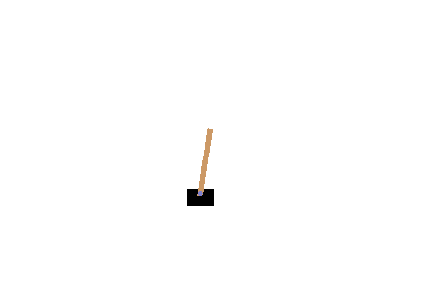
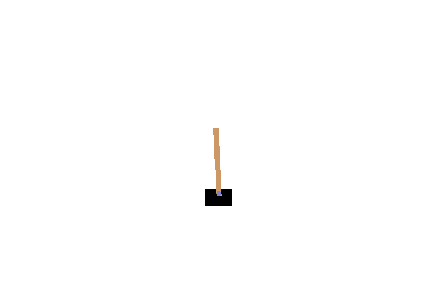
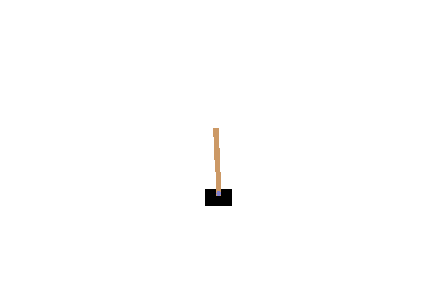
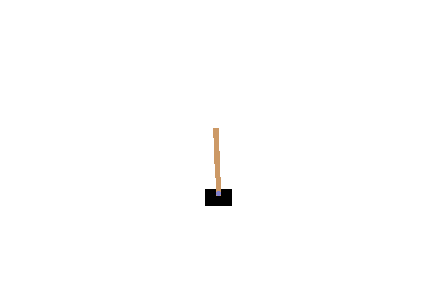
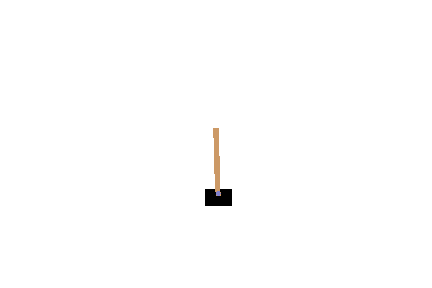
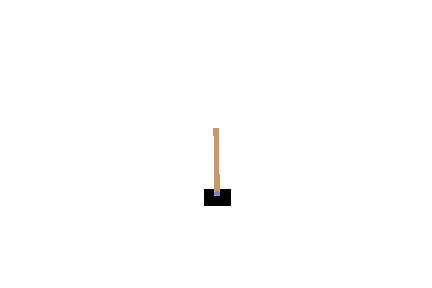
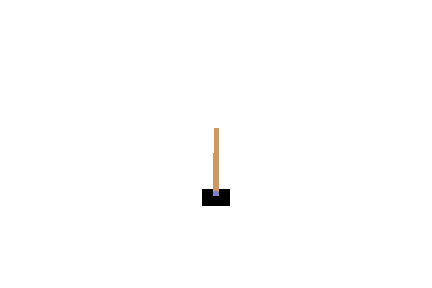
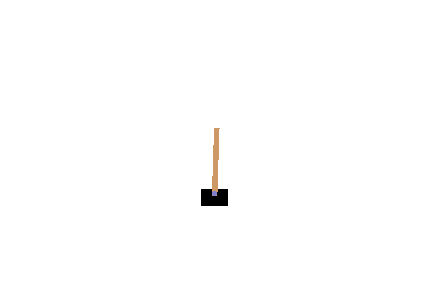
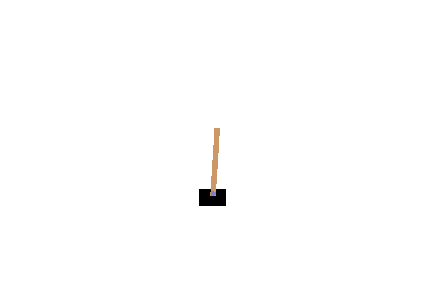
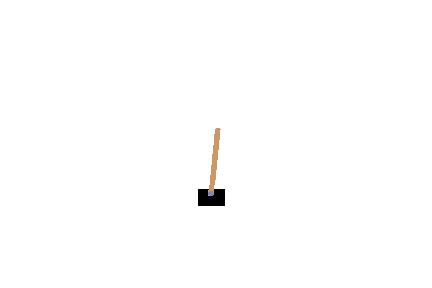
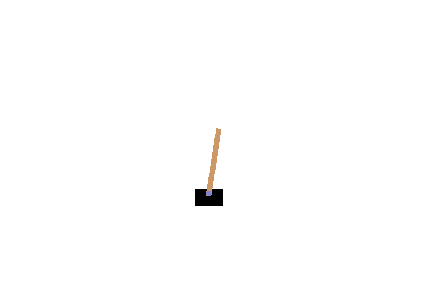
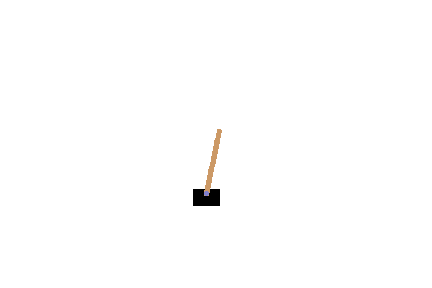
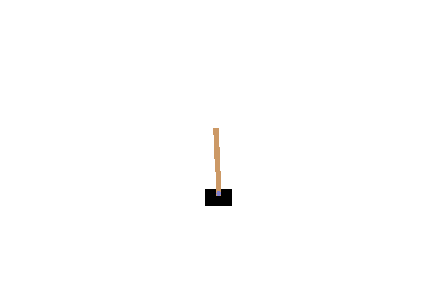
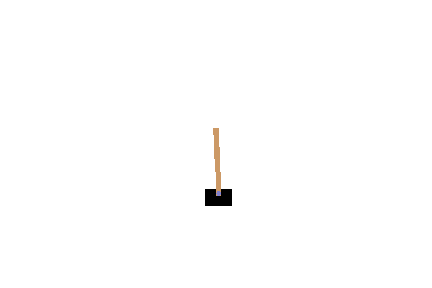
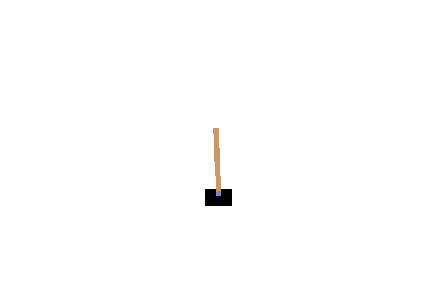
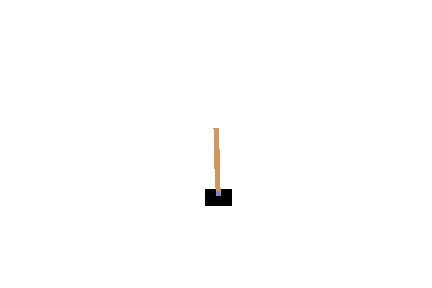
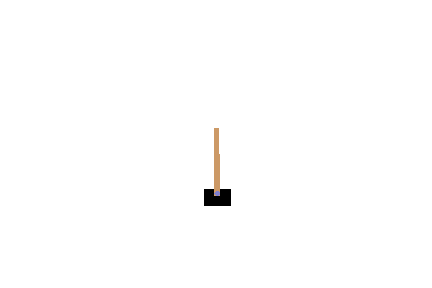
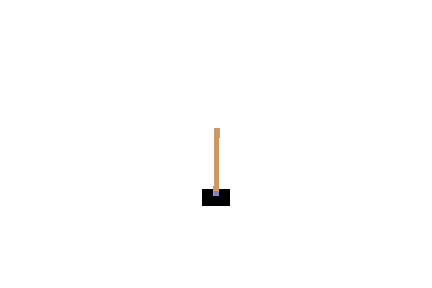
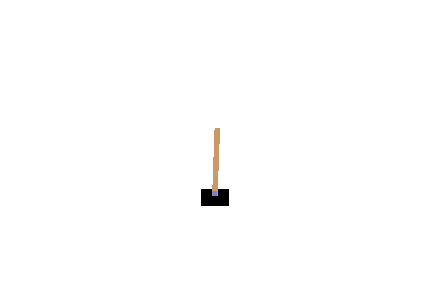
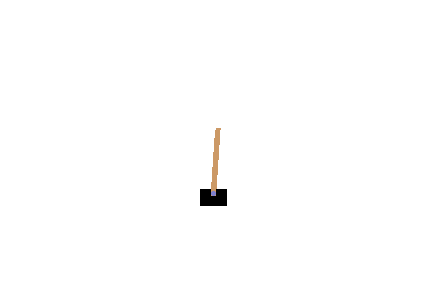
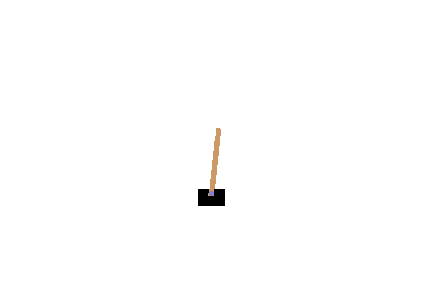
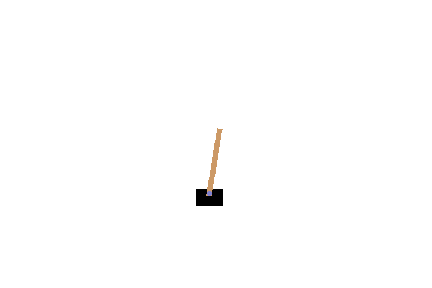
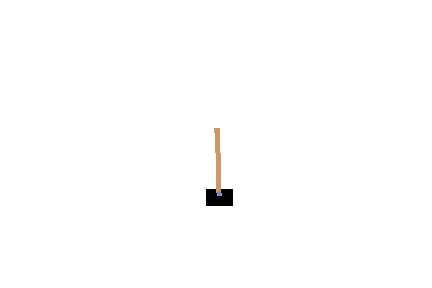
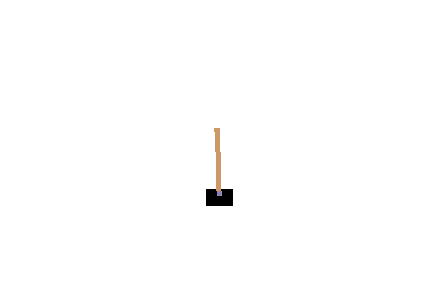
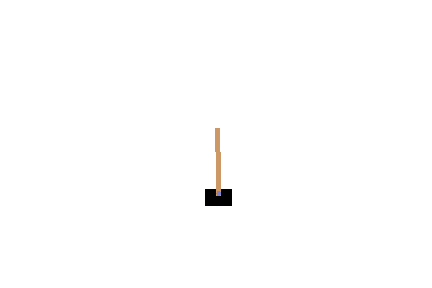
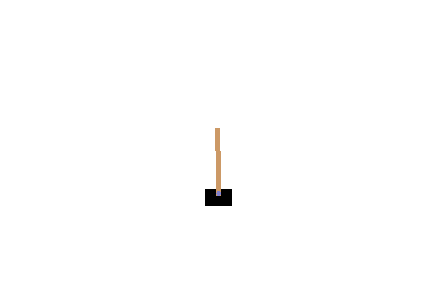
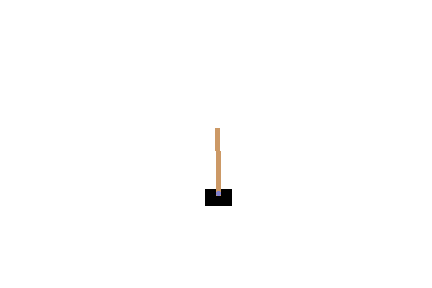
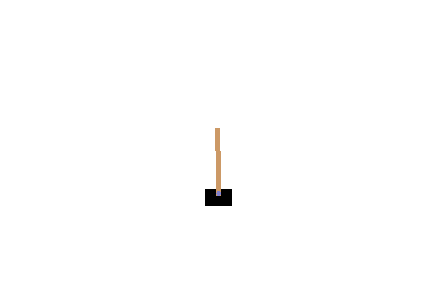
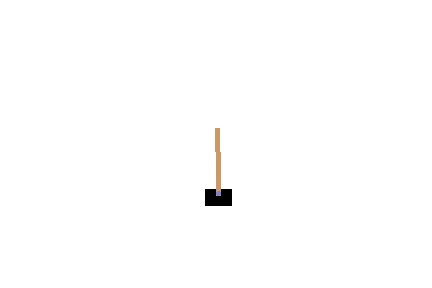
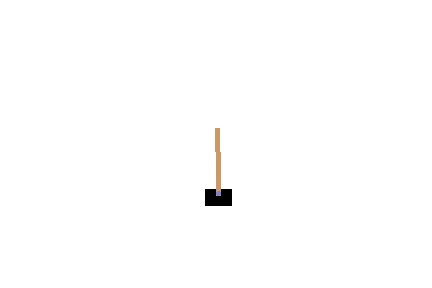
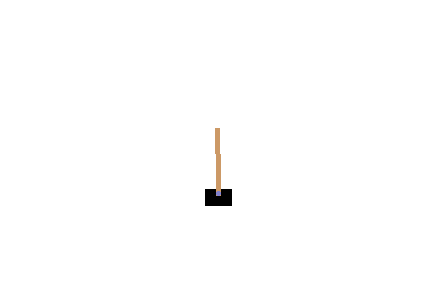
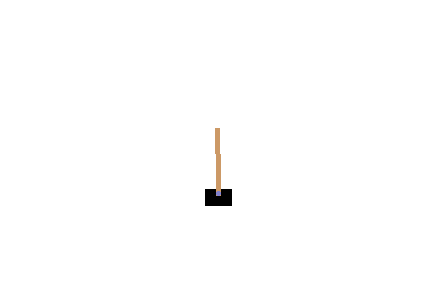
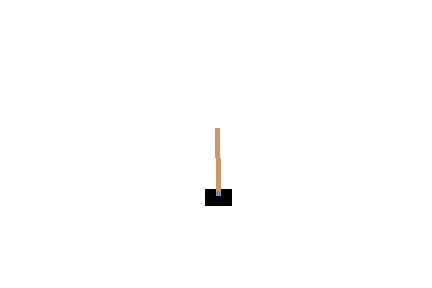
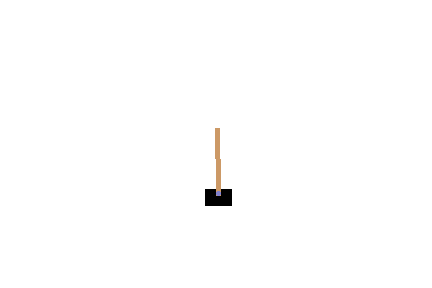
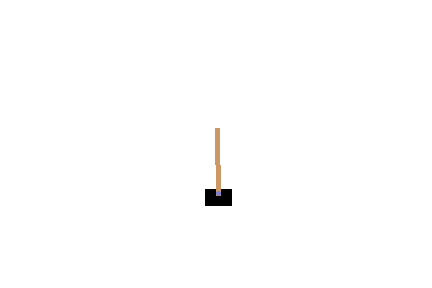
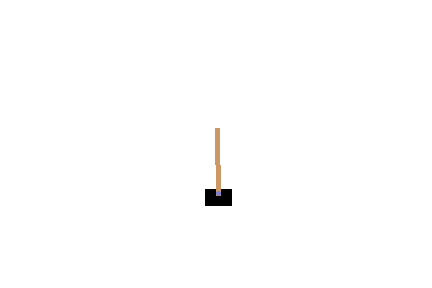
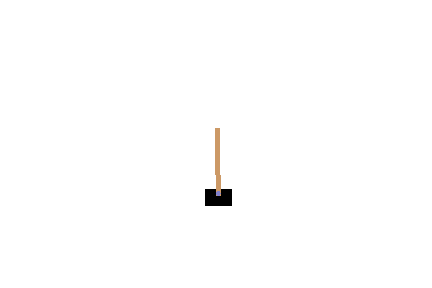
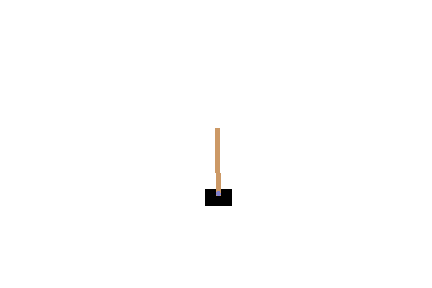
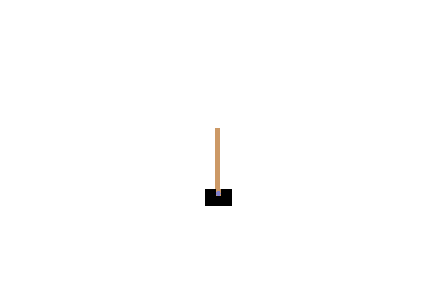
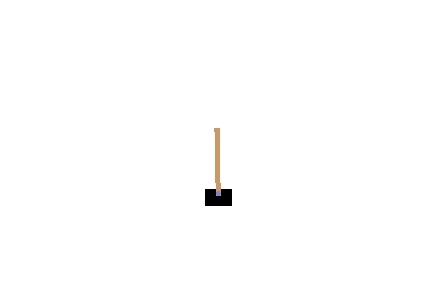
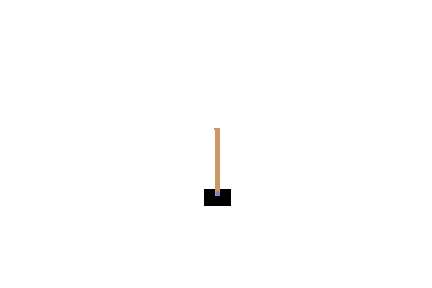
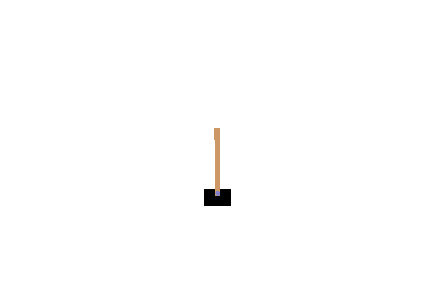
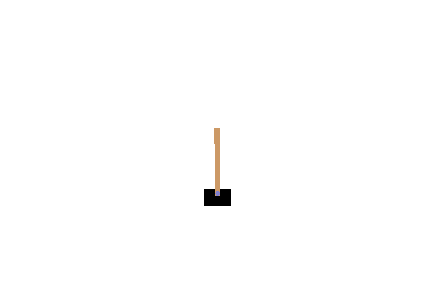
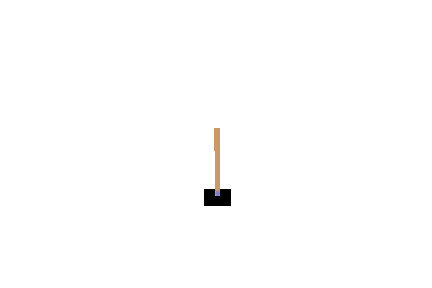
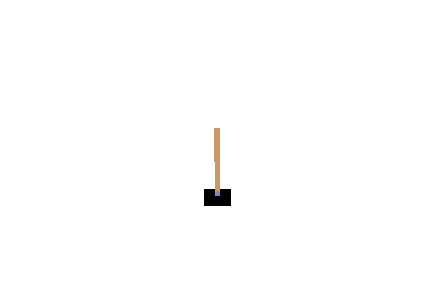
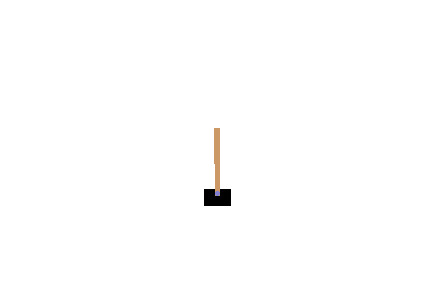
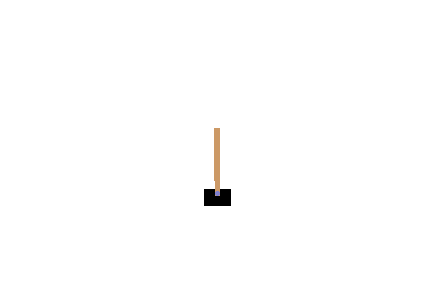
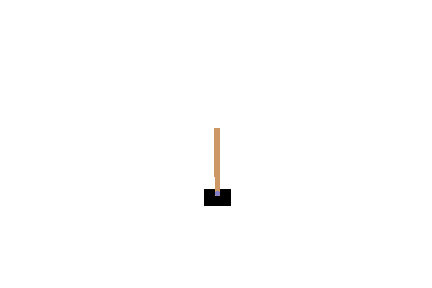
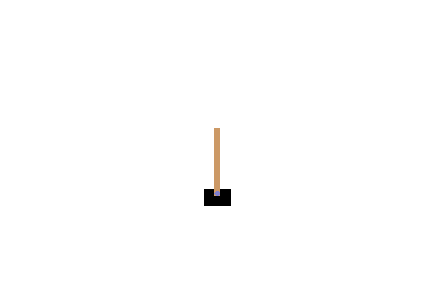
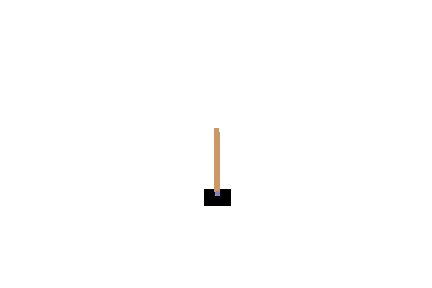
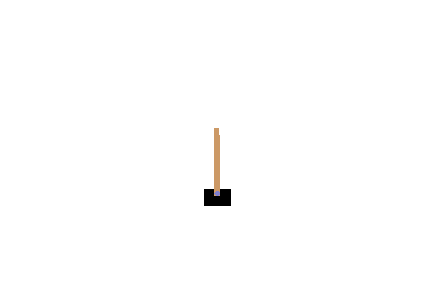
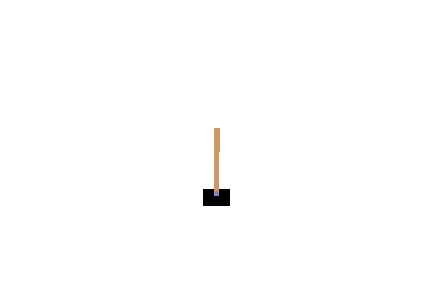
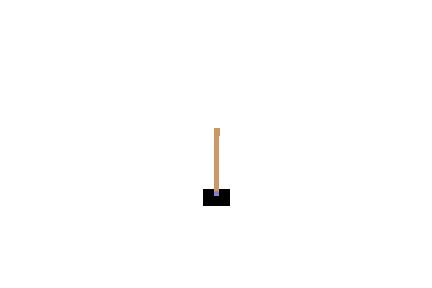
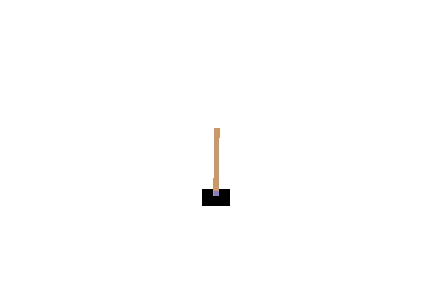
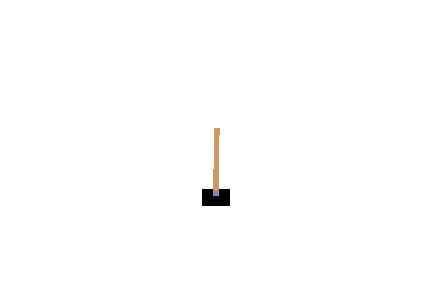
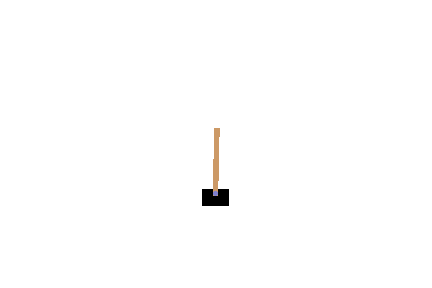
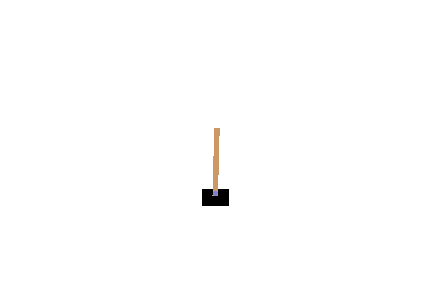
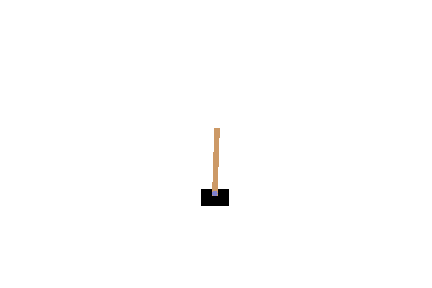
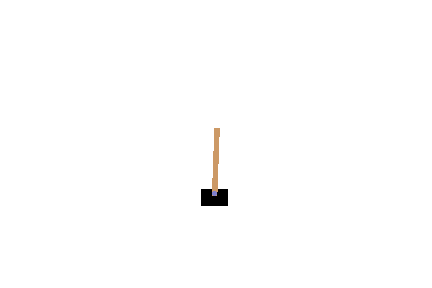
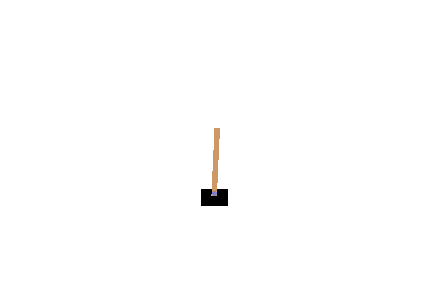
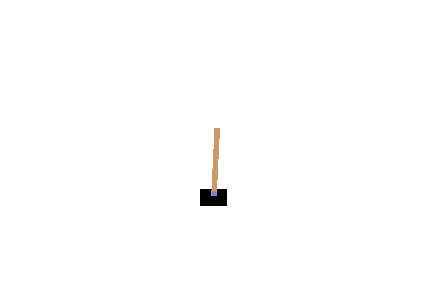
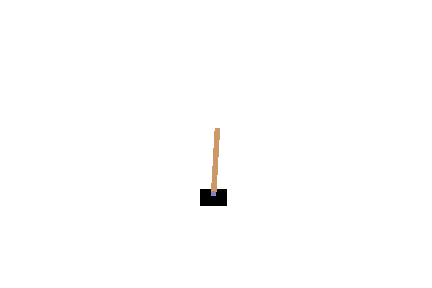
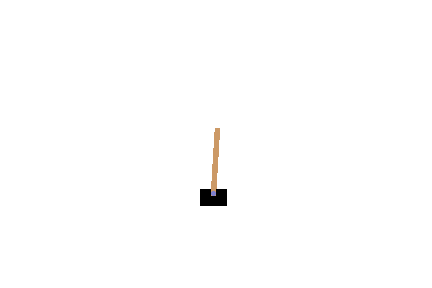
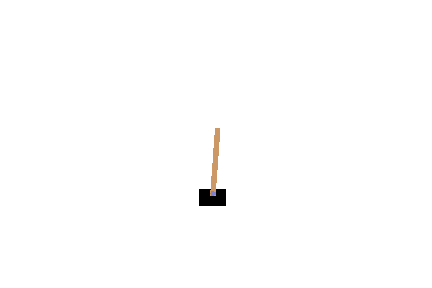
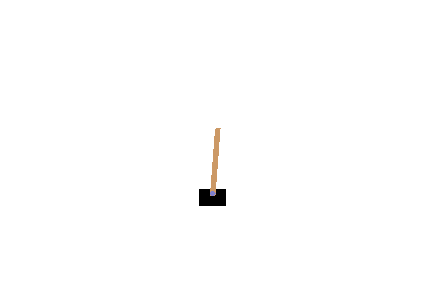
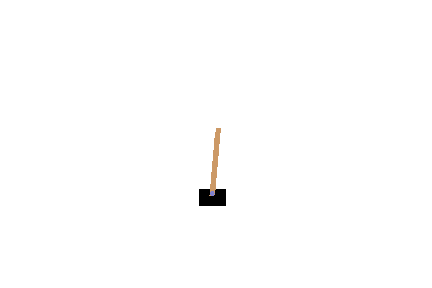
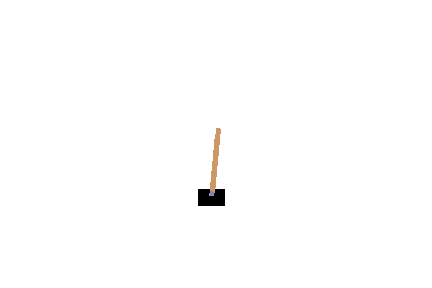
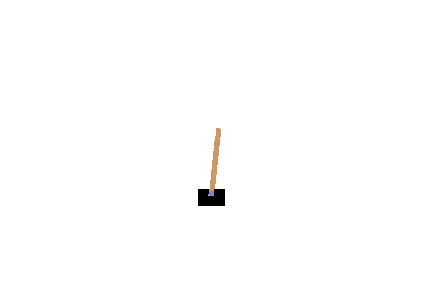
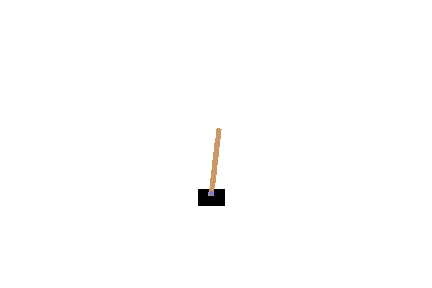
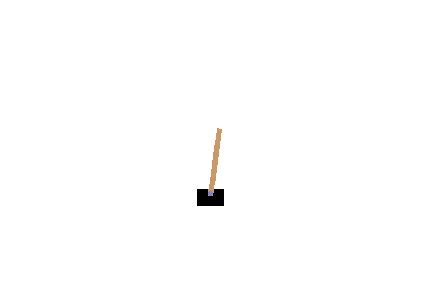
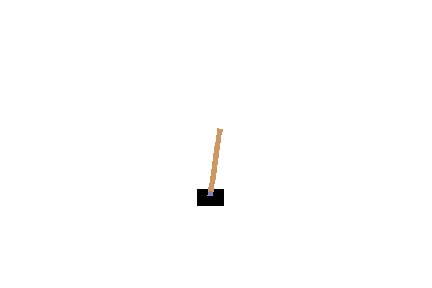
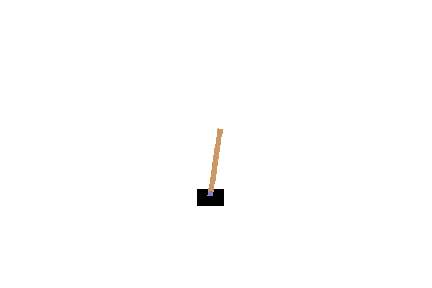
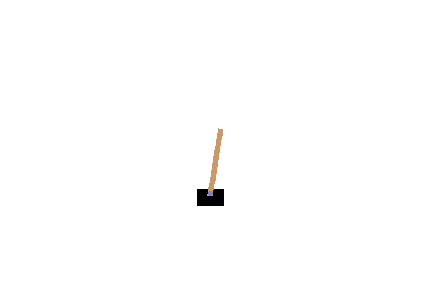
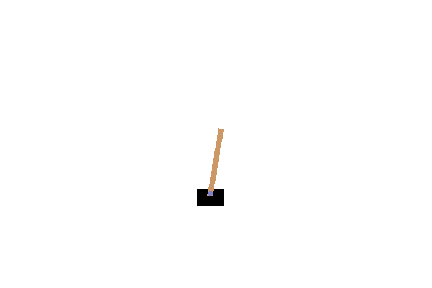
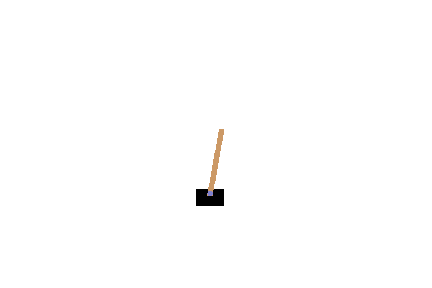
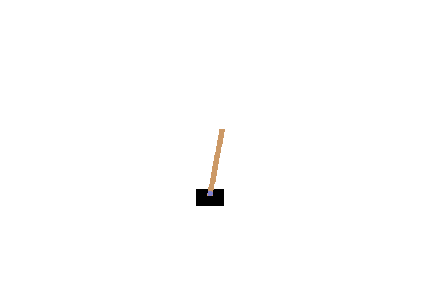
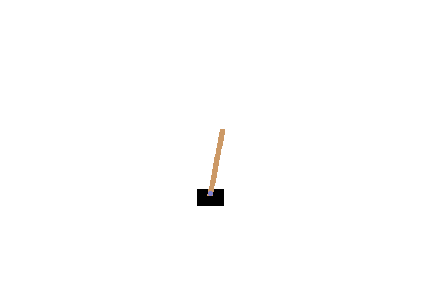
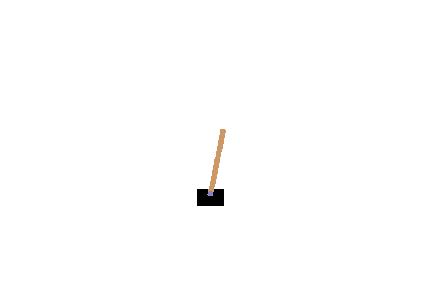
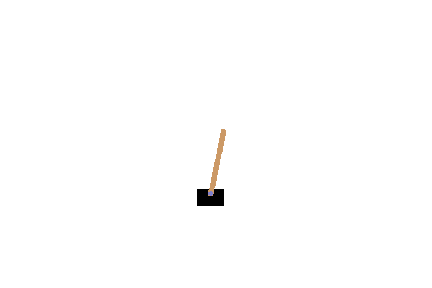
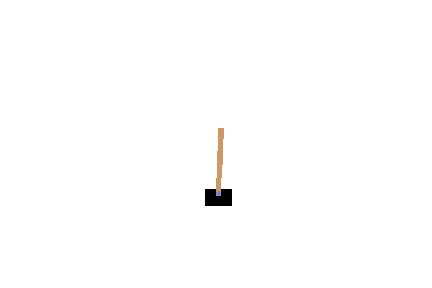
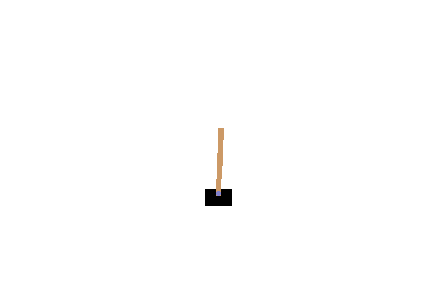
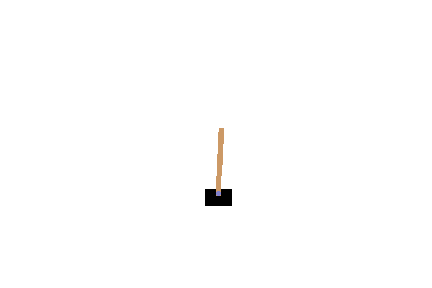
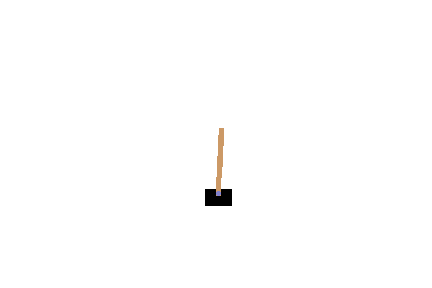
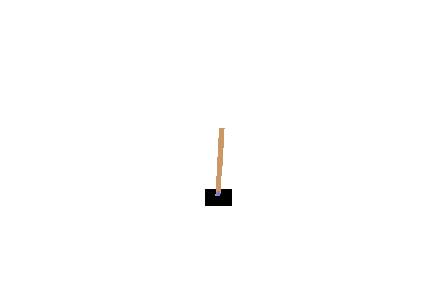
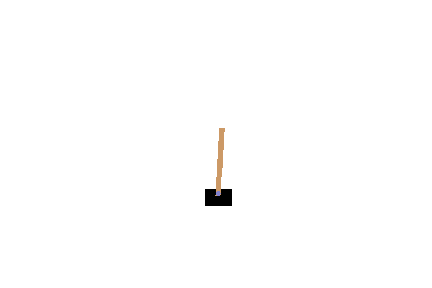
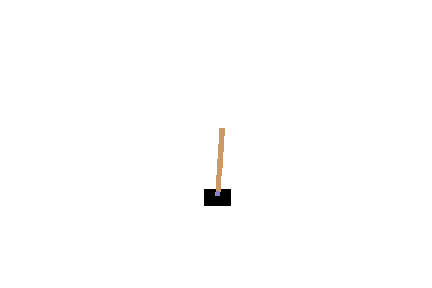
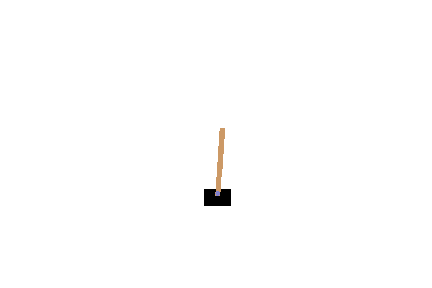
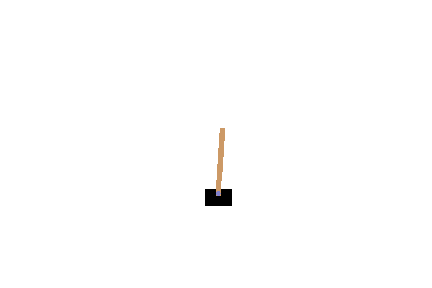
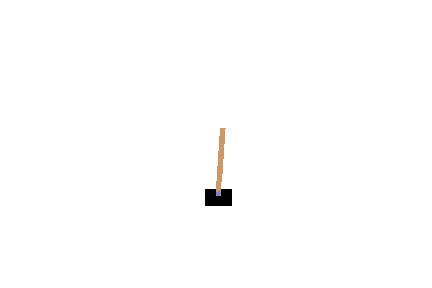
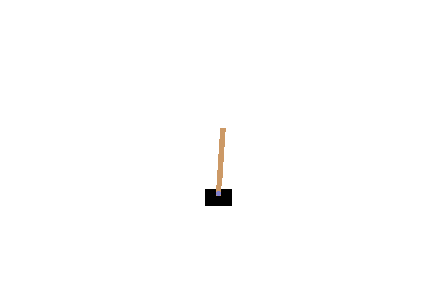
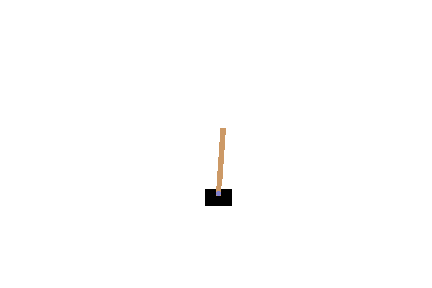
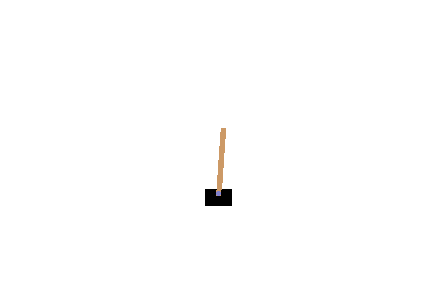
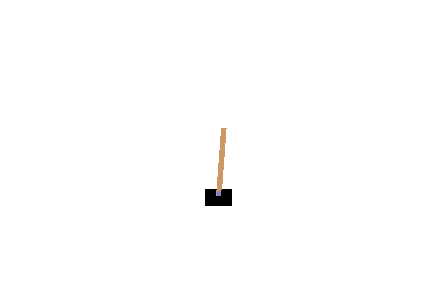
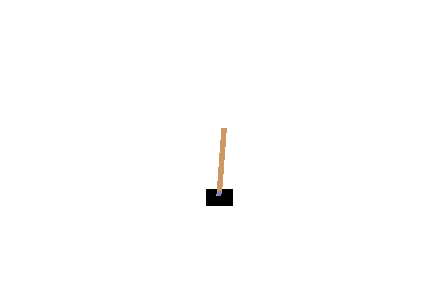
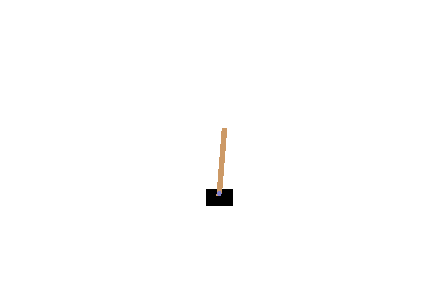
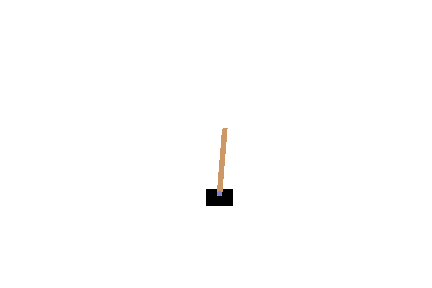
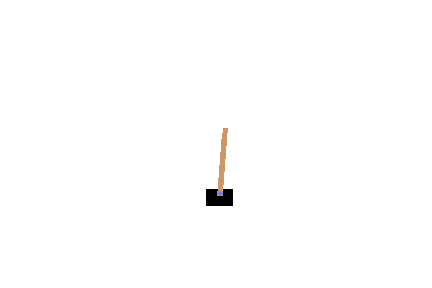
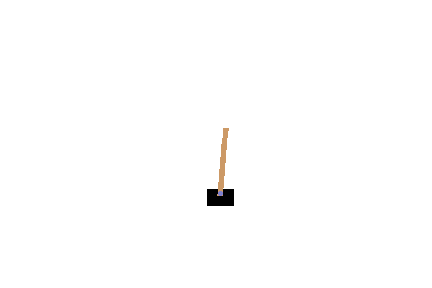
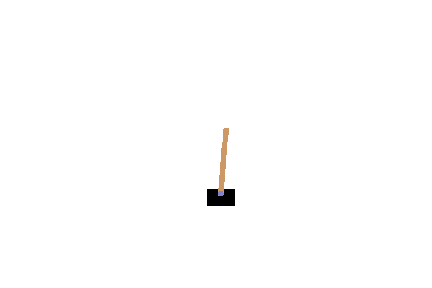
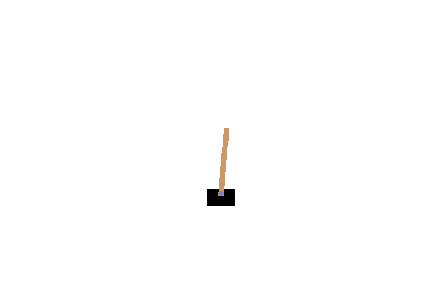
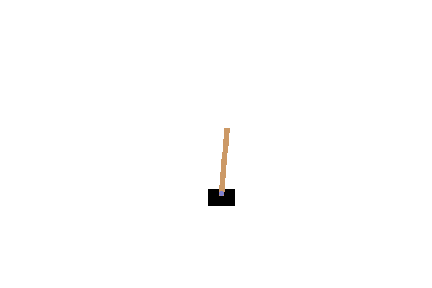
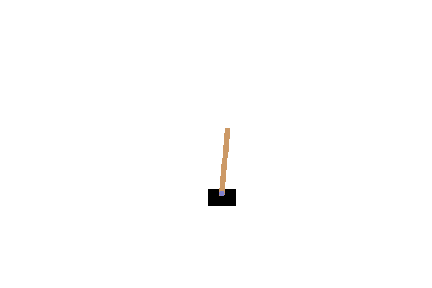
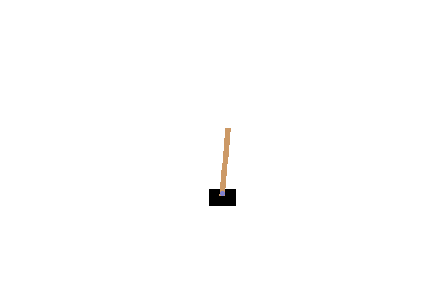
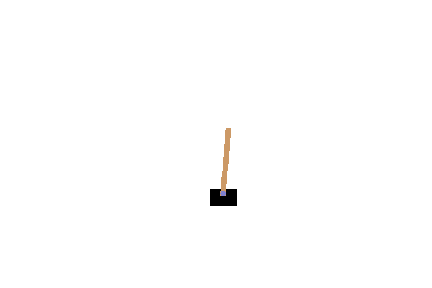
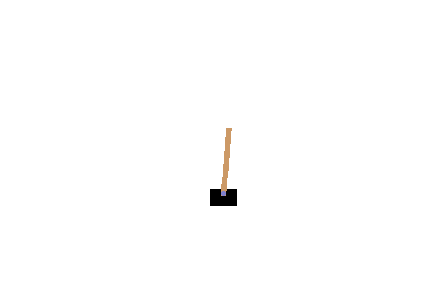
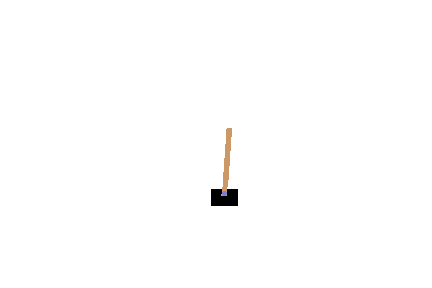
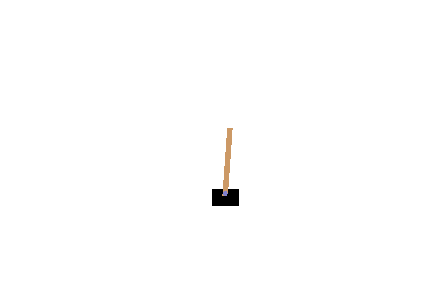
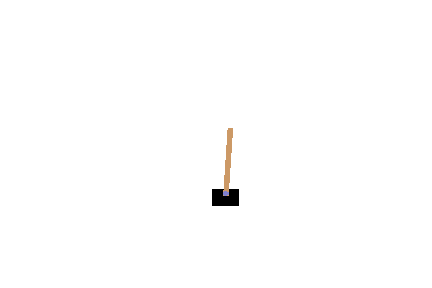
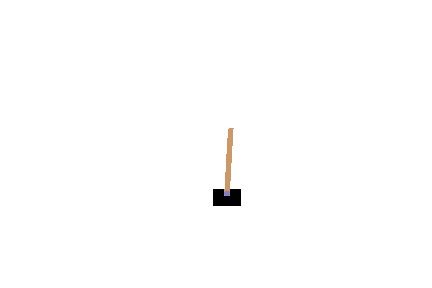
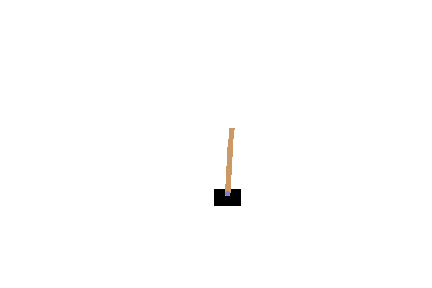
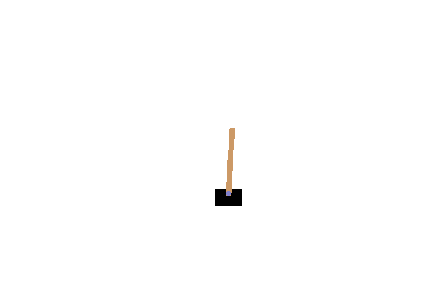
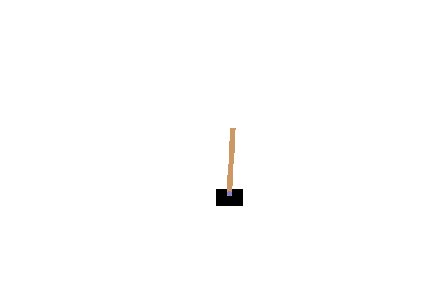
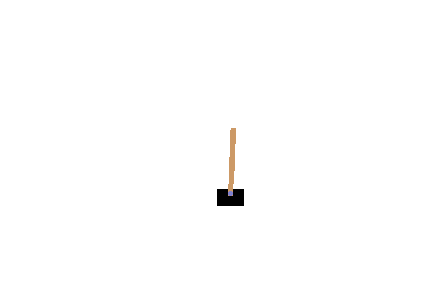
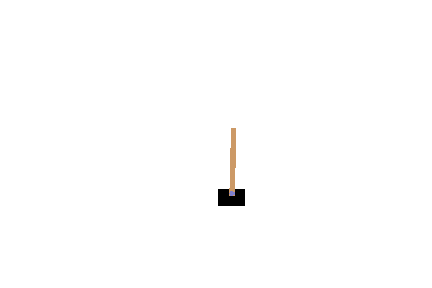
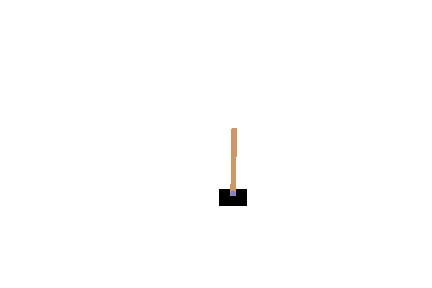
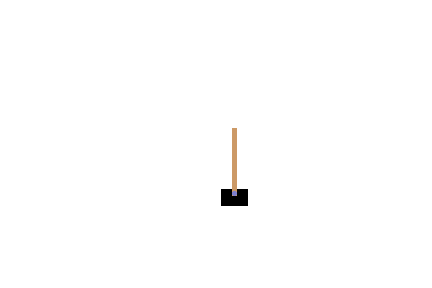
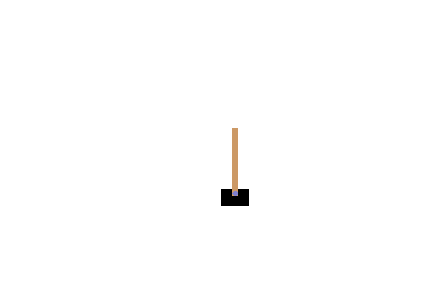
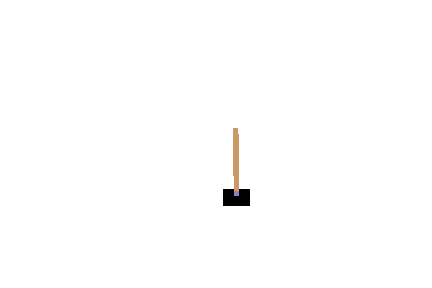
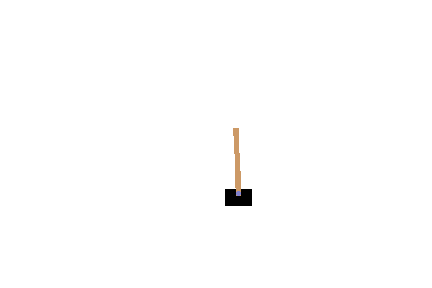
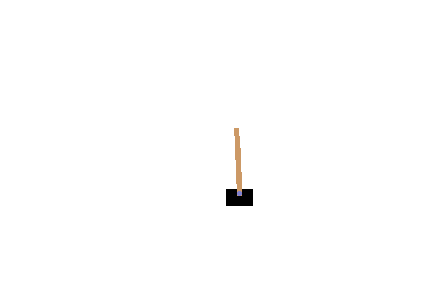
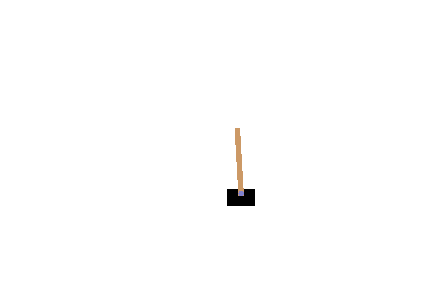
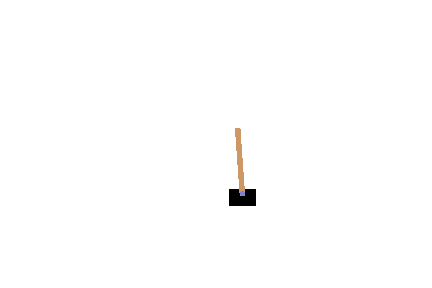
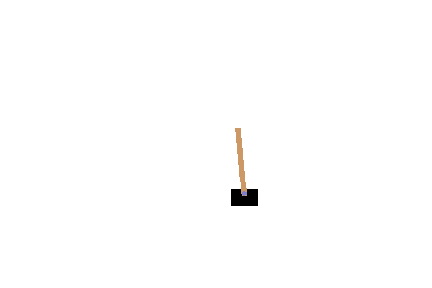
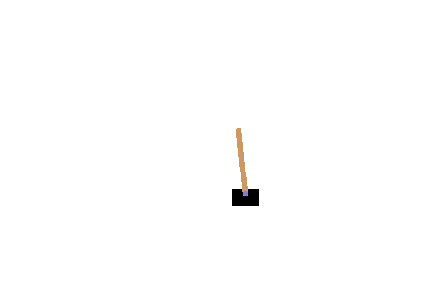
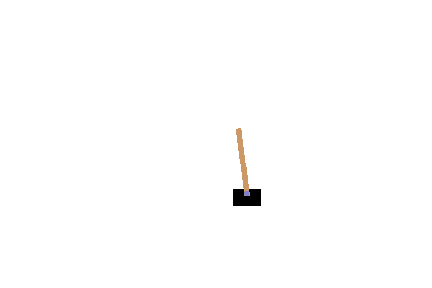
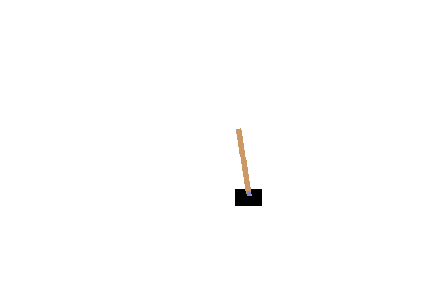
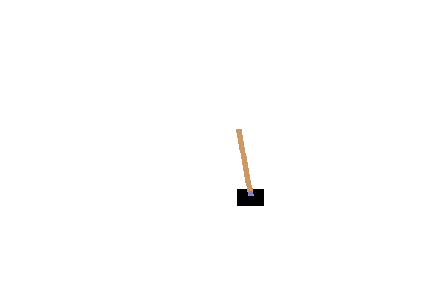
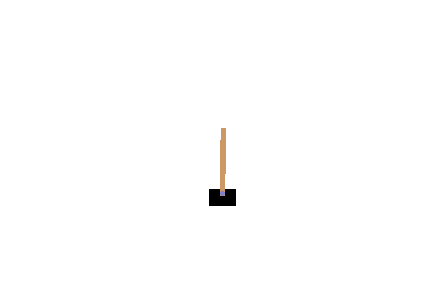
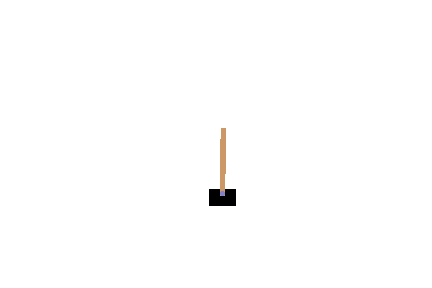
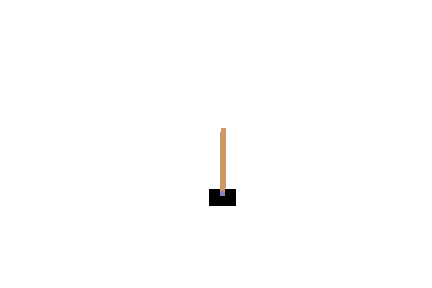
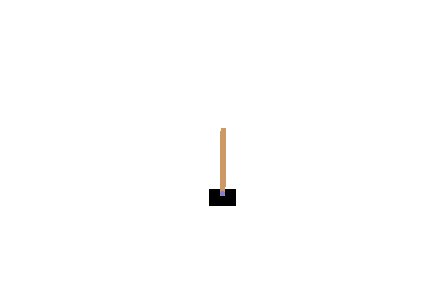
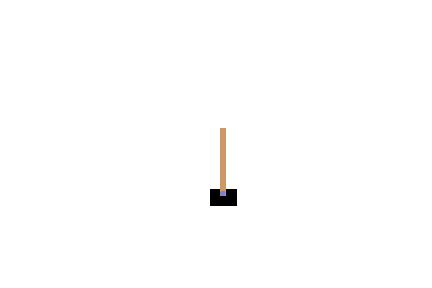
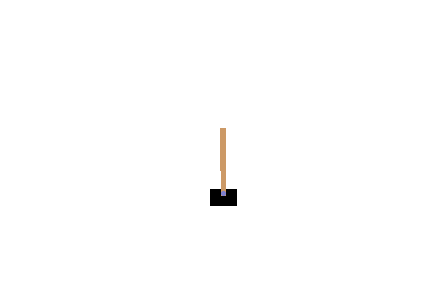
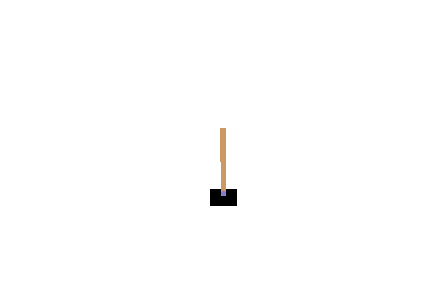
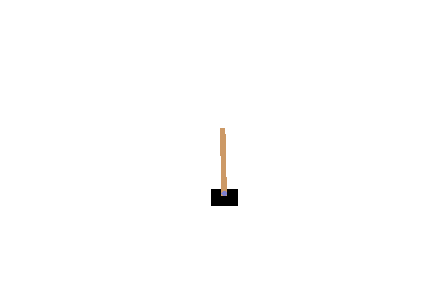
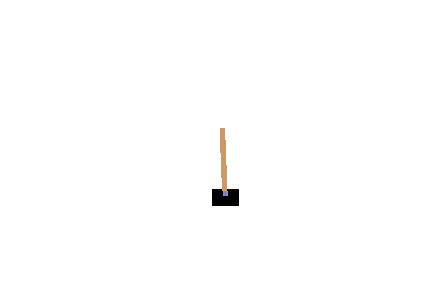
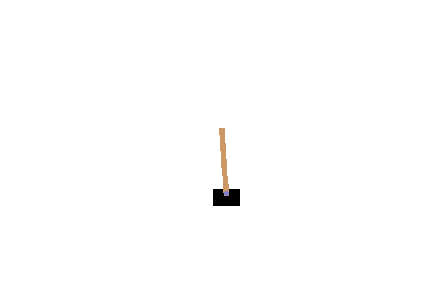
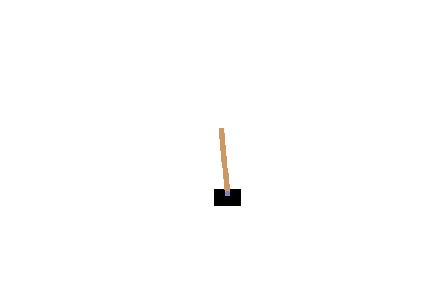
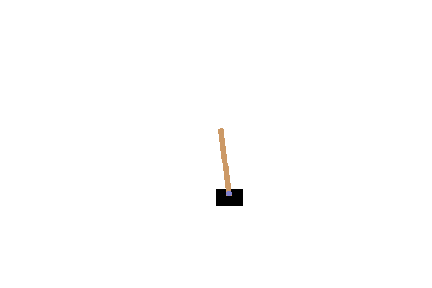
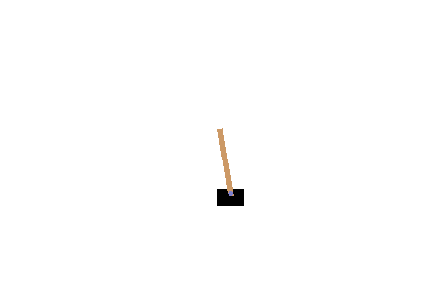
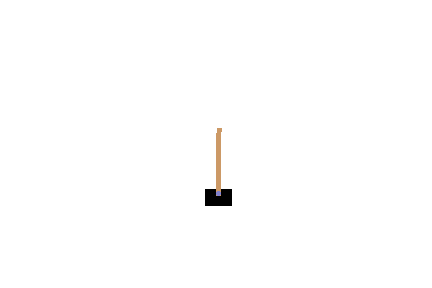
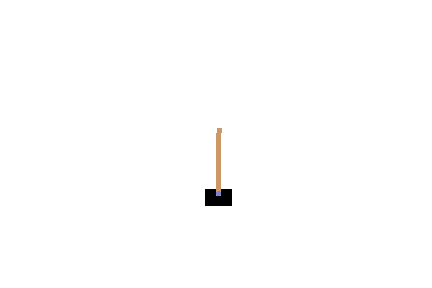
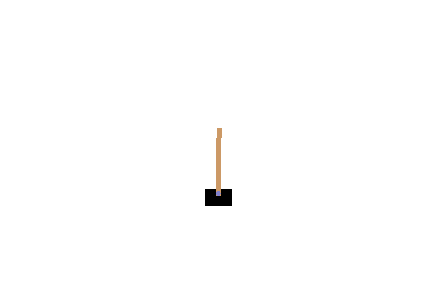
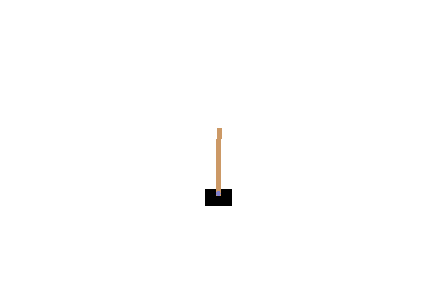
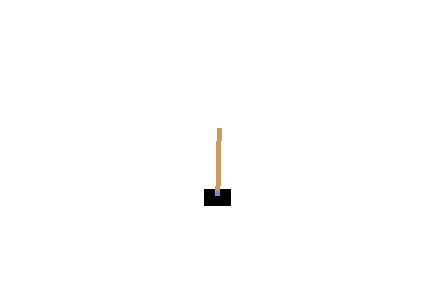
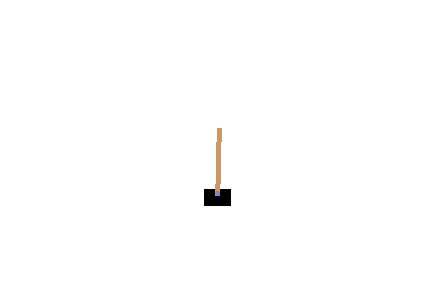
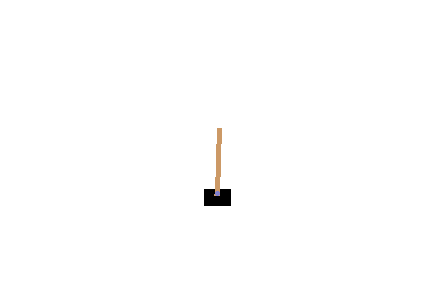
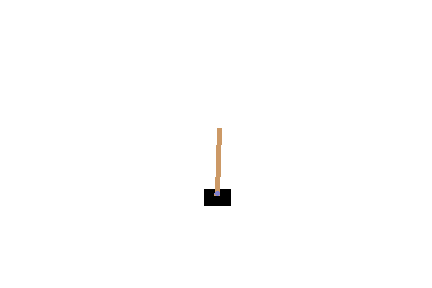
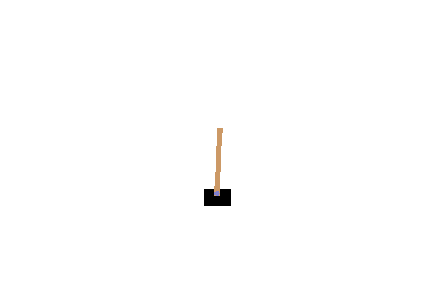
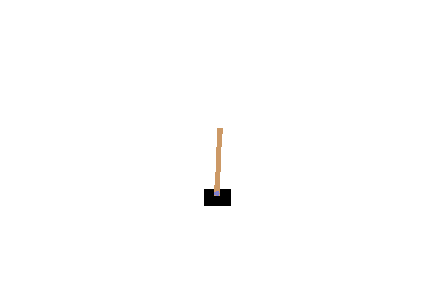
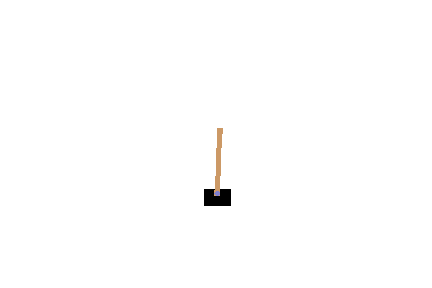
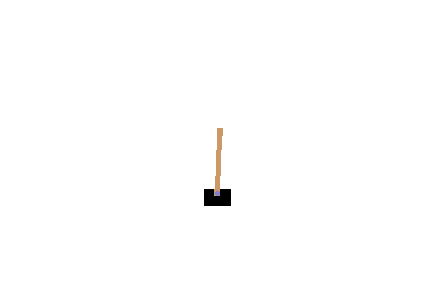
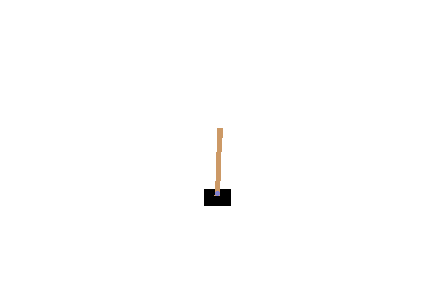
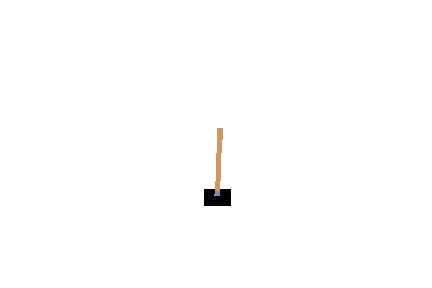
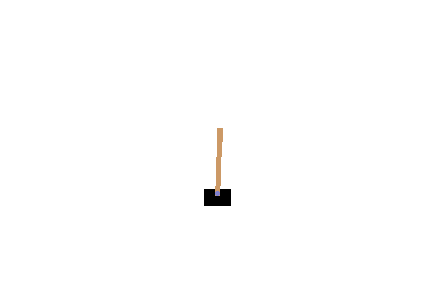
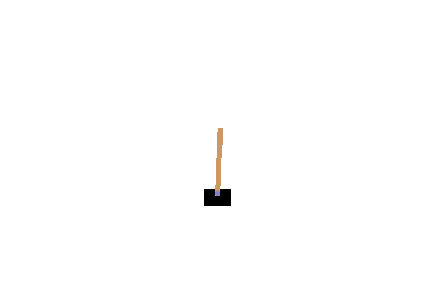
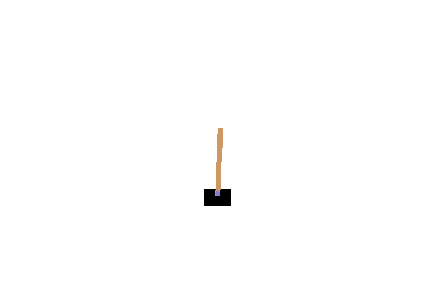
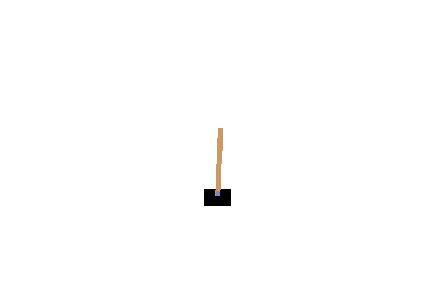
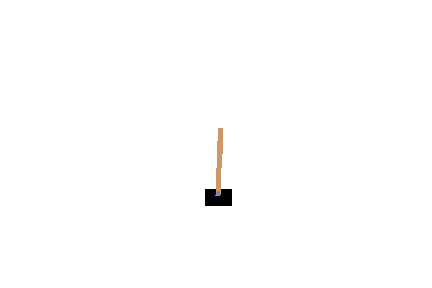
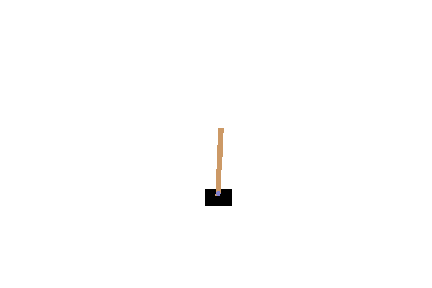
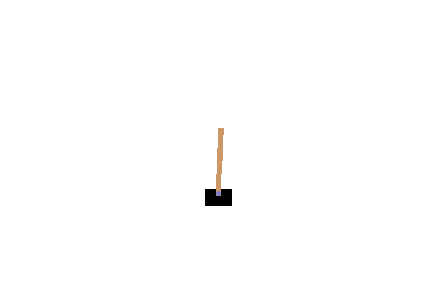
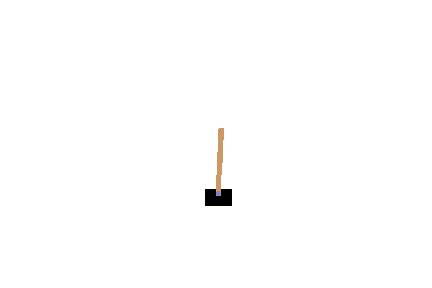
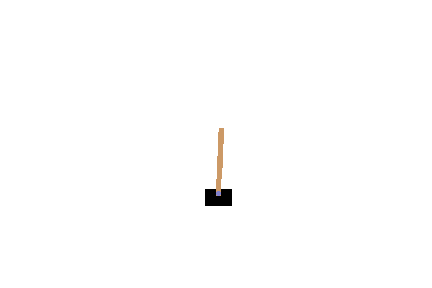
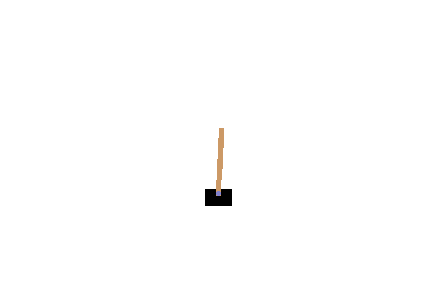
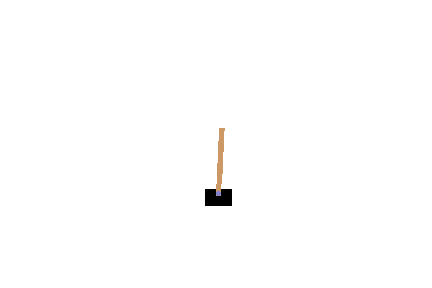
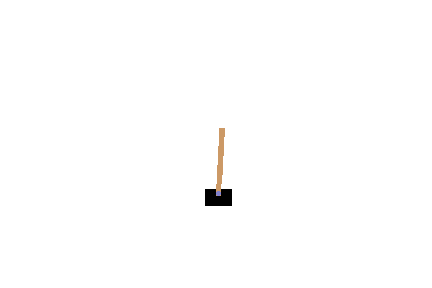
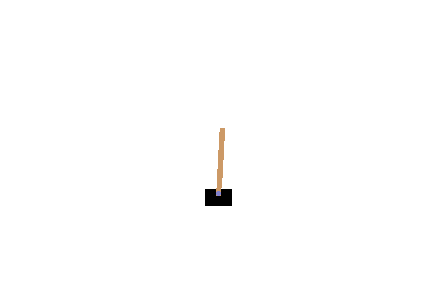
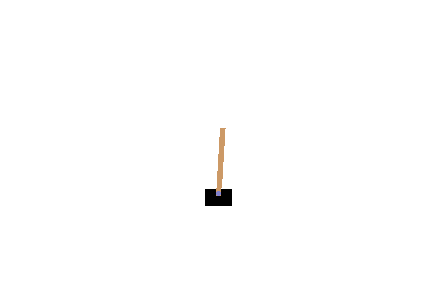
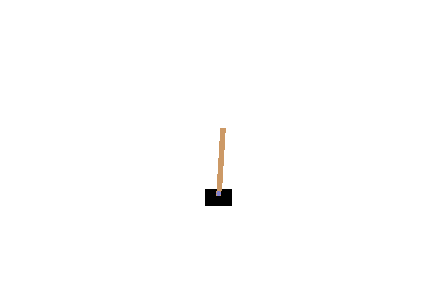
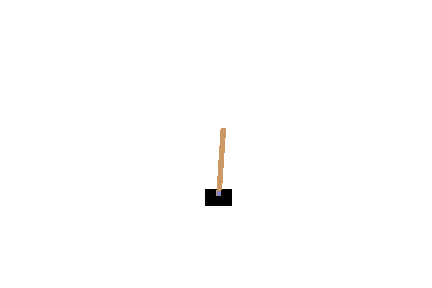
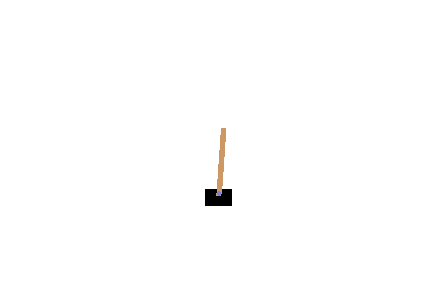
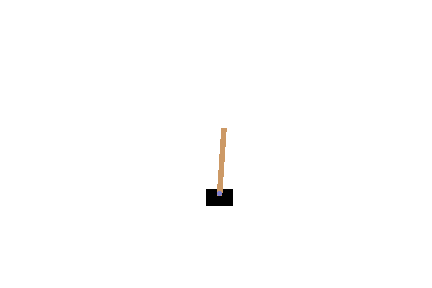
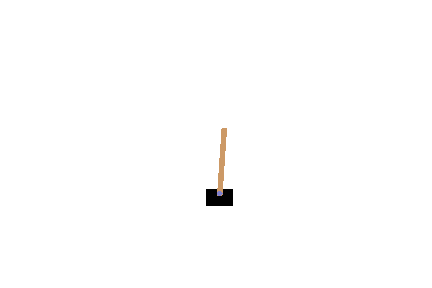
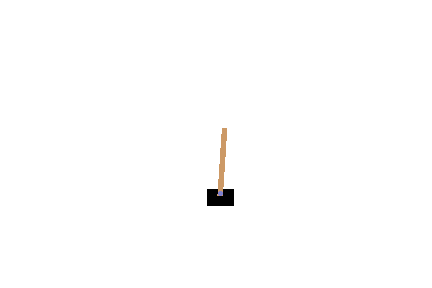
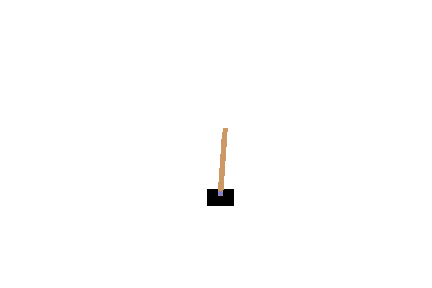
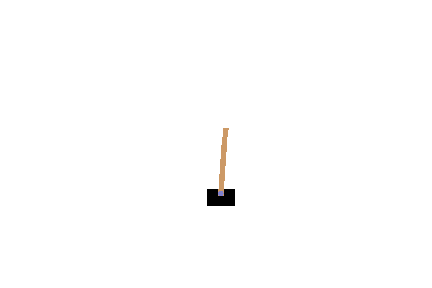
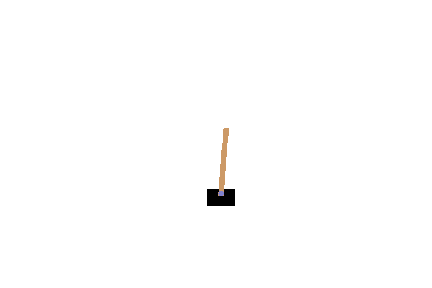
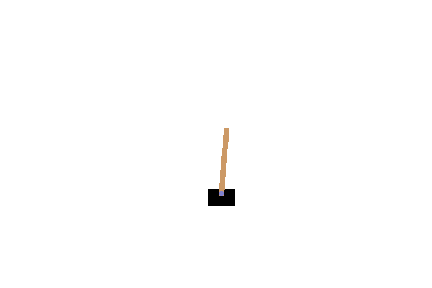
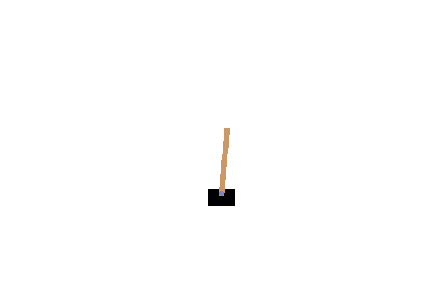
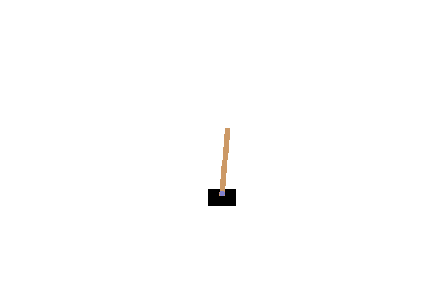
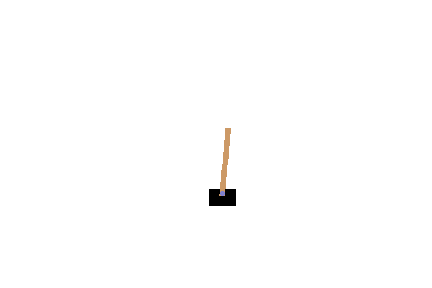
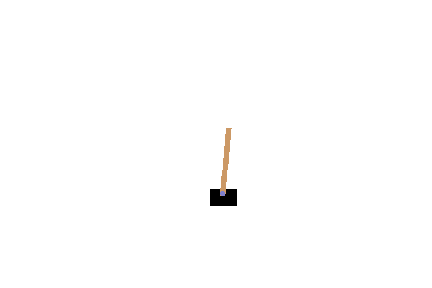
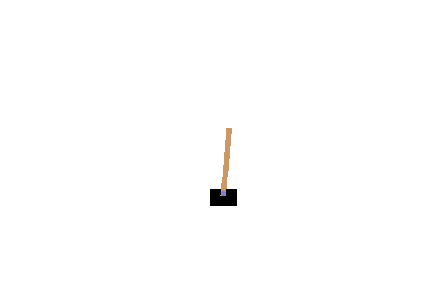
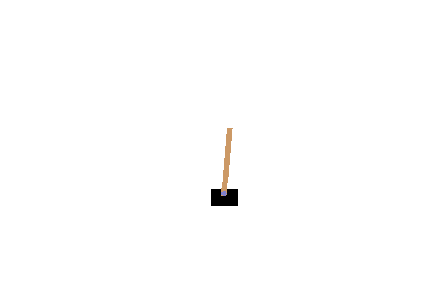
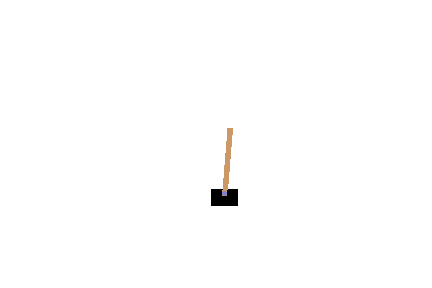
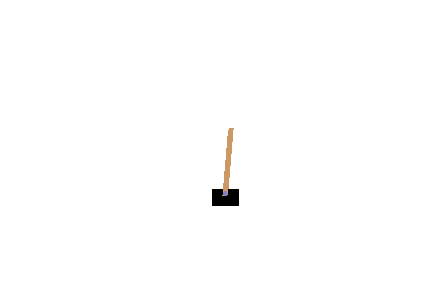
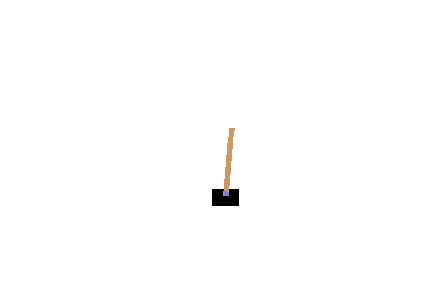
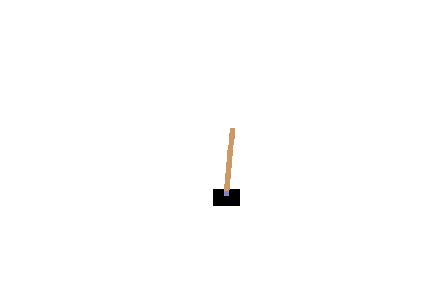
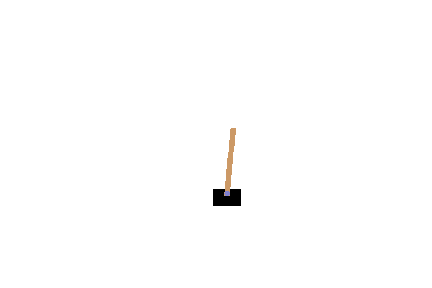
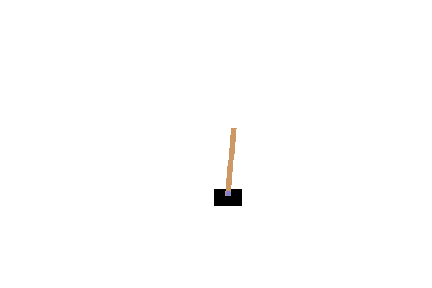
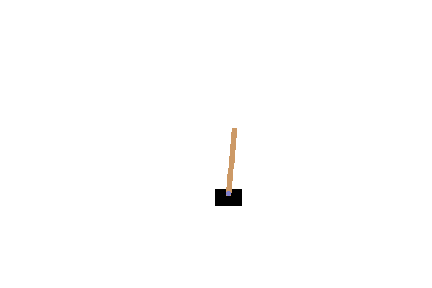
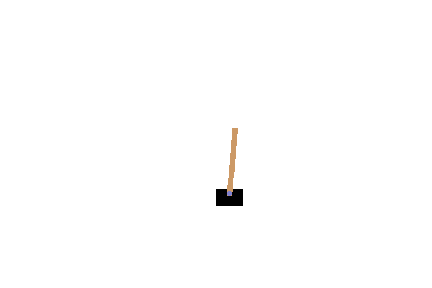
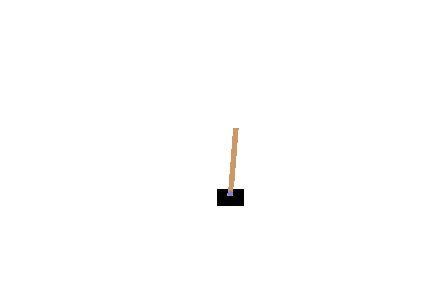
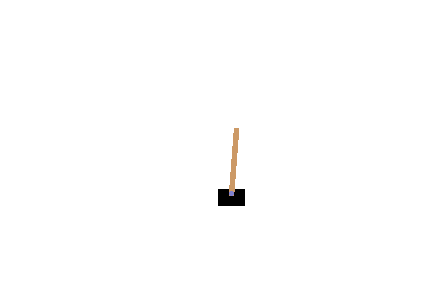
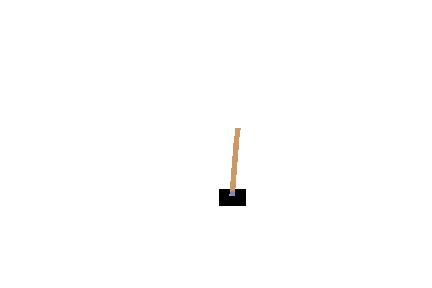
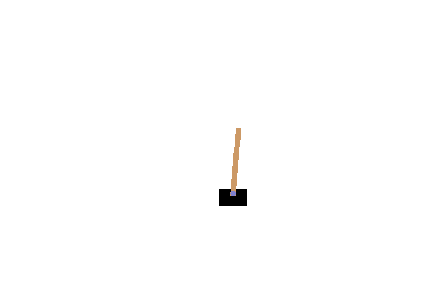
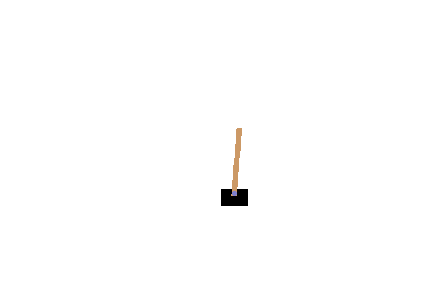
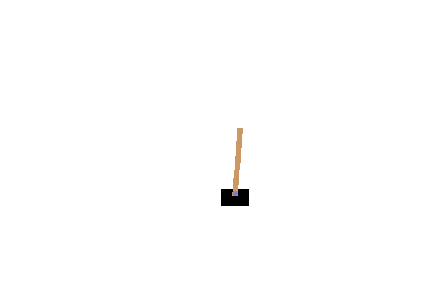
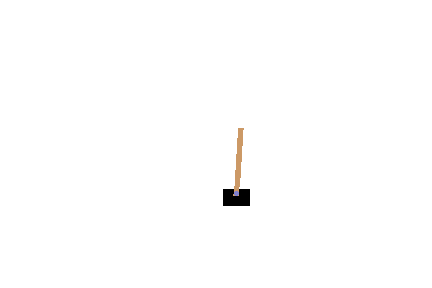
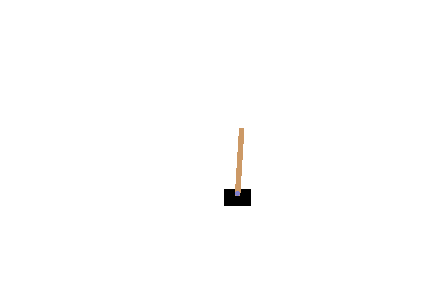
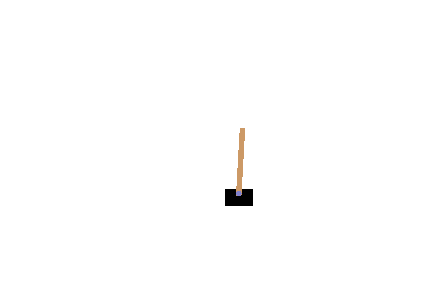
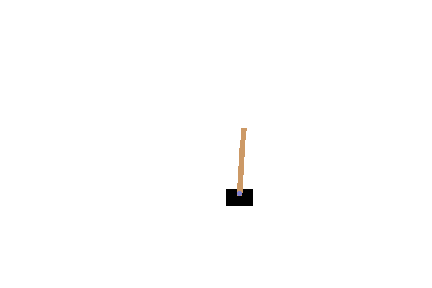
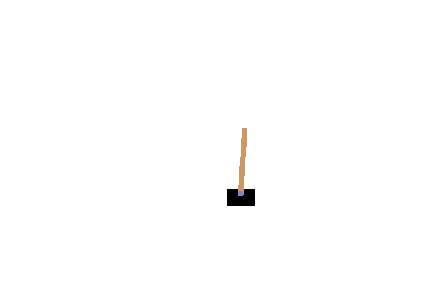
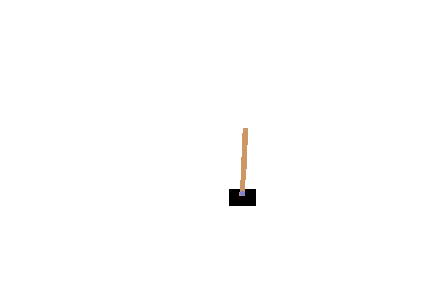
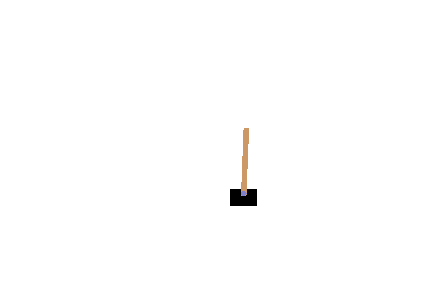
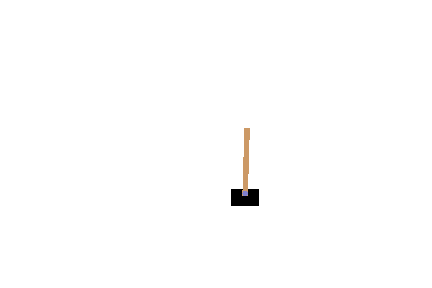
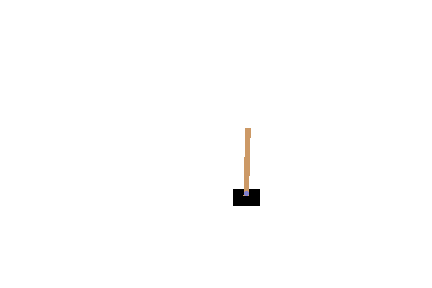
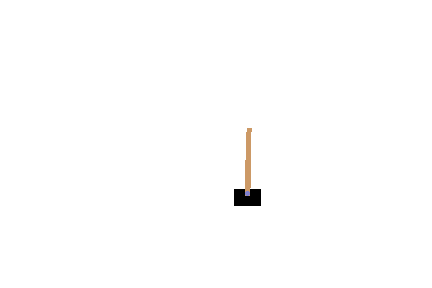
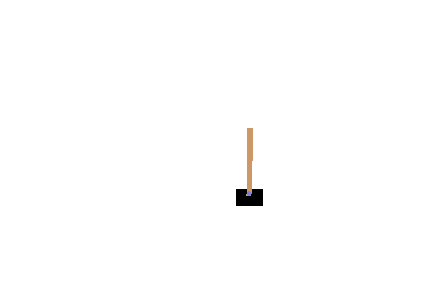
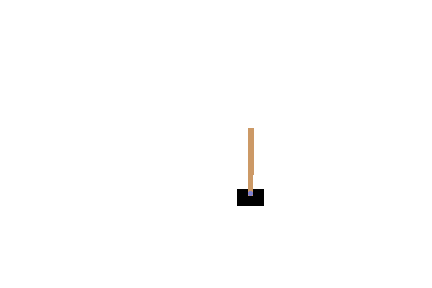
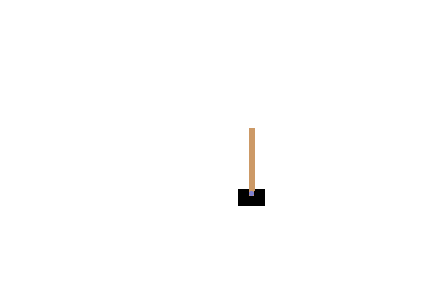
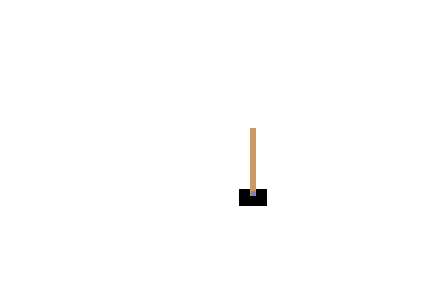
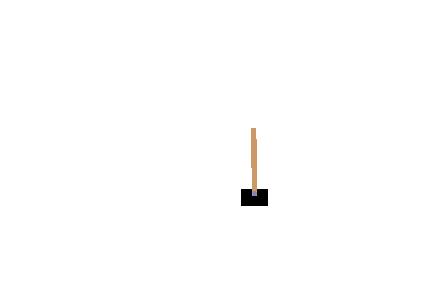
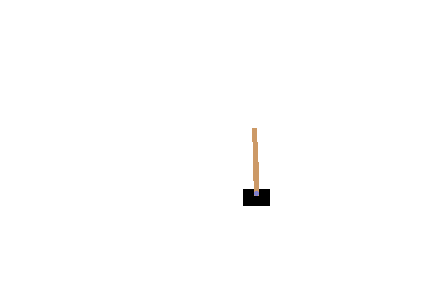
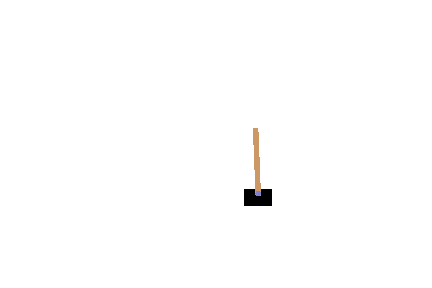
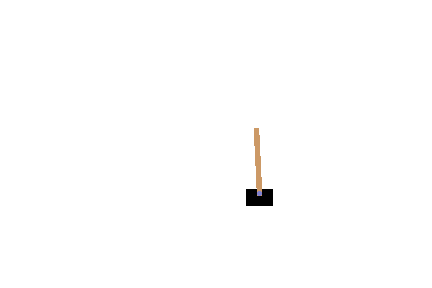
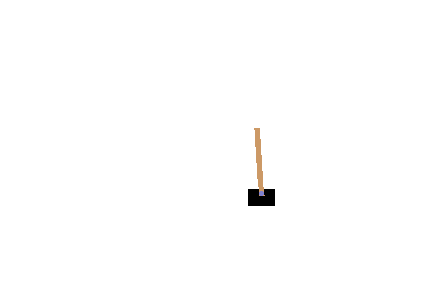
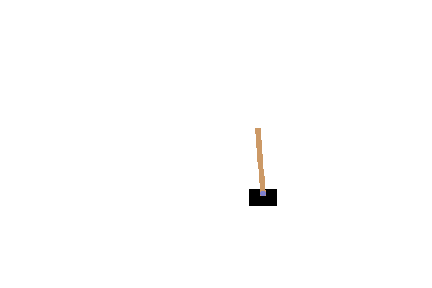
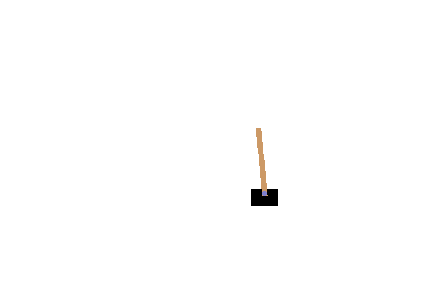
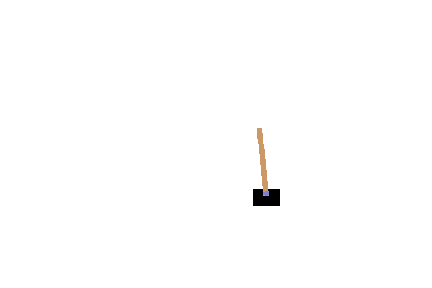
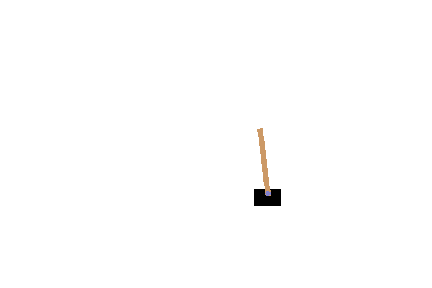
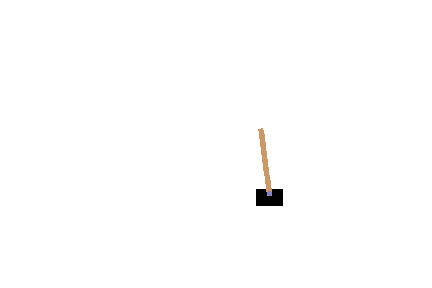
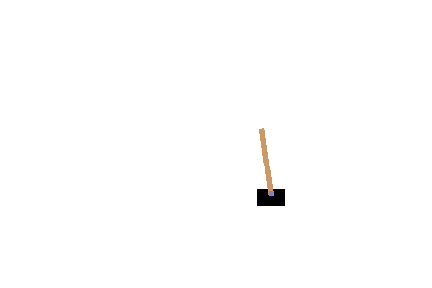
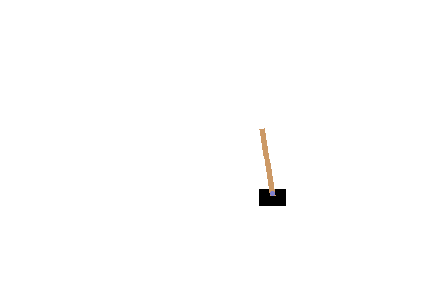
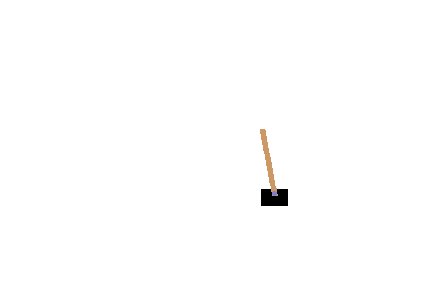
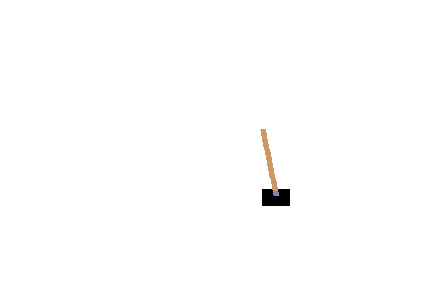
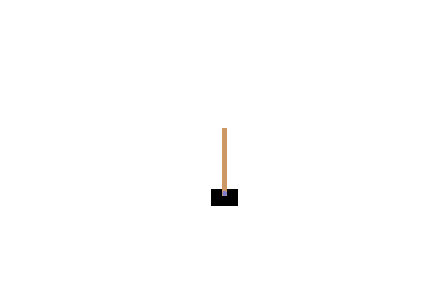
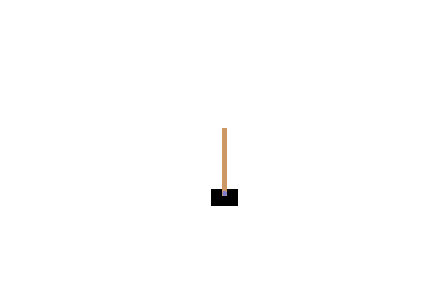
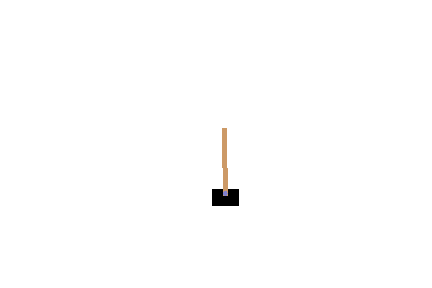
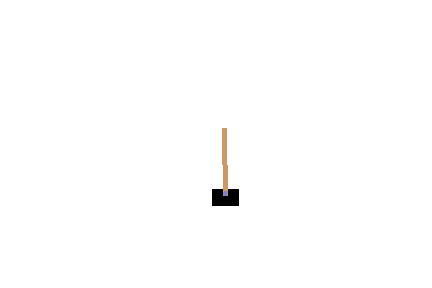
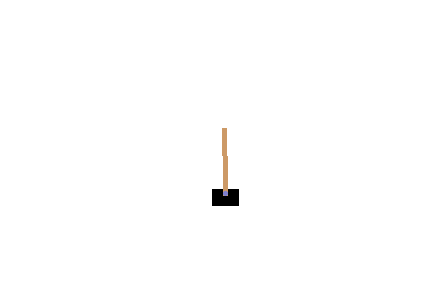
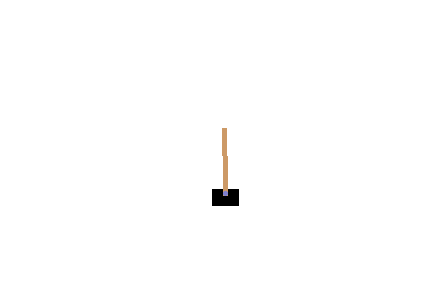
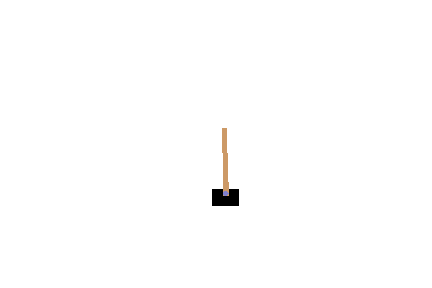
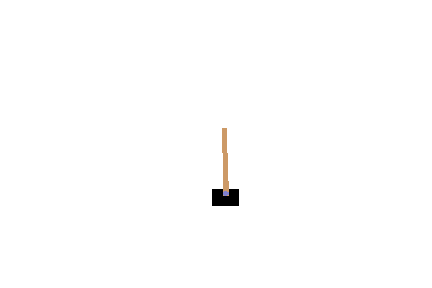
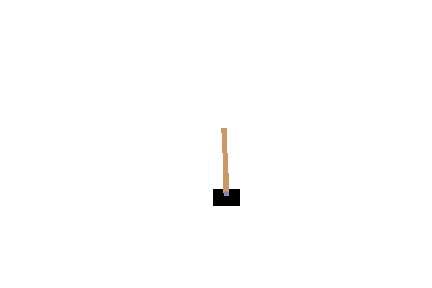
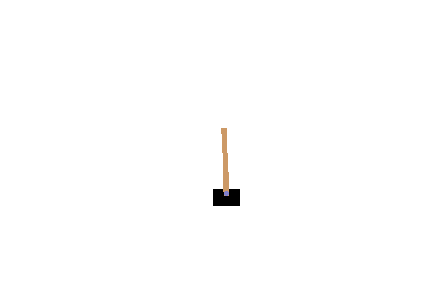
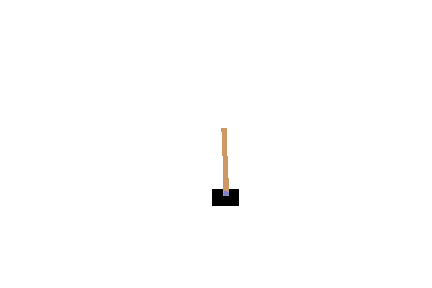
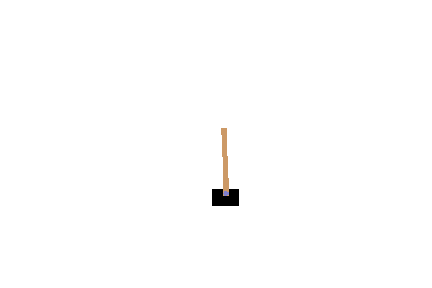
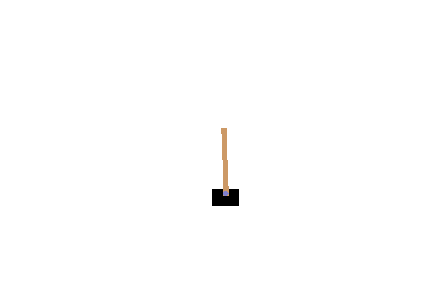
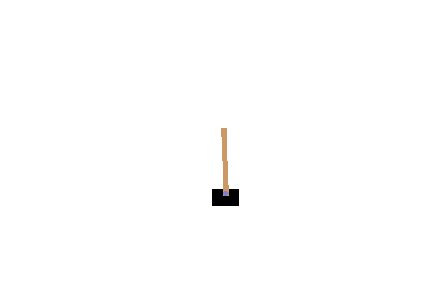
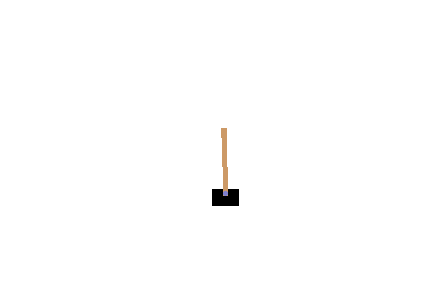
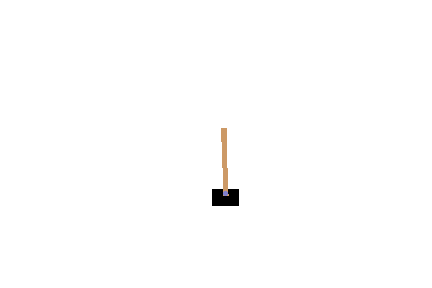
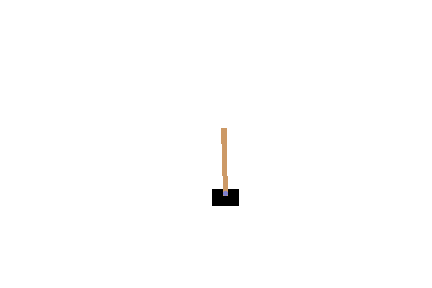
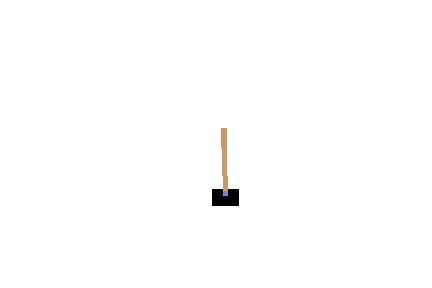
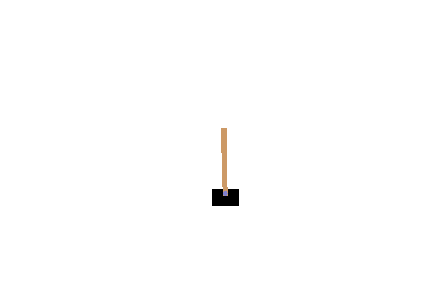
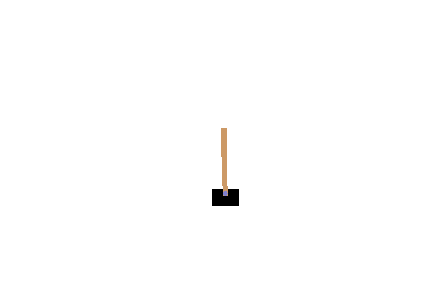
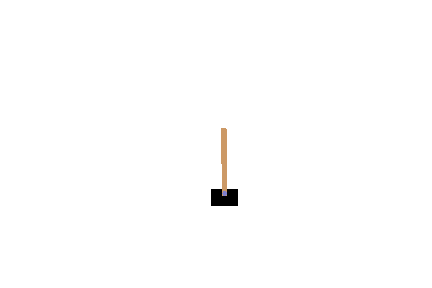
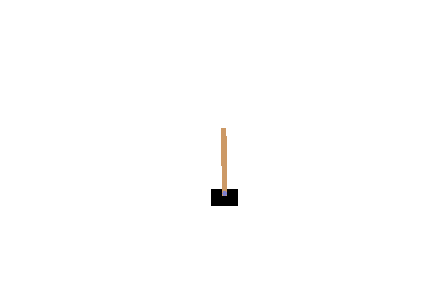
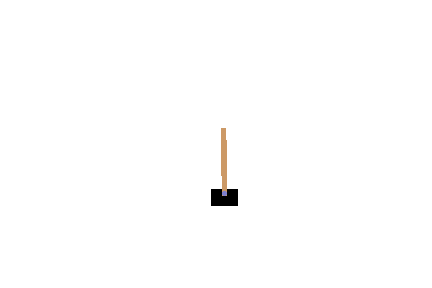
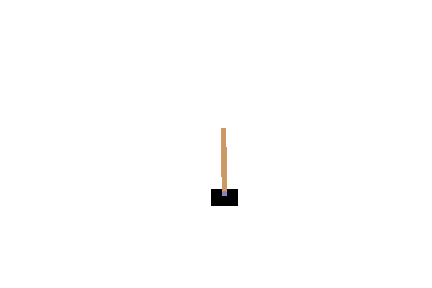
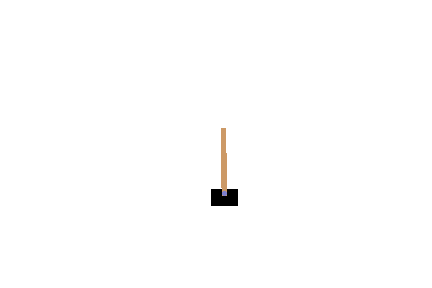
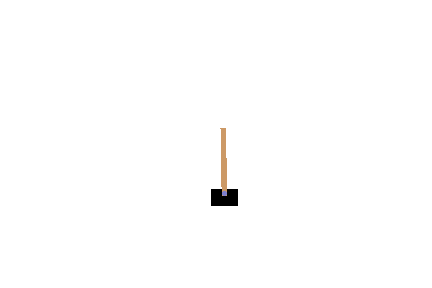
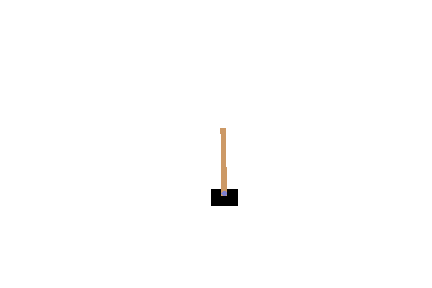
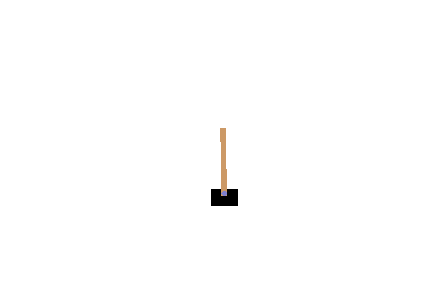
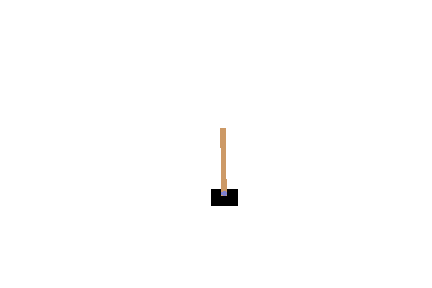
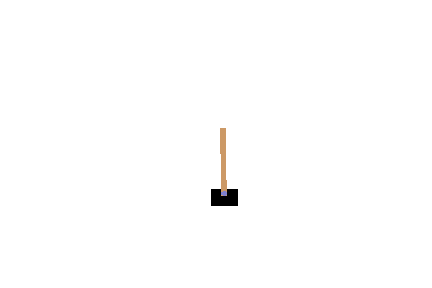
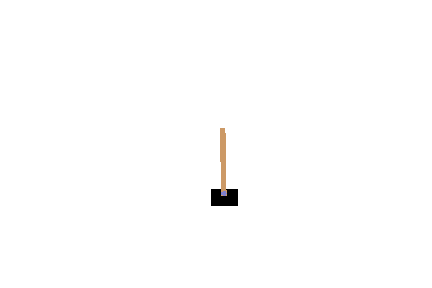
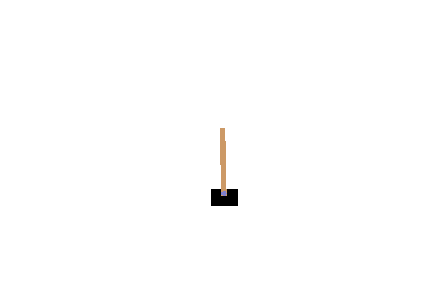
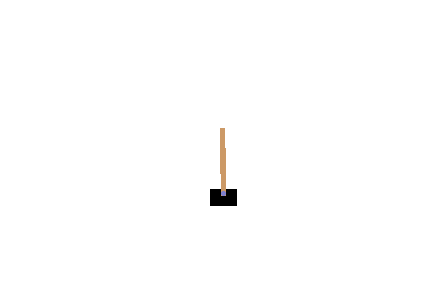
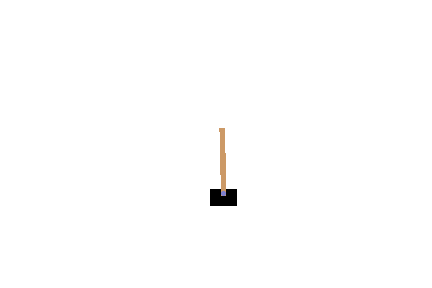
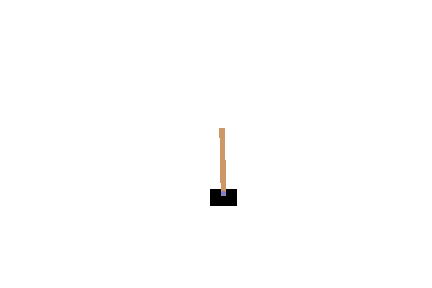
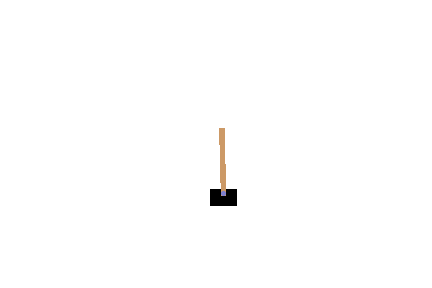
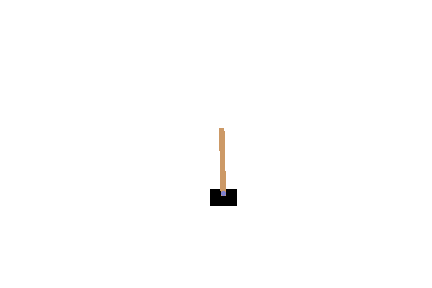
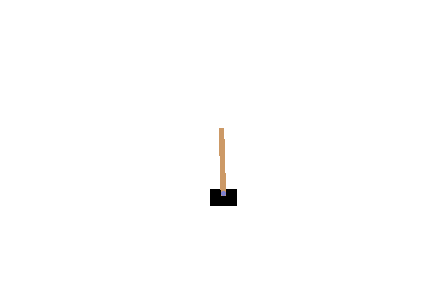
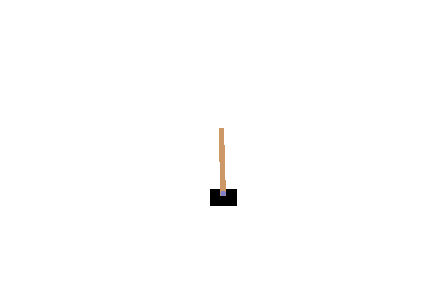
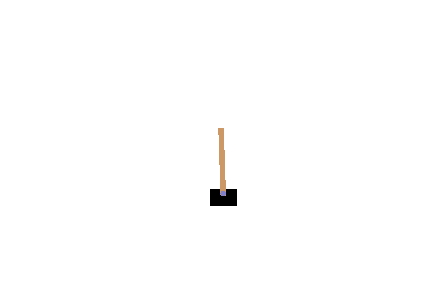
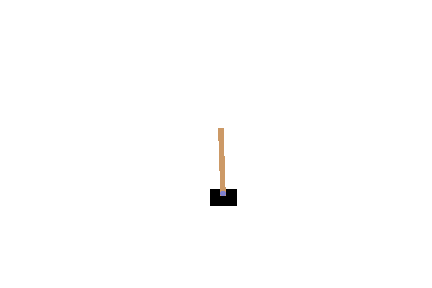
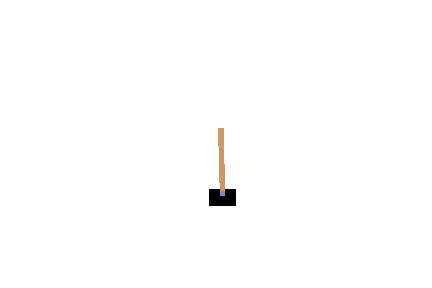
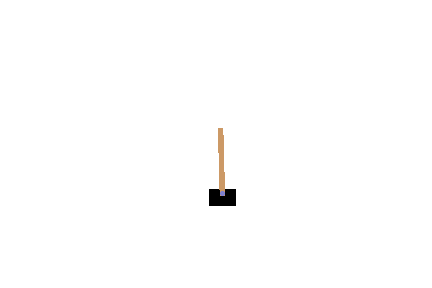
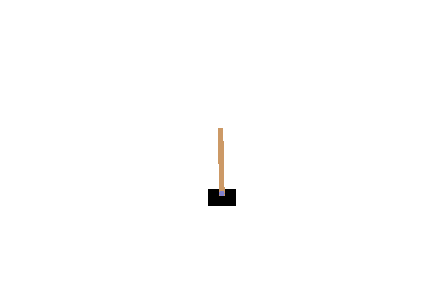
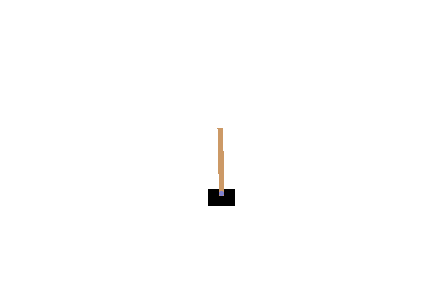
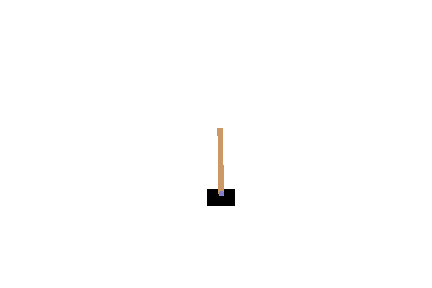
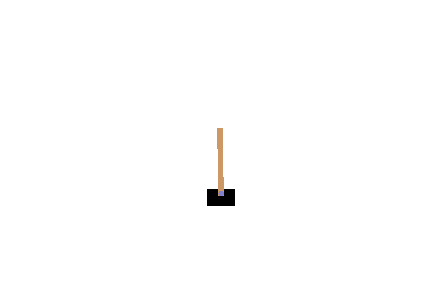
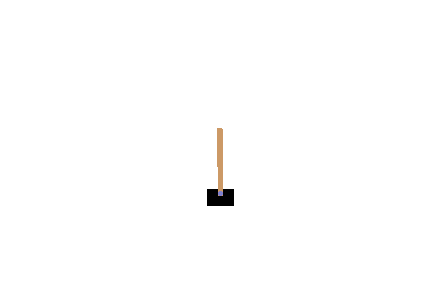
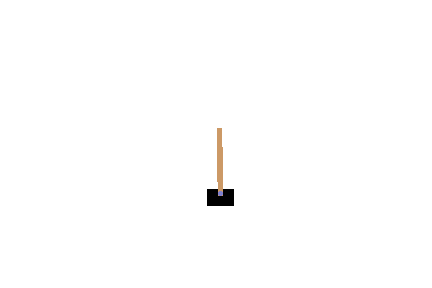
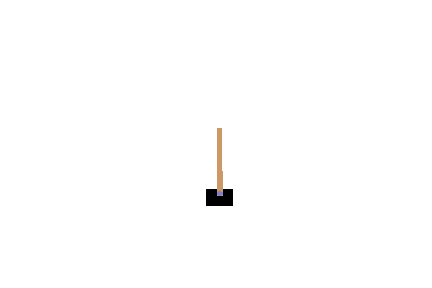
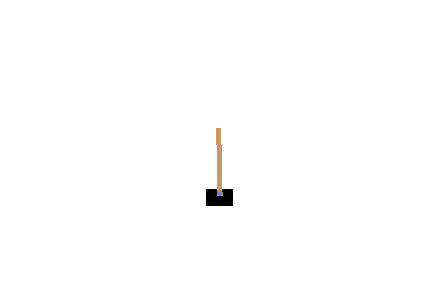
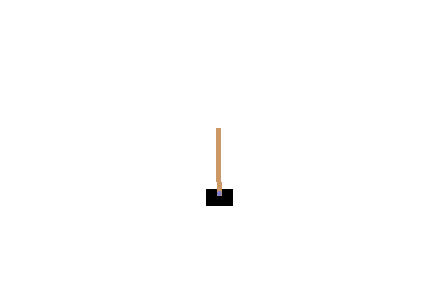
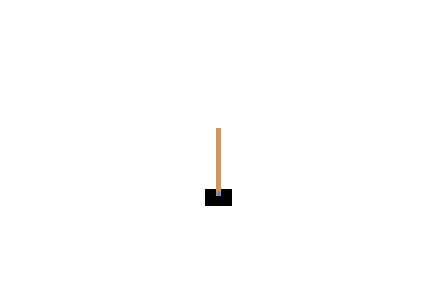
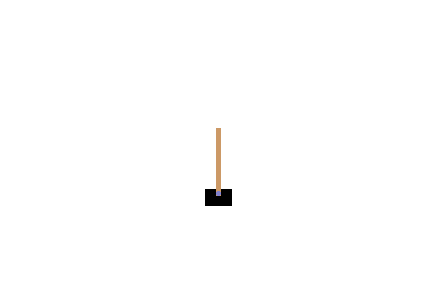
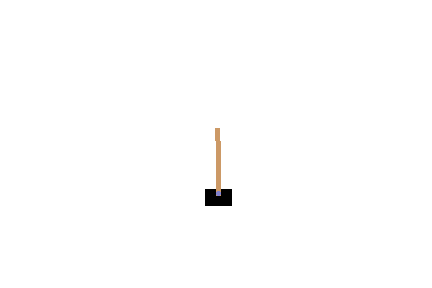
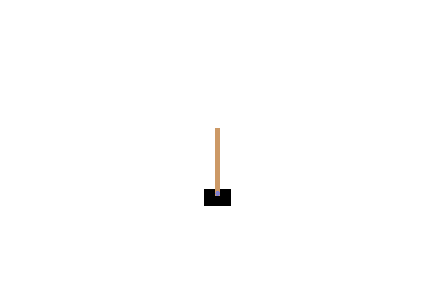
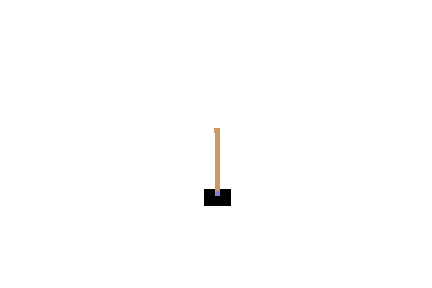
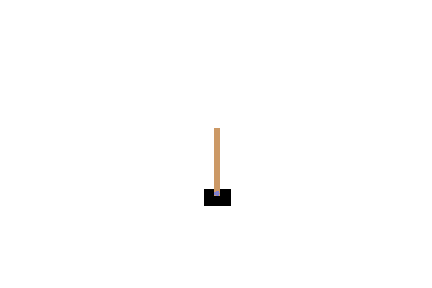
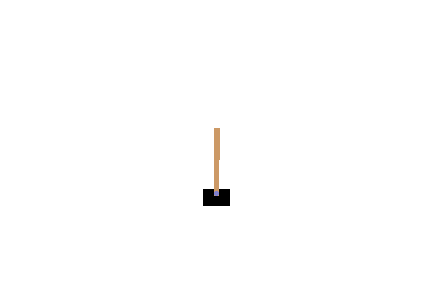
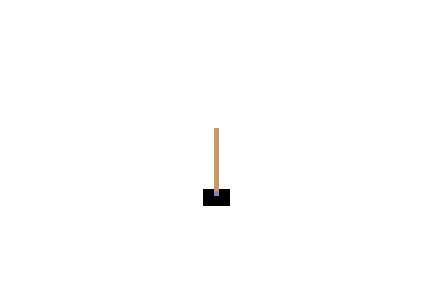
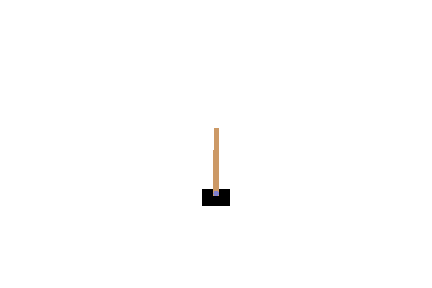
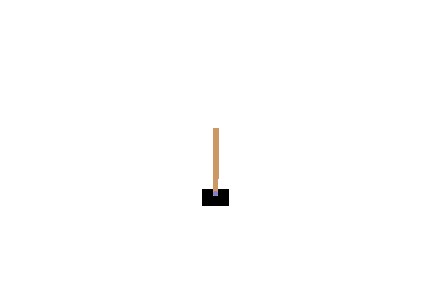
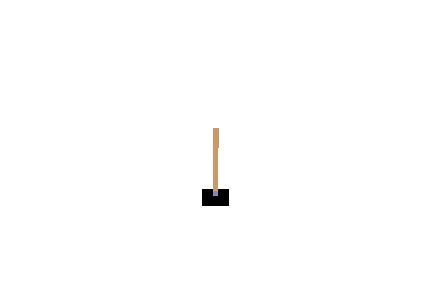
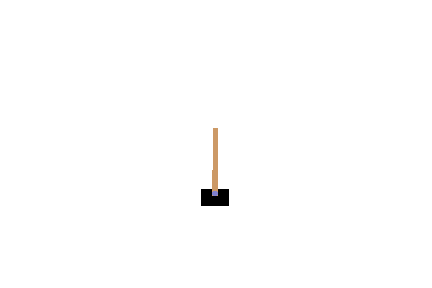
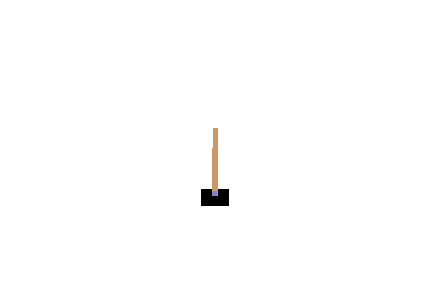
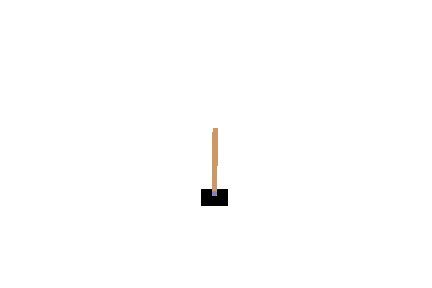
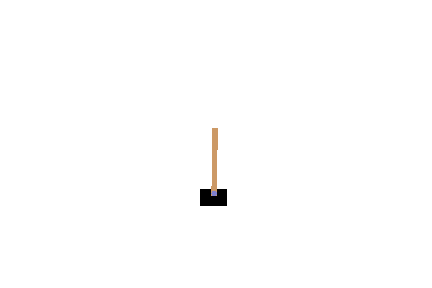
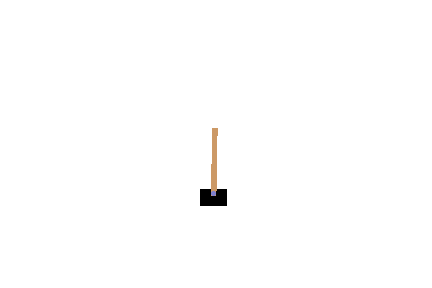
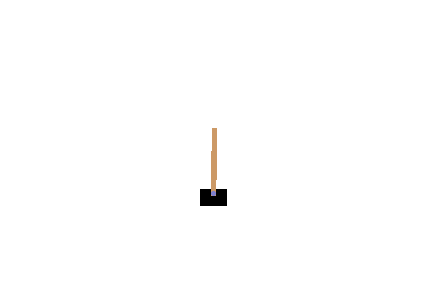
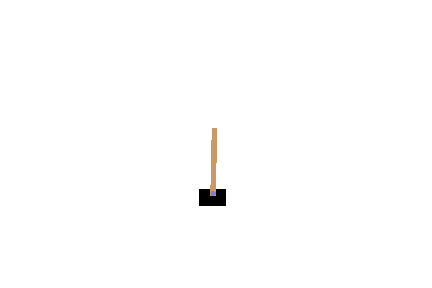
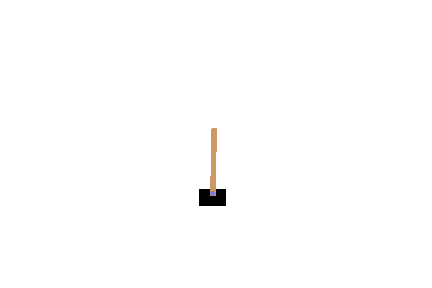
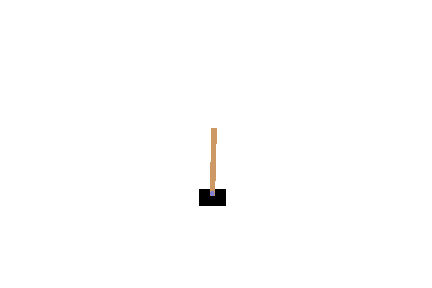
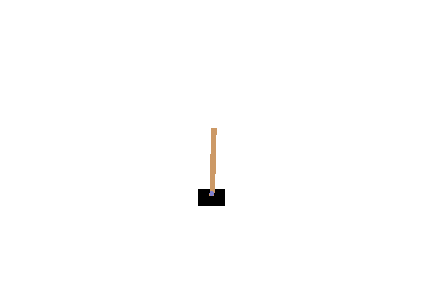
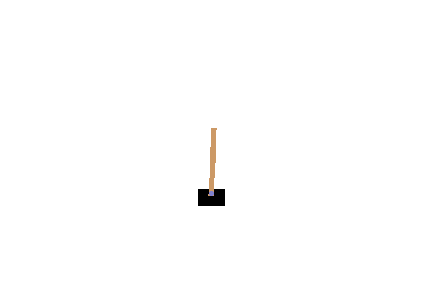
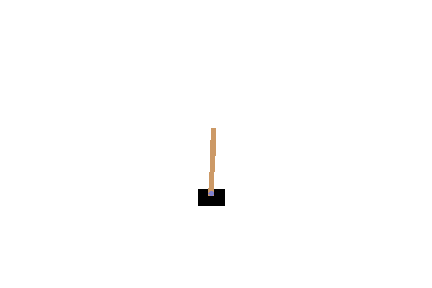
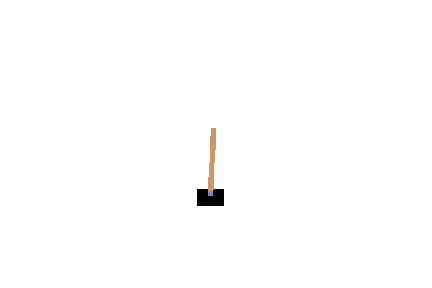
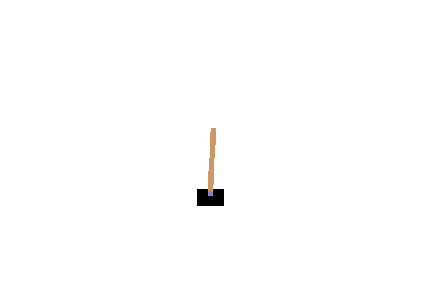
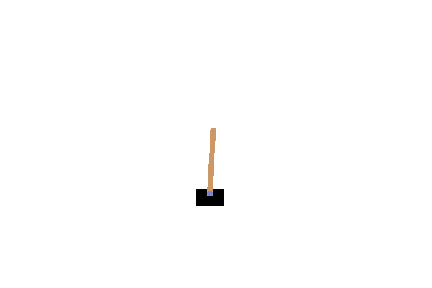
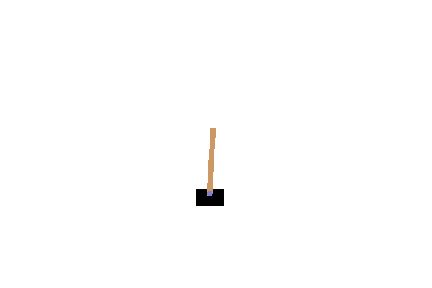
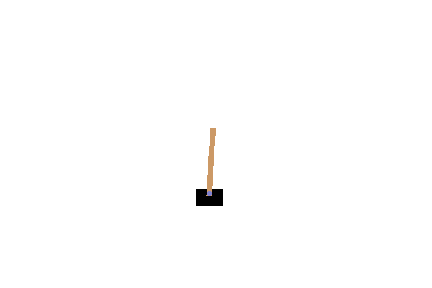
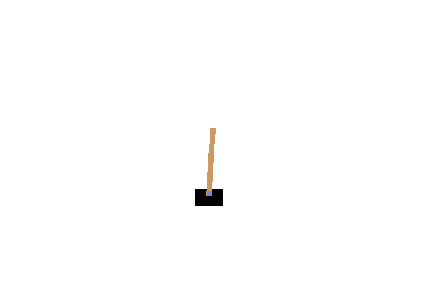
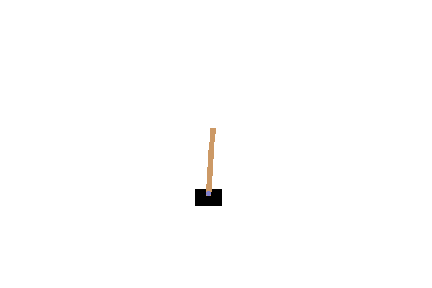
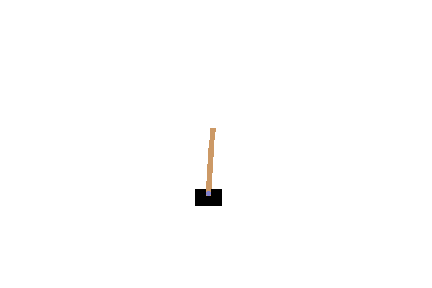
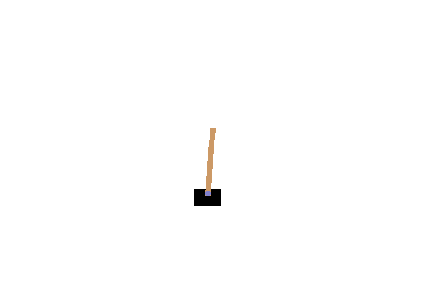
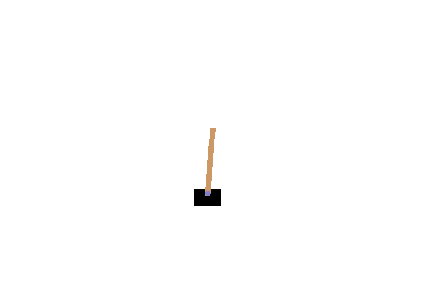
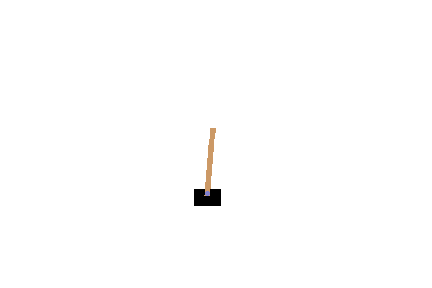
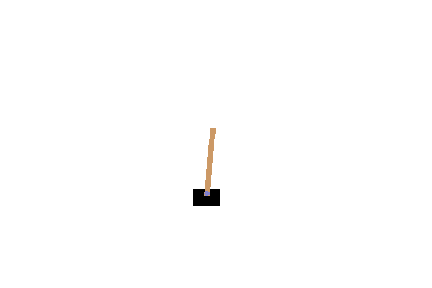
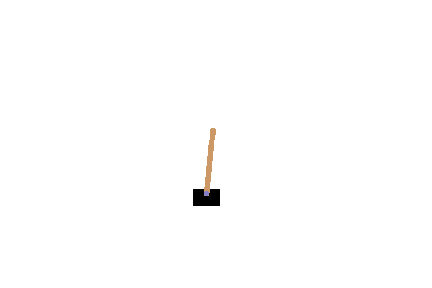
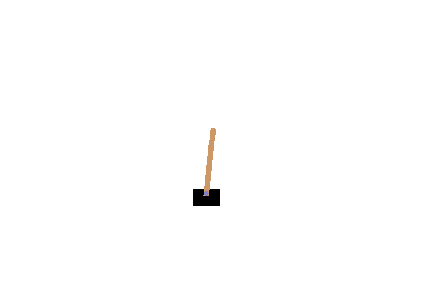
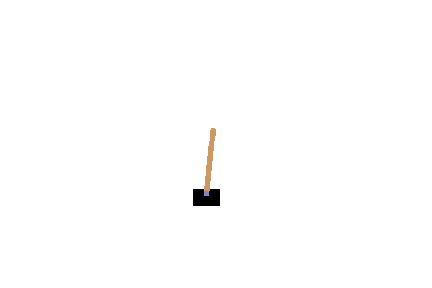
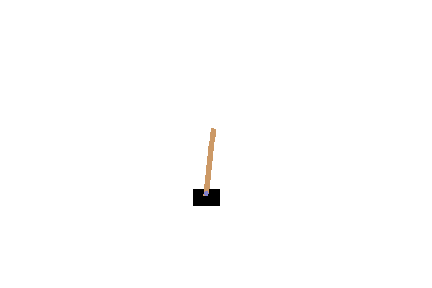
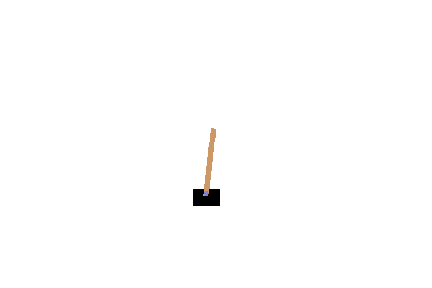
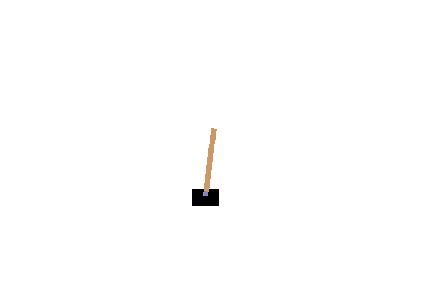
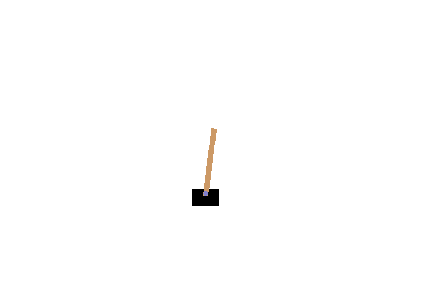
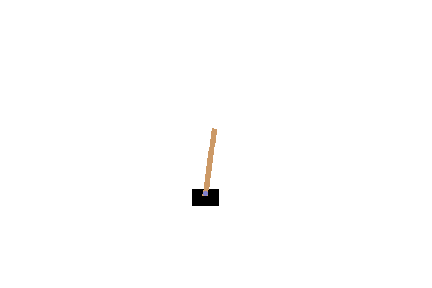
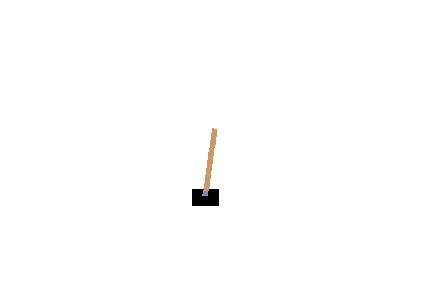
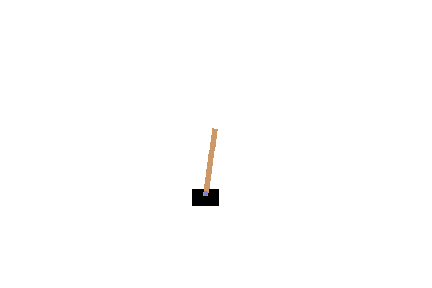
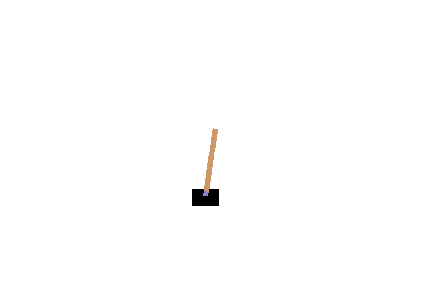
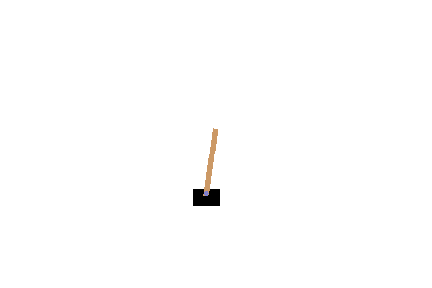
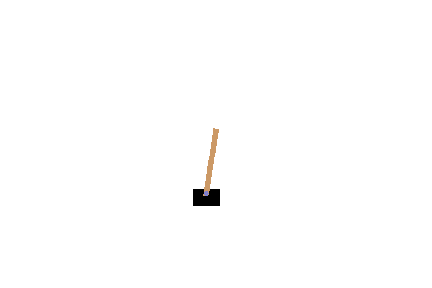
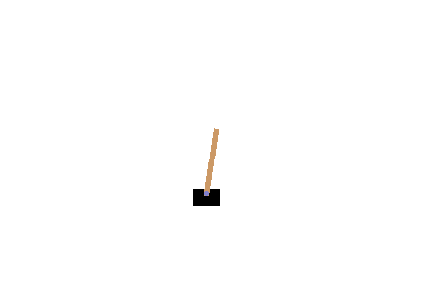
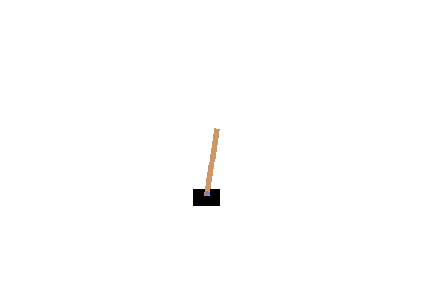
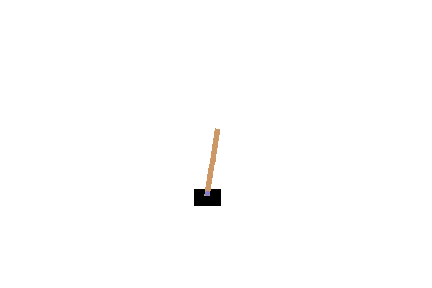
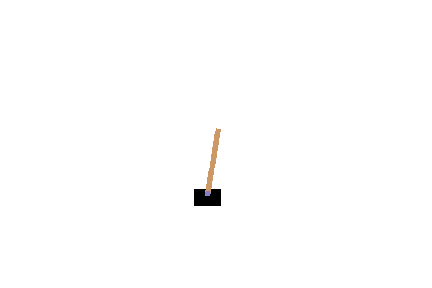
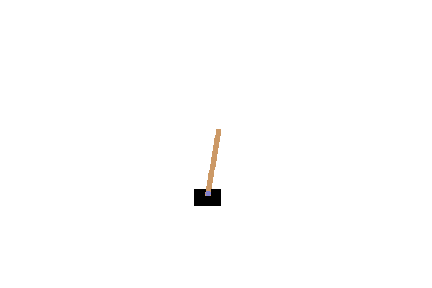
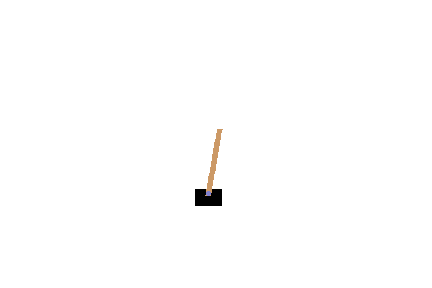
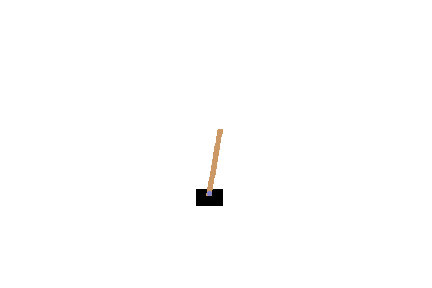
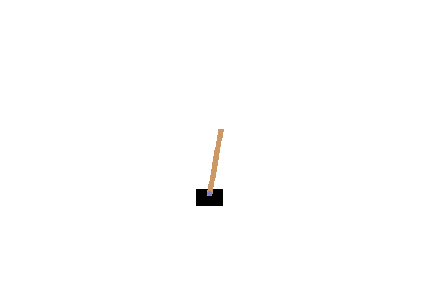
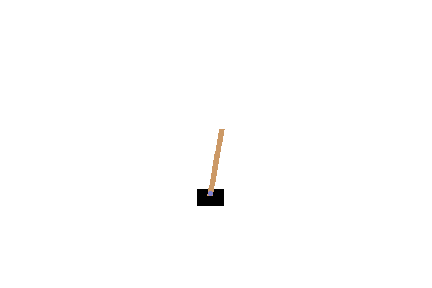
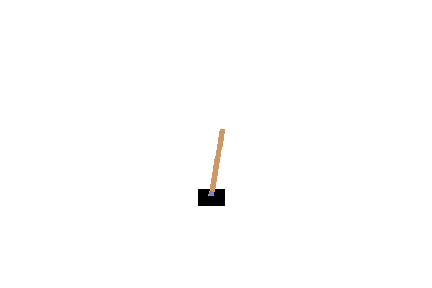
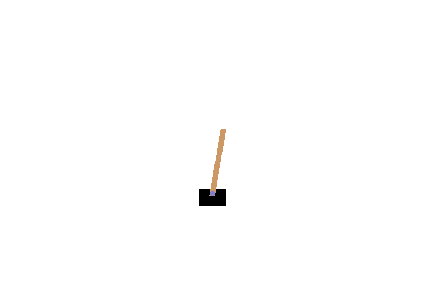
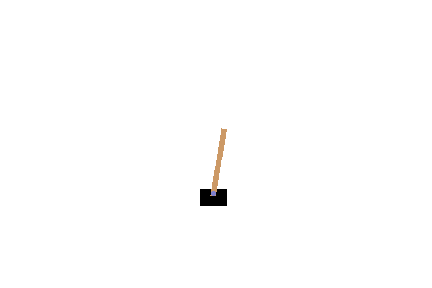
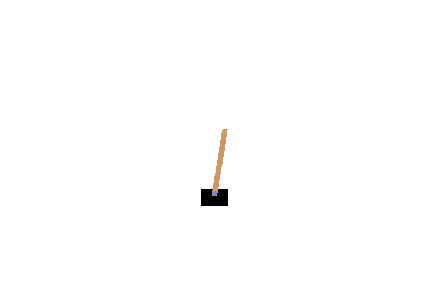
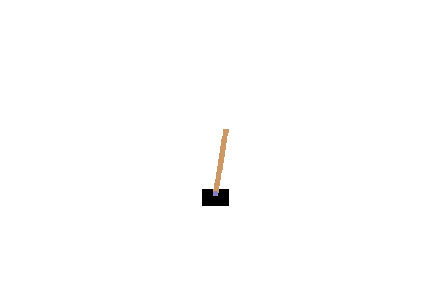
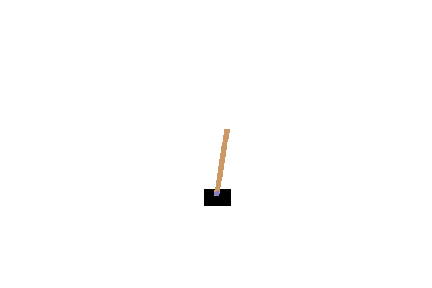
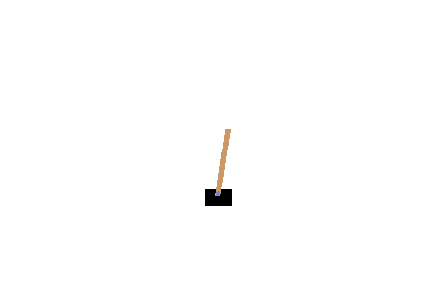
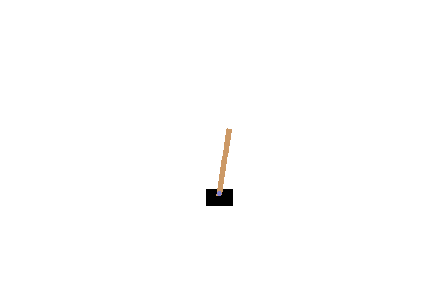
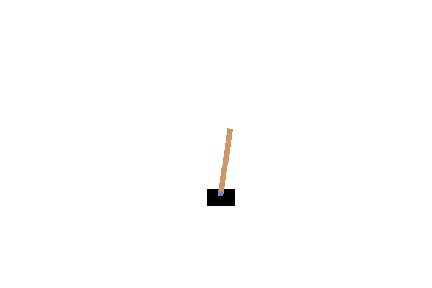
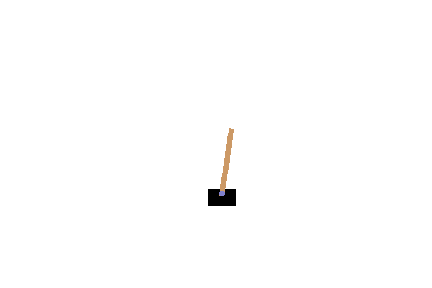
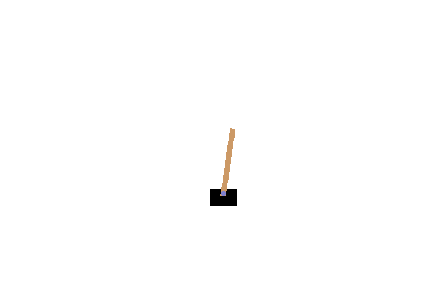
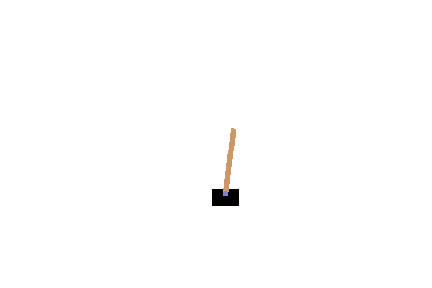
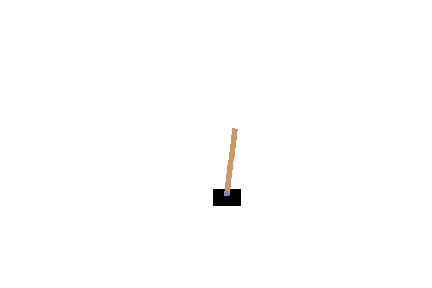
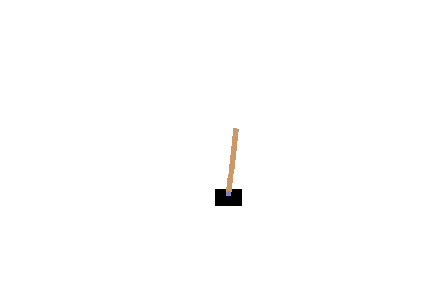
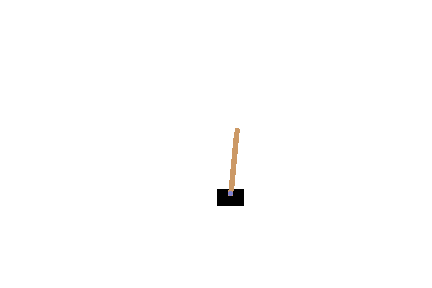
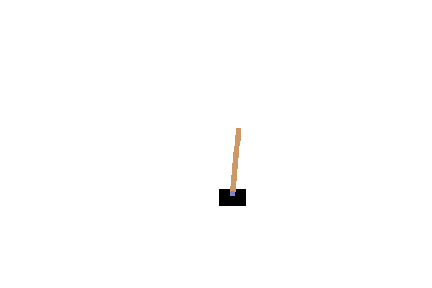
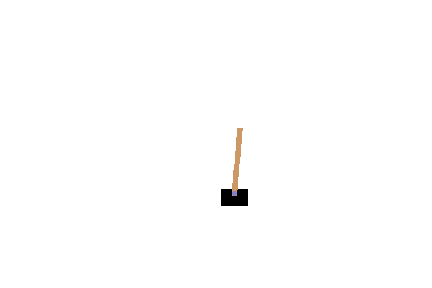
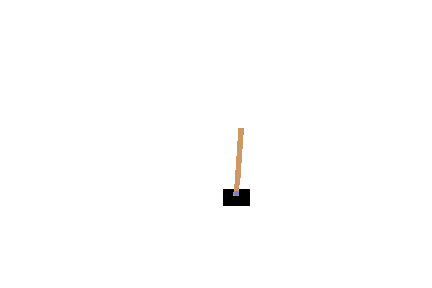
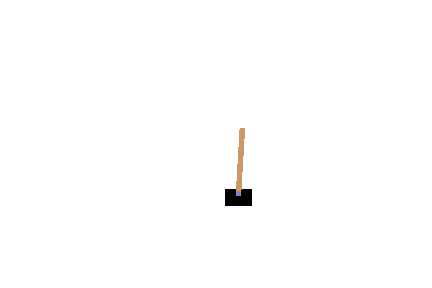
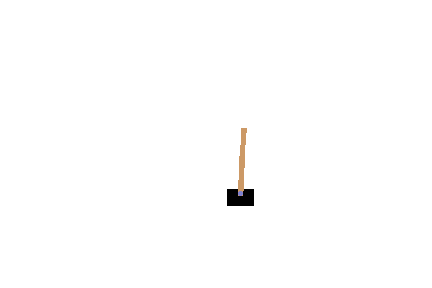
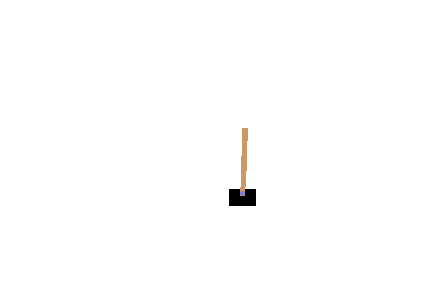
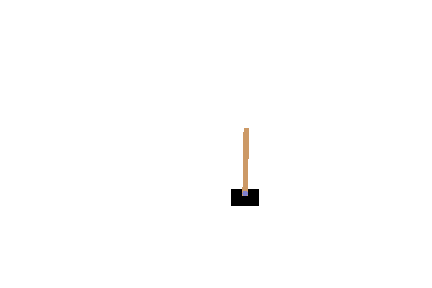
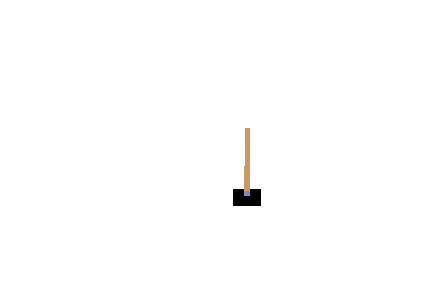
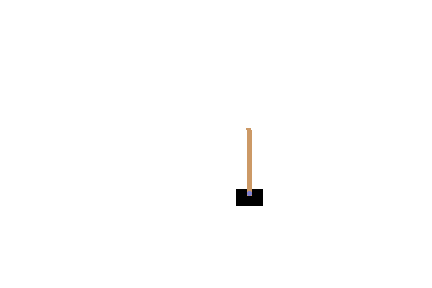
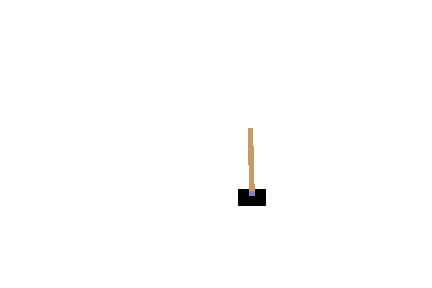
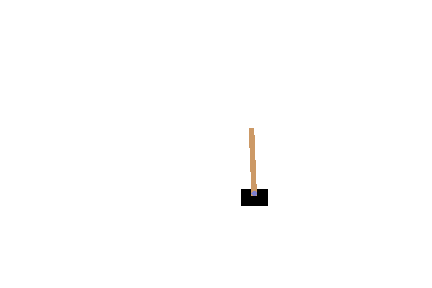
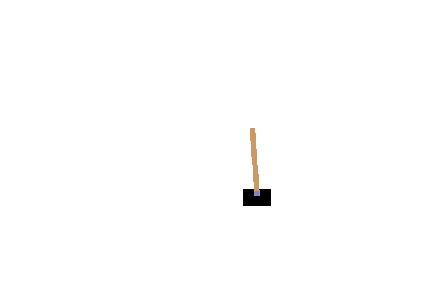
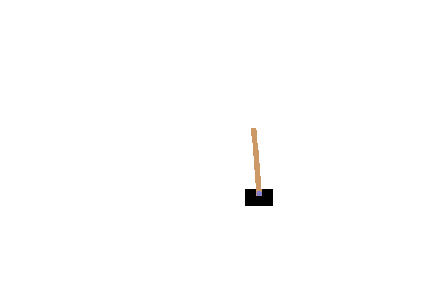
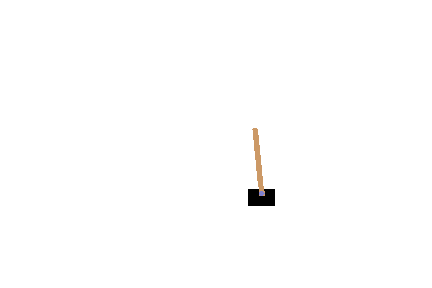
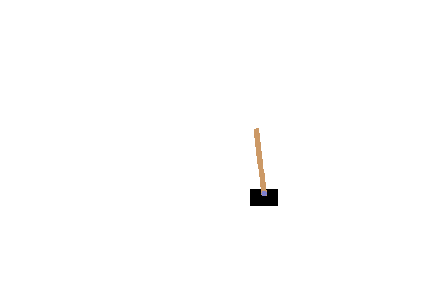
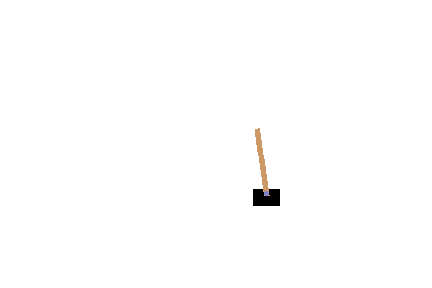
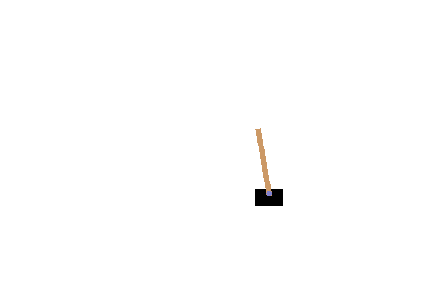
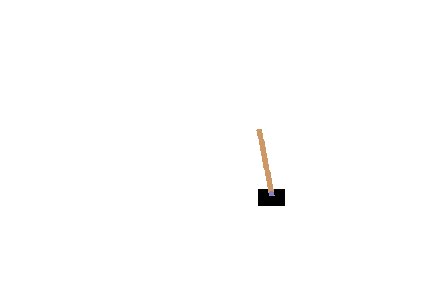
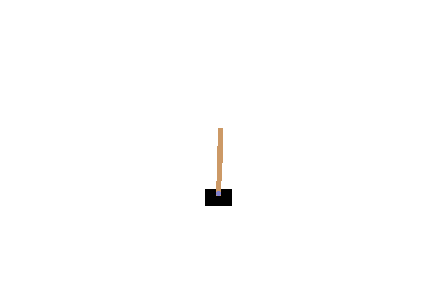
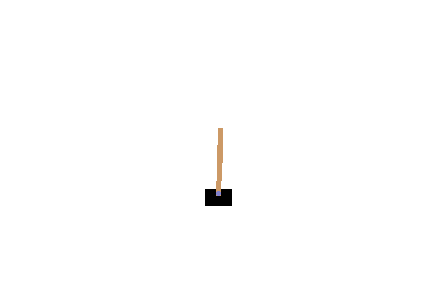
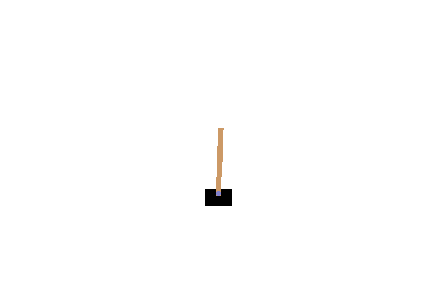
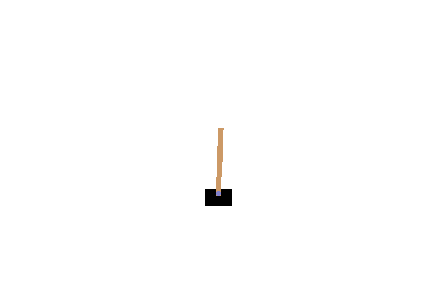
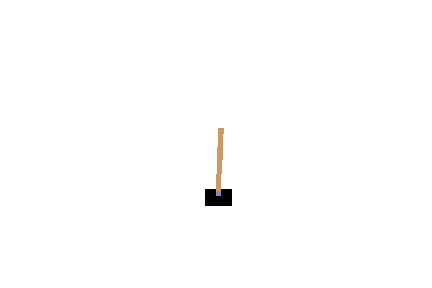
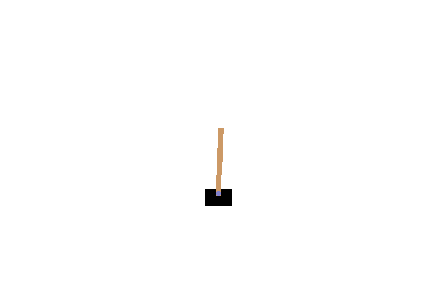
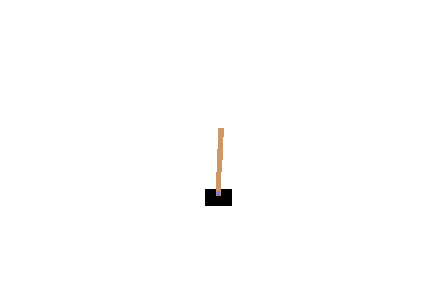
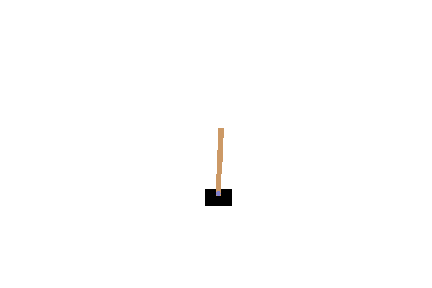
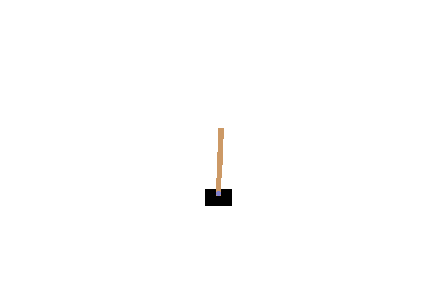
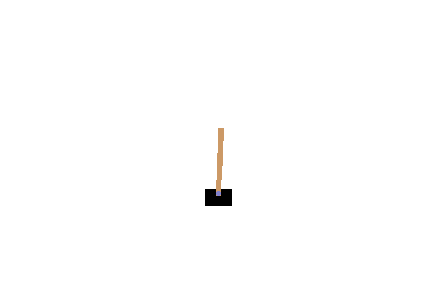
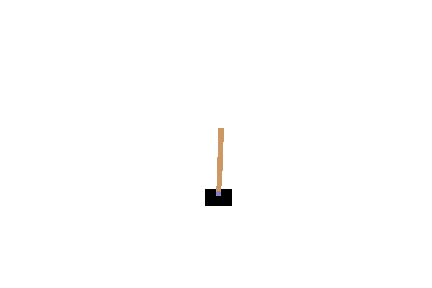
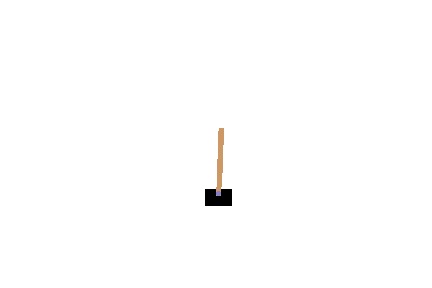
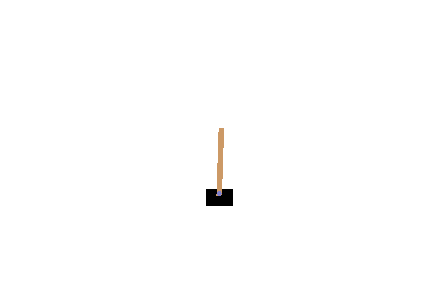
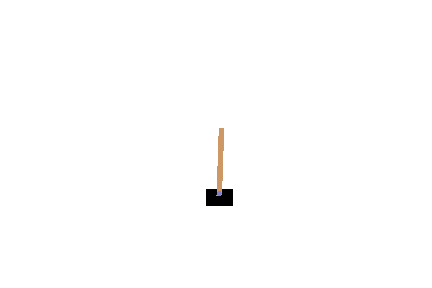
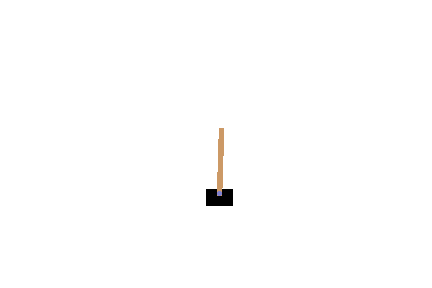
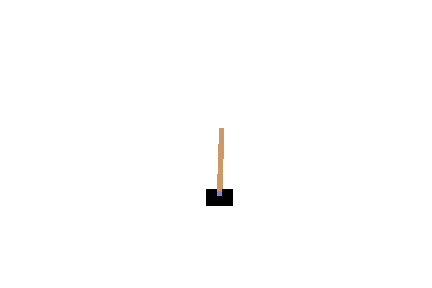
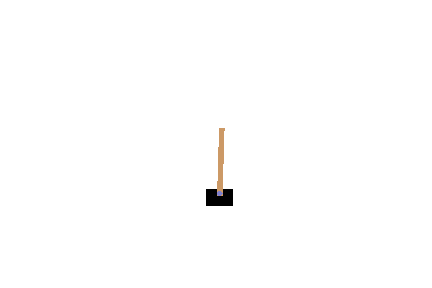
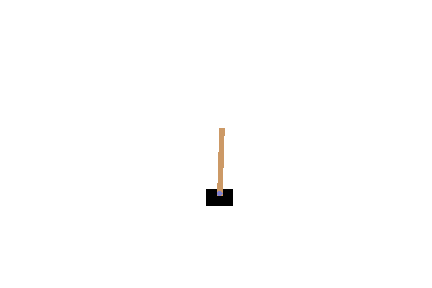
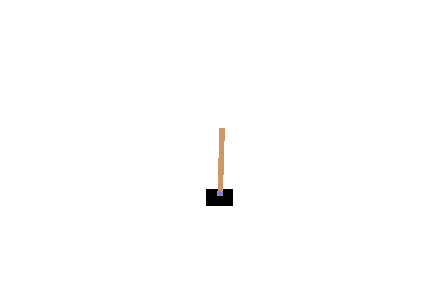
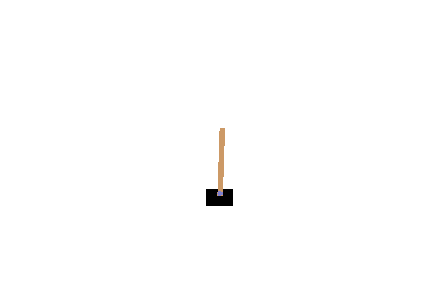
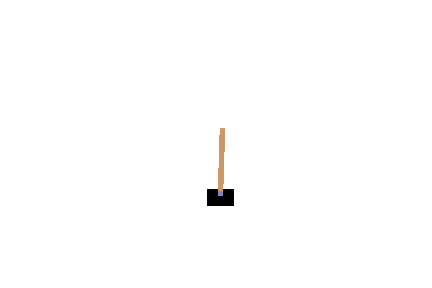
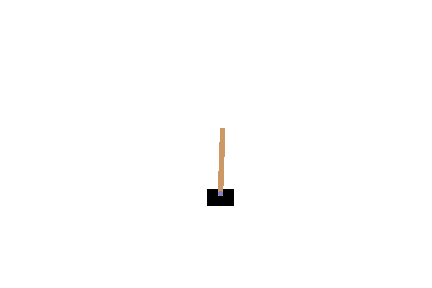
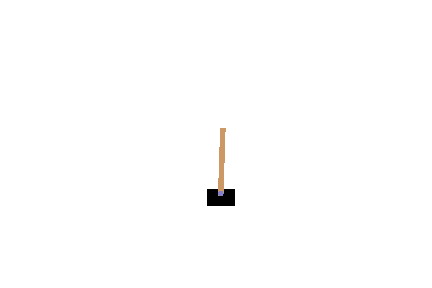
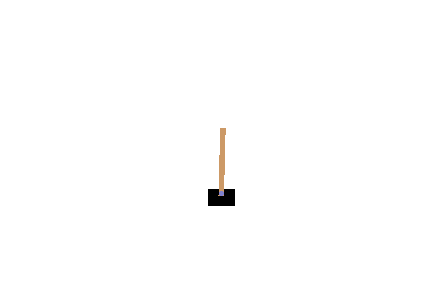
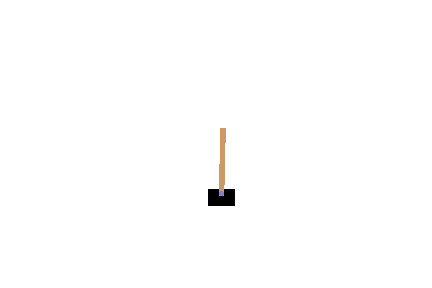
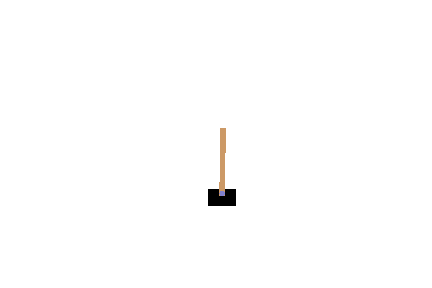
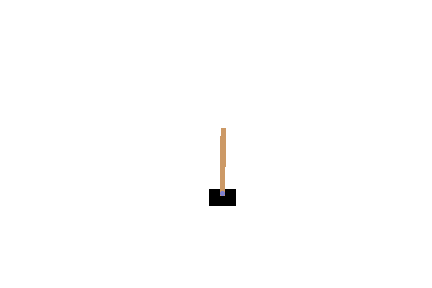
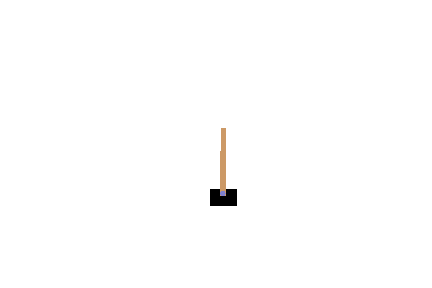
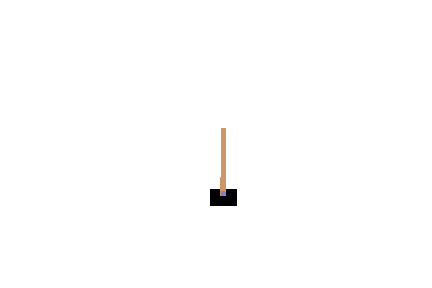
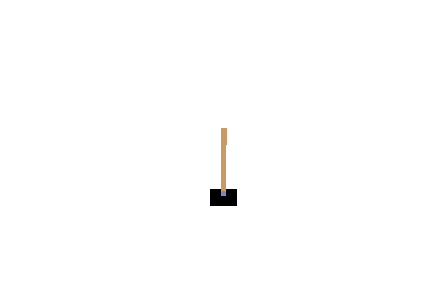
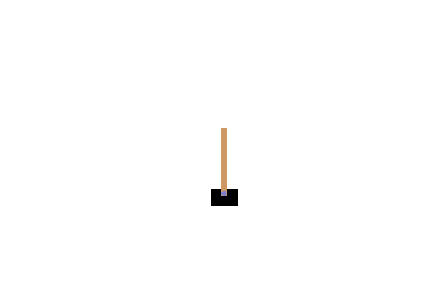
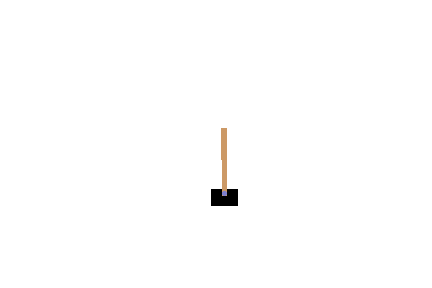
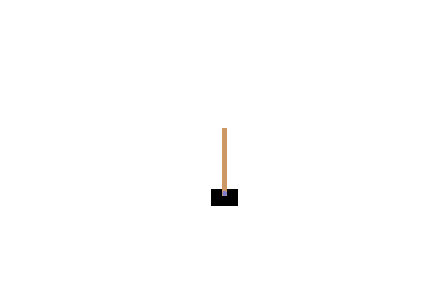
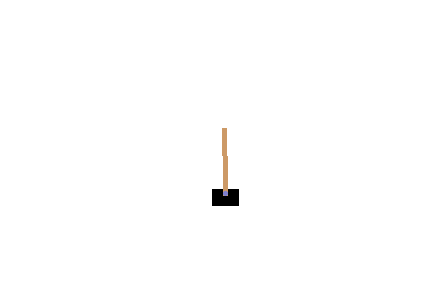
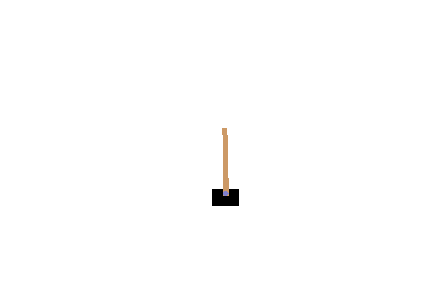
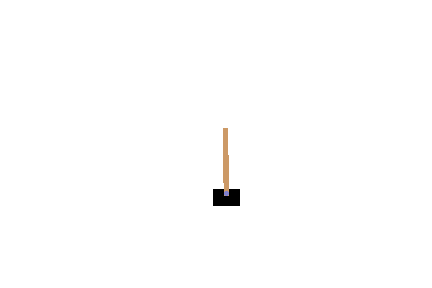
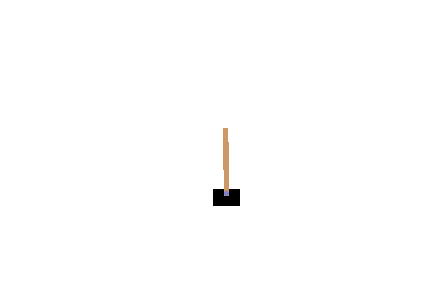
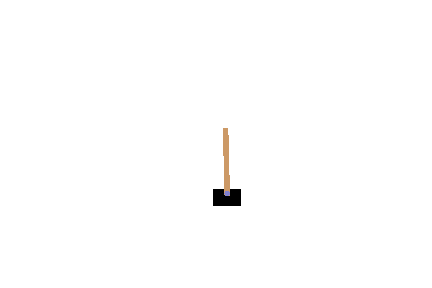
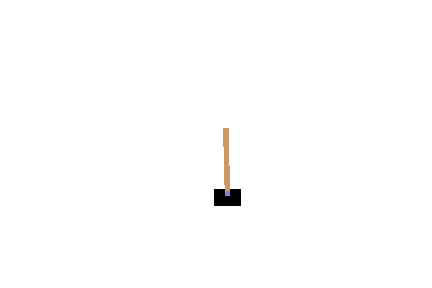
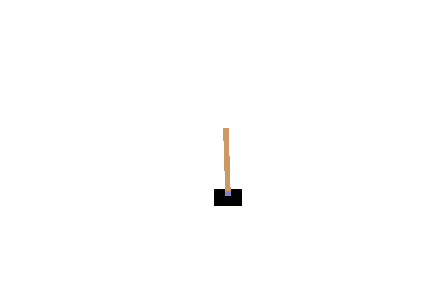
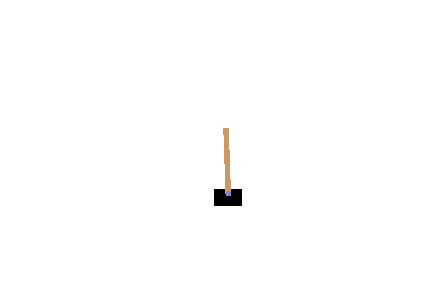
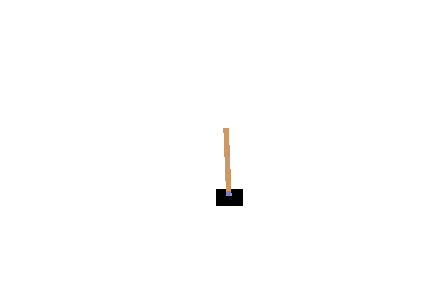
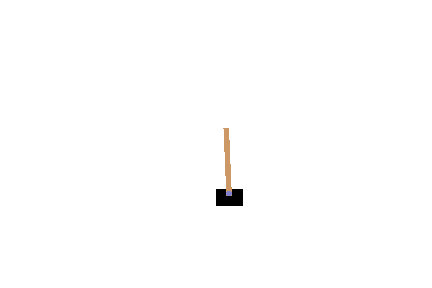
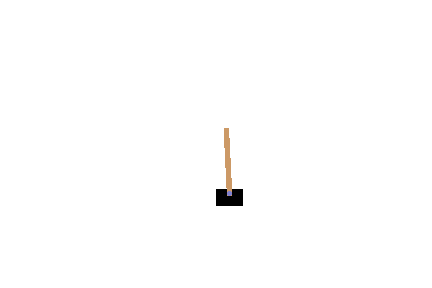
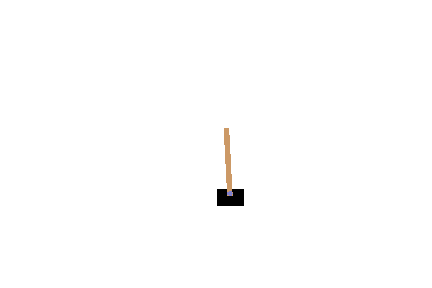
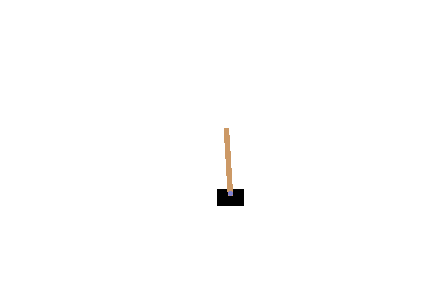
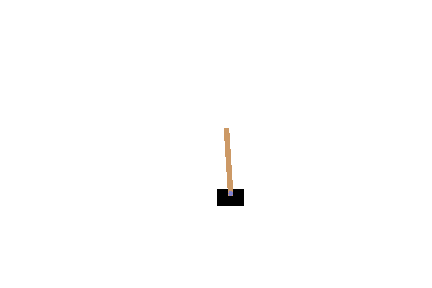
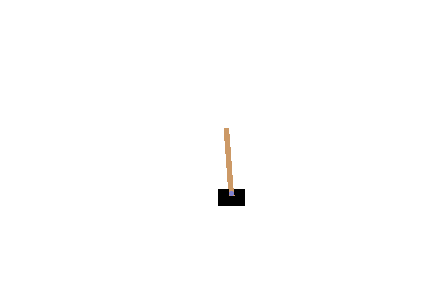
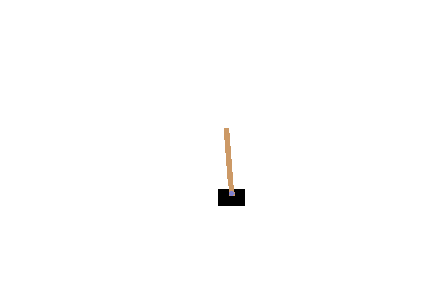
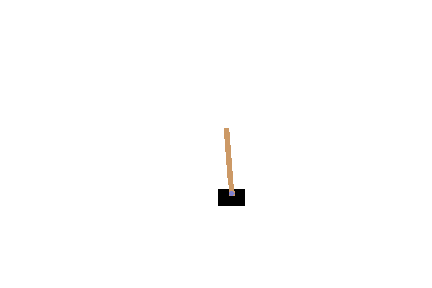
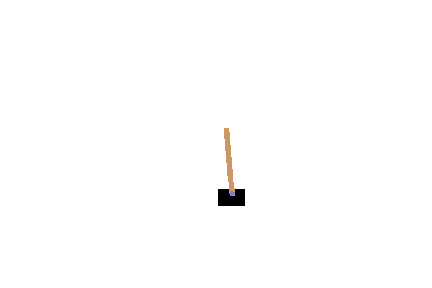
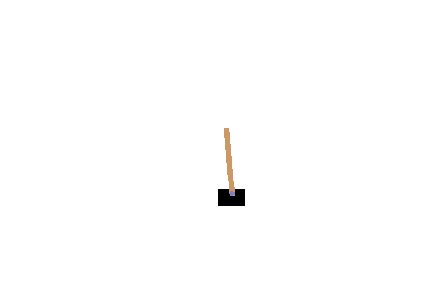
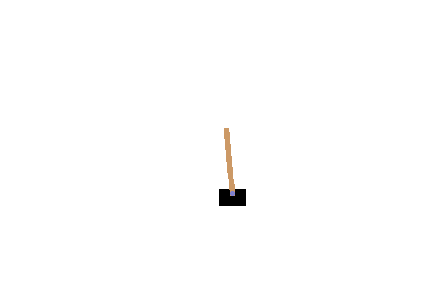
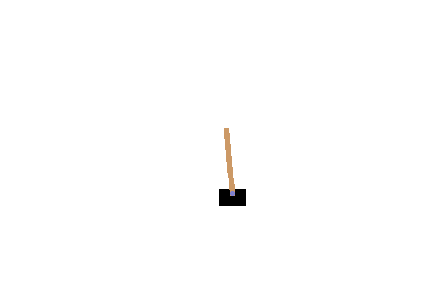
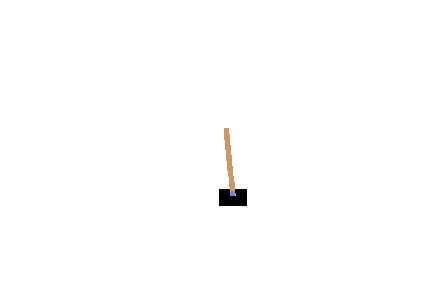
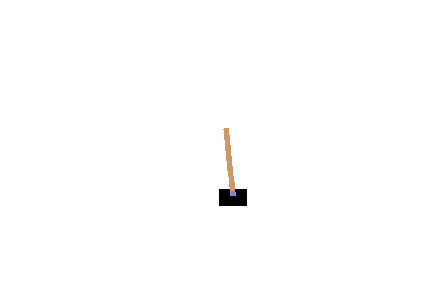
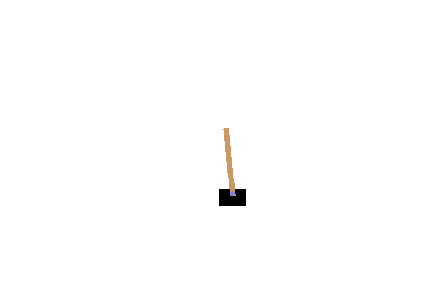
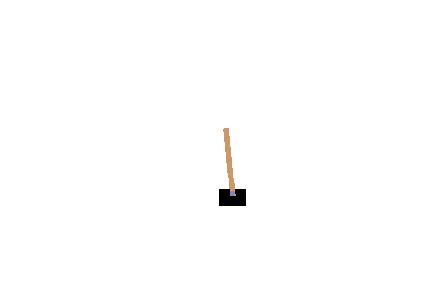
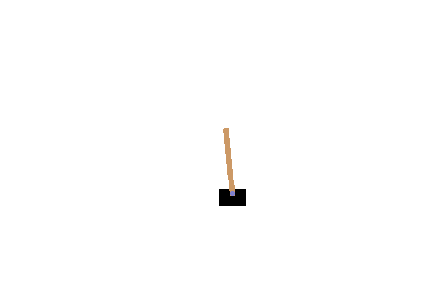
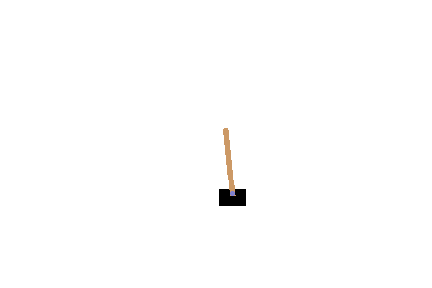
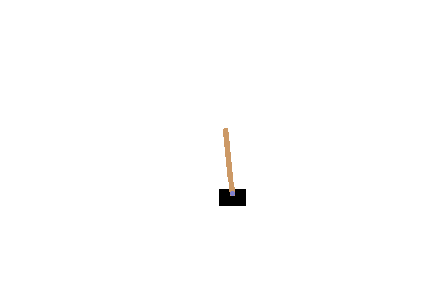
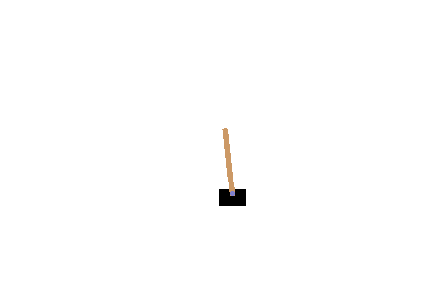
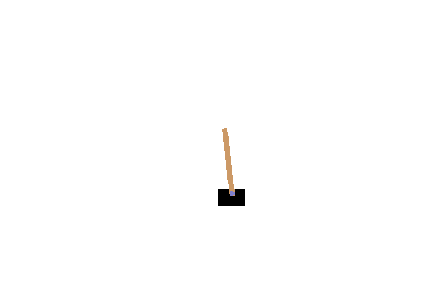
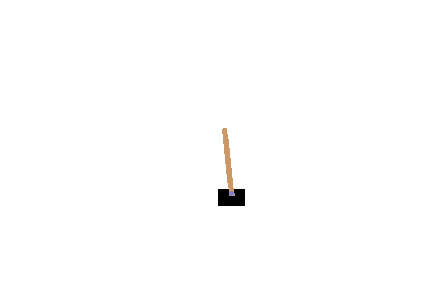
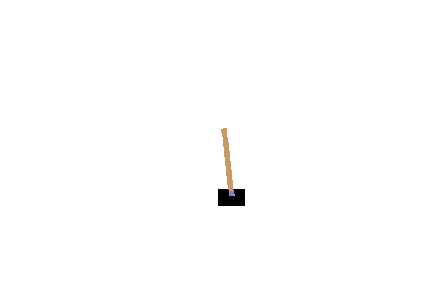
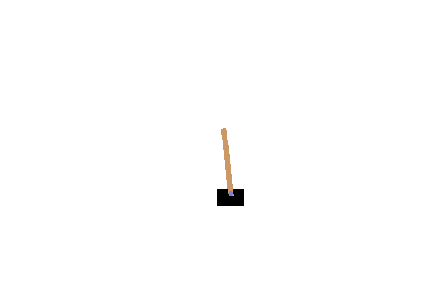
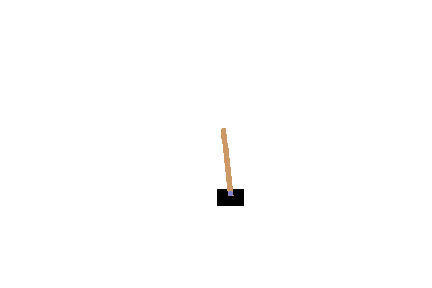
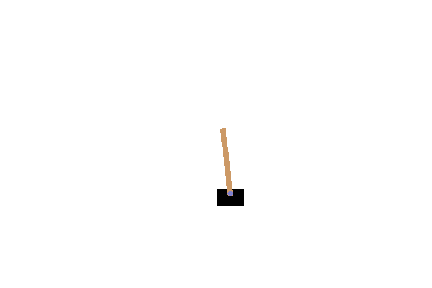
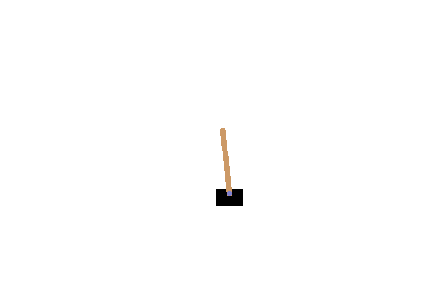
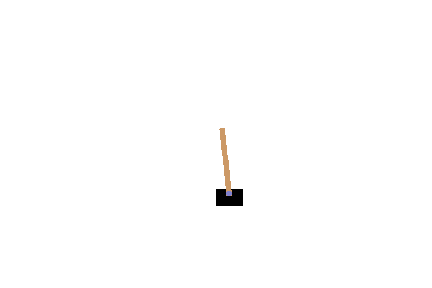
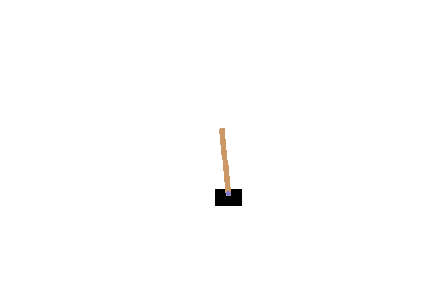
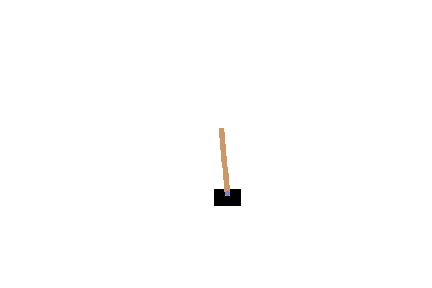
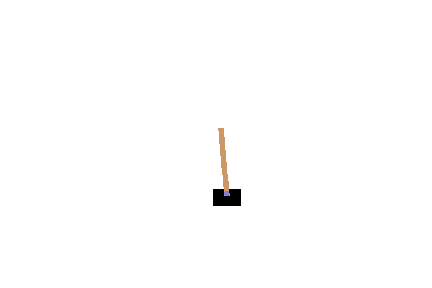
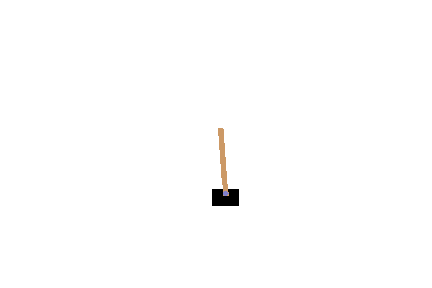
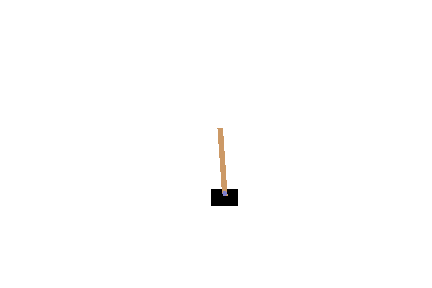
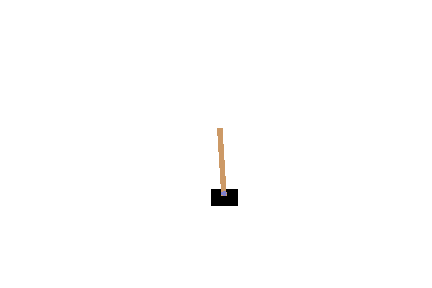
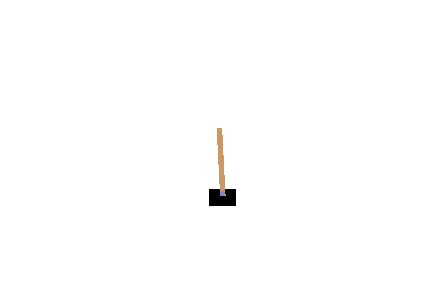
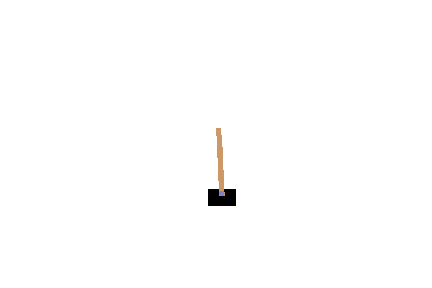
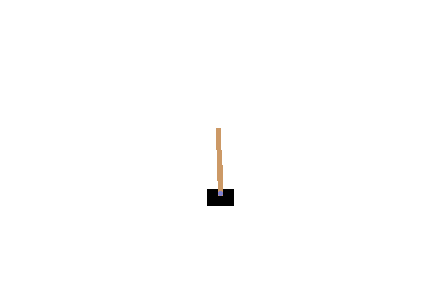
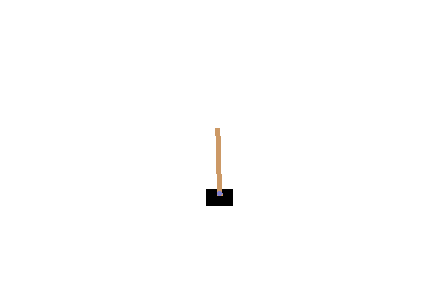
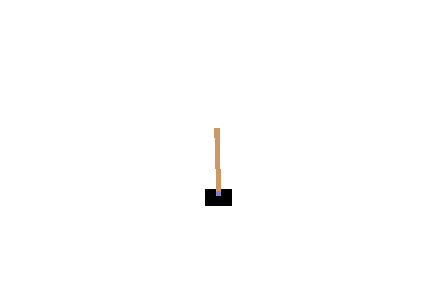
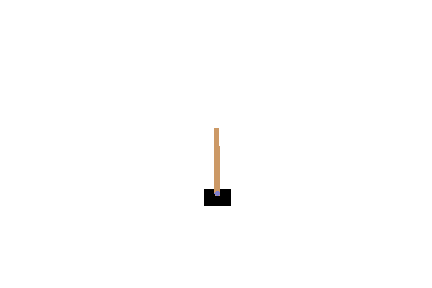
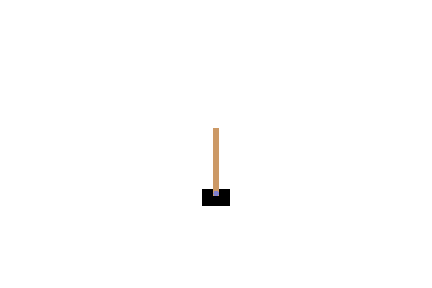
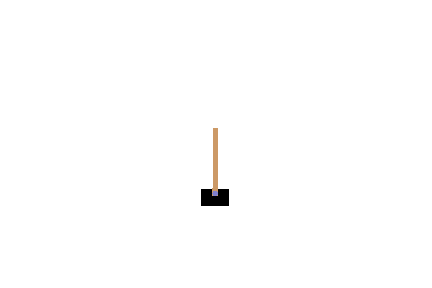
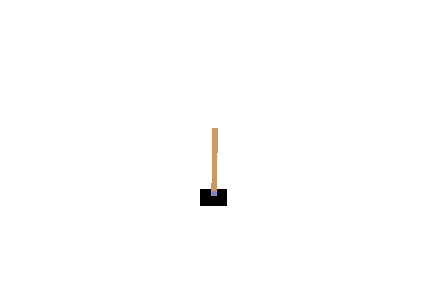
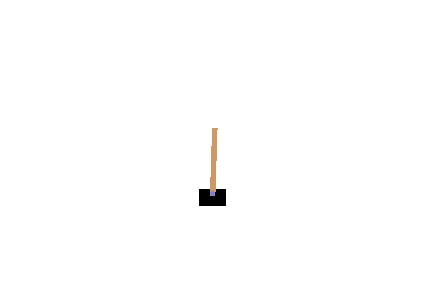
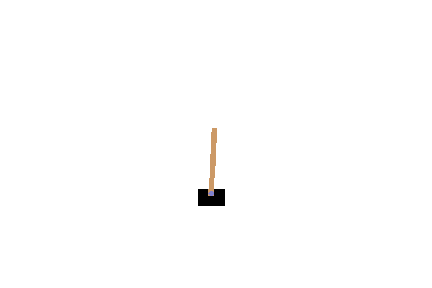
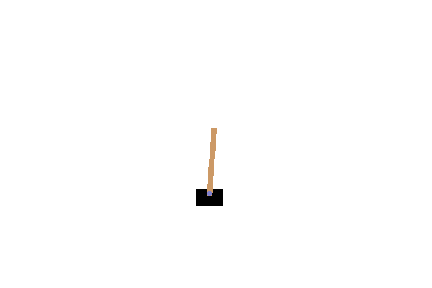
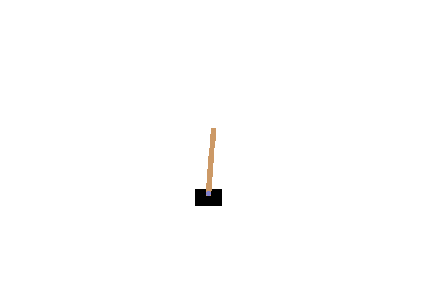
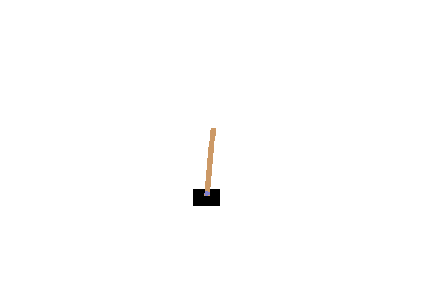
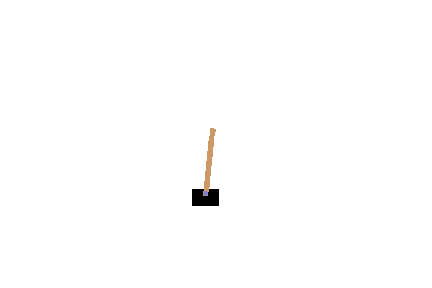
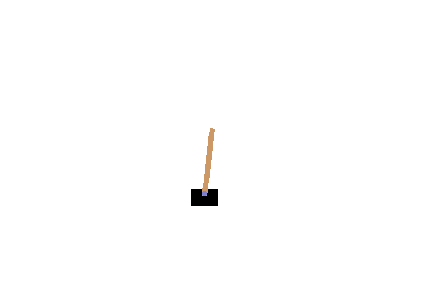
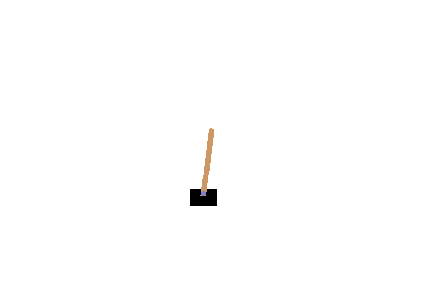
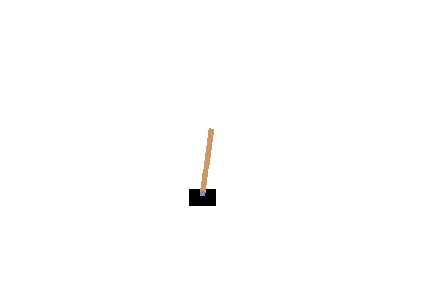
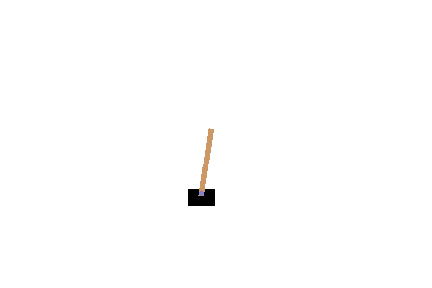
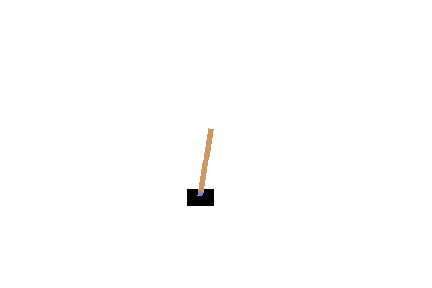
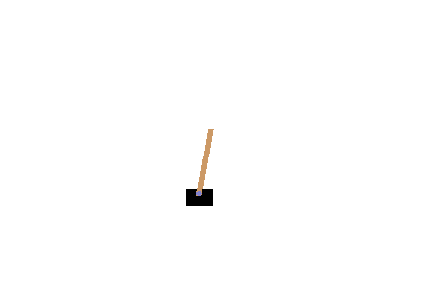
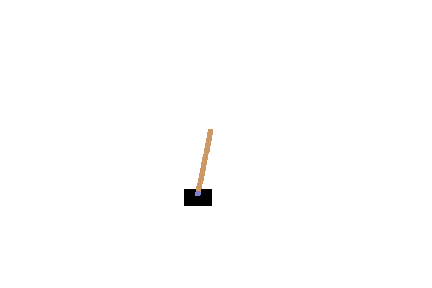
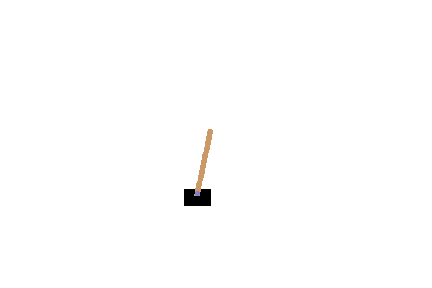
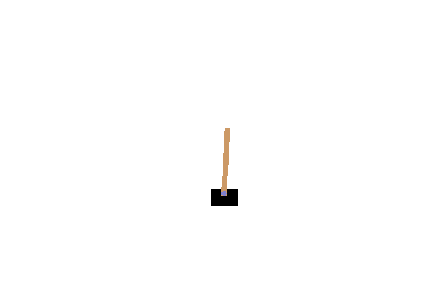
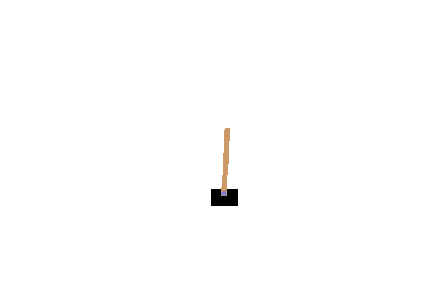
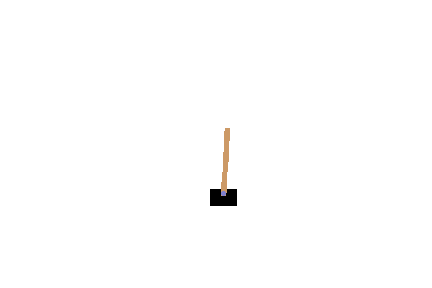
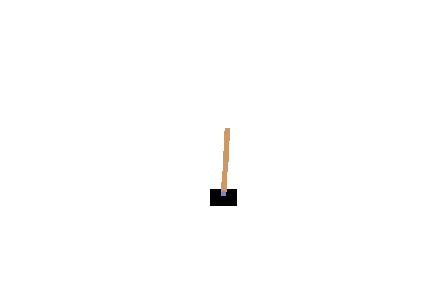
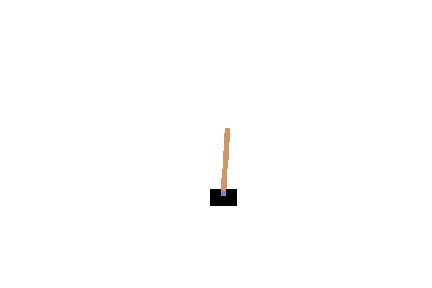
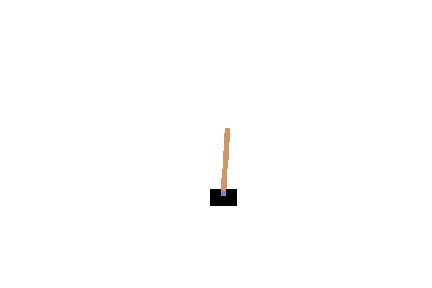
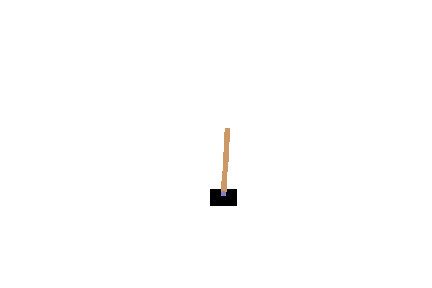
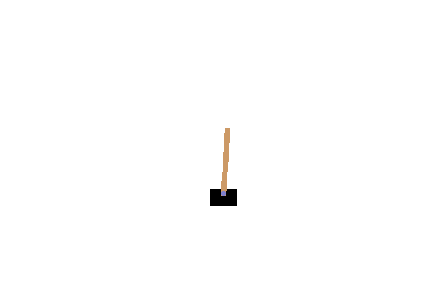
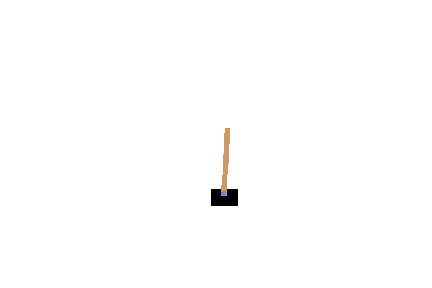
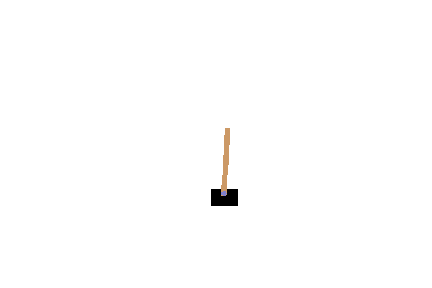
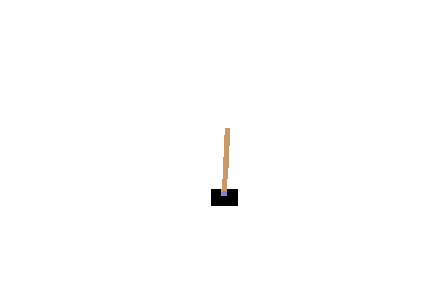
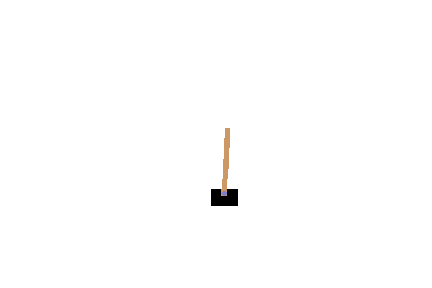
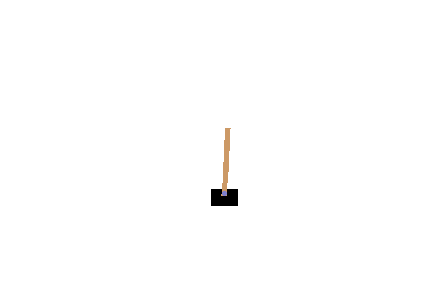
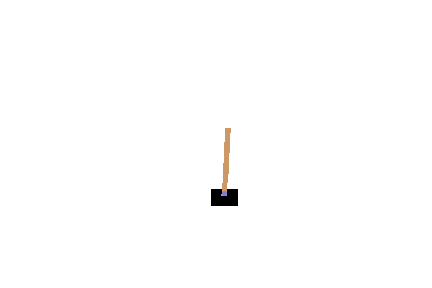
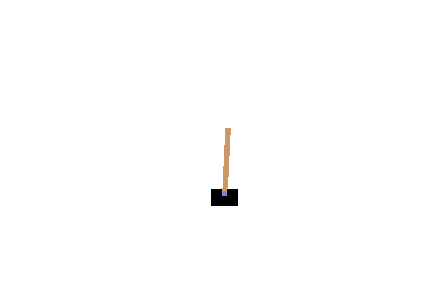
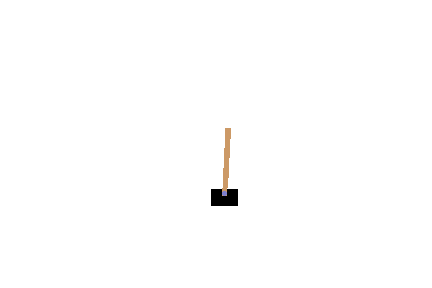
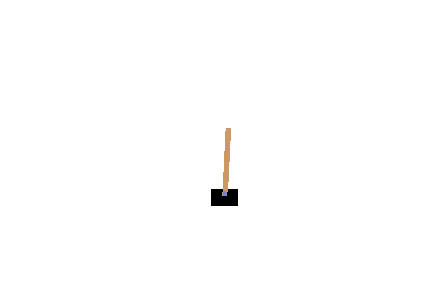
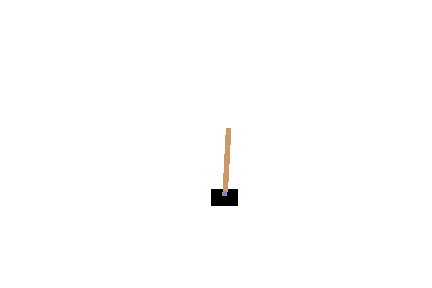
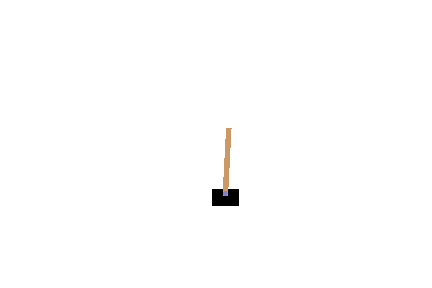
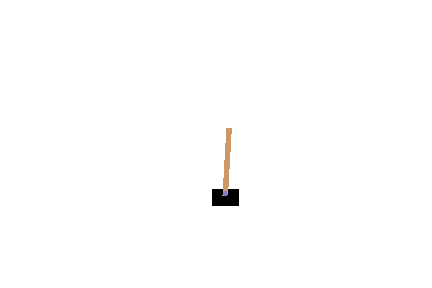
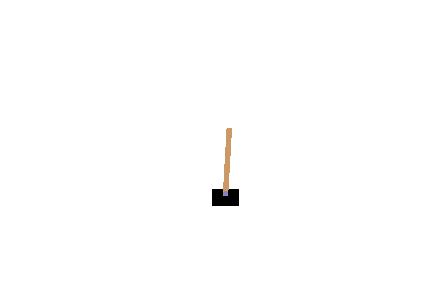
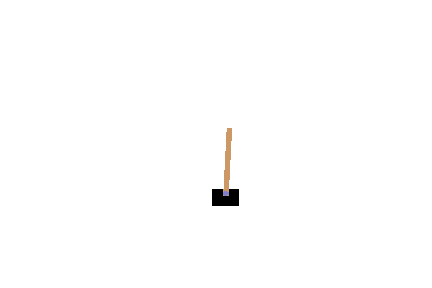
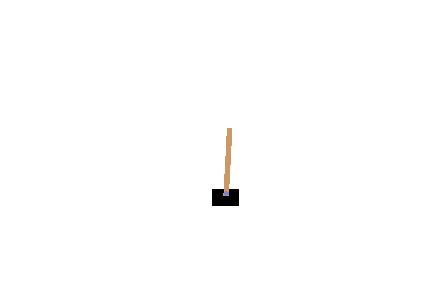
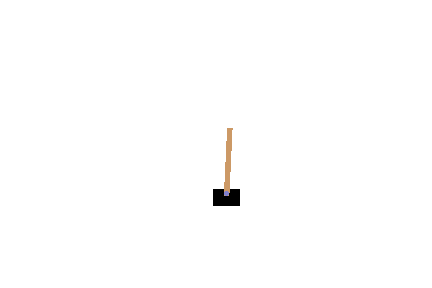
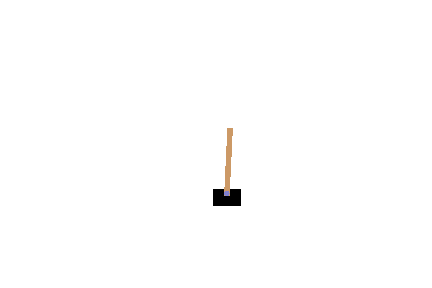
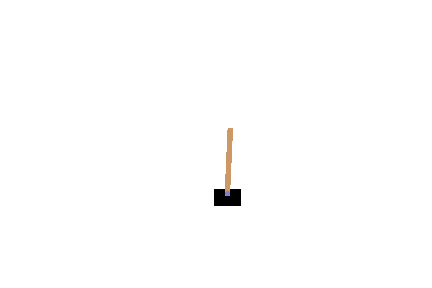
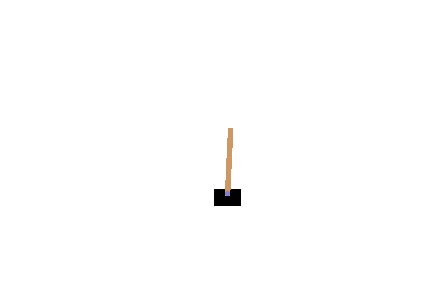
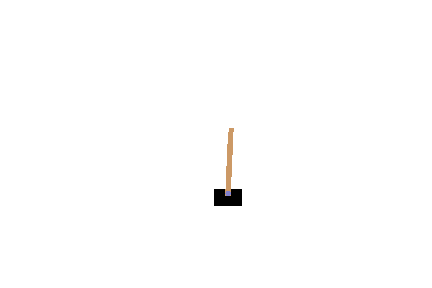
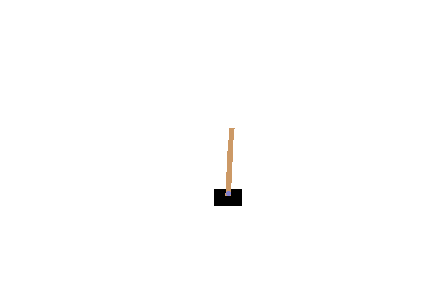
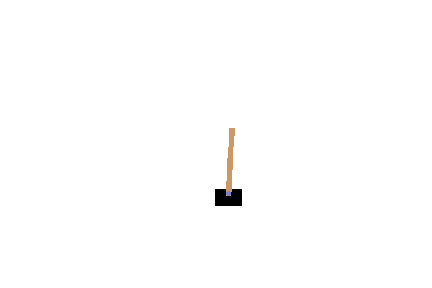
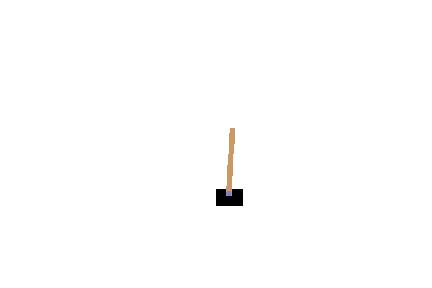
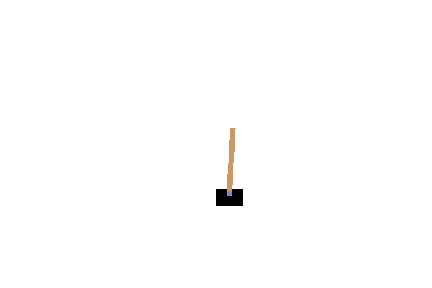
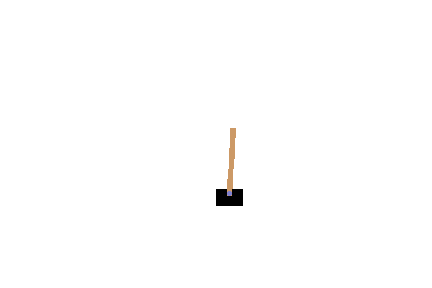
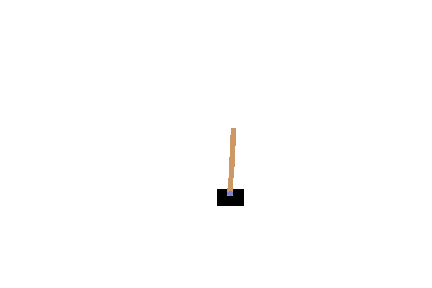
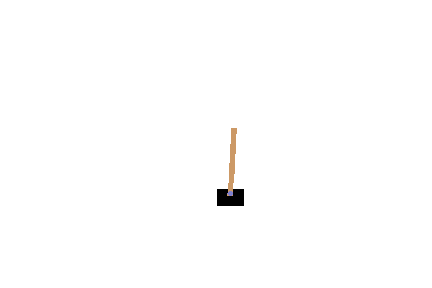
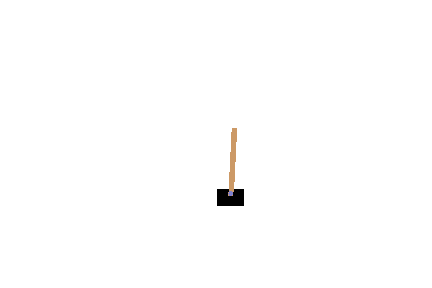
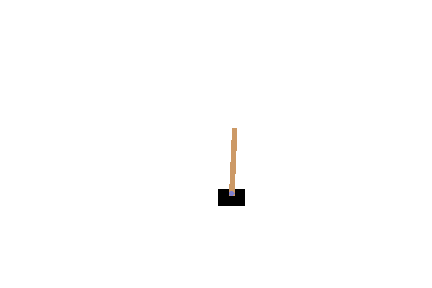
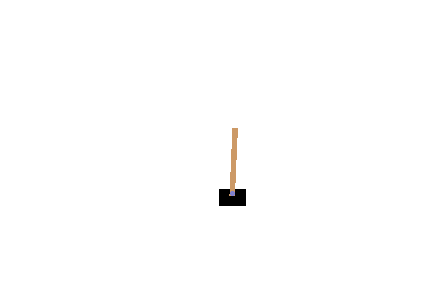
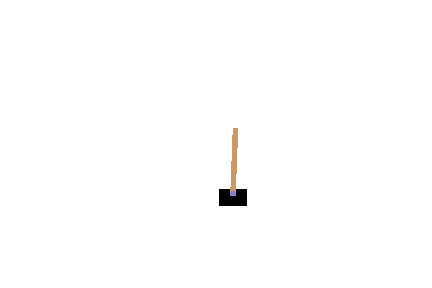
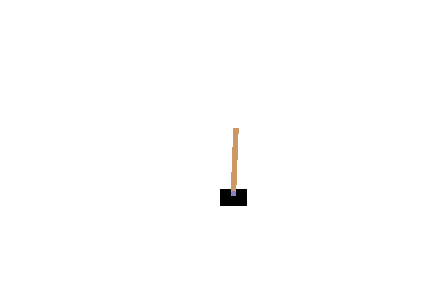
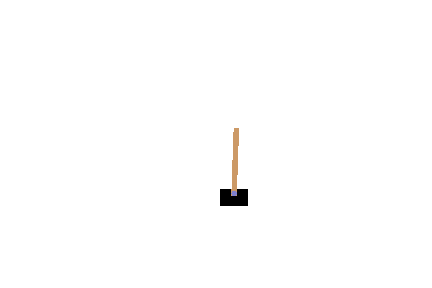
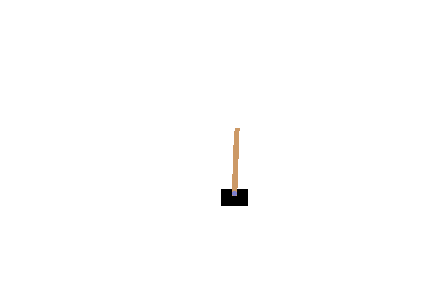
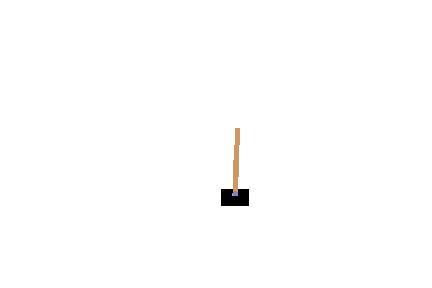
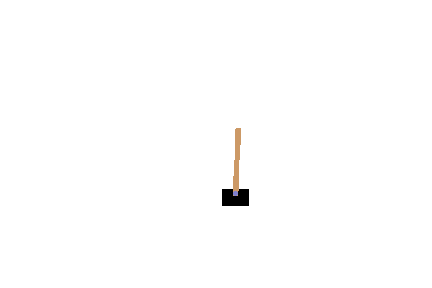
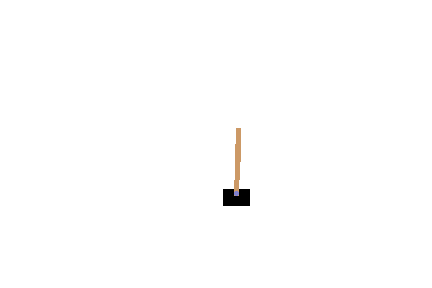
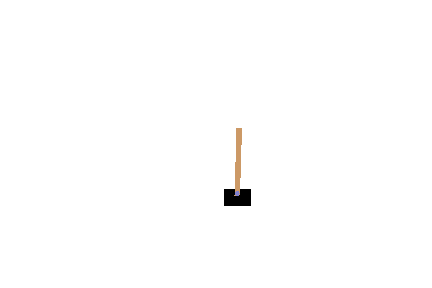
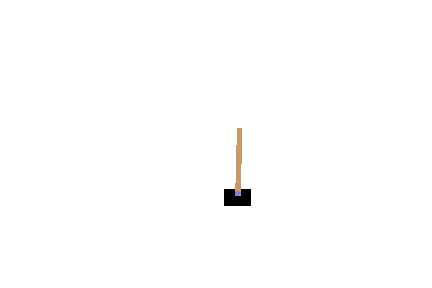
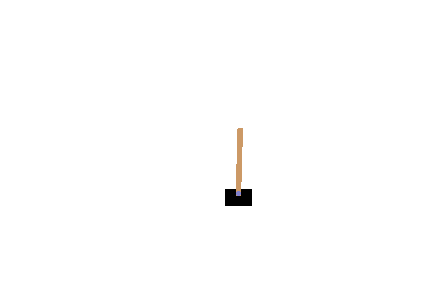
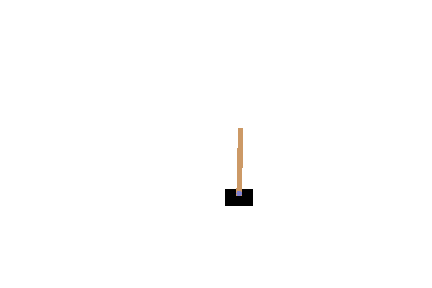
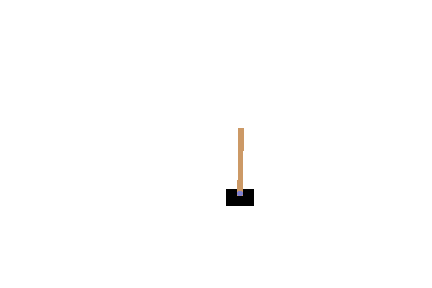
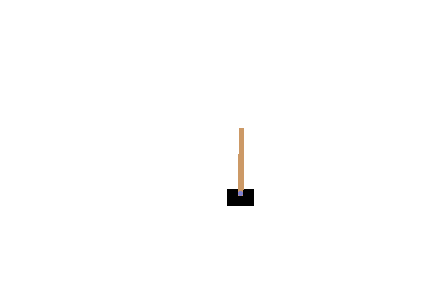
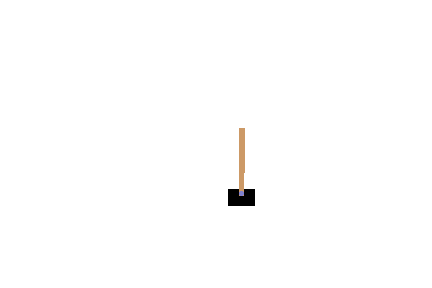
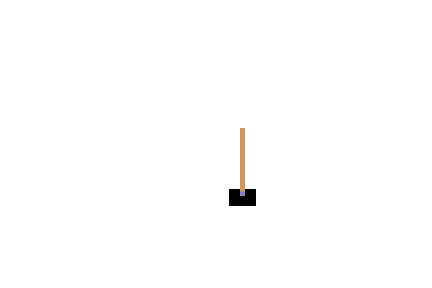
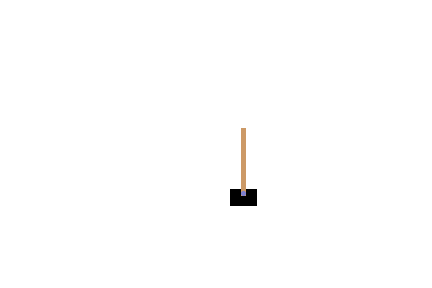
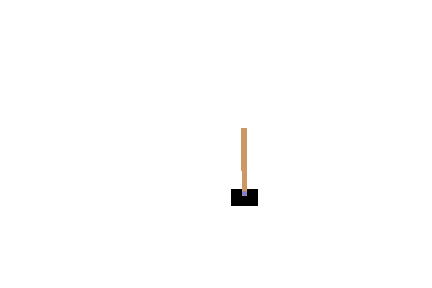
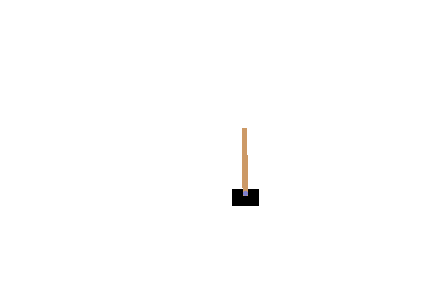
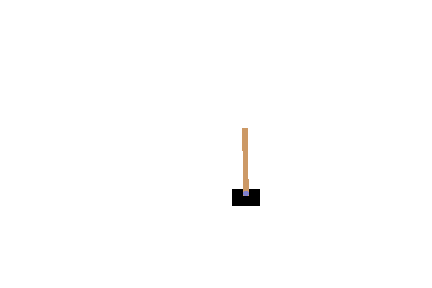
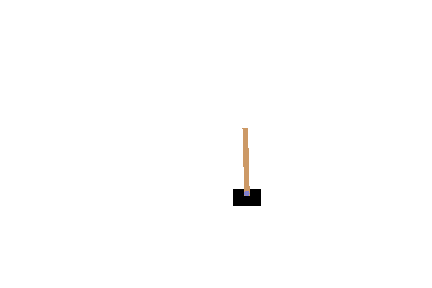
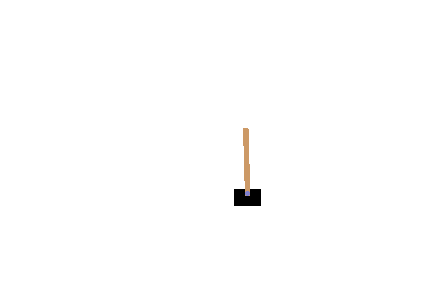
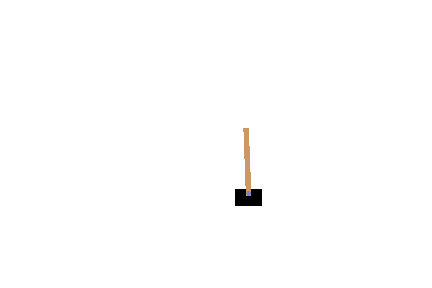
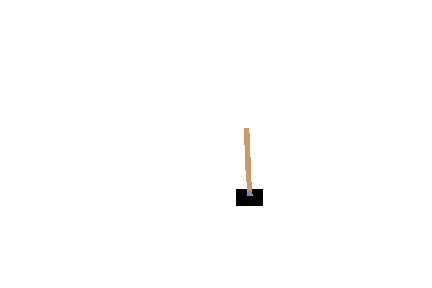
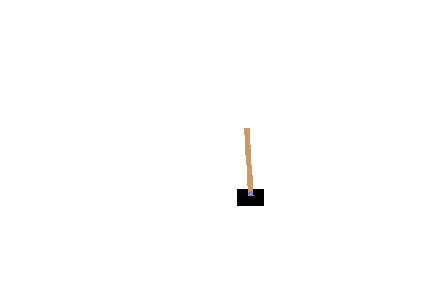
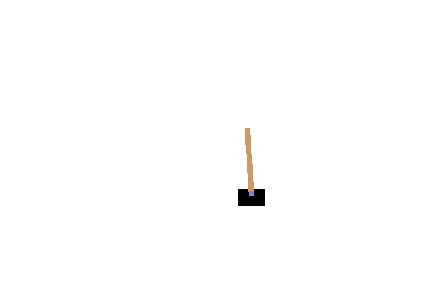
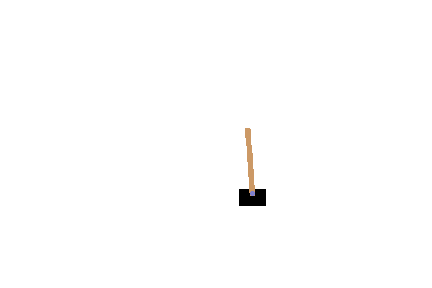
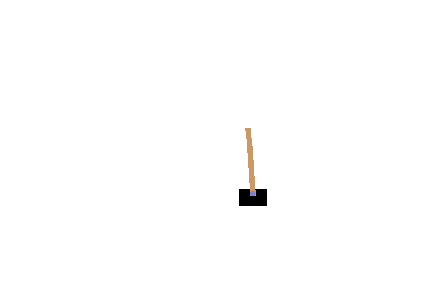
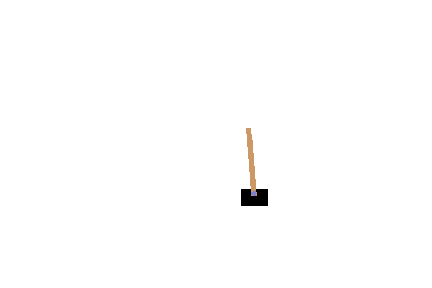
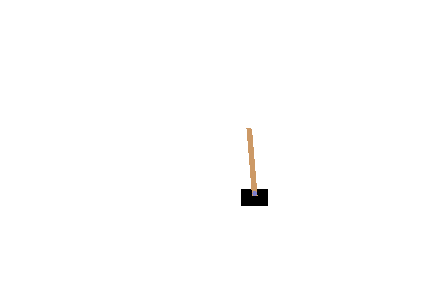
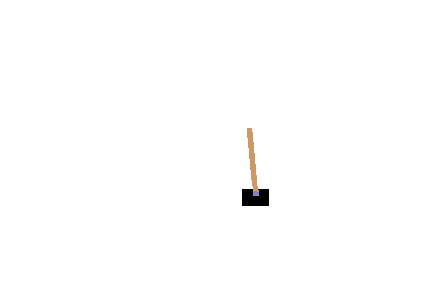
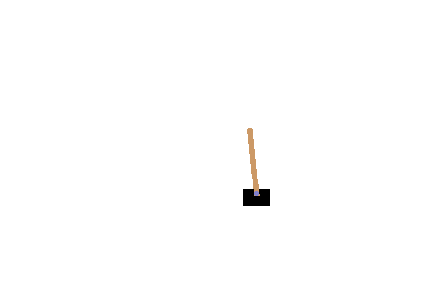
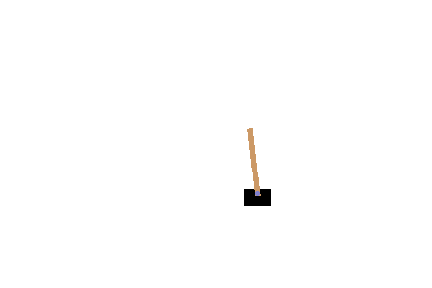
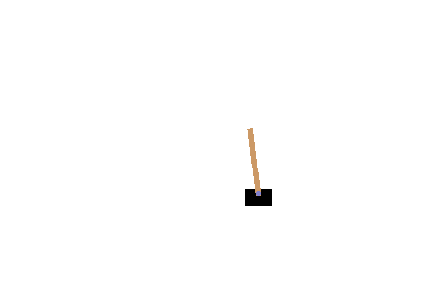
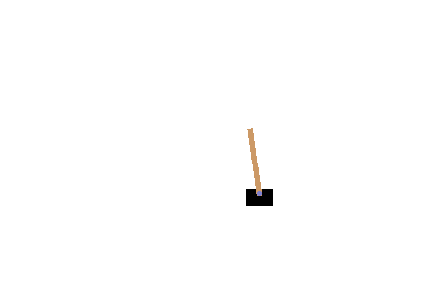
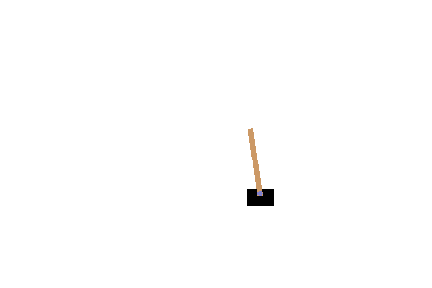
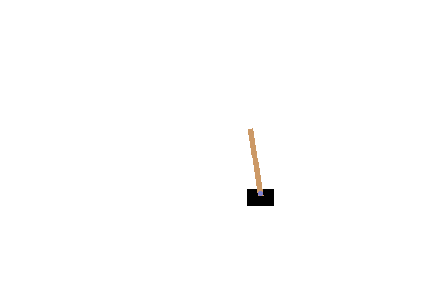
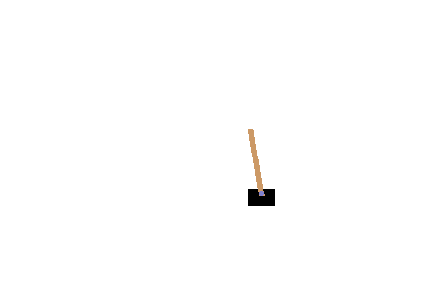
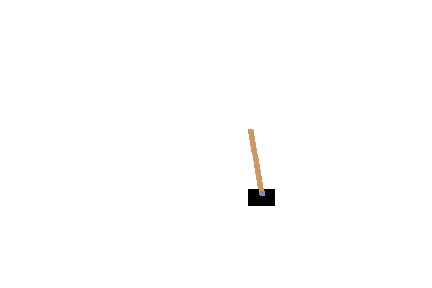
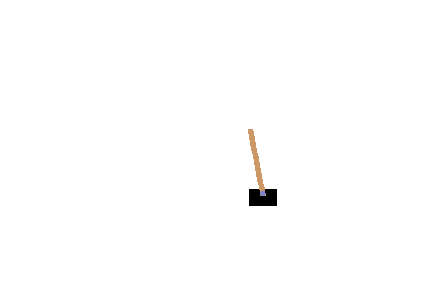
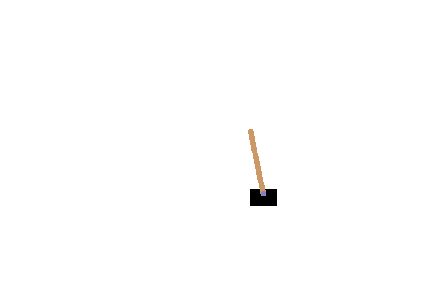
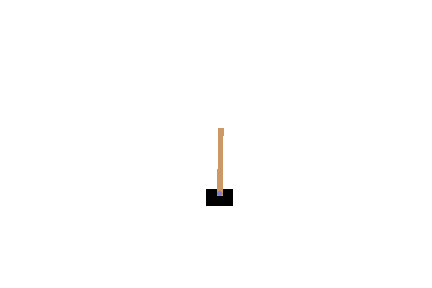
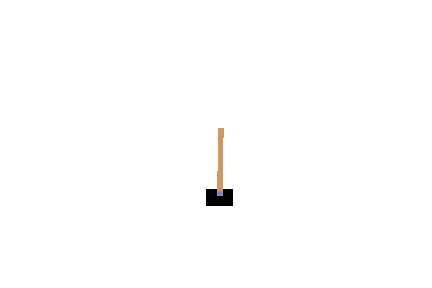
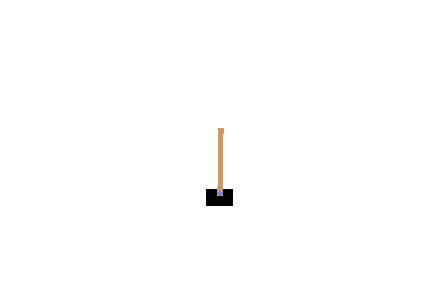
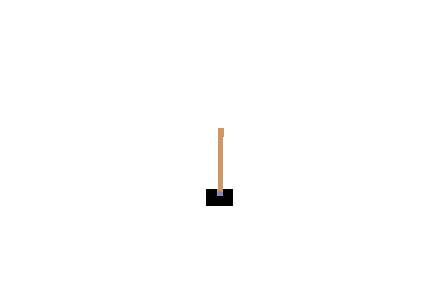
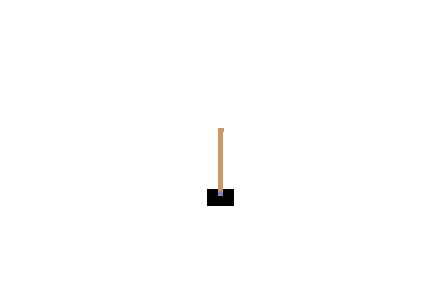
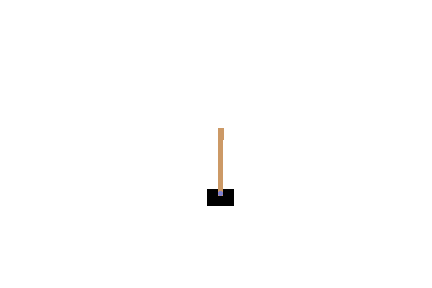
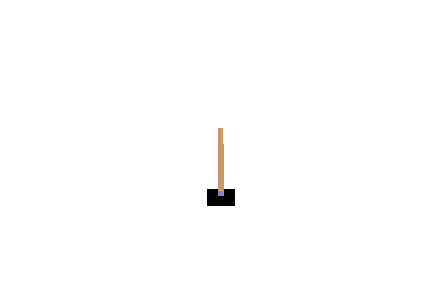
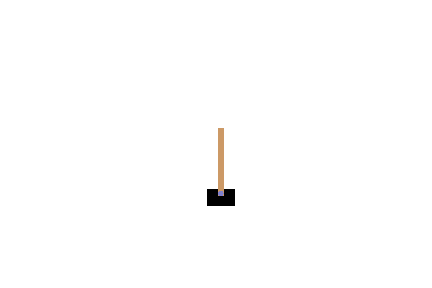
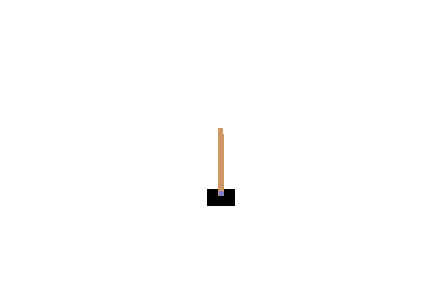
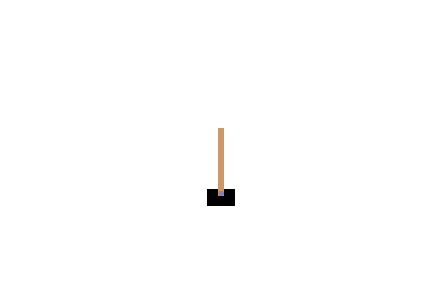
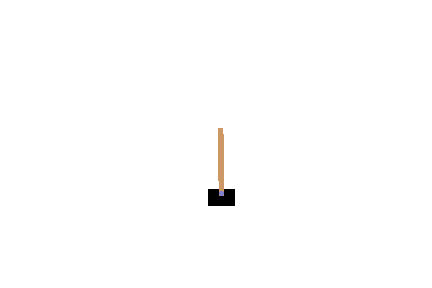
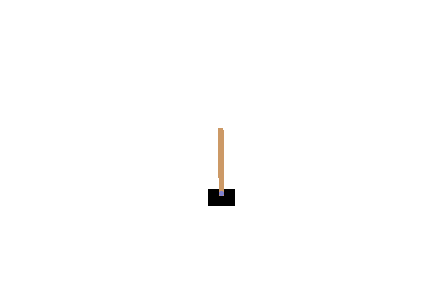
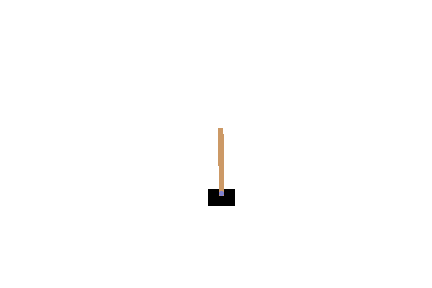
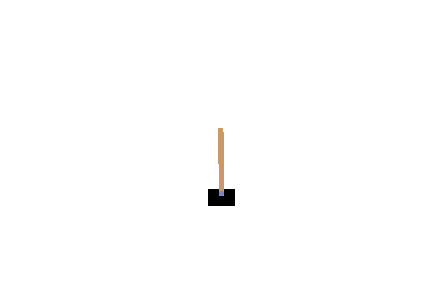
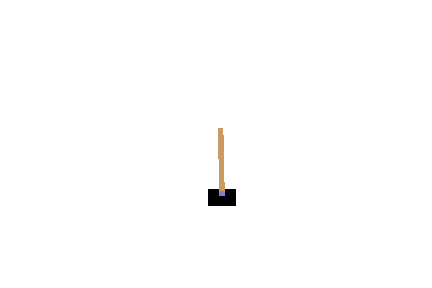
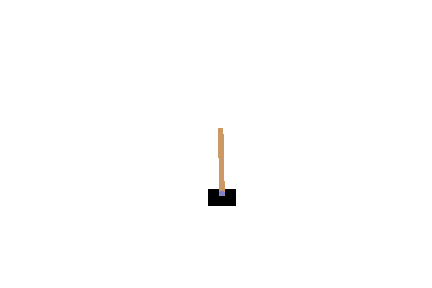
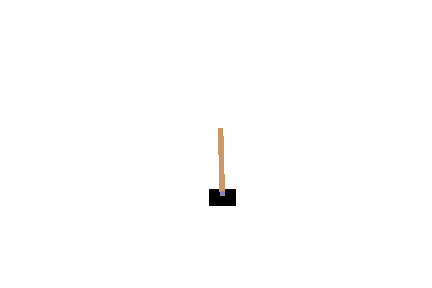
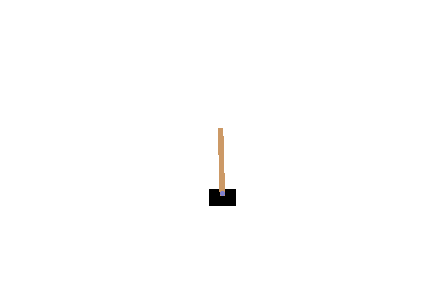
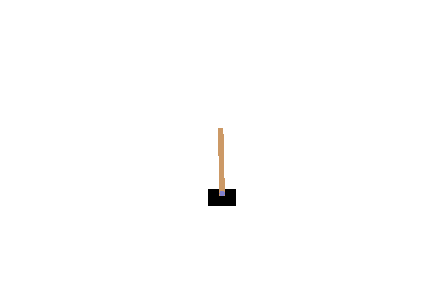
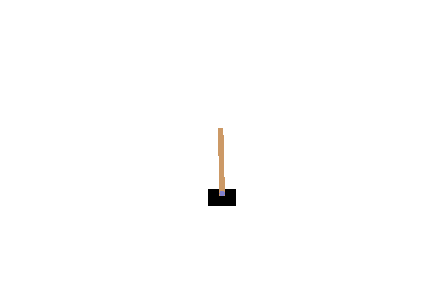
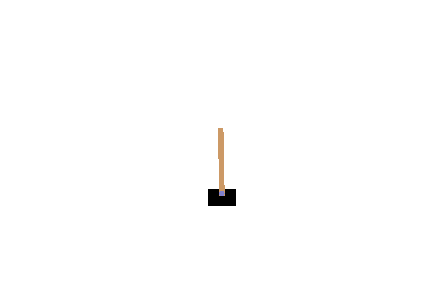
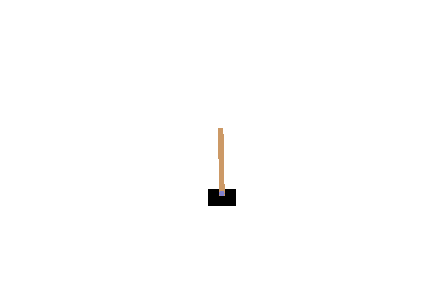
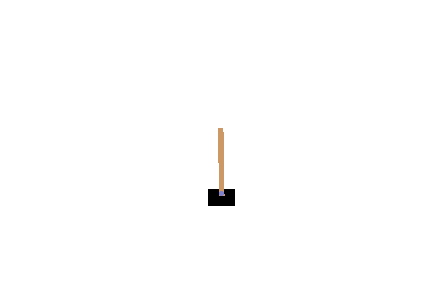
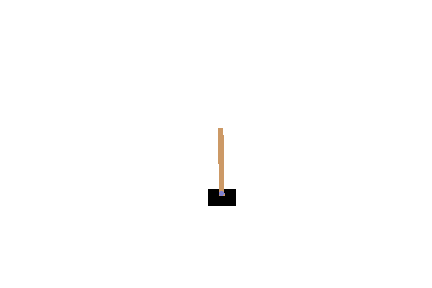
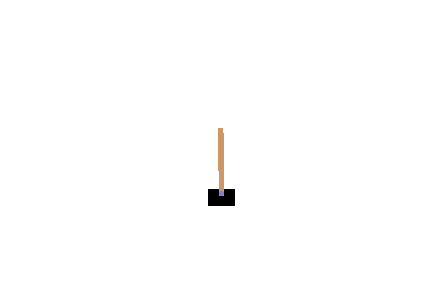
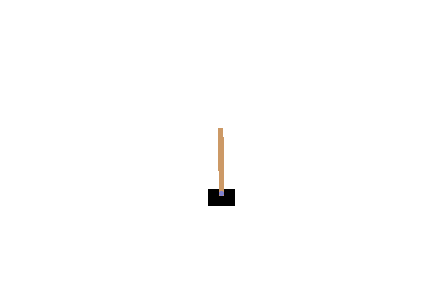
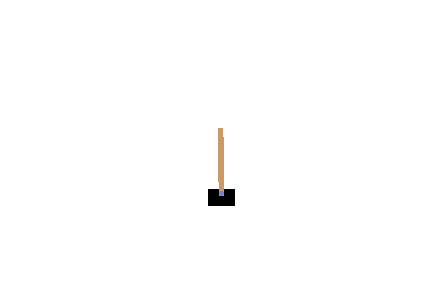
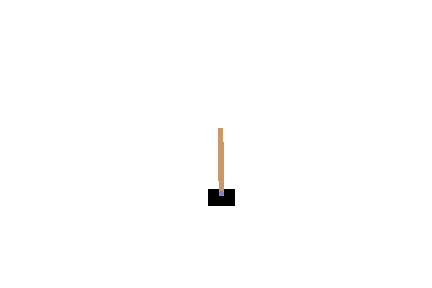
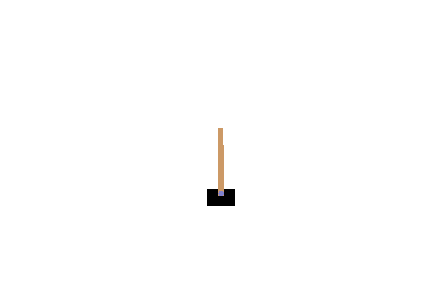
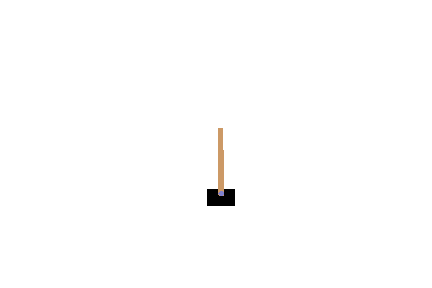
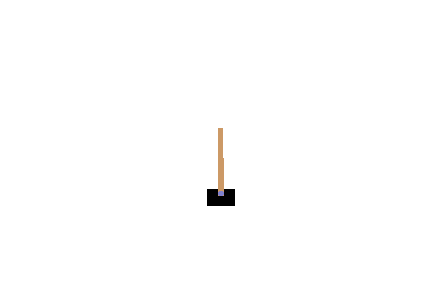
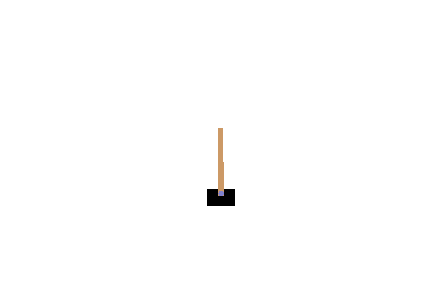
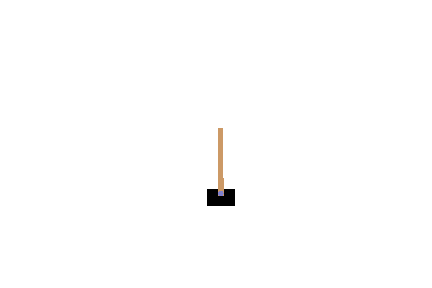
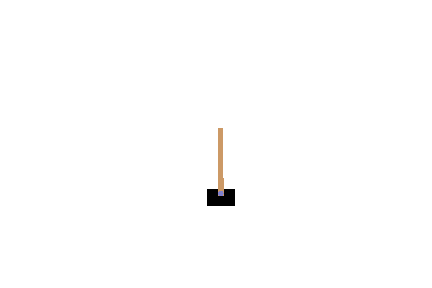
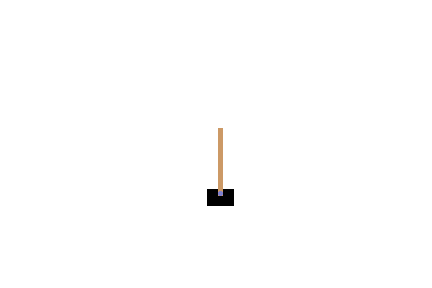
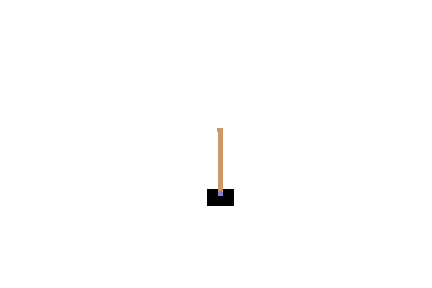
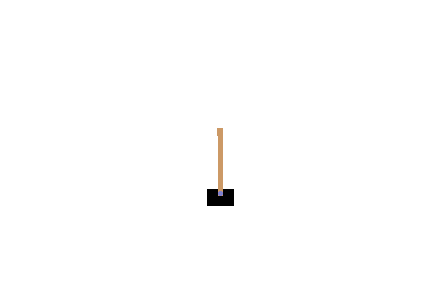
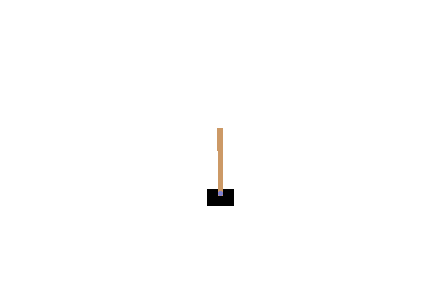
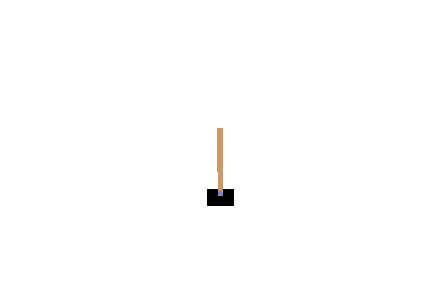
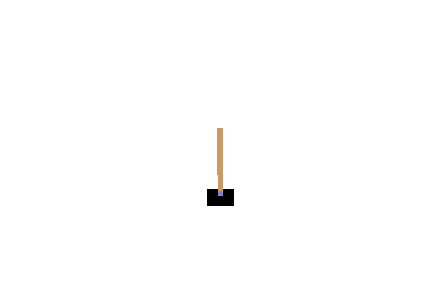
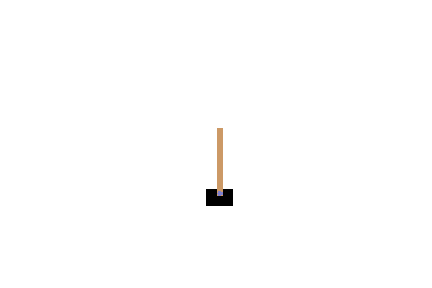
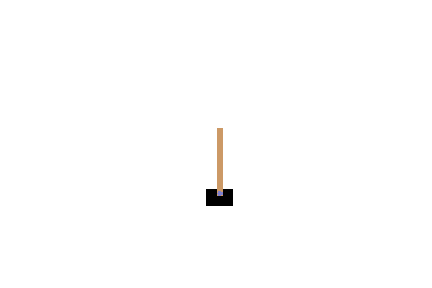
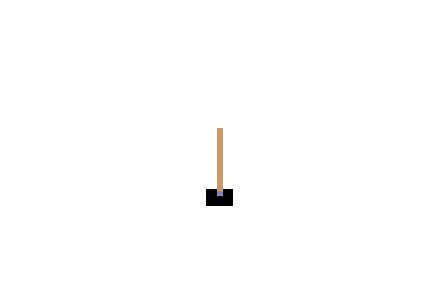
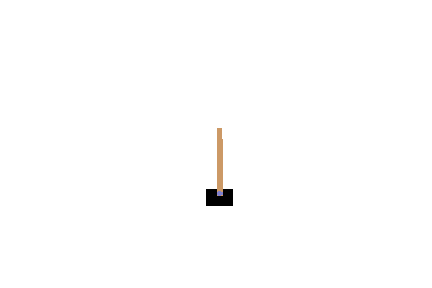
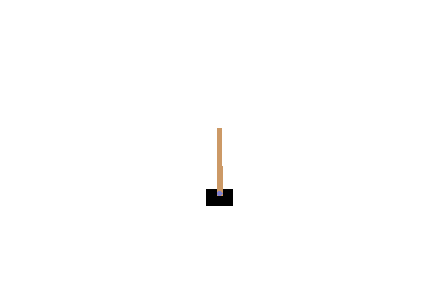
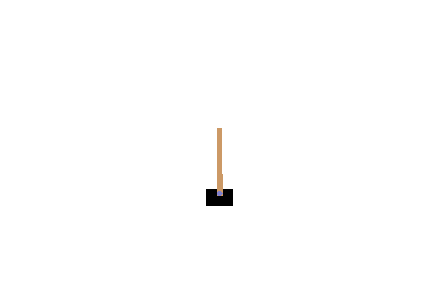
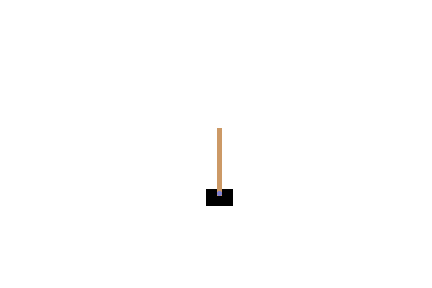
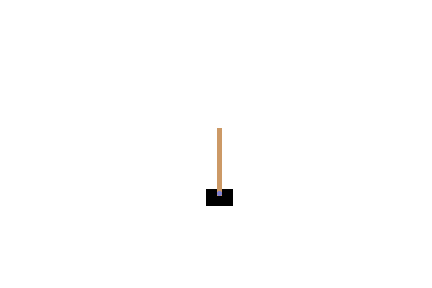
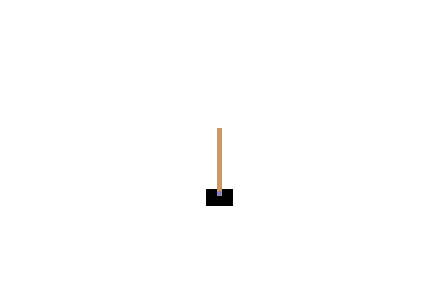
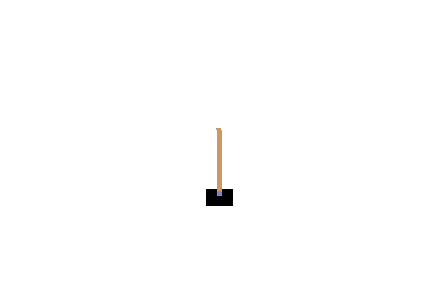
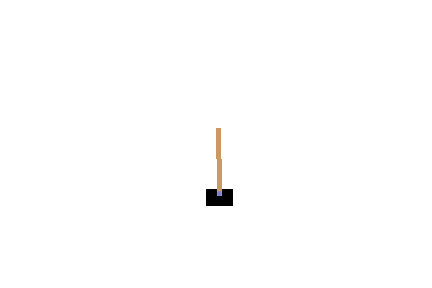
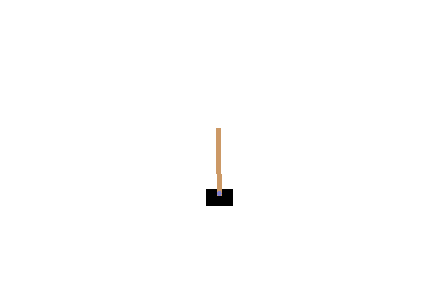
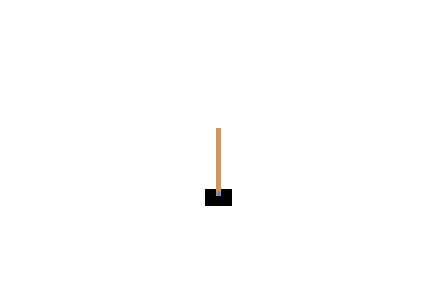
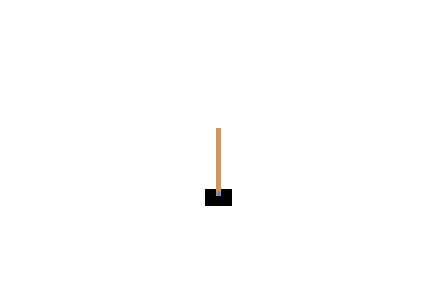
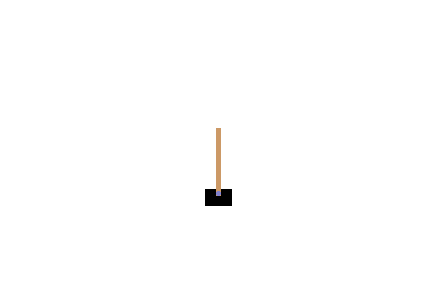
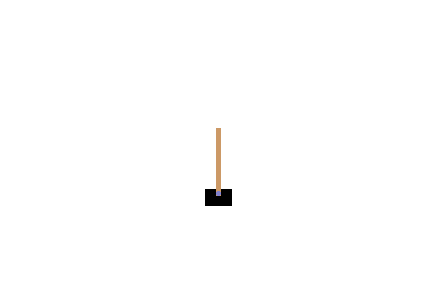
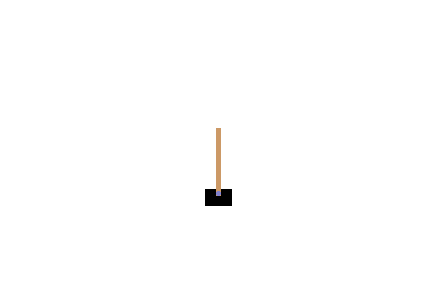
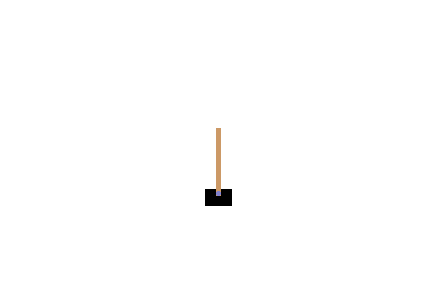
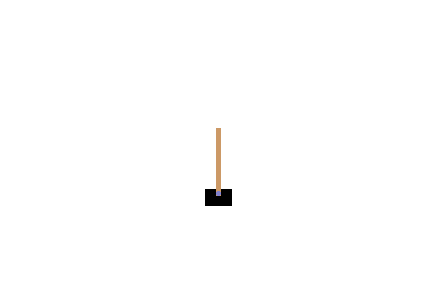
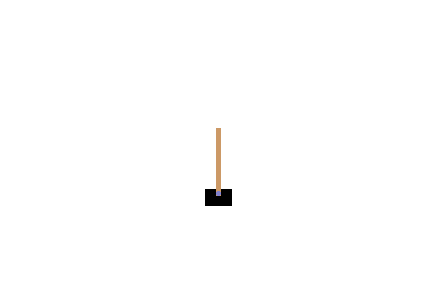
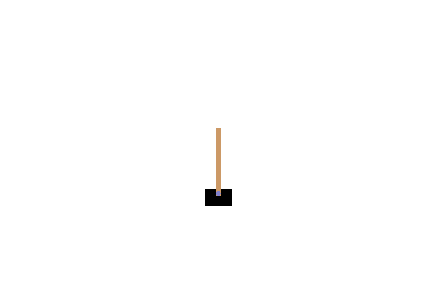
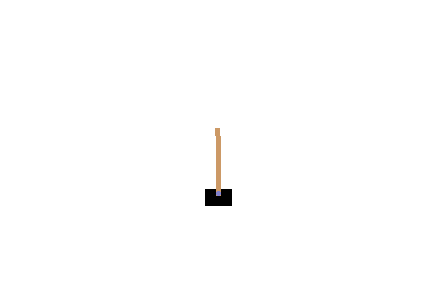
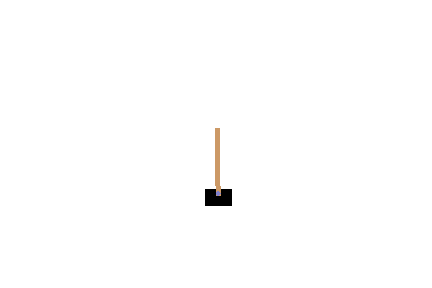
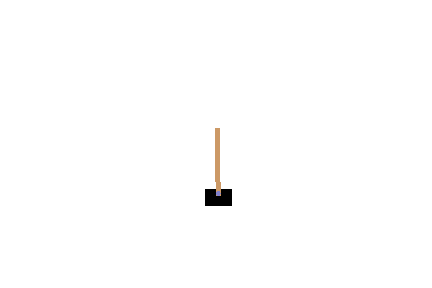
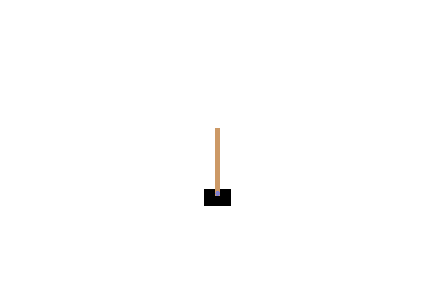
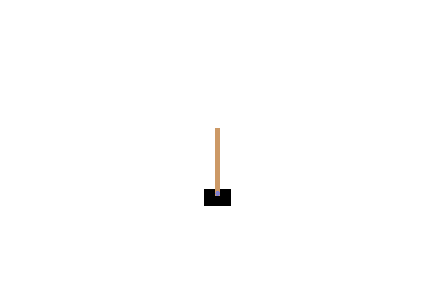
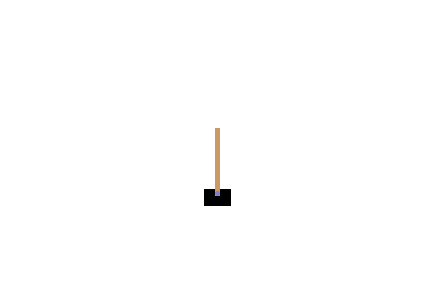
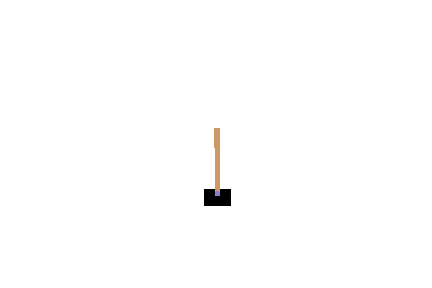
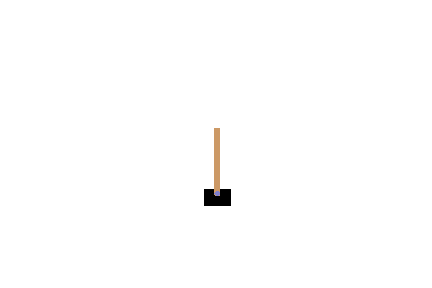
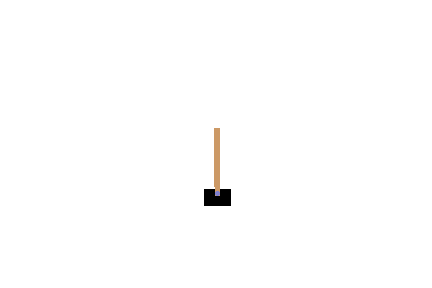
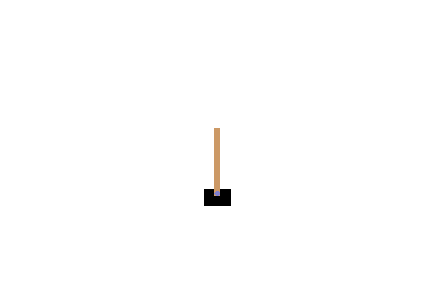
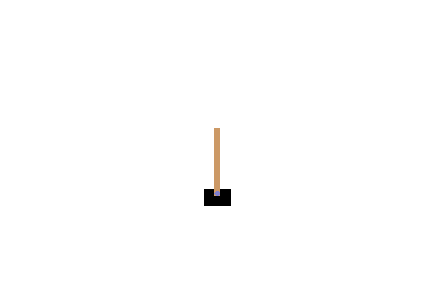
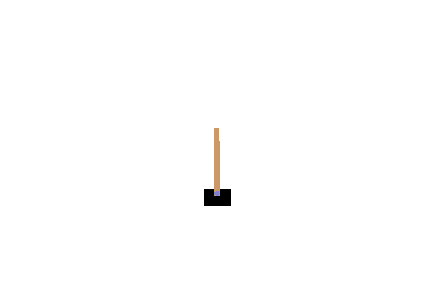
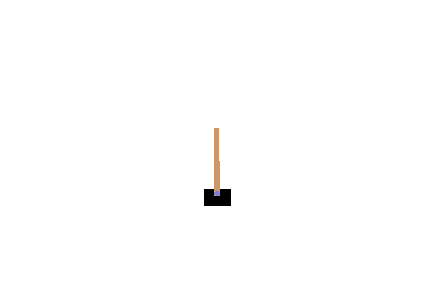
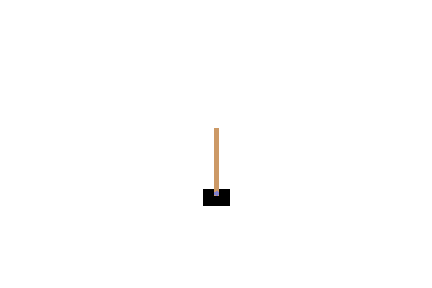
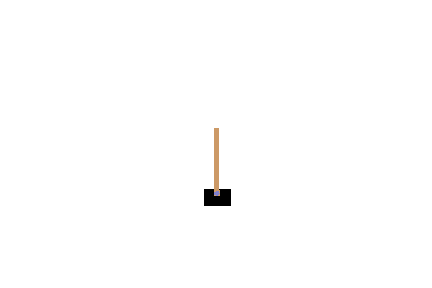
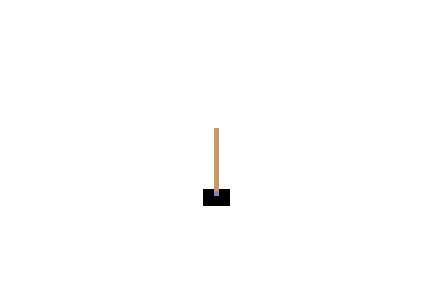
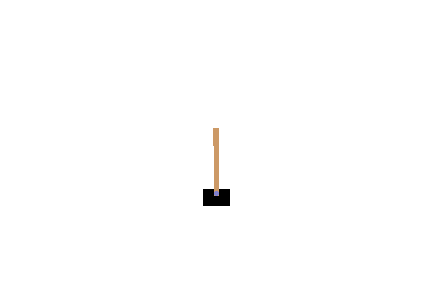
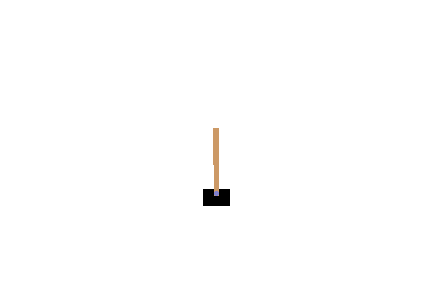
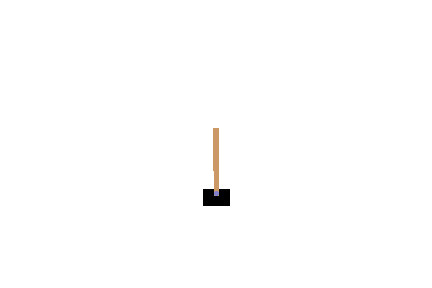
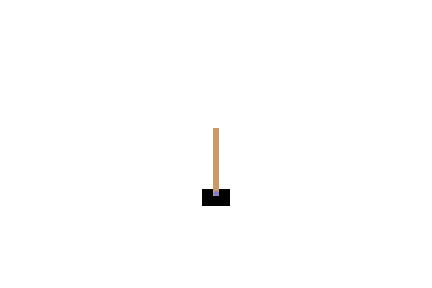
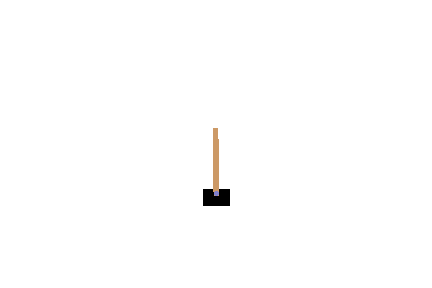
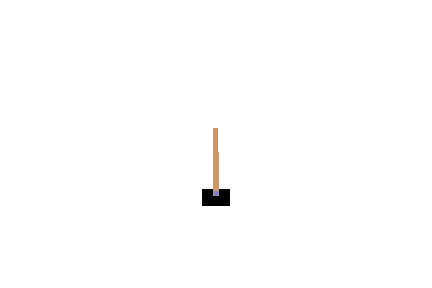
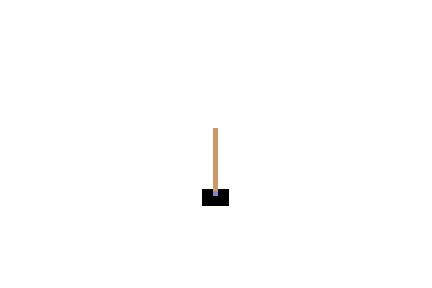
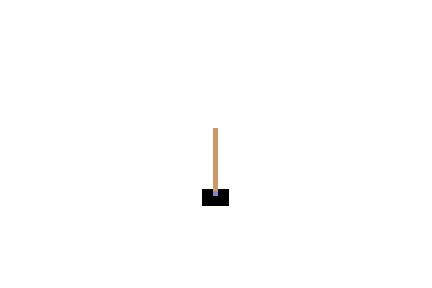
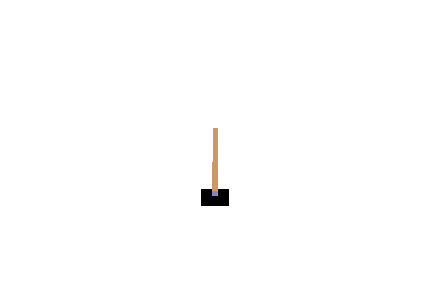
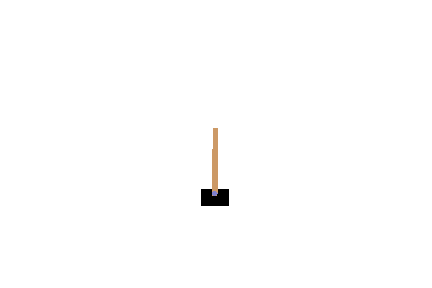
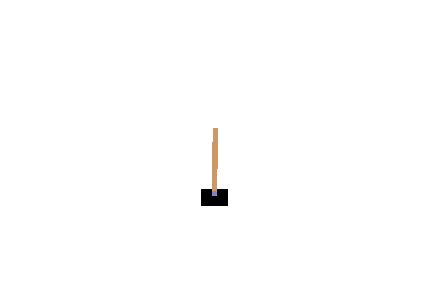
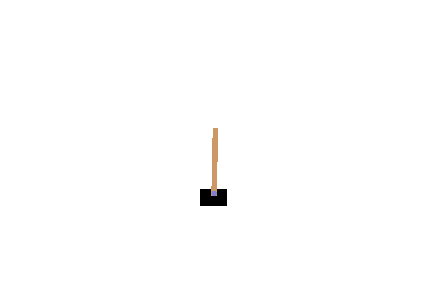
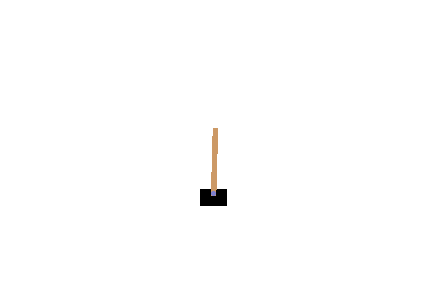
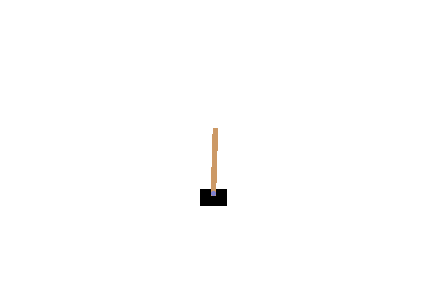
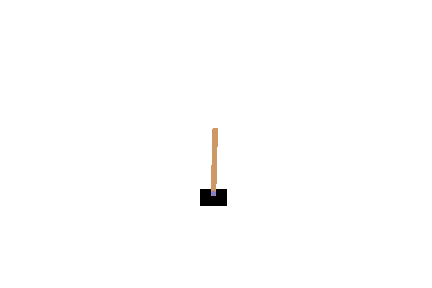
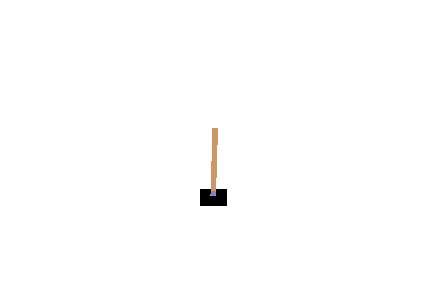
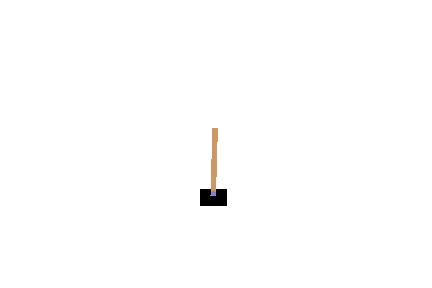
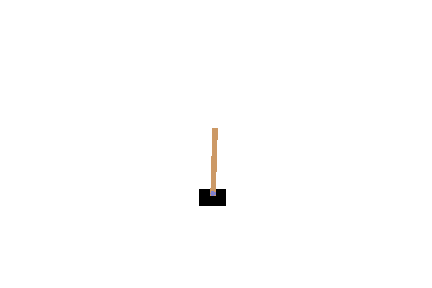
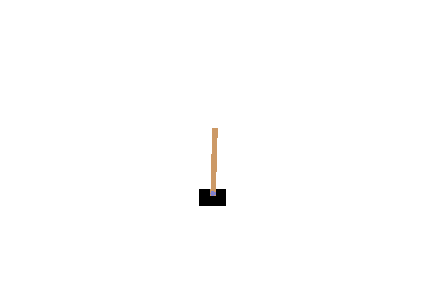
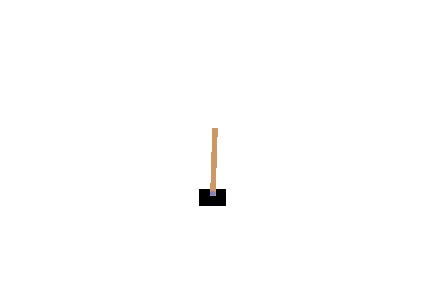
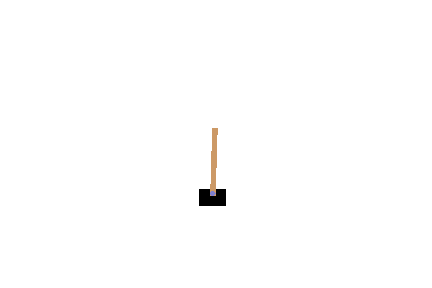
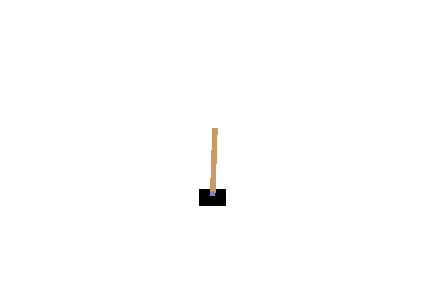
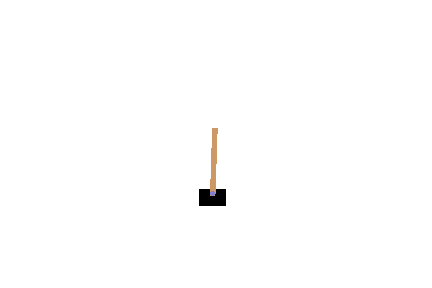
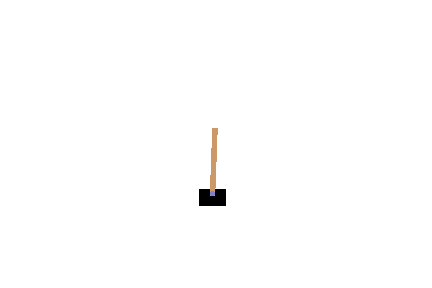
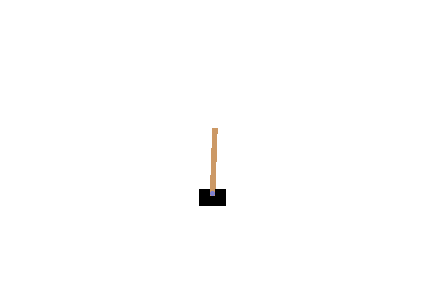
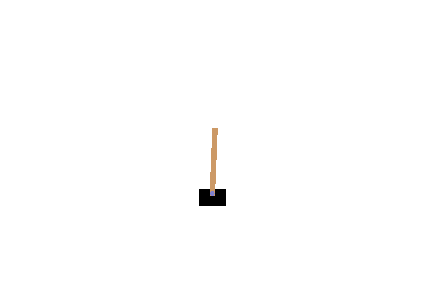
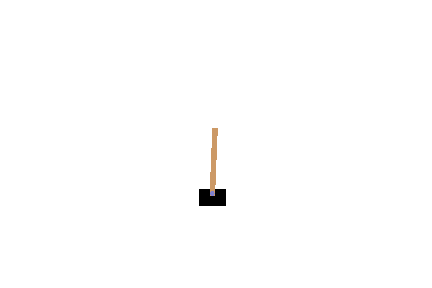
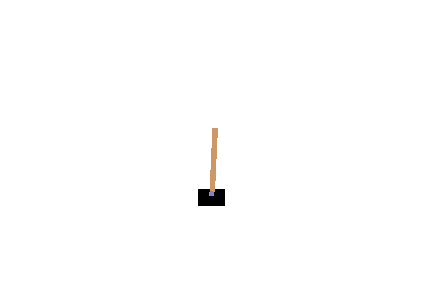
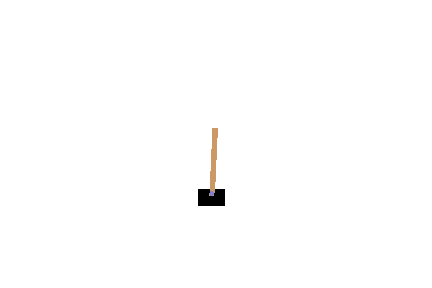
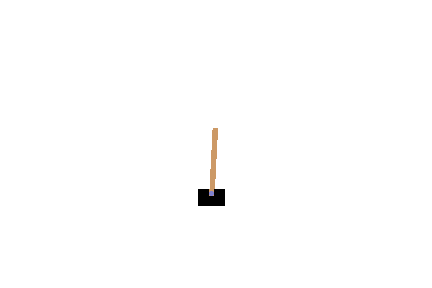
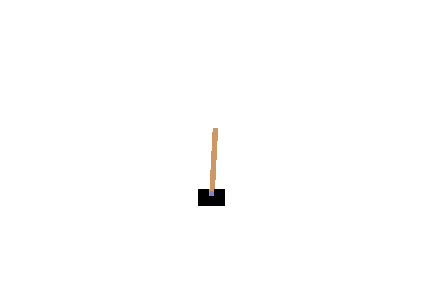
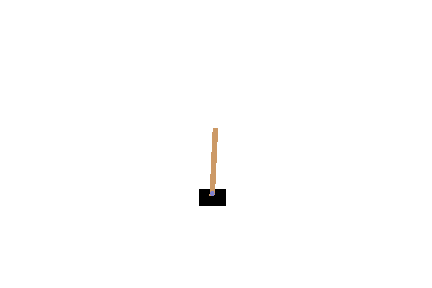
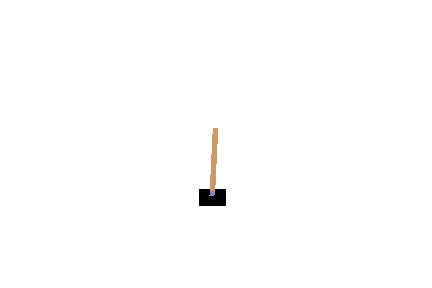
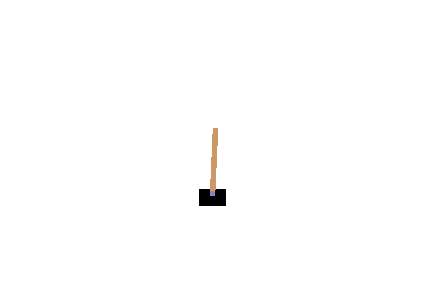
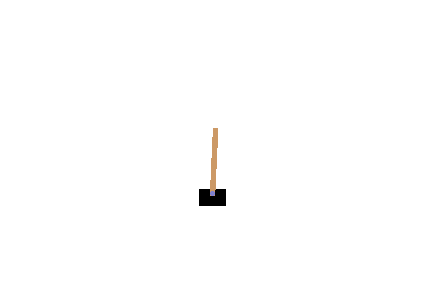
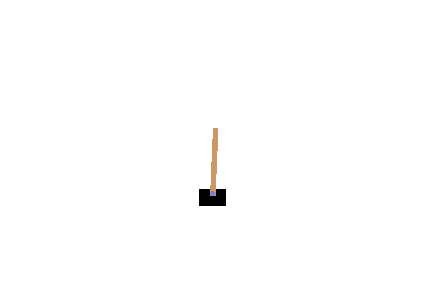
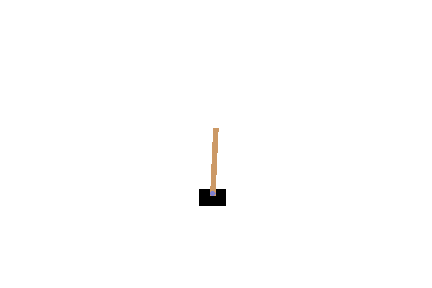
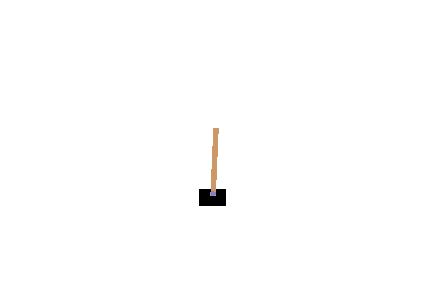
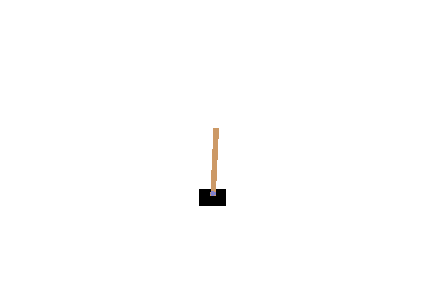
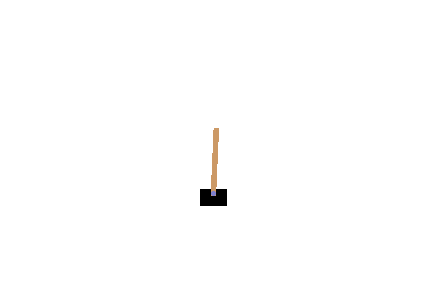
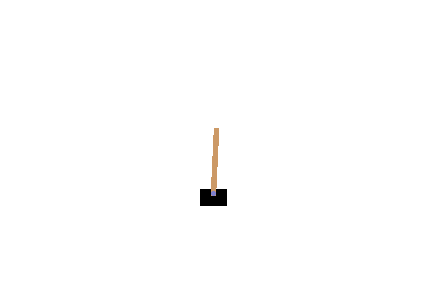
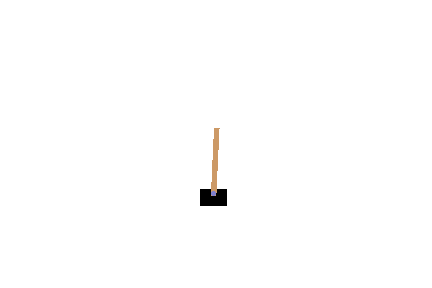
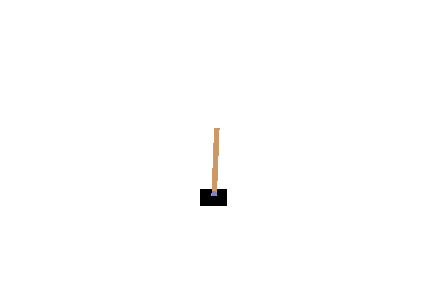
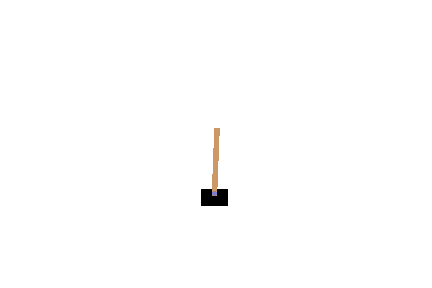
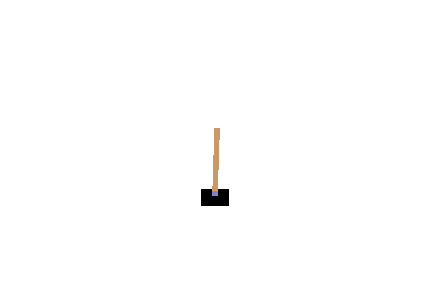
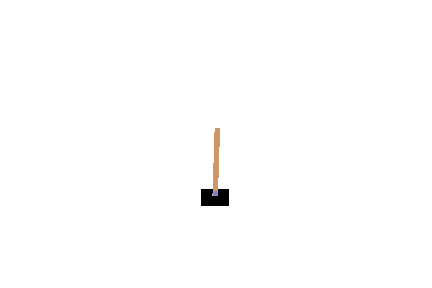
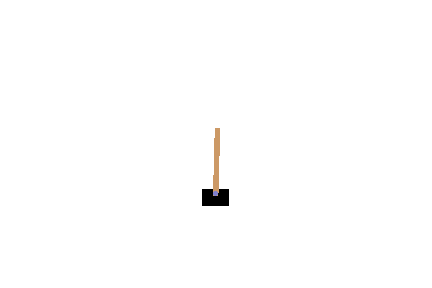
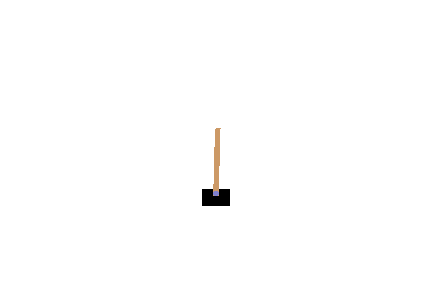
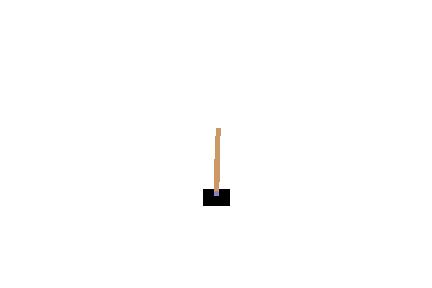
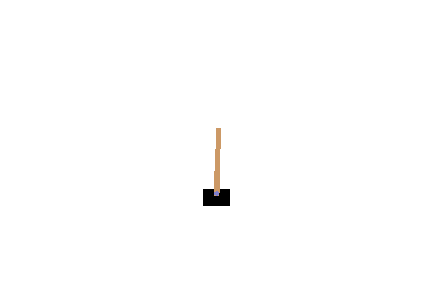
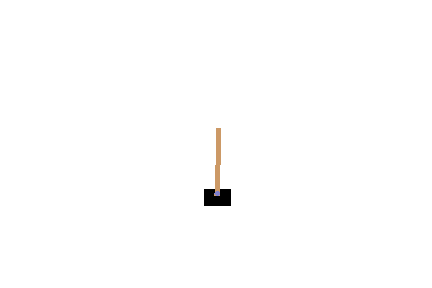
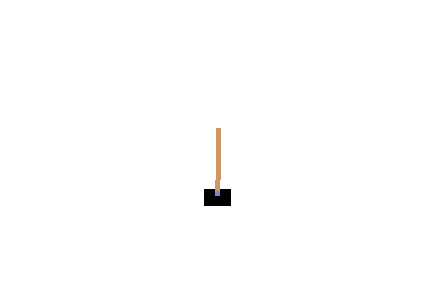
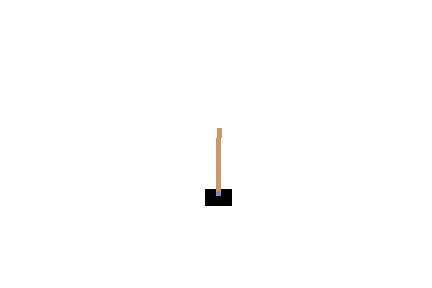
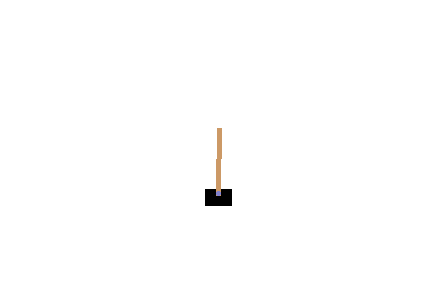
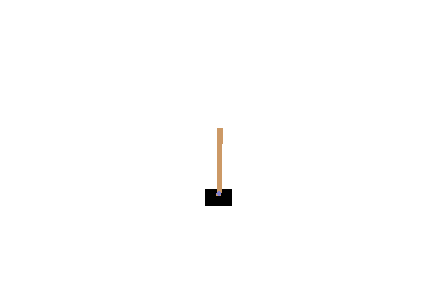
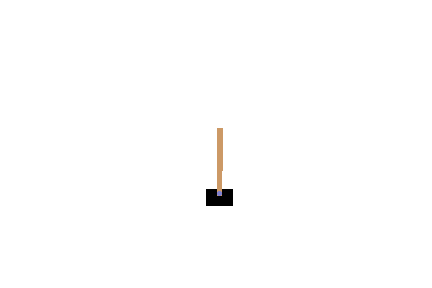
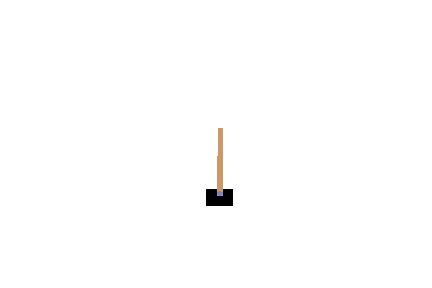
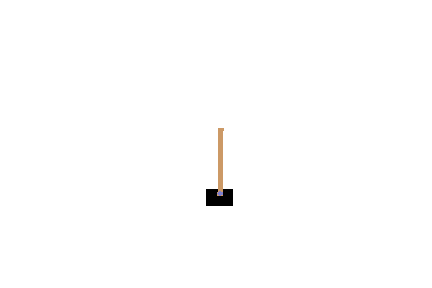
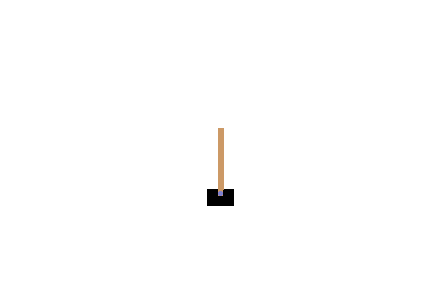
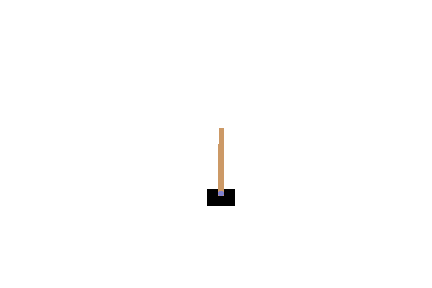
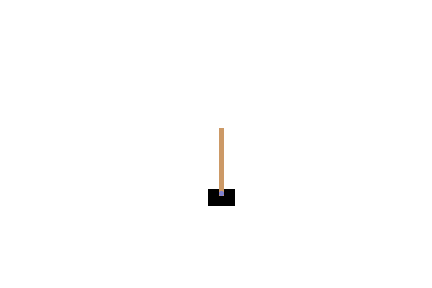
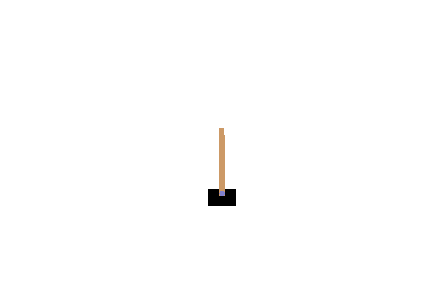
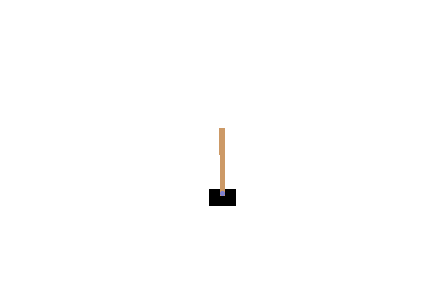
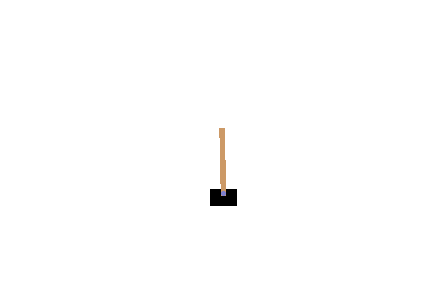
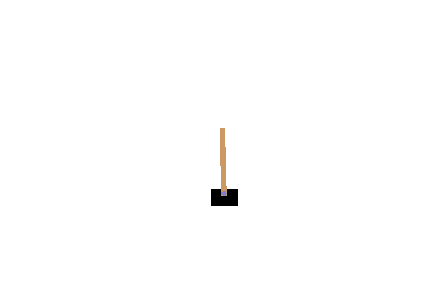
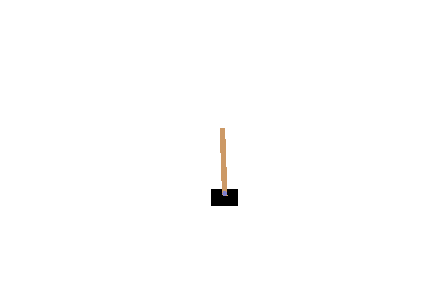
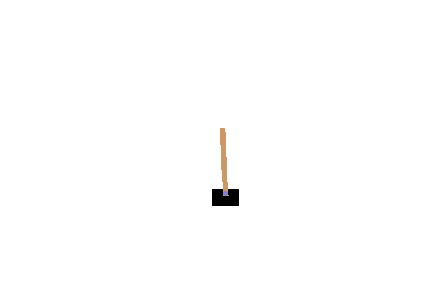
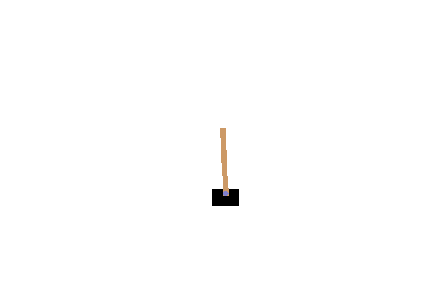
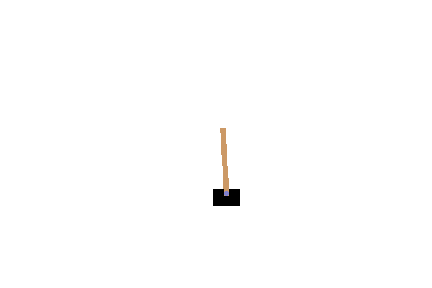
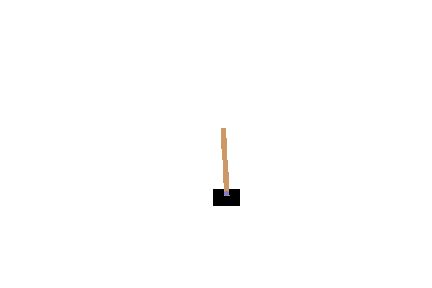
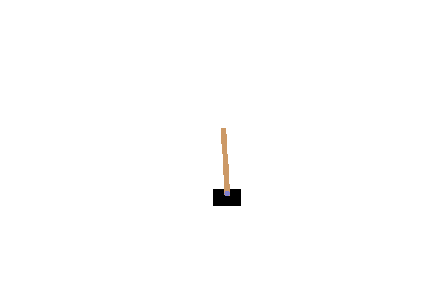
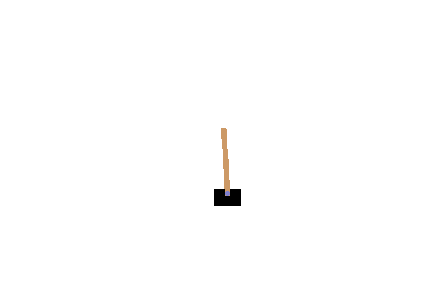
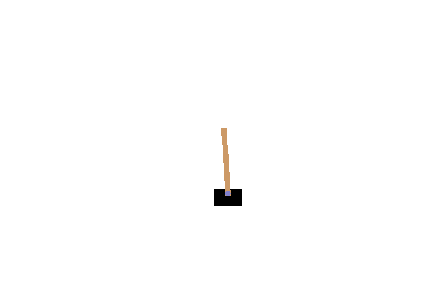
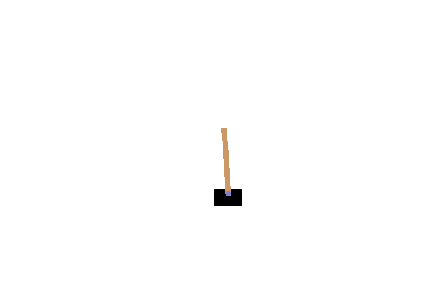
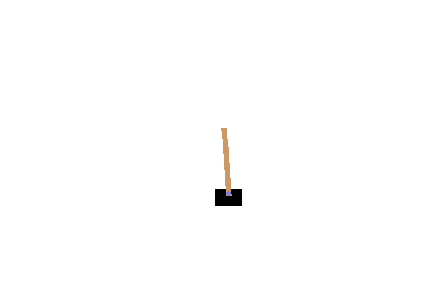
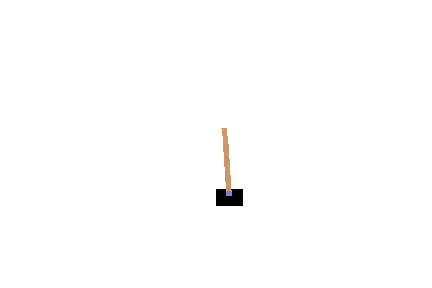
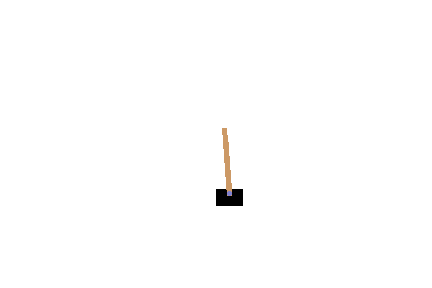
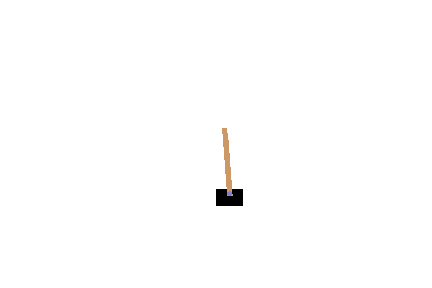
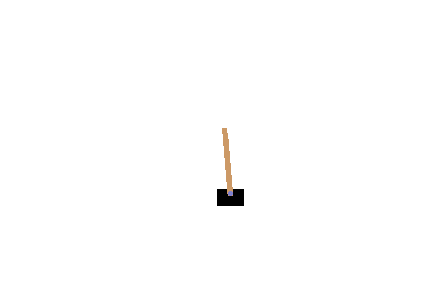
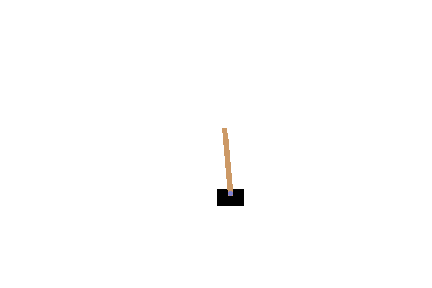
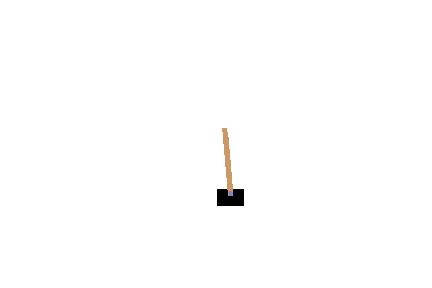
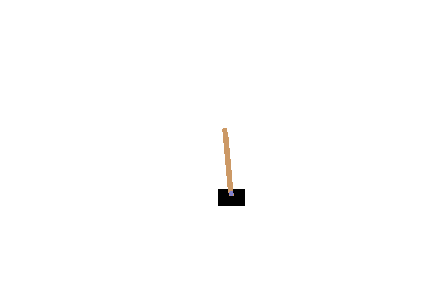
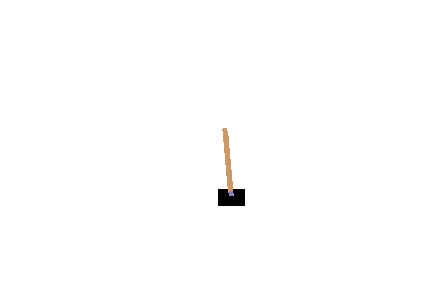
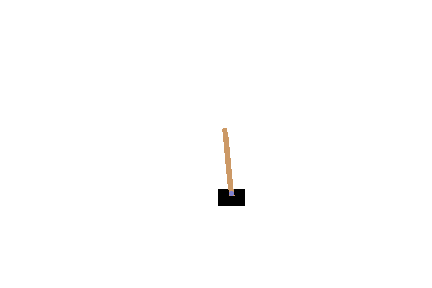
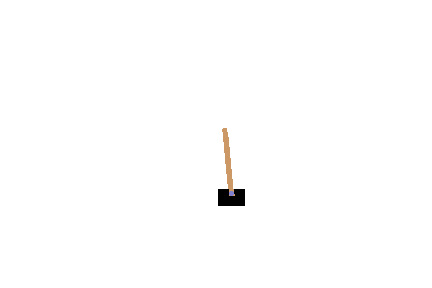
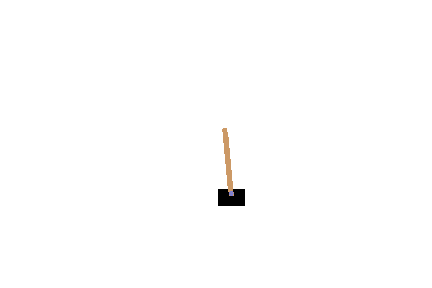
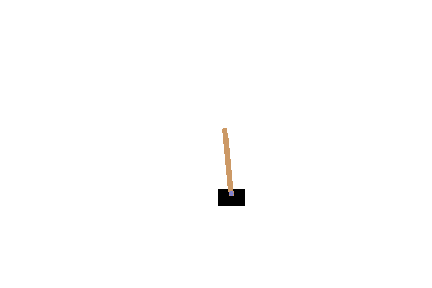
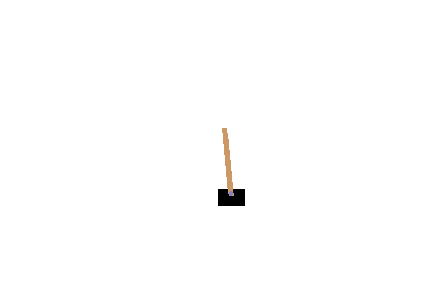
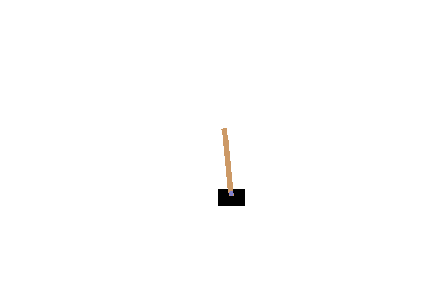
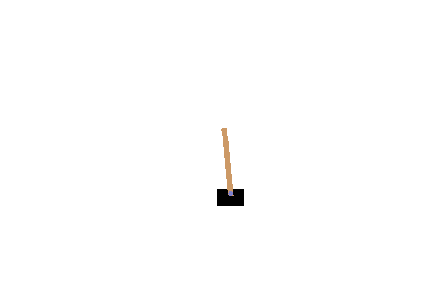
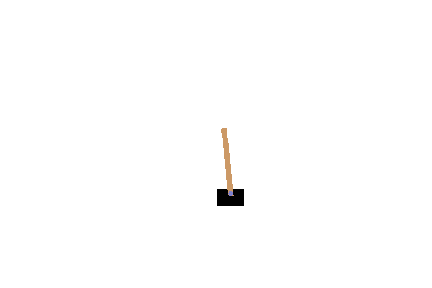
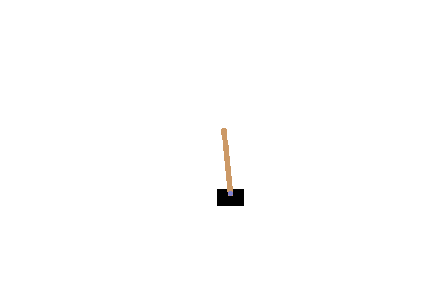
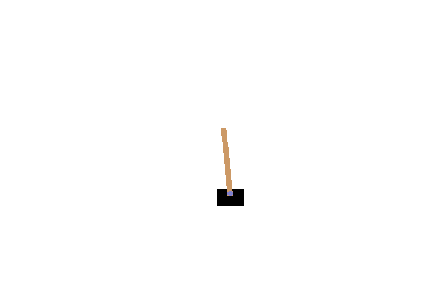
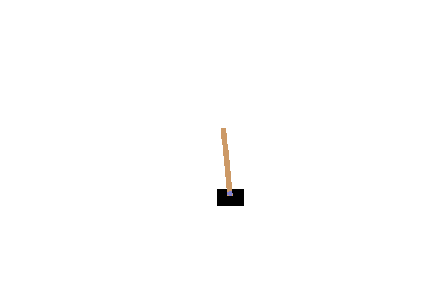
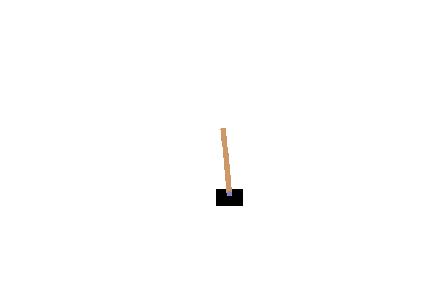
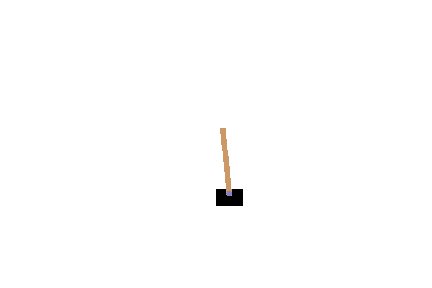
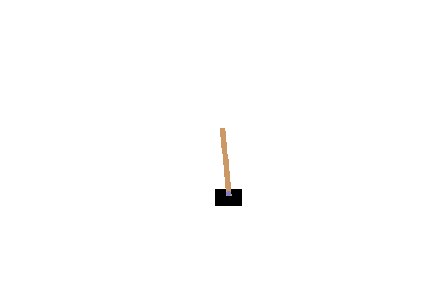
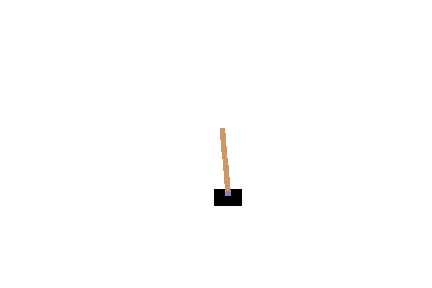
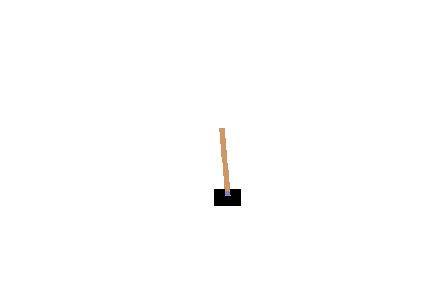
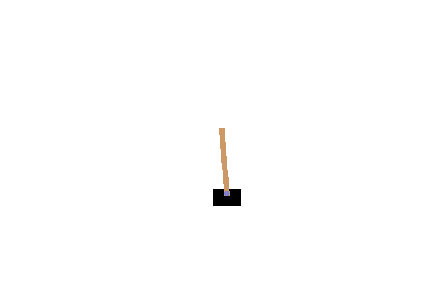
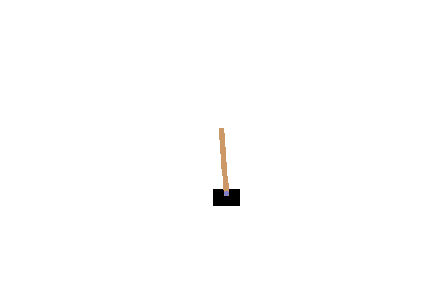
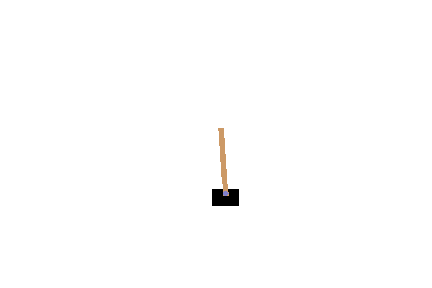
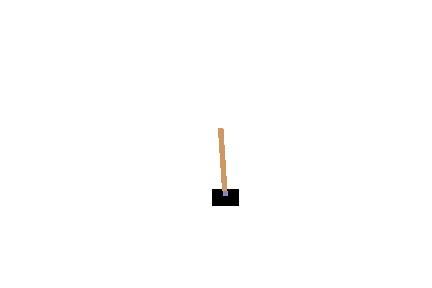
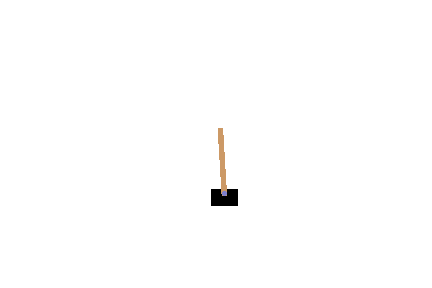
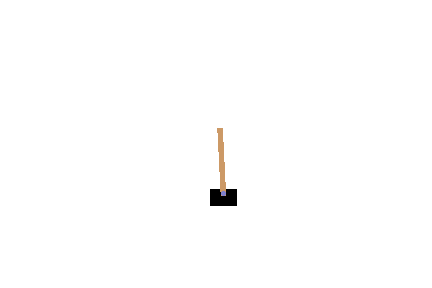
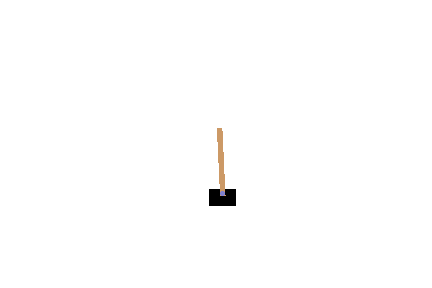
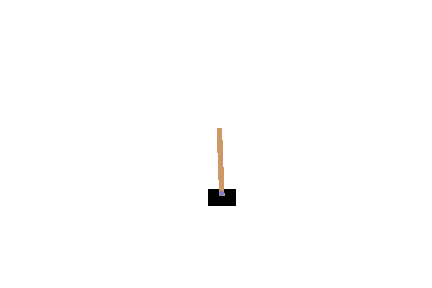
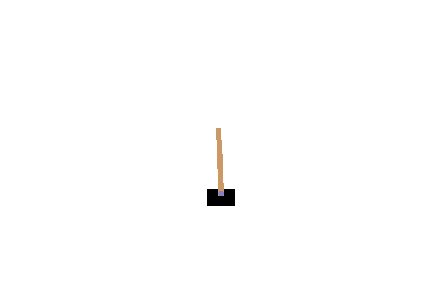
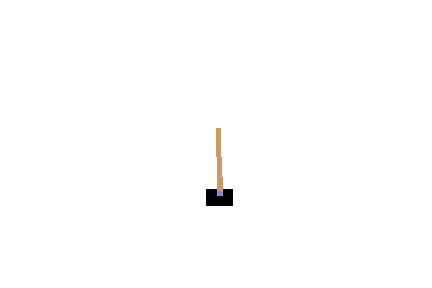
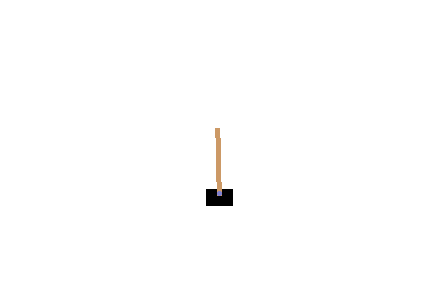
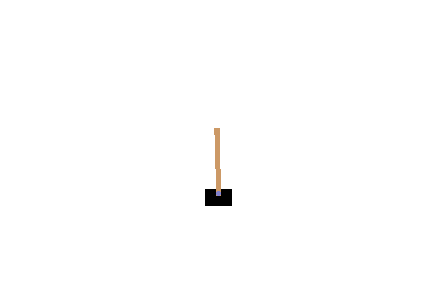
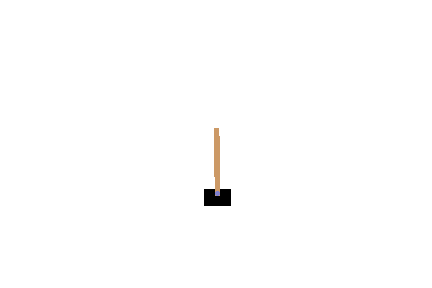
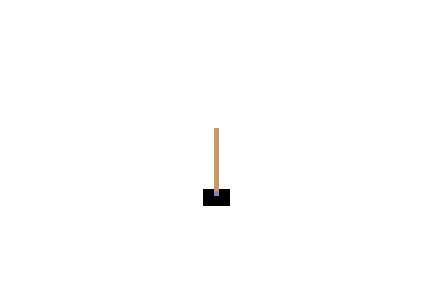
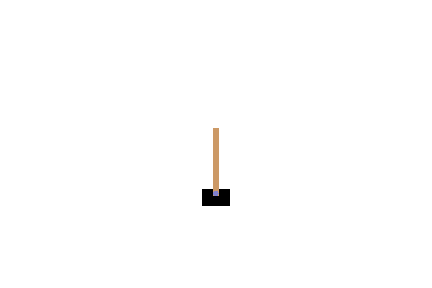
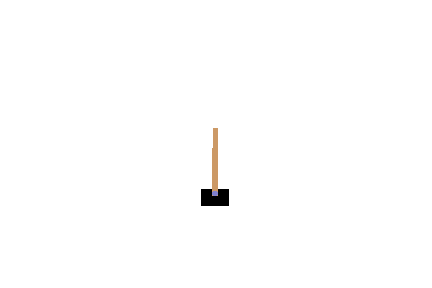
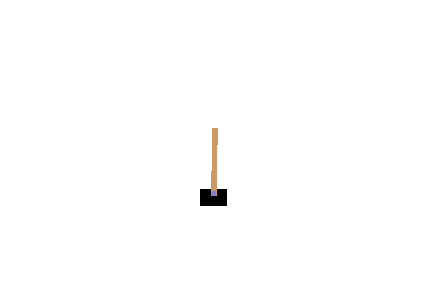
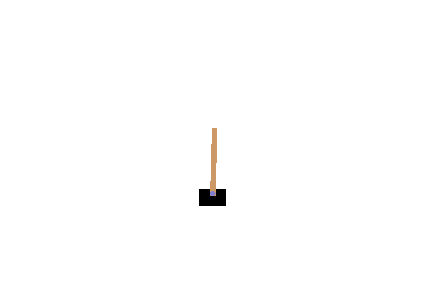
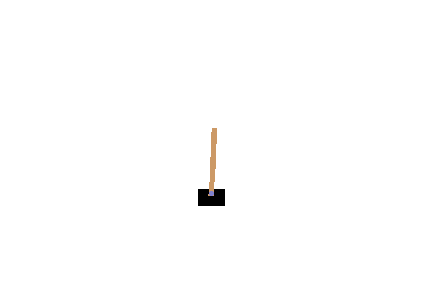
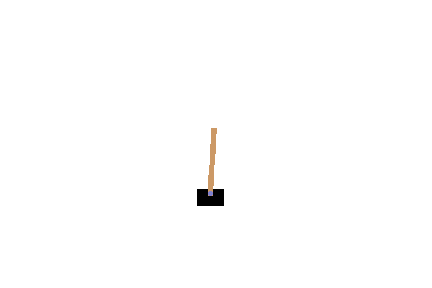
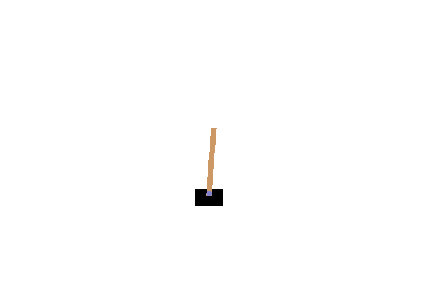
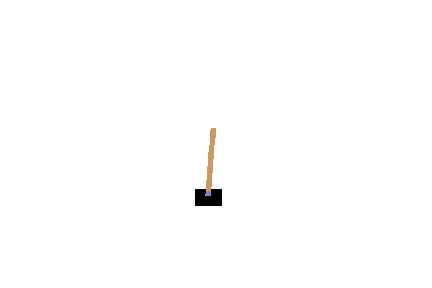
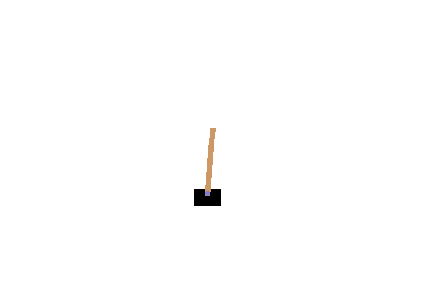
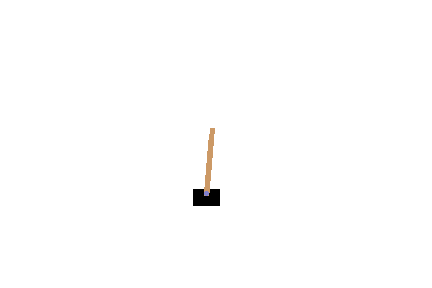

In [51]:
counter, frames = train_sim()
display_frames_as_gif(frames)